In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
from ete2 import NCBITaxa
import re
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
import plotly.offline as offline
import matplotlib.backends.backend_pdf
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import itertools
import scipy.stats as ss
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
census=pd.read_table("../TSV/census.tsv")

In [4]:
census.head()

sample  reads_sampled:  trimmed_length:  min_quality:  mean_quality:  \
0  ERR598980         2000000              100            -5             -5   
1  ERR598966         2000000              100            -5             -5   
2  ERR599135         2000000              100            -5             -5   
3  ERR315863         2000000              100            -5             -5   
4  ERR594367         2000000              100            -5             -5   

   filter_dups:  max_unknown:  average_genome_size:  total_bases:  \
0         False           100          2.650131e+06   40054972110   
1         False           100          2.435033e+06    8631193288   
2         False           100          4.053884e+06    7981506337   
3         False           100          1.865010e+06   16030047281   
4         False           100          1.458495e+07    5684276514   

   genome_equivalents:  
0         15114.334652  
1          3544.589589  
2          1968.854388  
3          8595.153519  
4           389.735732

In [232]:
deep=pd.read_table("../TSV/deepARG_plas_kaiju.tsv")


In [233]:
deep.head()

#ARG  query-start  query-end                                         nt_id  \
0  PATA           76        441    gene_4195642|GeneMark.hmm|1125_nt|+|2|1126   
1  MSRB           14        133   gene_1913961|GeneMark.hmm|393_nt|-|670|1062   
2  UPPP           47        263      gene_3637740|GeneMark.hmm|687_nt|+|1|687   
3  PATA           76        447   gene_222026|GeneMark.hmm|1164_nt|+|198|1361   
4  GOLS            1        129  gene_2742391|GeneMark.hmm|393_nt|-|2005|2397   

                   predicted_ARG-class  \
0                            quinolone   
1  macrolide-lincosamide-streptogramin   
2                           bacitracin   
3                            quinolone   
4                            multidrug   

                                            best-hit  probability  identity  \
0           NP_417544.5|FEATURES|CARD|quinolone|patA     0.921137      35.1   
1  NP_416292.1|FEATURES|CARD|macrolide-lincosamid...     0.974641      40.5   
2            A5KNX8|FEATURES|UNIPROT|bacitracin|uppP     1.000000      32.6   
3           NP_417544.5|FEATURES|CARD|quinolone|patA     0.870956      30.4   
4           NP_459349.1|FEATURES|CARD|multidrug|golS     0.988998      51.9   

   alignment-length  alignment-bitscore  \
0               370               204.1   
1               121                92.8   
2               227                77.4   
3               375               169.5   
4               129               138.7   

                         ...                                      contig_id  \
0                        ...                          TARA_ION-k99_15301455   
1                        ...                           TARA_ION-k99_6951543   
2                        ...                          TARA_ION-k99_13226399   
3                        ...                            TARA_ION-k99_822303   
4                        ...                           TARA_ION-k99_9947076   

                                         ptn_id contig_length  \
0     gene_4195642|GeneMark.hmm|374_aa|+|2|1126          1714   
1   gene_1913961|GeneMark.hmm|130_aa|-|670|1062          1813   
2      gene_3637740|GeneMark.hmm|228_aa|+|1|687          1070   
3    gene_222026|GeneMark.hmm|387_aa|+|198|1361          2286   
4  gene_2742391|GeneMark.hmm|130_aa|-|2005|2397          2590   

                         label plasmid  Plasflow_phyla  \
0  unclassified.Proteobacteria      no  Proteobacteria   
1    unclassified.unclassified      no    unclassified   
2         plasmid.unclassified     yes    unclassified   
3       plasmid.Proteobacteria     yes  Proteobacteria   
4  unclassified.Proteobacteria      no  Proteobacteria   

                                              ORF_ID taxon_kaiju  \
0  gene_4195642|GeneMark.hmm|1125_nt|+|2|1126|TAR...     1774968   
1  gene_1913961|GeneMark.hmm|393_nt|-|670|1062|TA...     1172190   
2  gene_3637740|GeneMark.hmm|687_nt|+|1|687|TARA_...           2   
3  gene_222026|GeneMark.hmm|1164_nt|+|198|1361|TA...     1696177   
4  gene_2742391|GeneMark.hmm|393_nt|-|2005|2397|T...      254161   

                     taxon_name_kaiju  \
0       Methyloceanibacter methanicus   
1          Sulfurimonas hongkongensis   
2                            Bacteria   
3  Pelagibacteraceae bacterium GOM-A5   
4           Pseudomonas pachastrellae   

                            header_ptn_for_phylogeny  
0  gene_4195642|TARA_ION_RAW|Methyloceanibacter m...  
1  gene_1913961|TARA_ION_RAW|Sulfurimonas hongkon...  
2             gene_3637740|TARA_ION_RAW|Bacteria|yes  
3  gene_222026|TARA_ION_RAW|Pelagibacteraceae bac...  
4  gene_2742391|TARA_ION_RAW|Pseudomonas pachastr...  

[5 rows x 24 columns]

In [234]:
len(deep)

116425

In [ ]:
# I WILL HAVE TO REMOVE THE TRASH GENES FROM HERE AND FOLLOW THE STATS (from deepARG and RPKG)

In [144]:
all_RPKG=pd.read_table("../TSV/RPKG_all.tsv")

In [145]:
all_results=pd.merge(deep,all_RPKG,on=["ORF_ID"])


In [146]:
ARGS_RPKG=all_results.groupby(["#ARG"])[[x for x in all_results.columns if "ERR" in x]].sum()


In [147]:
ARGS_CLASS_RPKG=pd.merge(ARGS_RPKG.reset_index(),deep[["#ARG","predicted_ARG-class"]],on="#ARG")


In [148]:
class_RPKG=all_results.groupby(["predicted_ARG-class"])[[x for x in all_results.columns if "ERR" in x]].sum()
new_classes_RPKG=class_RPKG.T
new_classes_RPKG.reset_index(inplace=True)
new_classes_RPKG["run_id"]=new_classes_RPKG["index"]#.str.replace("_FPKM","")
new_classes_RPKG.drop("index",axis=1,inplace=True)

In [149]:
meta=pd.read_table("../TSV/meta_runs.tsv")
meta.rename(columns={"value":"run_id"},inplace=True)
#meta["Environmental_Feature"]=meta["Environmental Feature"].str.split(")",expand=True)[0].str.split("(",expand=True)[1]
meta["Environmental_Feature"]=meta["Environmental Feature"].str.split(")",expand=True)[1].str.split("(",expand=True)[0]
meta["fraction"]=meta["Size fraction lower threshold [micrometre]"].astype(str)+" - "+ meta["Size fraction upper threshold [micrometre]"].astype(str)
meta.rename(columns={"Biogeographic biomes (Longhurst 2007)":"Biogeographic_biomes"},inplace=True)
meta["Ocean_sea_regions"]=meta["Ocean and sea regions (IHO General Sea Areas 1953) [MRGID registered at www.marineregions.com]"].str.split(")",expand=True)[1].str.split("[",expand=True)[0]
#meta["Marine_provinces"]=meta["Marine provinces  (Longhurst 2007)"].str.split(")",expand=True)[0].str.split("(",expand=True)[1]
meta["Marine_provinces"]=meta["Marine provinces  (Longhurst 2007)"].str.split(")",expand=True)[1].str.split("[",expand=True)[0]
meta2=pd.read_table("../TSV/meta2.tsv")
meta2.rename(columns={"PANGAEA Sample ID":"PANGAEA sample identifier"},inplace=True)
meta=pd.merge(meta,meta2,on="PANGAEA sample identifier")

In [150]:
classes_RPKG_env=pd.merge(new_classes_RPKG,meta[["run_id","Marine_provinces","Environmental_Feature","Ocean_sea_regions","fraction","Biogeographic_biomes"]],on="run_id")


In [151]:
classes_RPKG_env_novirus=classes_RPKG_env[(classes_RPKG_env["fraction"]!="< - 0.22")&(classes_RPKG_env["fraction"]!="0.1 - 0.22")]

In [152]:
classes_RPKG_env_novirus.head()

aminocoumarin  aminoglycoside  bacitracin  beta_lactam  bleomycin  \
0       2.781305        3.591315   49.647996    30.377326        0.0   
1       1.517922        5.262175   53.161901    37.410066        0.0   
2       1.392347       17.927244   53.568119    34.276620        0.0   
3       1.978729        1.181164   57.125659    32.337267        0.0   
4       1.332451        0.449904   58.761928    23.062401        0.0   

   chloramphenicol  fosfomycin  fosmidomycin  glycopeptide  kasugamycin  \
0         0.187670   23.721239      0.143550     54.643586    20.095511   
1         0.479678   28.695598      0.276274     70.587754    22.918611   
2         0.135554   26.652073      0.042590     80.747443    10.205481   
3         0.081767   23.904847      0.079724     46.023642    23.996385   
4         0.101867   16.633081      0.002764     46.305583    12.428846   

           ...           tetracycline  thiostrepton  triclosan  trimethoprim  \
0          ...              36.218452      0.149566   0.544225     30.944981   
1          ...              39.255097      0.104850   0.485005     32.960230   
2          ...              57.982014      0.021638   0.185128     23.202135   
3          ...              35.280982      0.028600   0.191685     39.968293   
4          ...              19.432639      0.018737   0.163002     16.729589   

      run_id                                   Marine_provinces  \
0  ERR599018                   Eastern Africa Coastal Province    
1  ERR598955         North Atlantic Subtropical Gyral Province    
2  ERR594306   South Pacific Subtropical Gyre Province, Nort...   
3  ERR599173                 Benguela Current Coastal Province    
4  ERR594339   South Pacific Subtropical Gyre Province, Nort...   

              Environmental_Feature       Ocean_sea_regions     fraction  \
0   deep chlorophyll maximum layer            Indian Ocean    0.22 - 3.0   
1              surface water layer    North Atlantic Ocean    0.22 - 1.6   
2              surface water layer     South Pacific Ocean    0.45 - 0.8   
3              surface water layer    South Atlantic Ocean    0.22 - 3.0   
4              surface water layer     South Pacific Ocean   0.22 - 0.45   

   Biogeographic_biomes  
0        Coastal Biome   
1      Westerlies Biome  
2          Trades Biome  
3        Coastal Biome   
4          Trades Biome  

[5 rows x 34 columns]

In [153]:
out="../no_virome_results/"

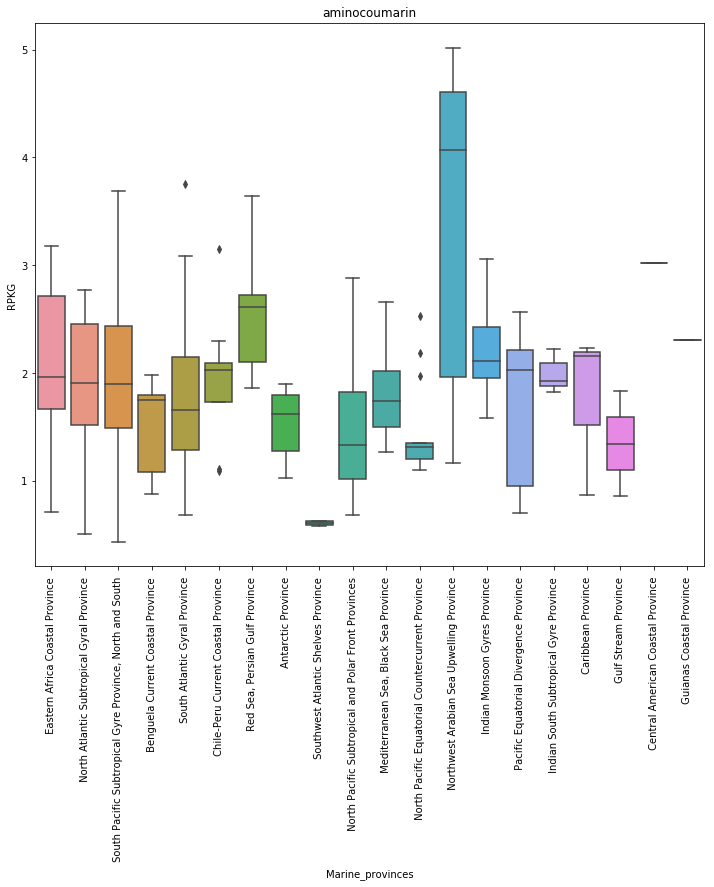

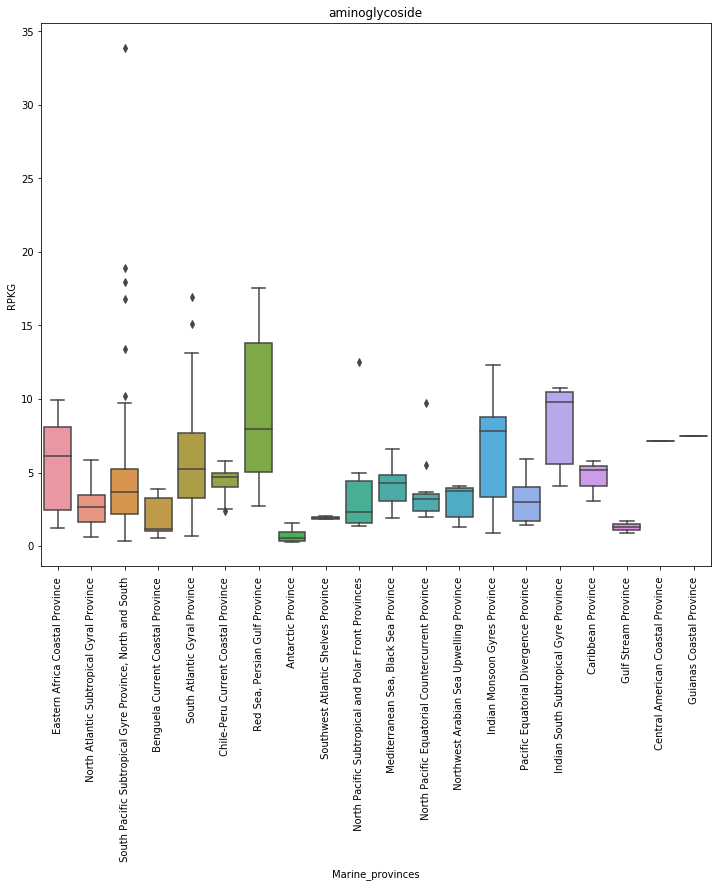

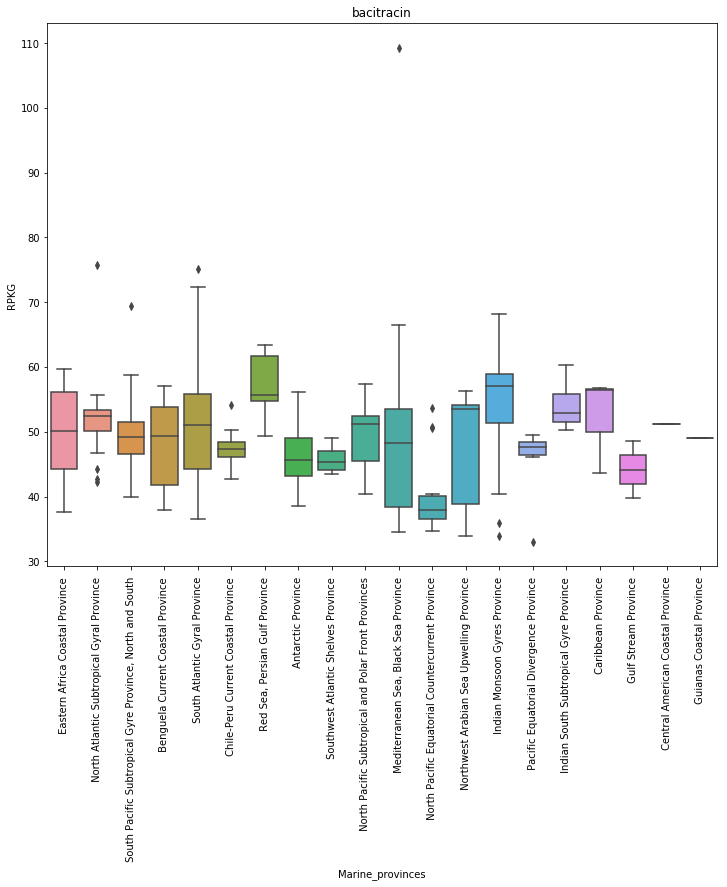

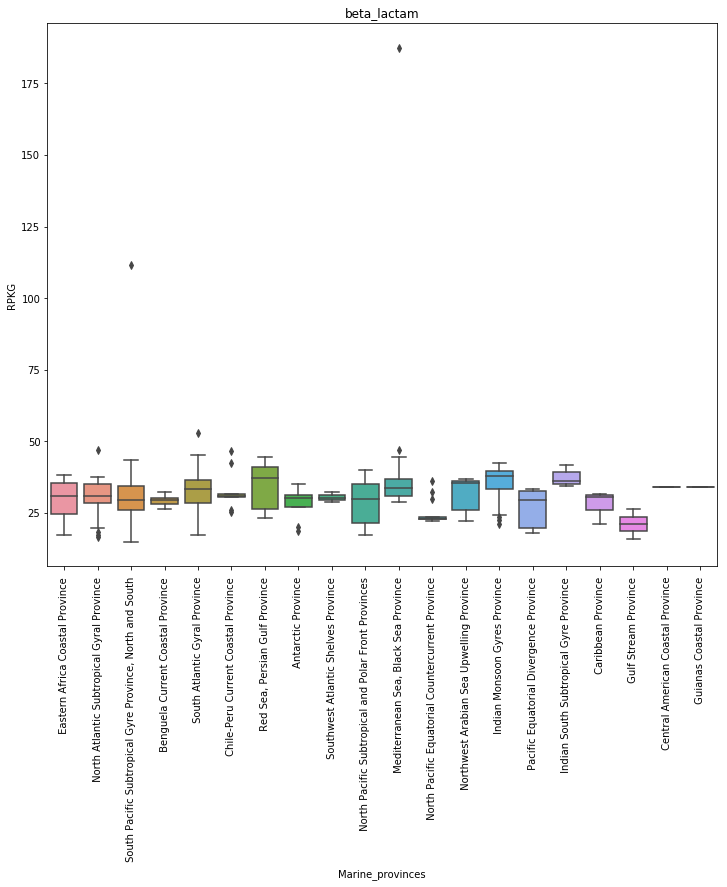

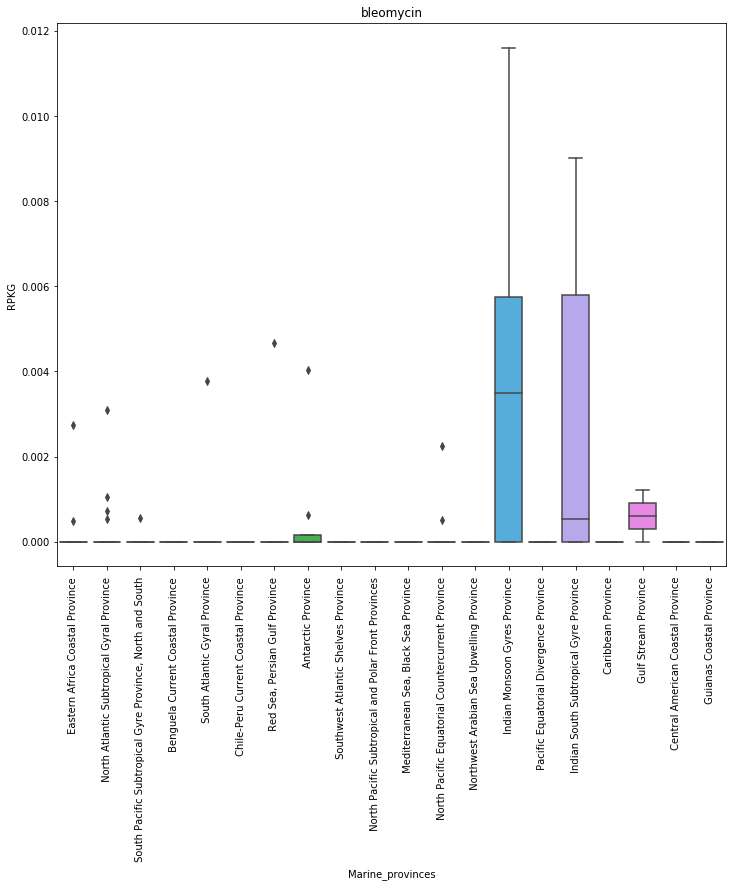

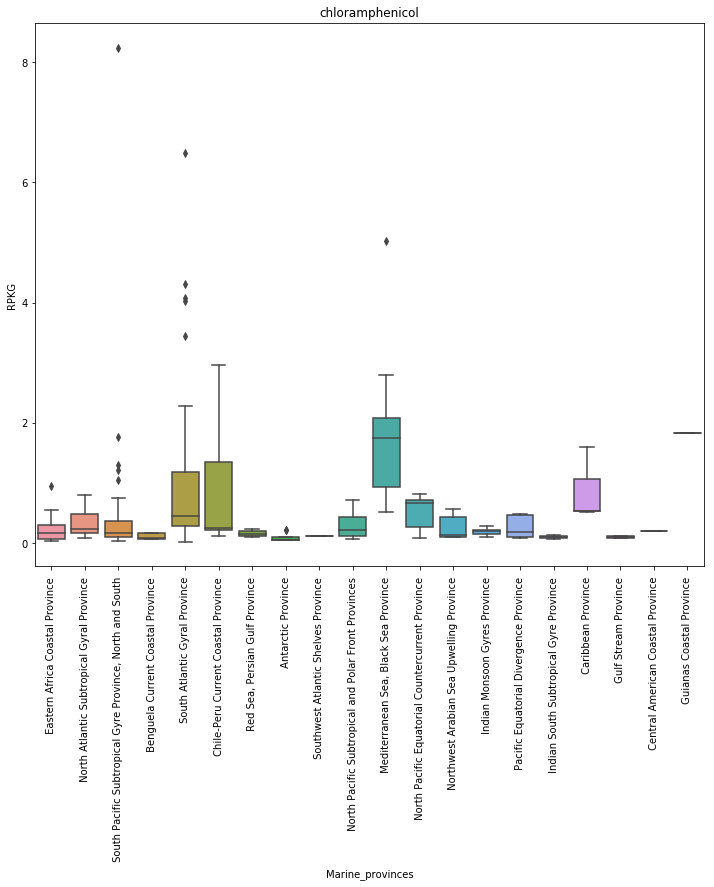

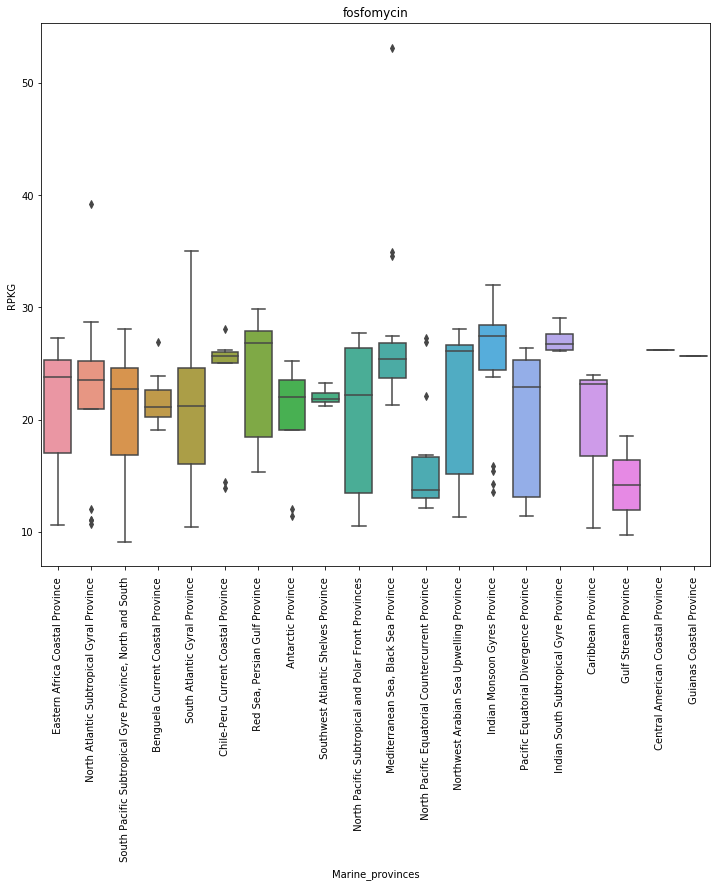

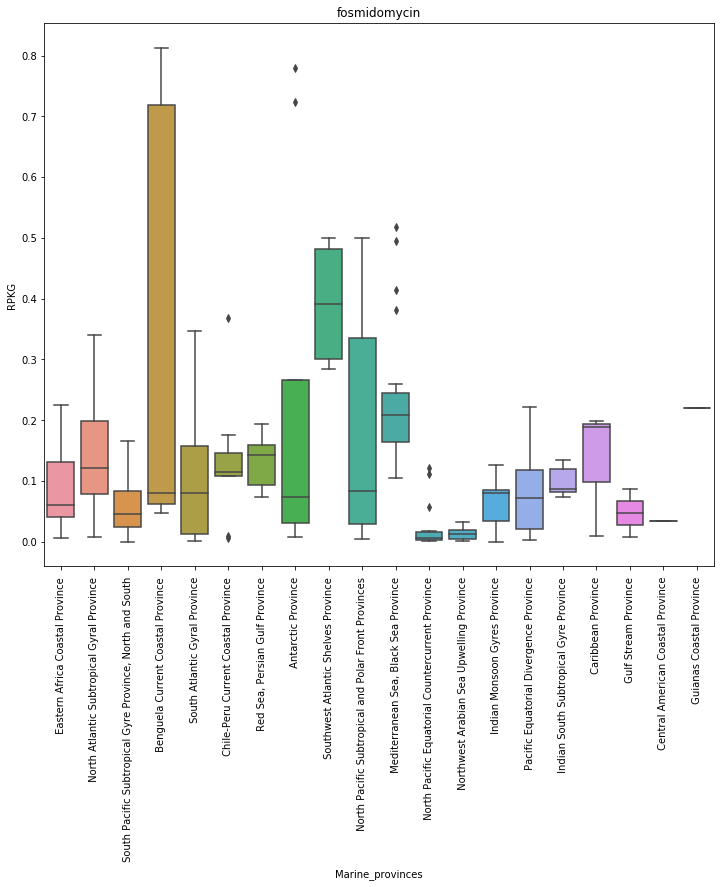

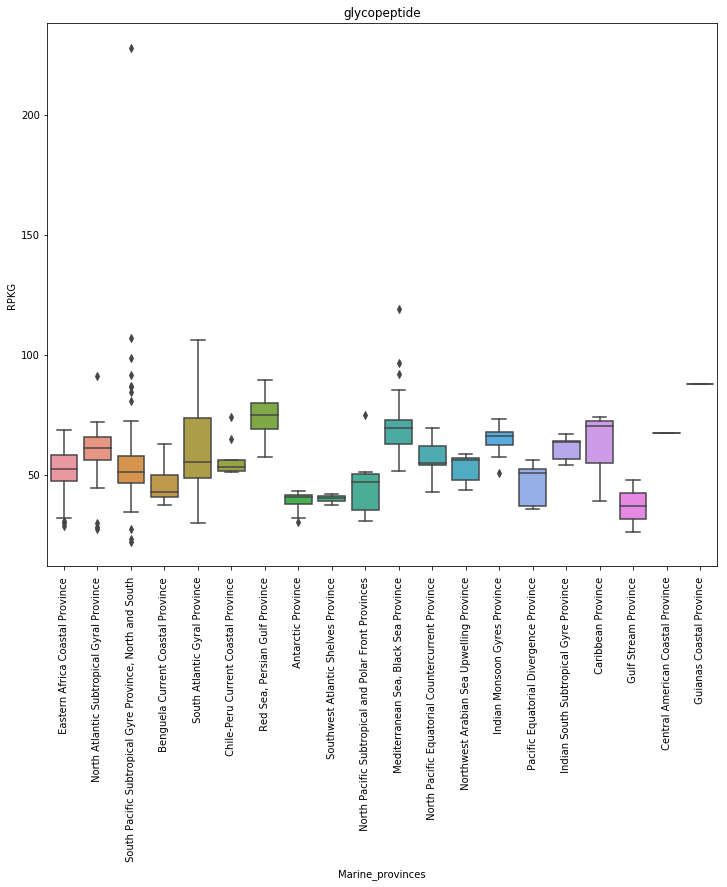

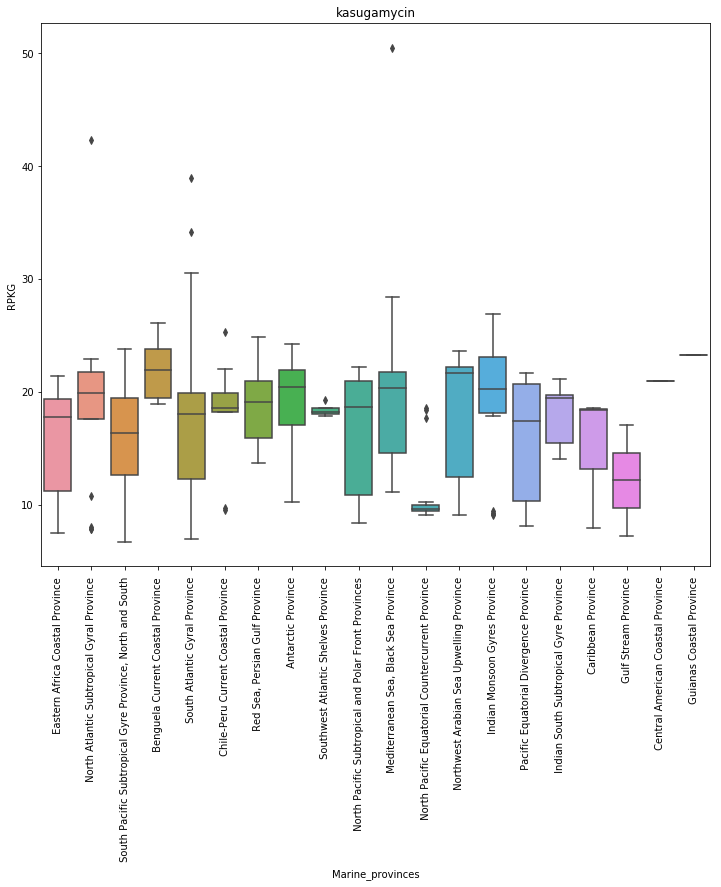

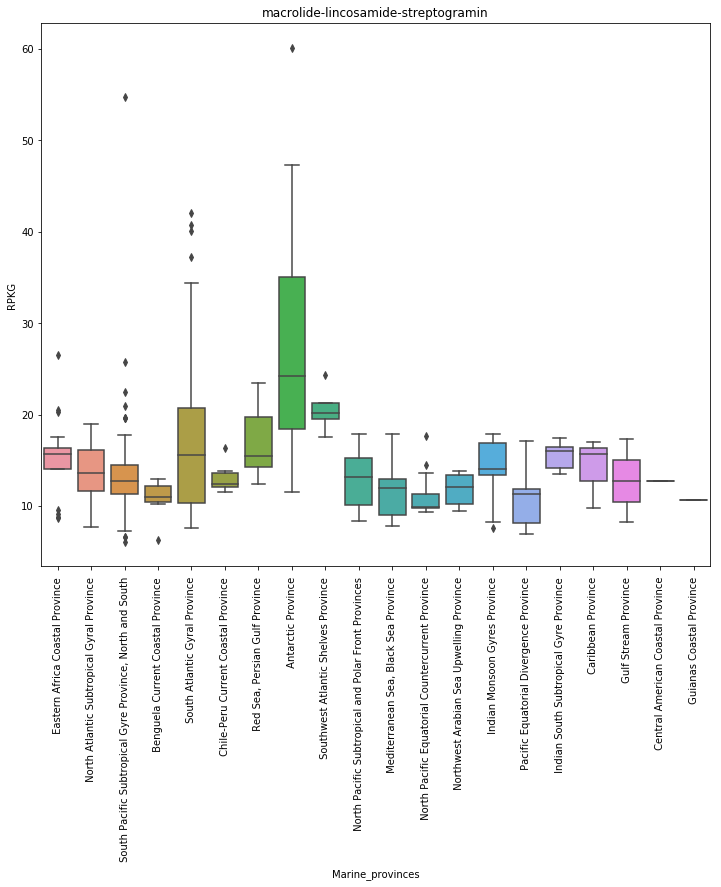

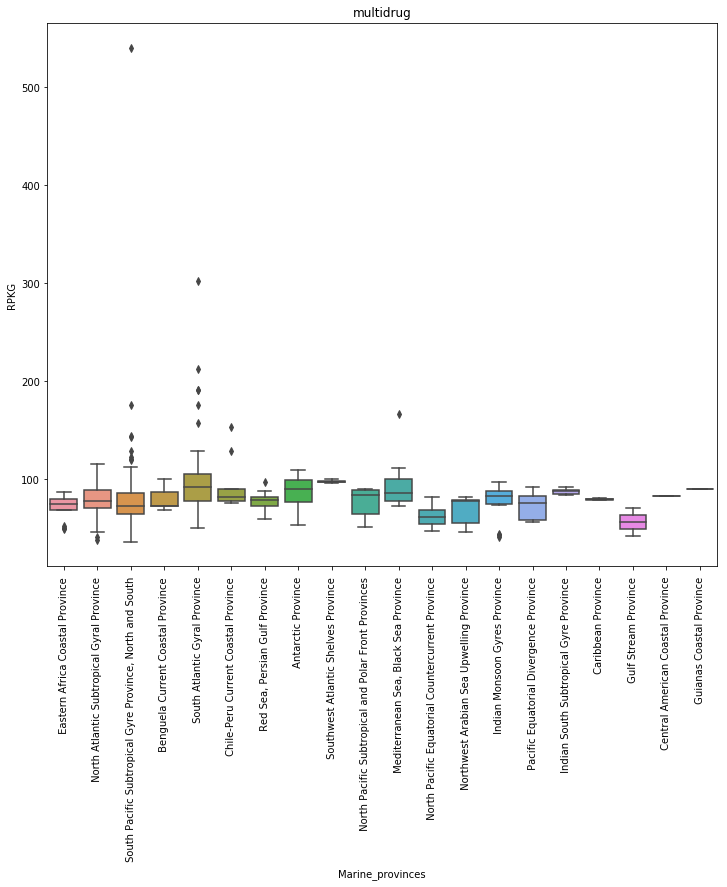

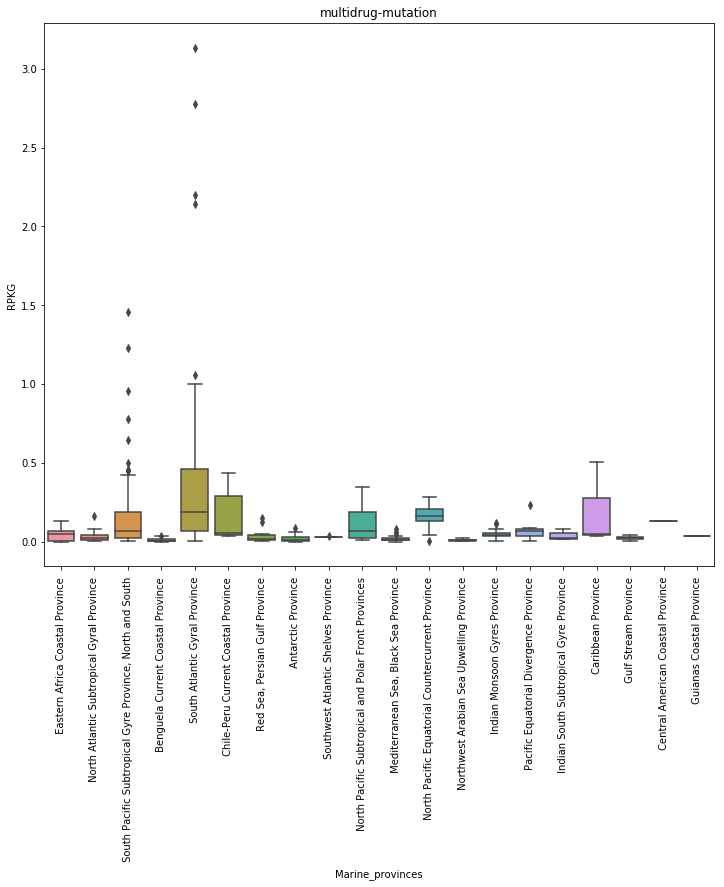

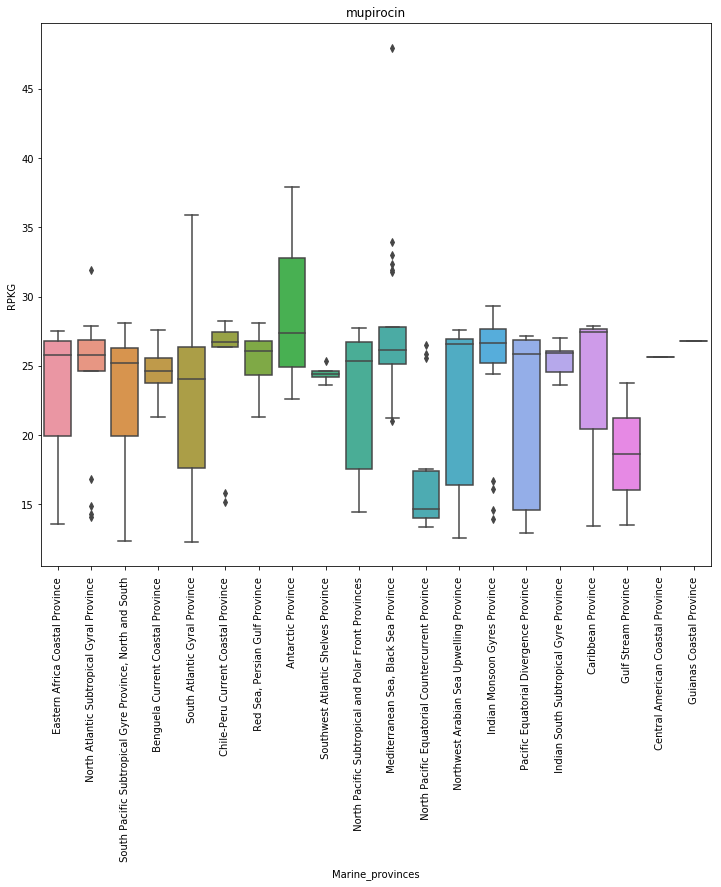

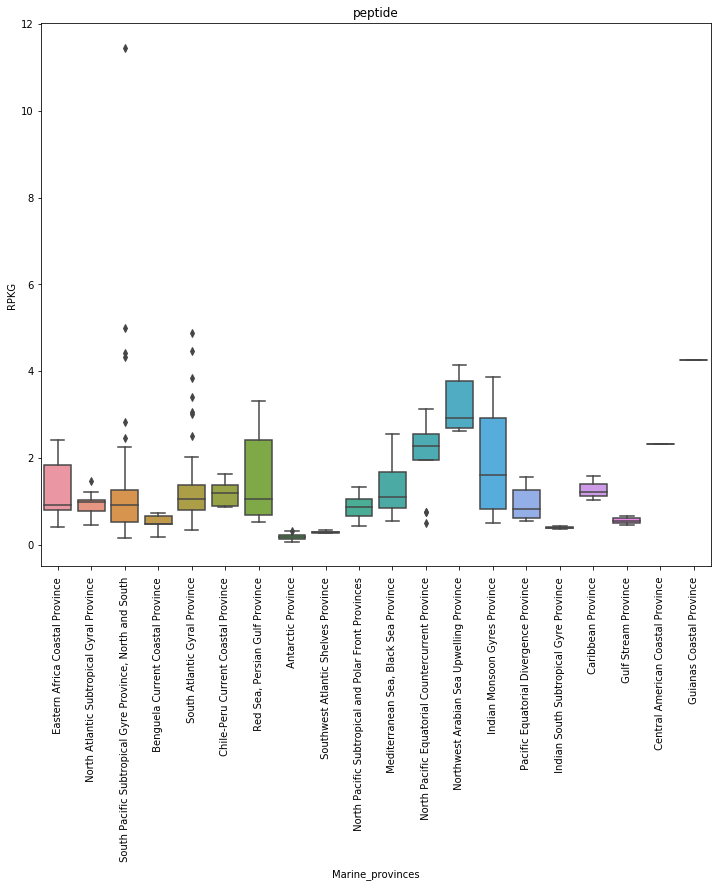

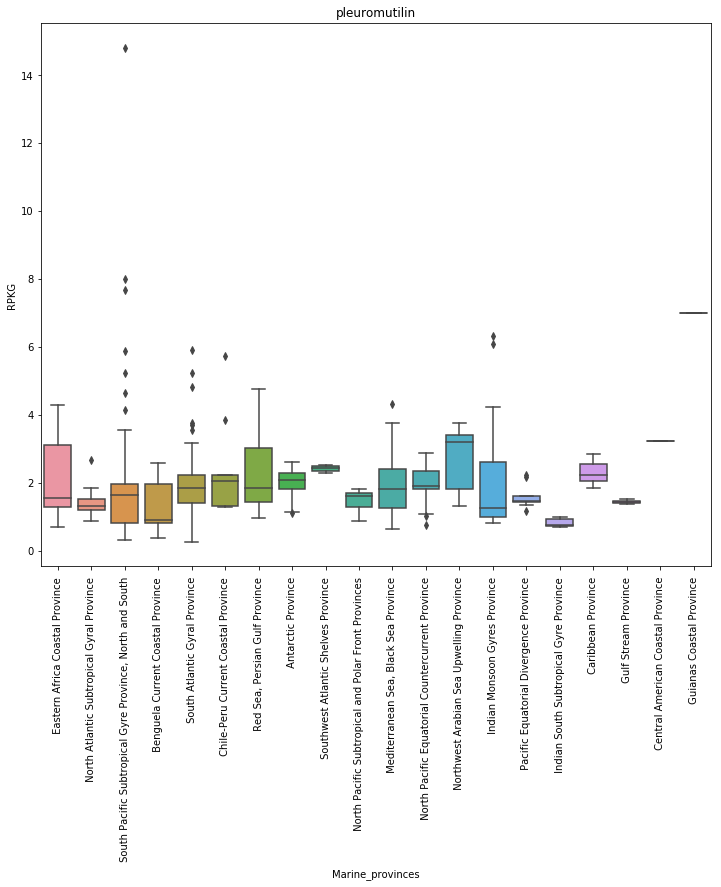

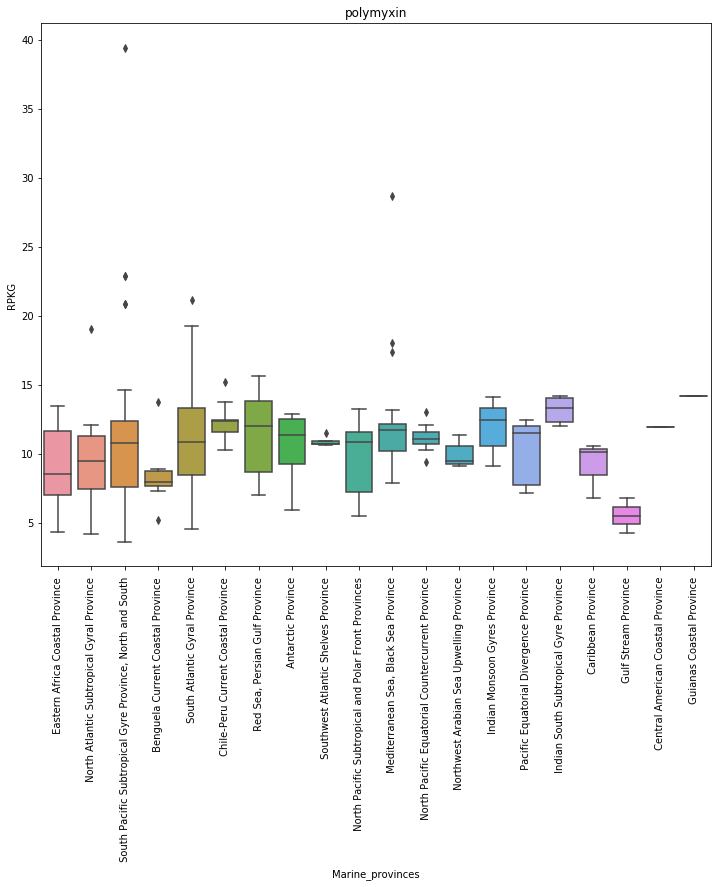

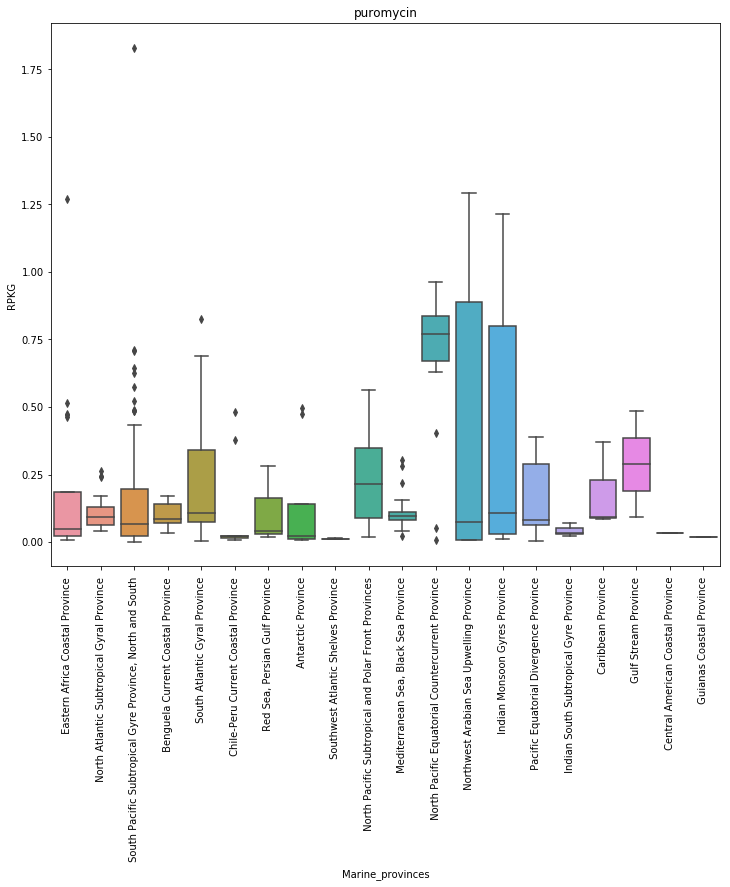

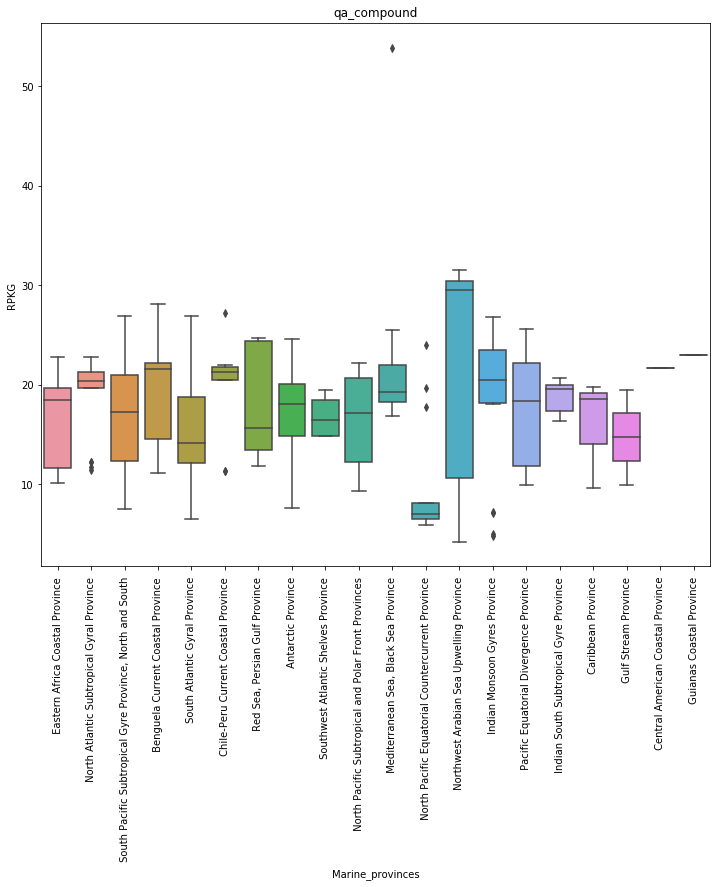

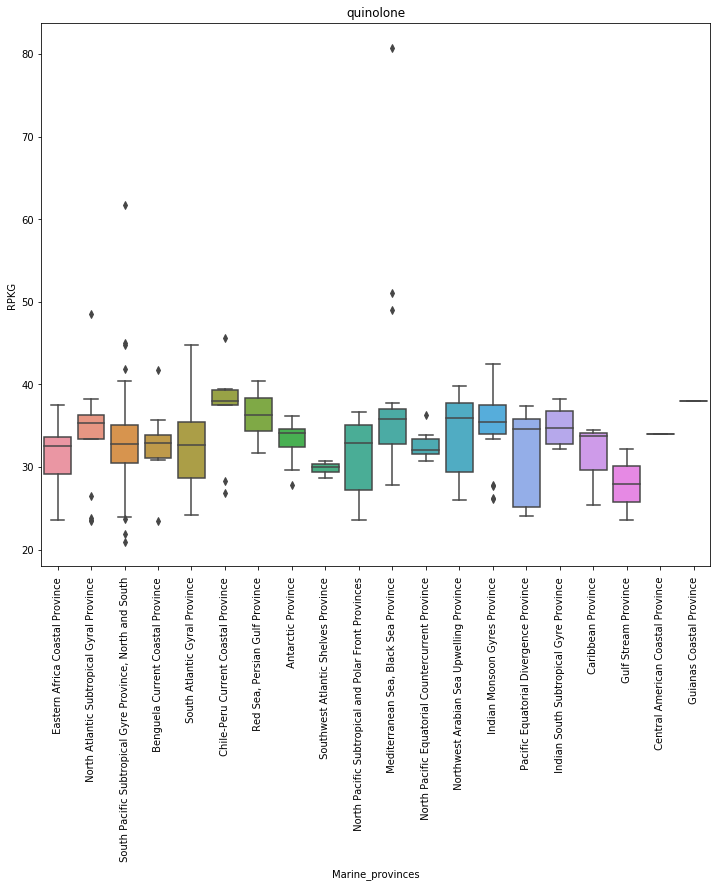

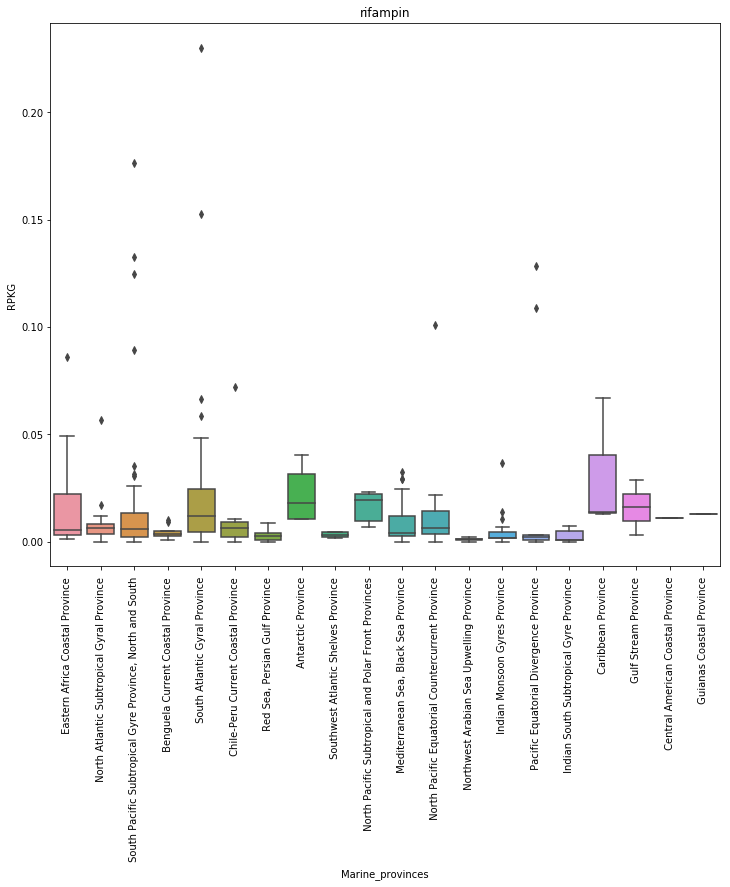

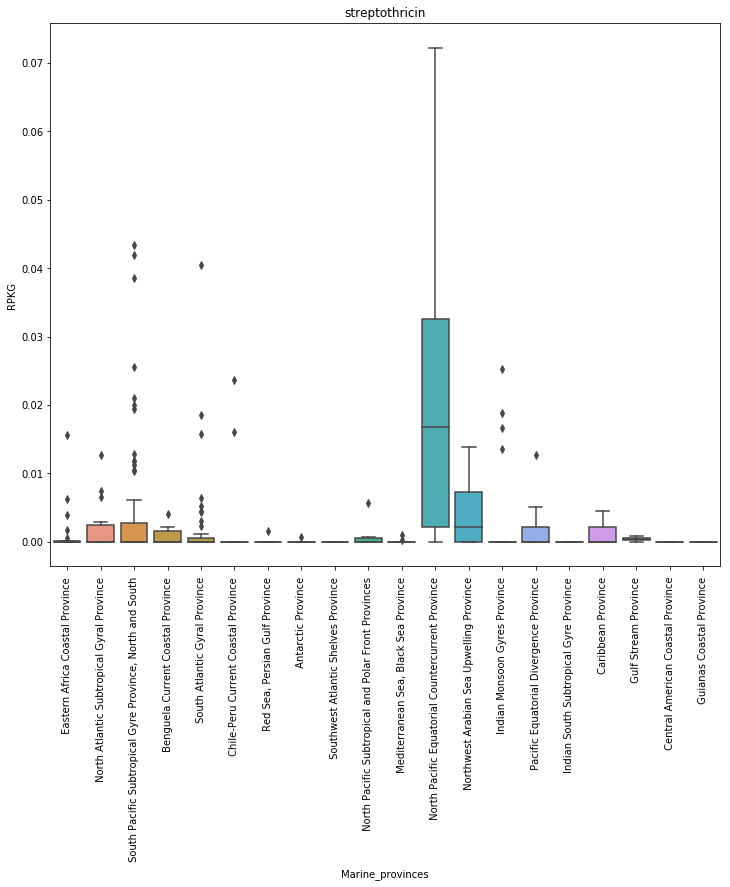

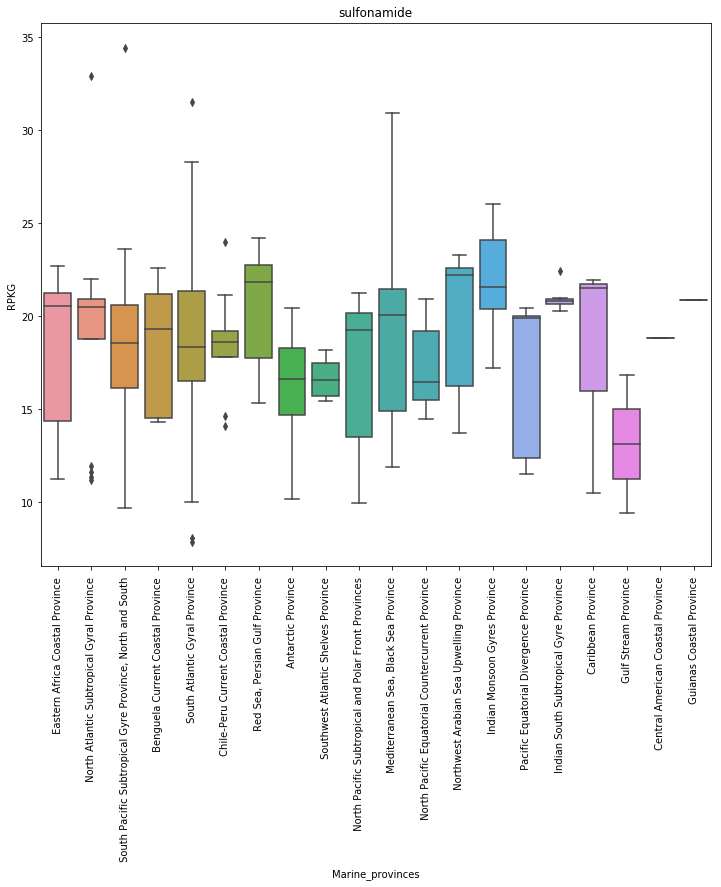

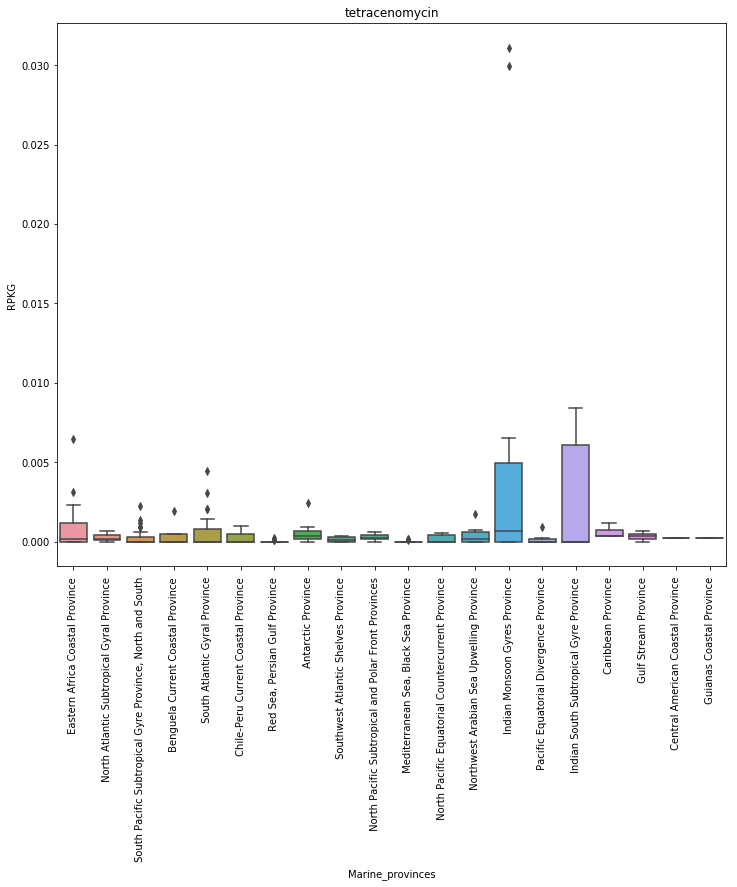

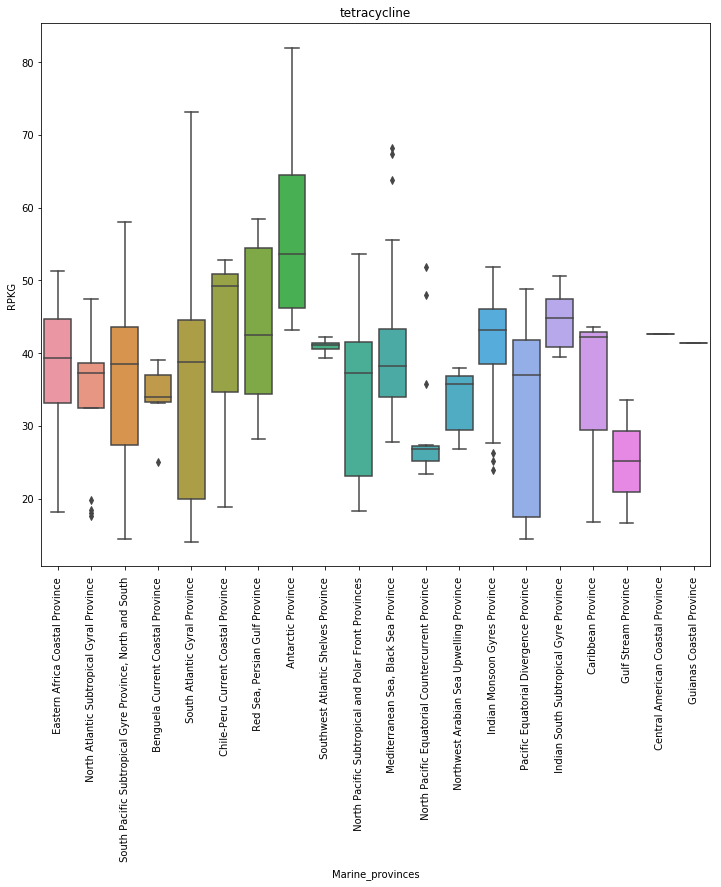

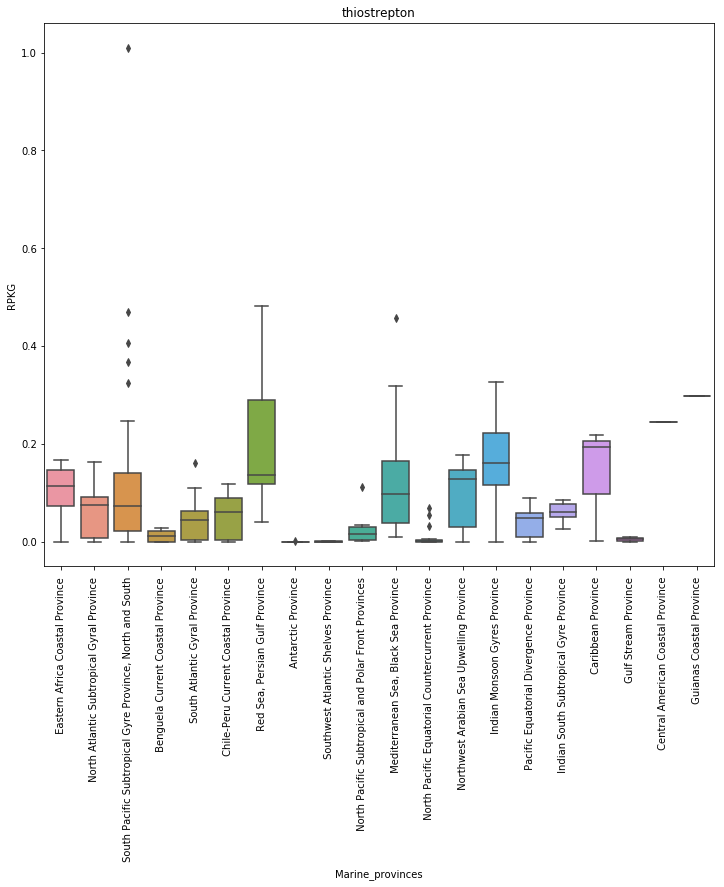

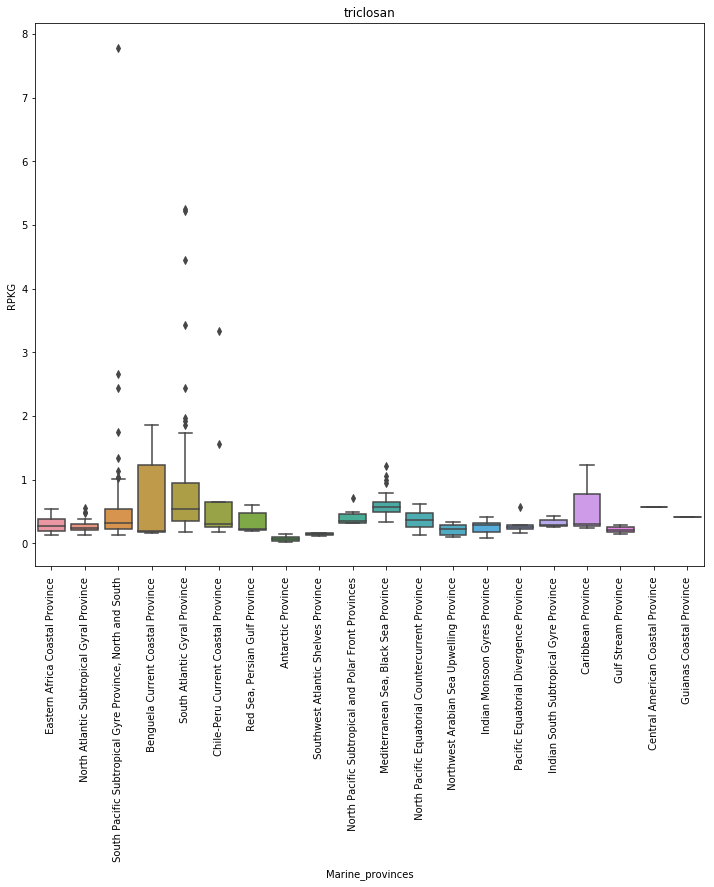

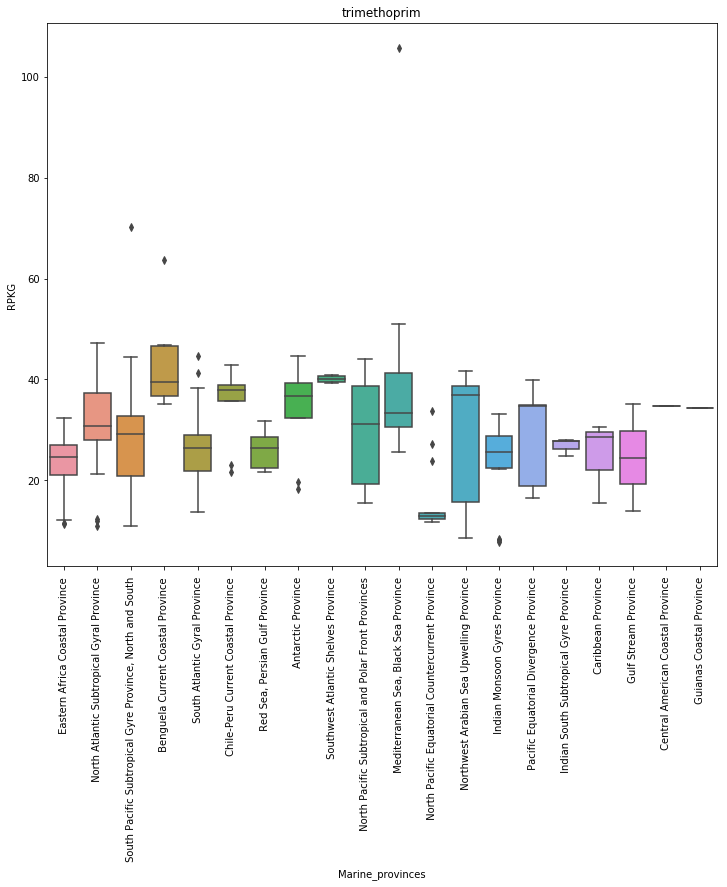

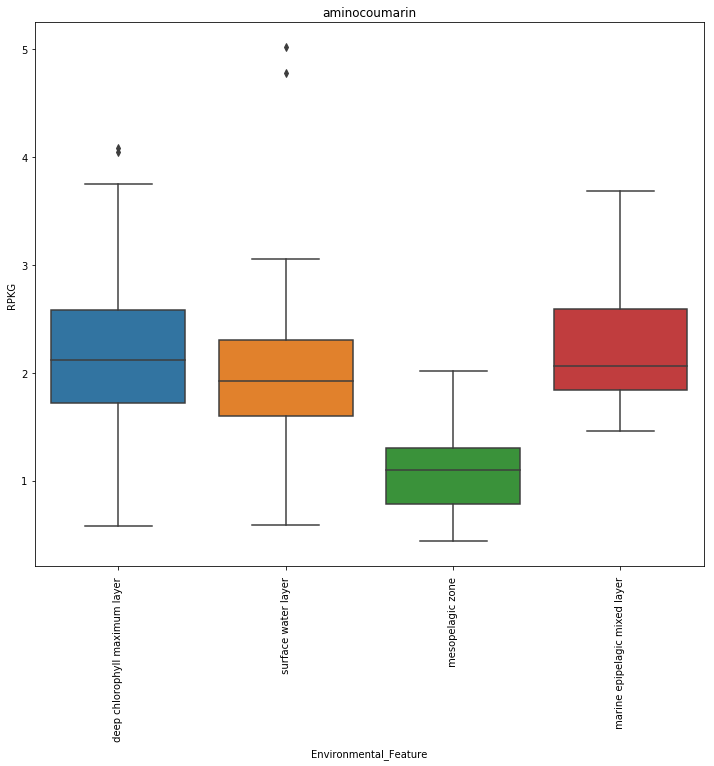

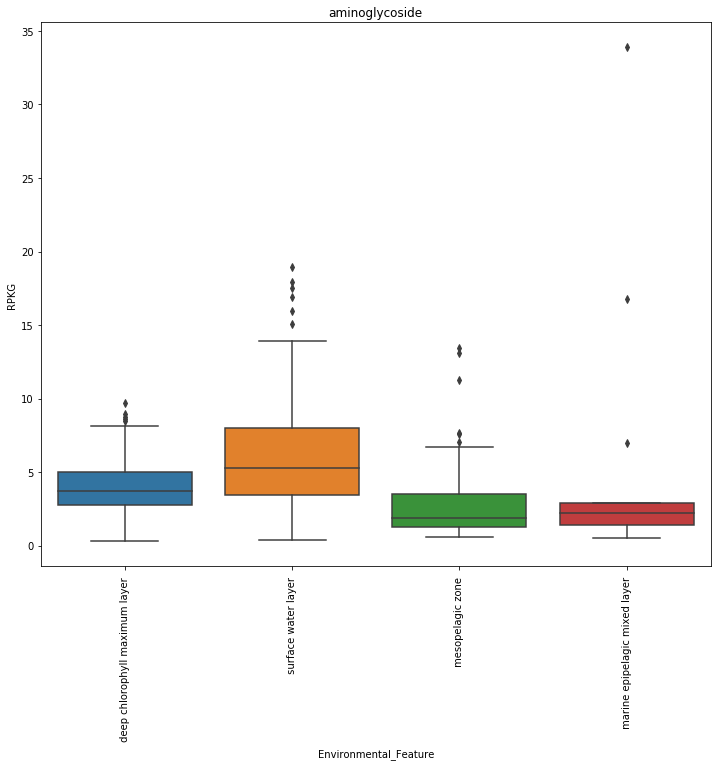

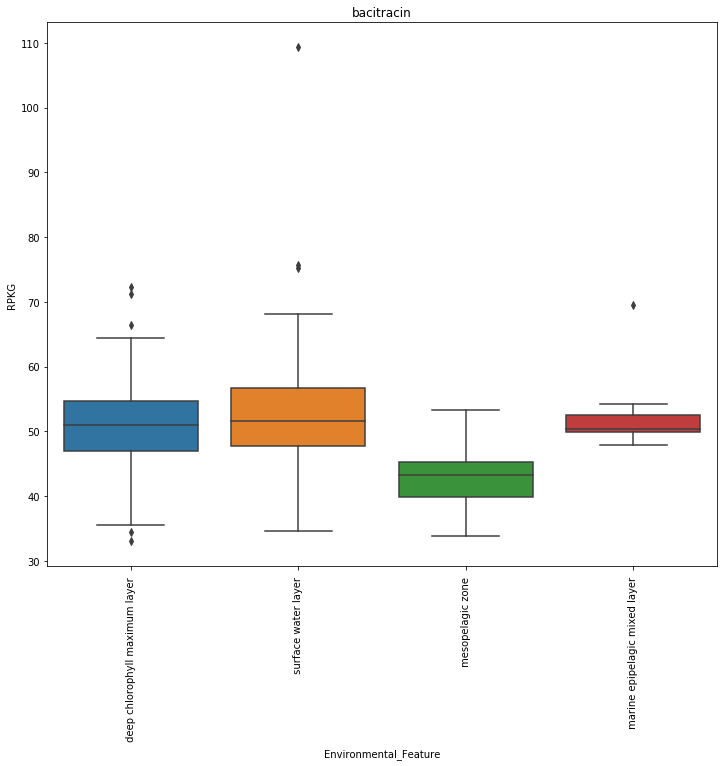

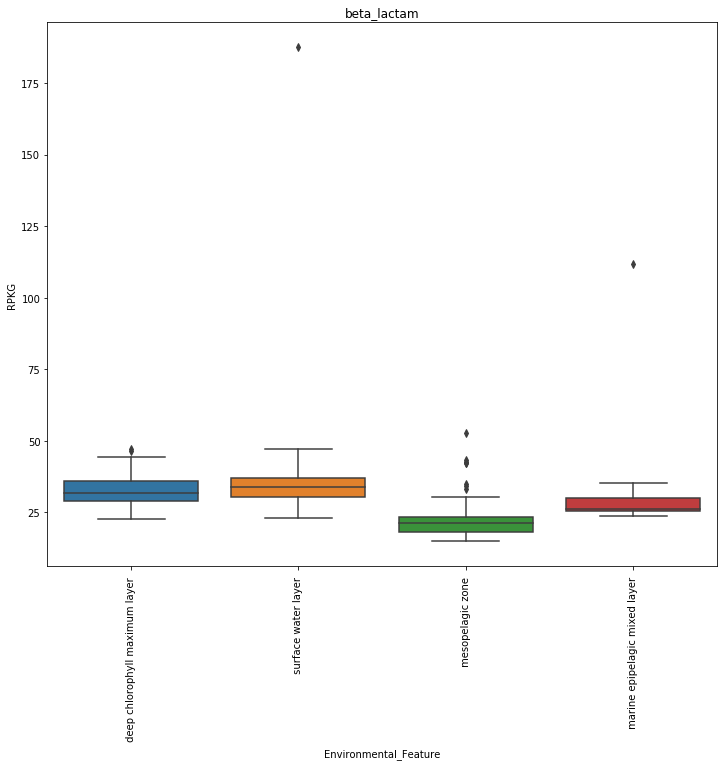

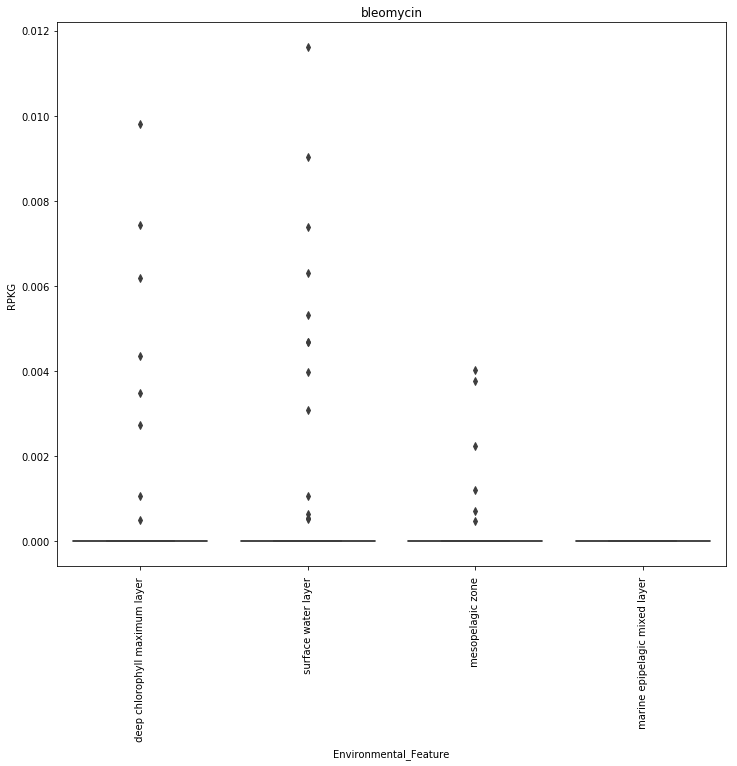

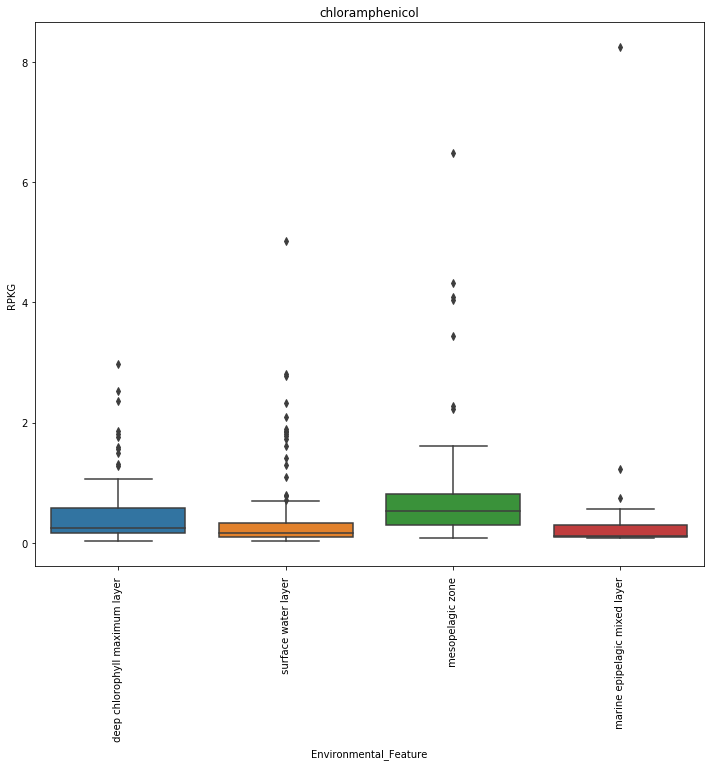

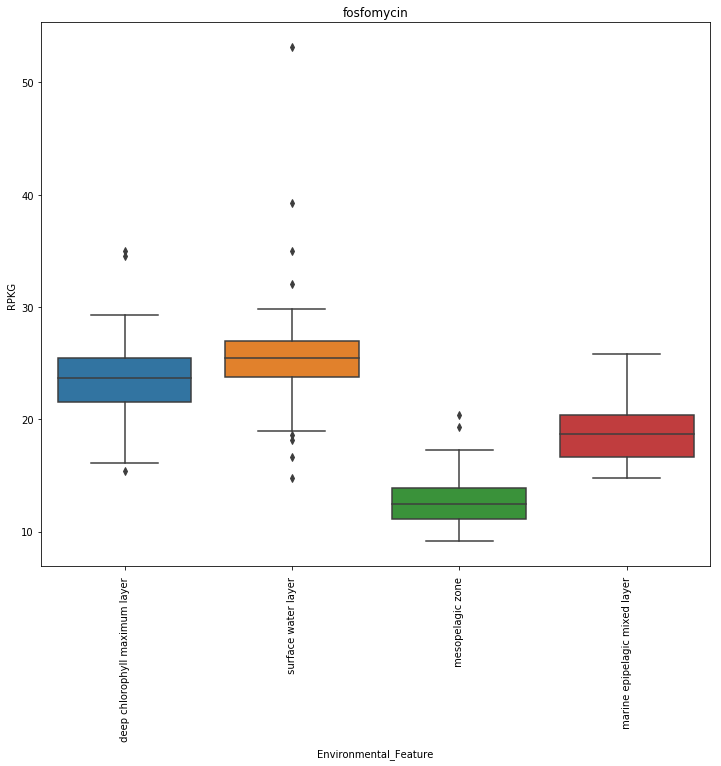

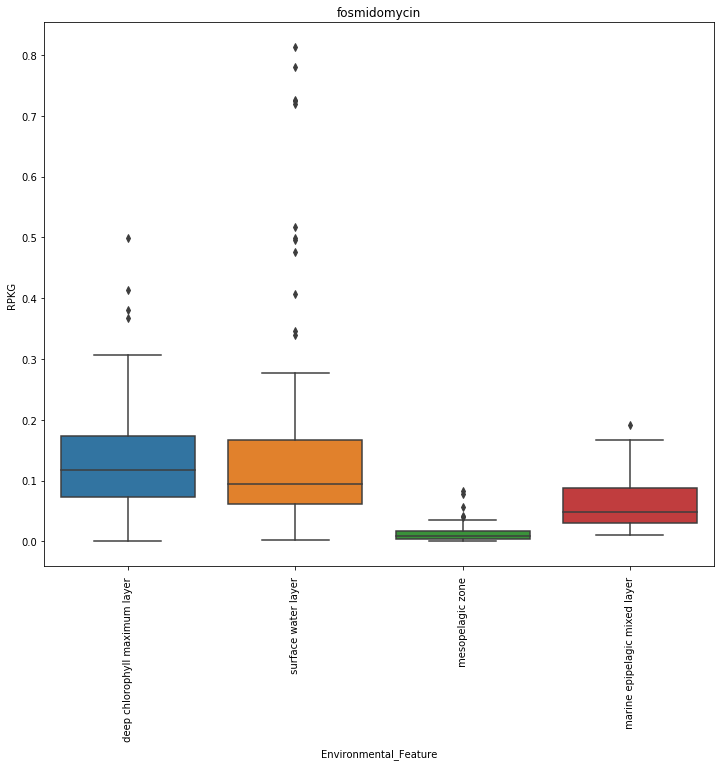

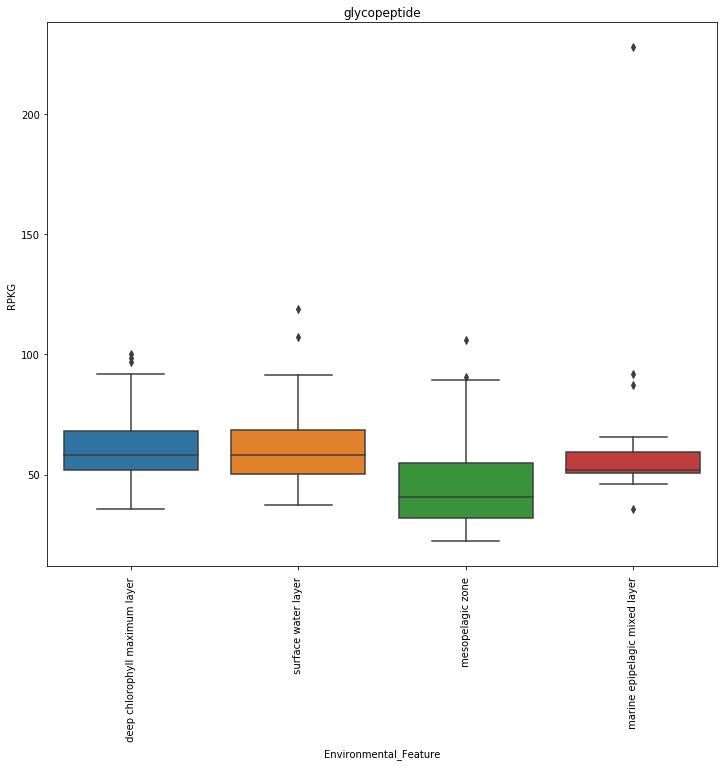

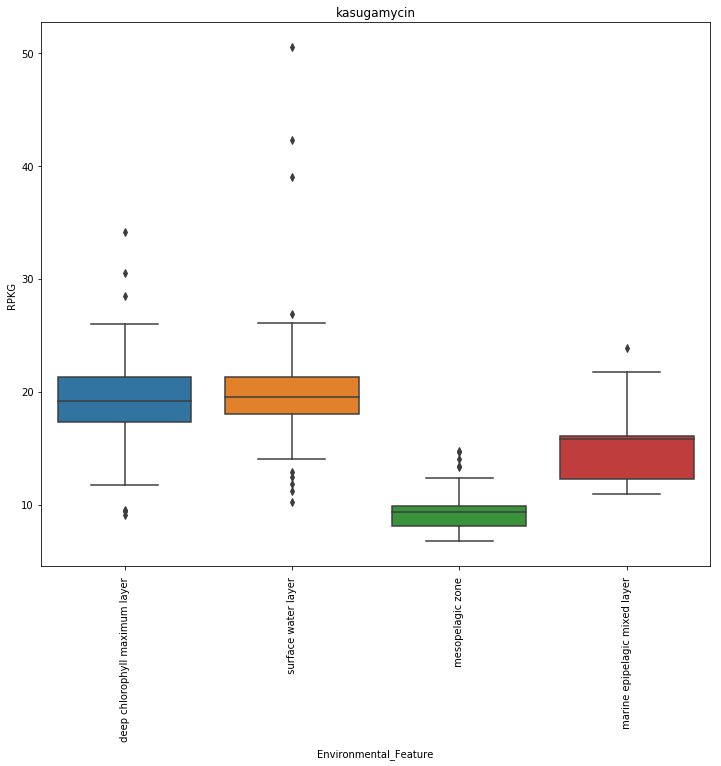

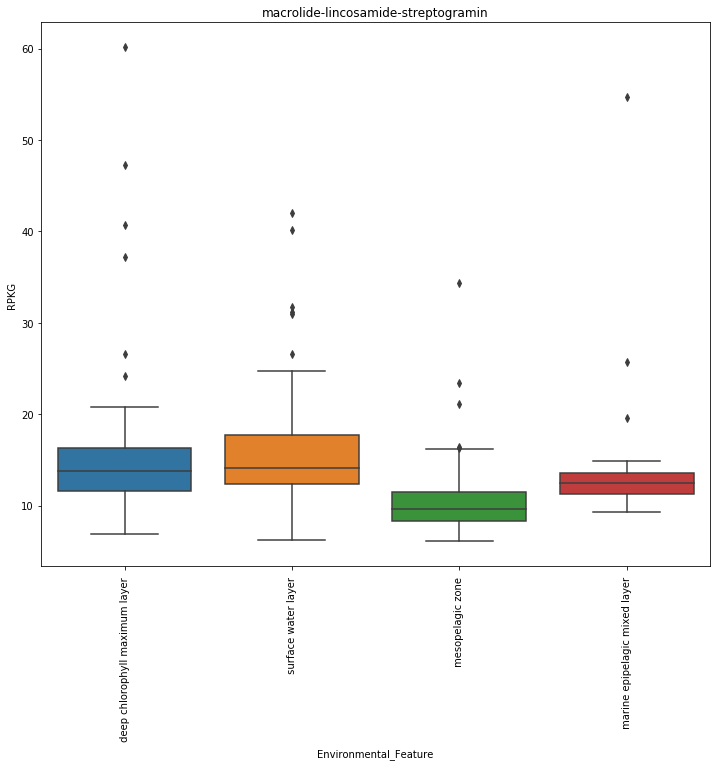

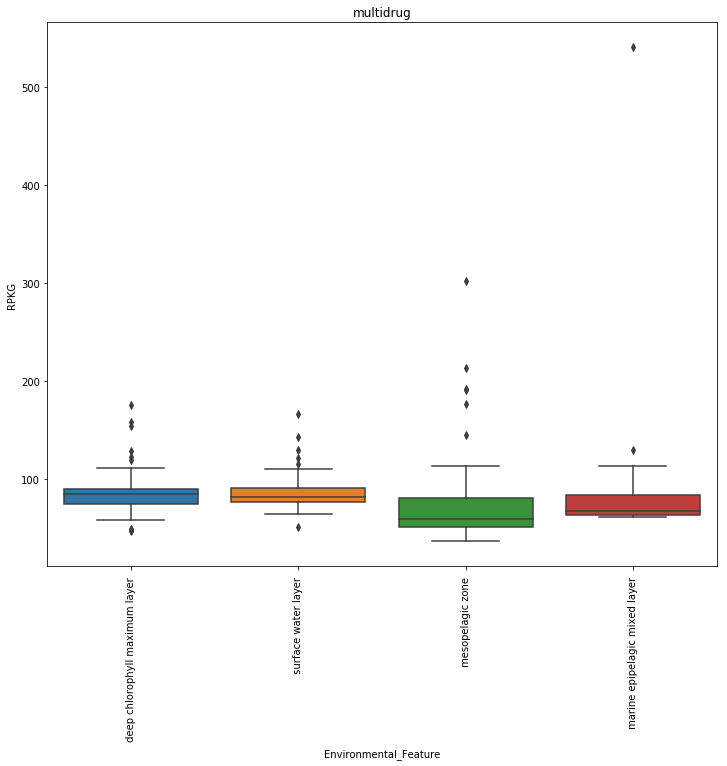

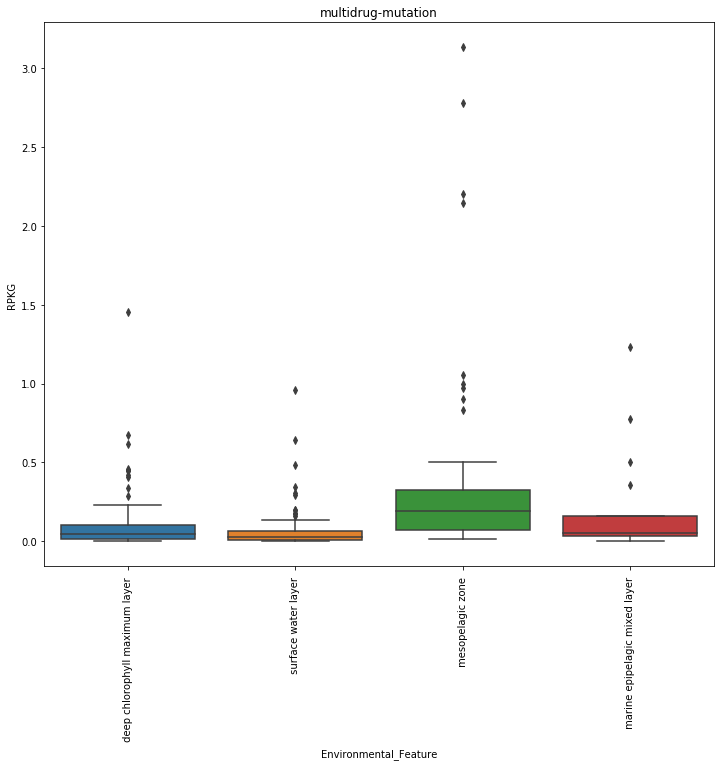

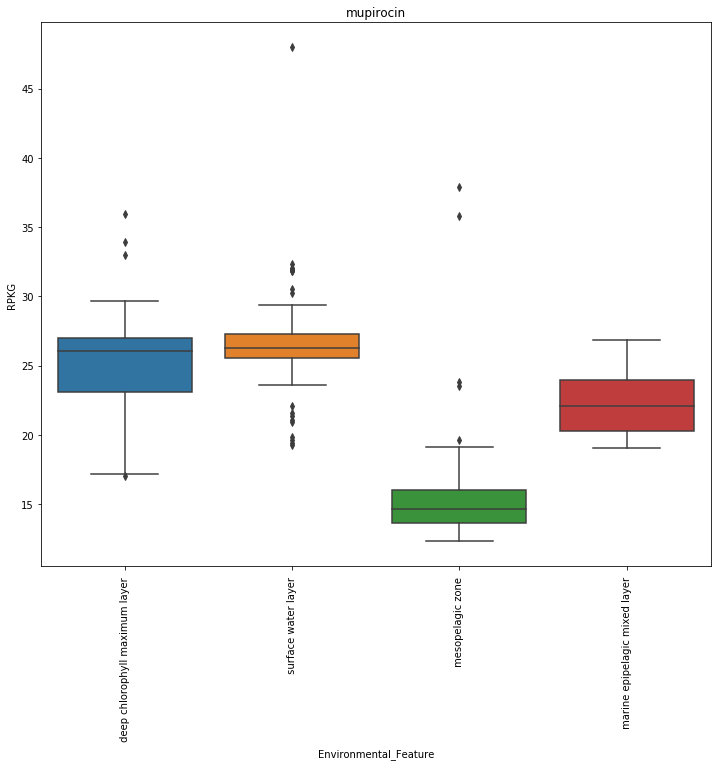

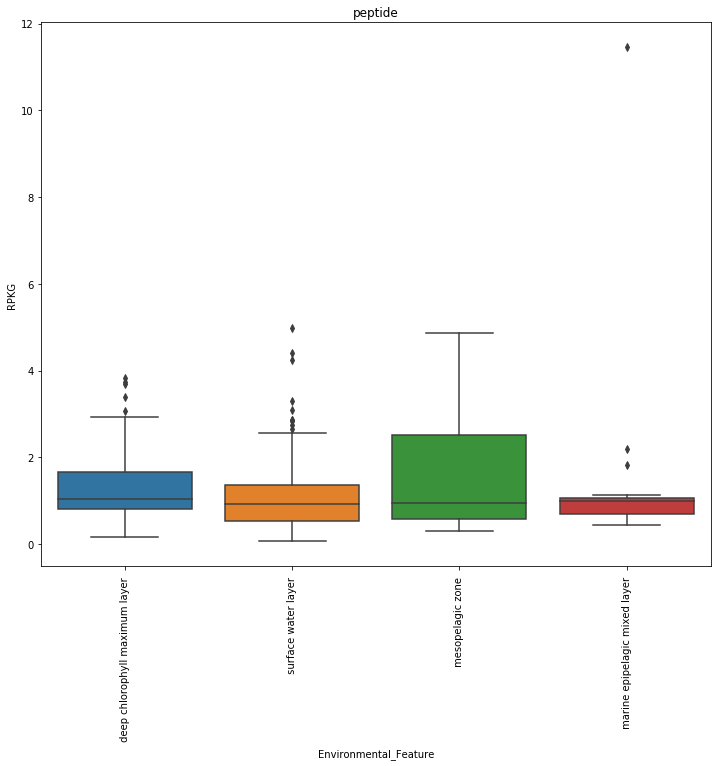

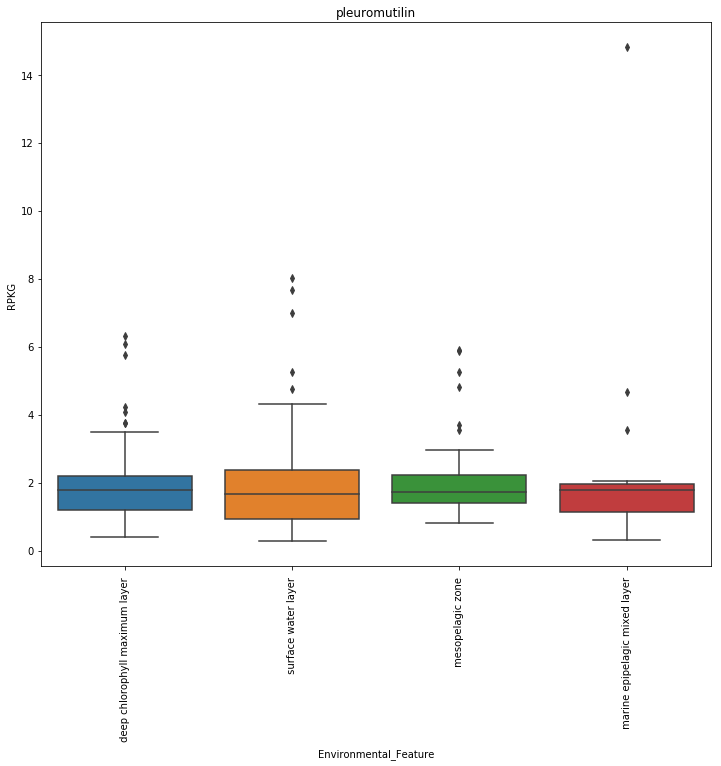

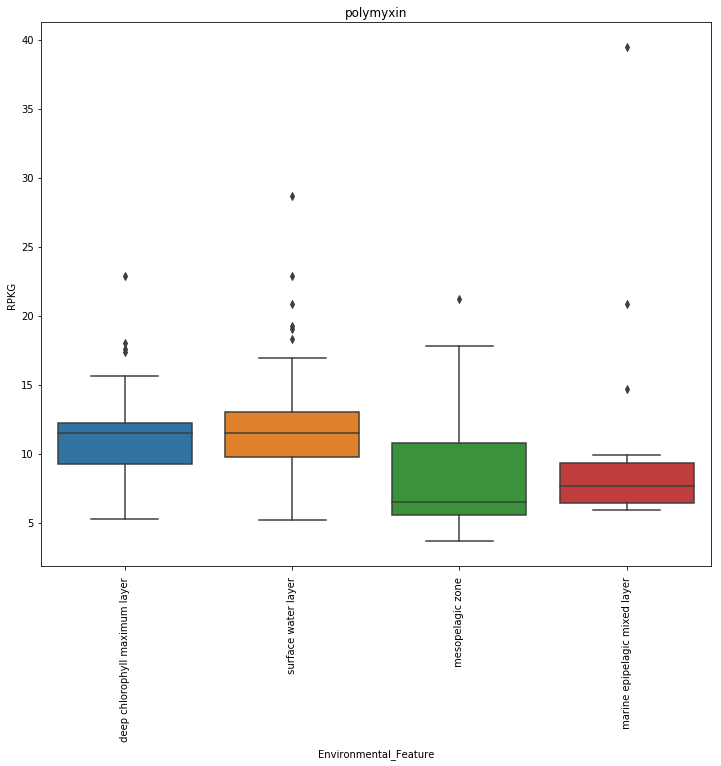

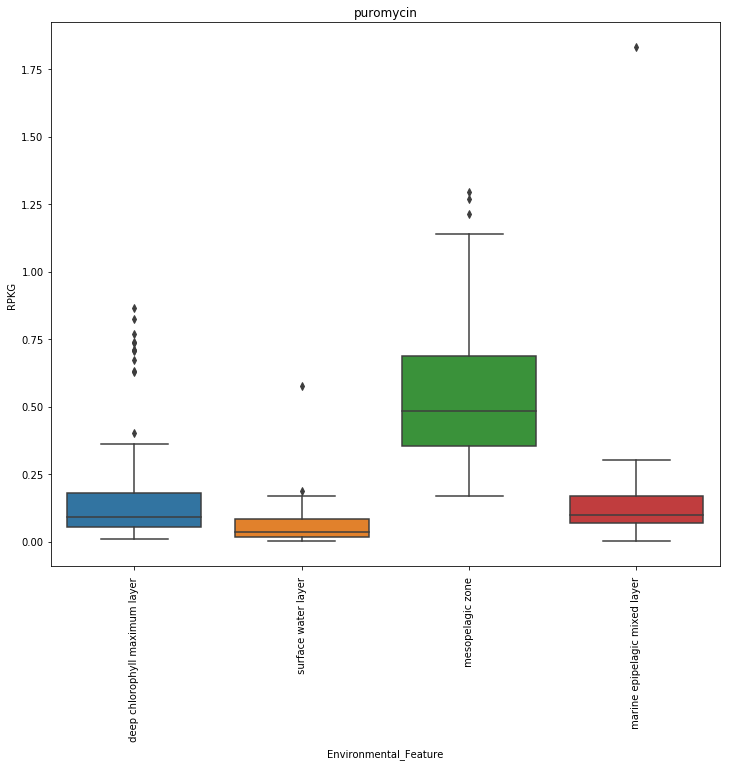

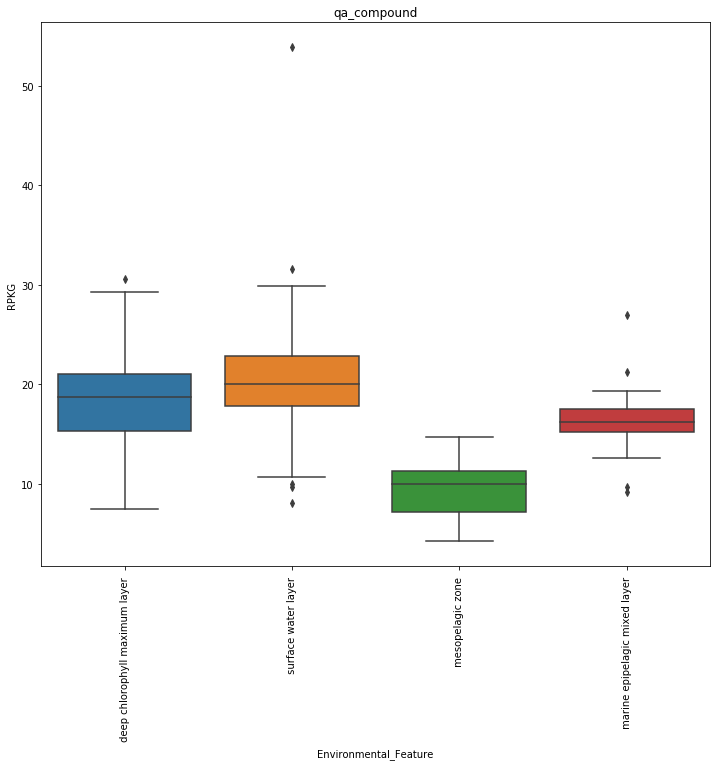

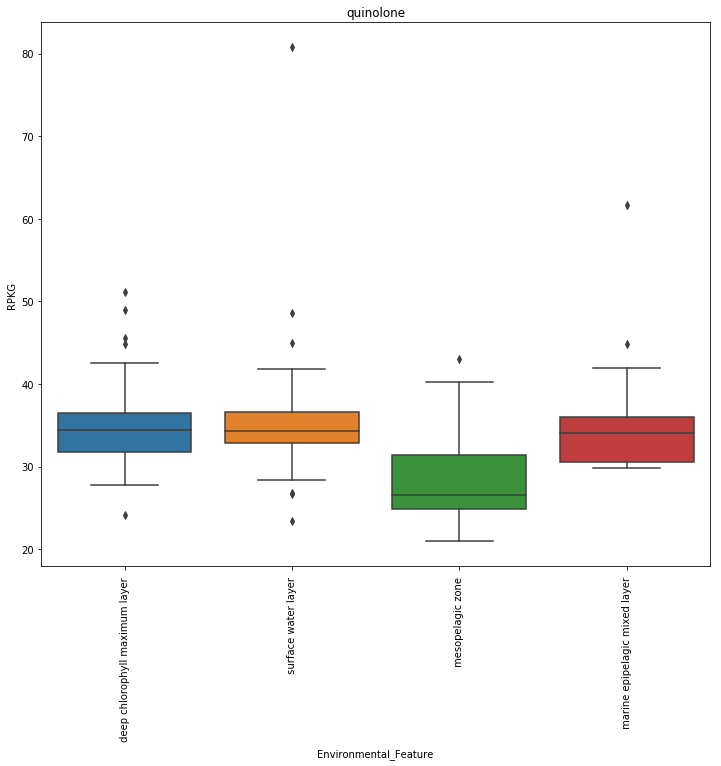

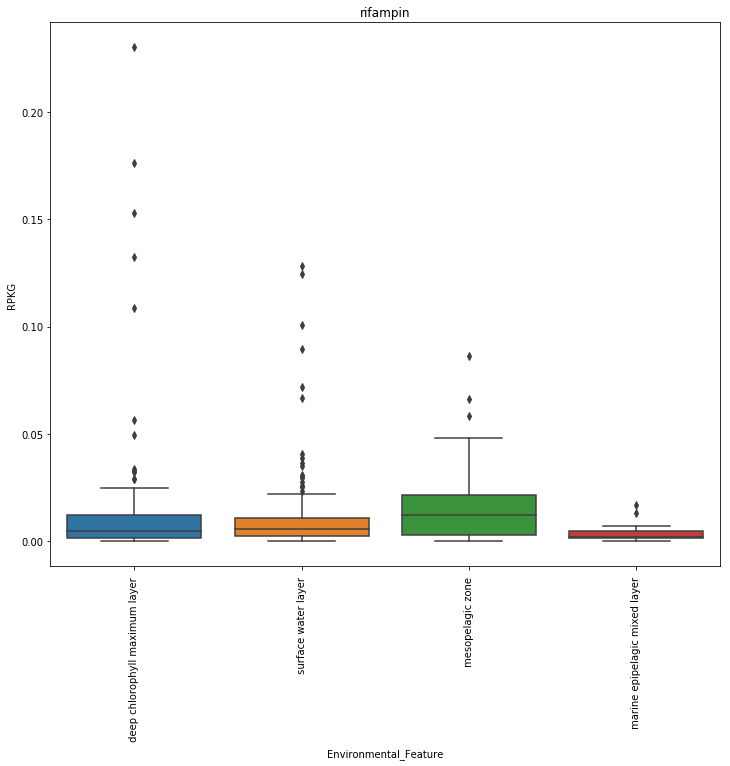

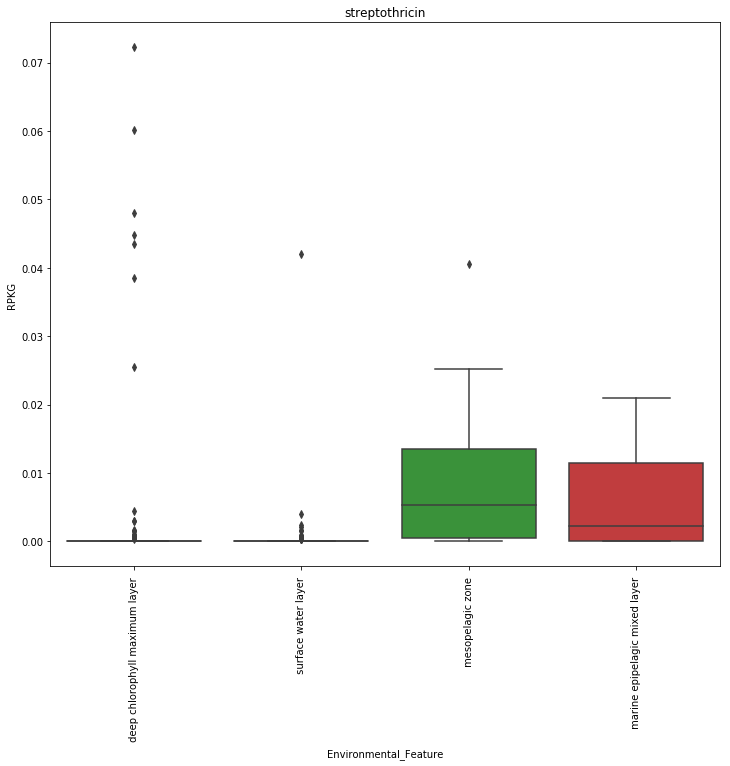

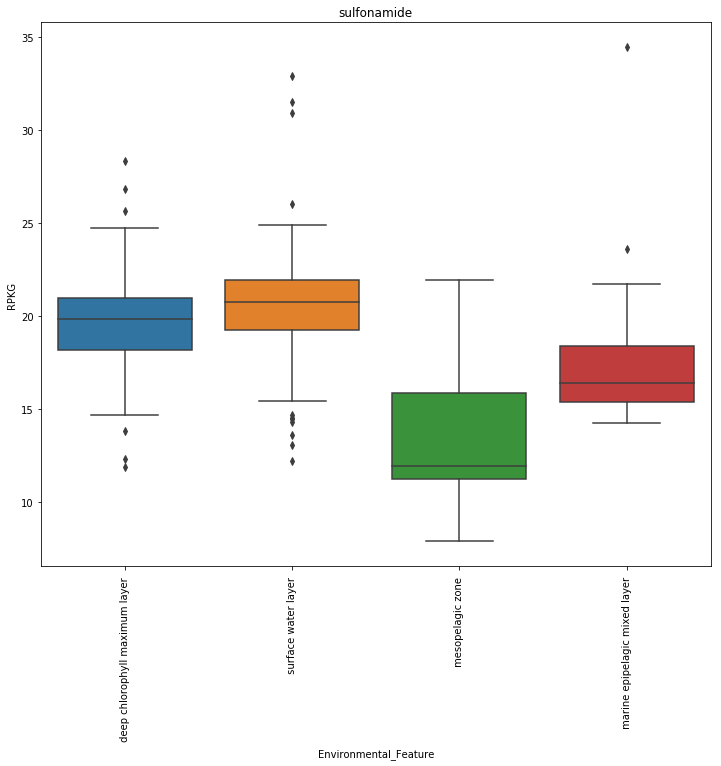

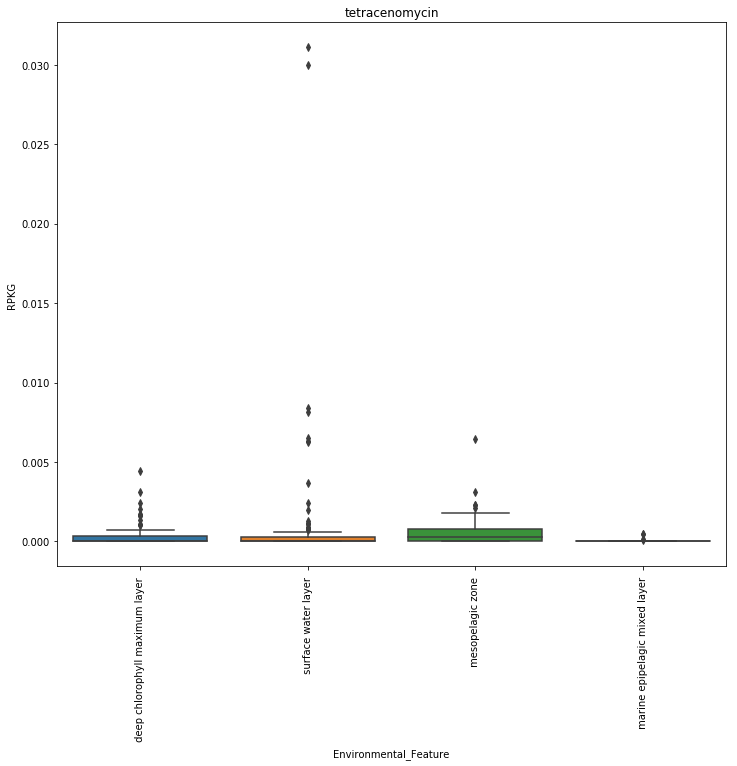

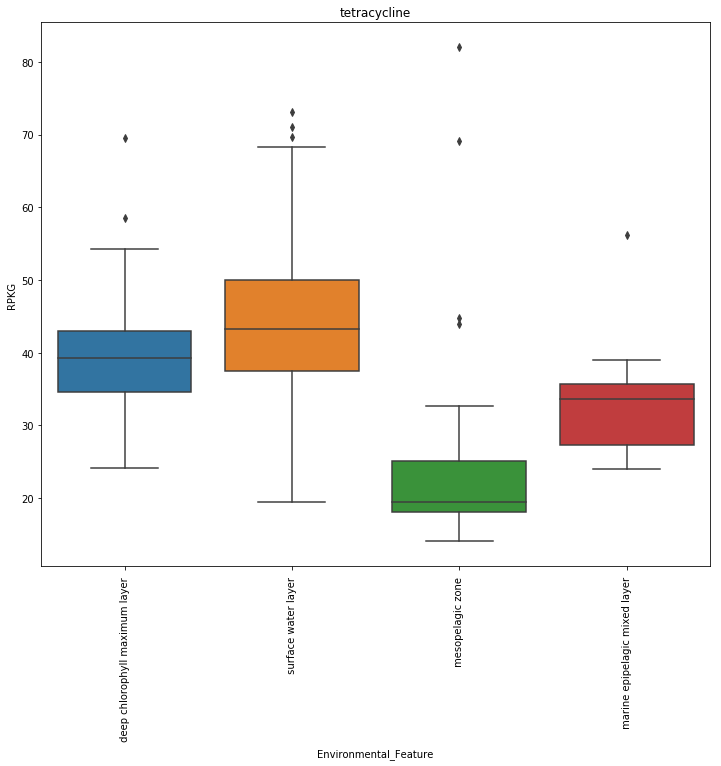

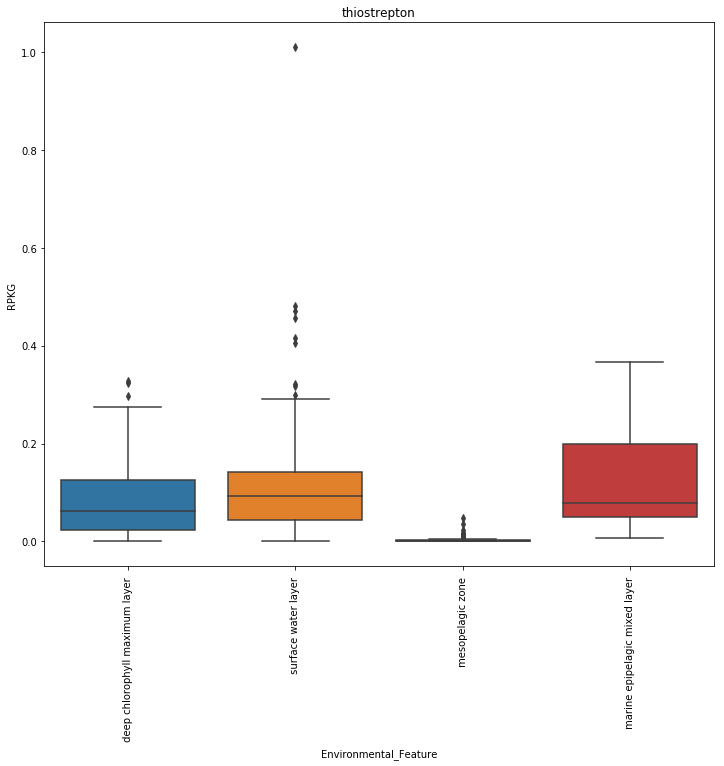

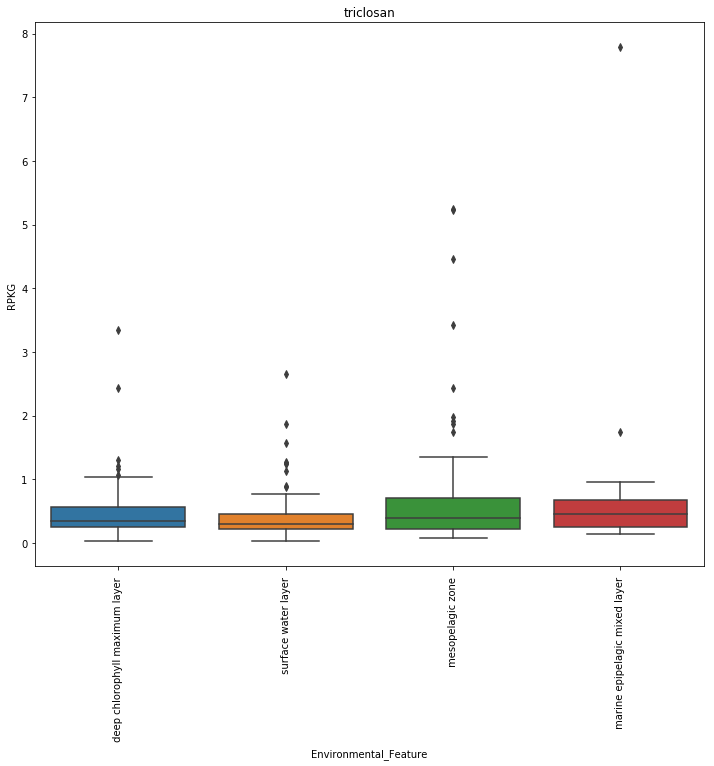

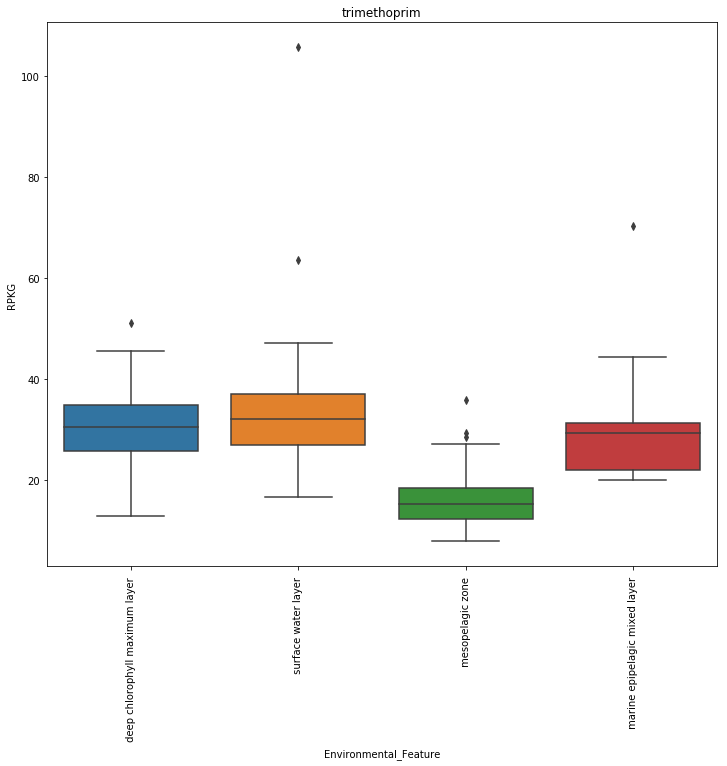

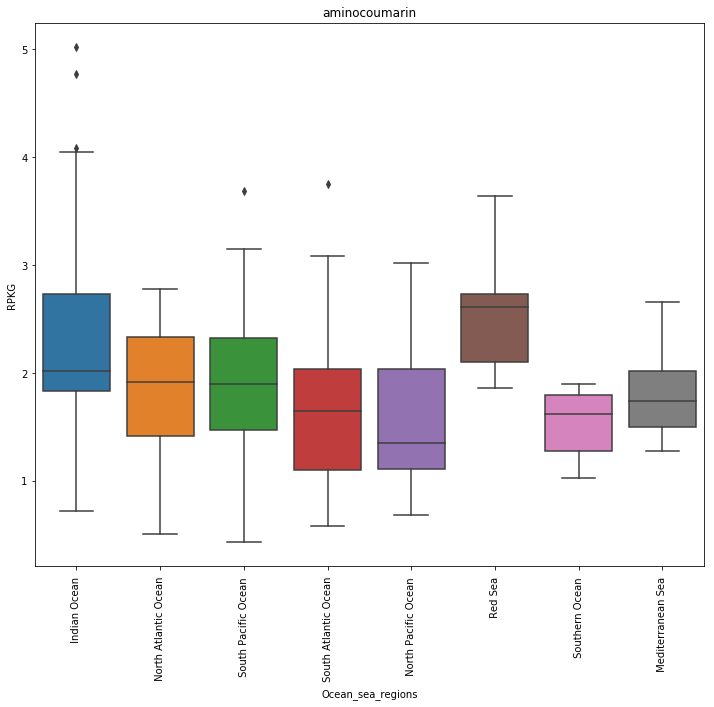

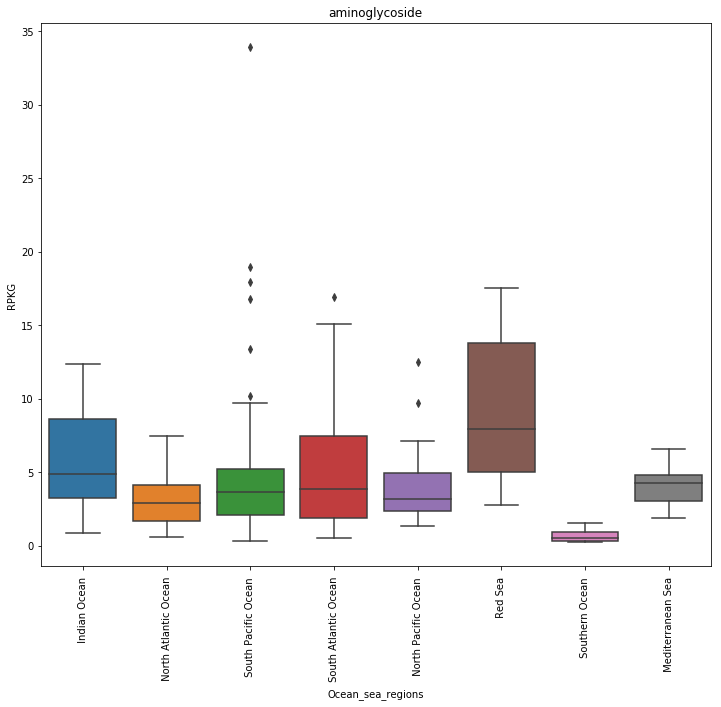

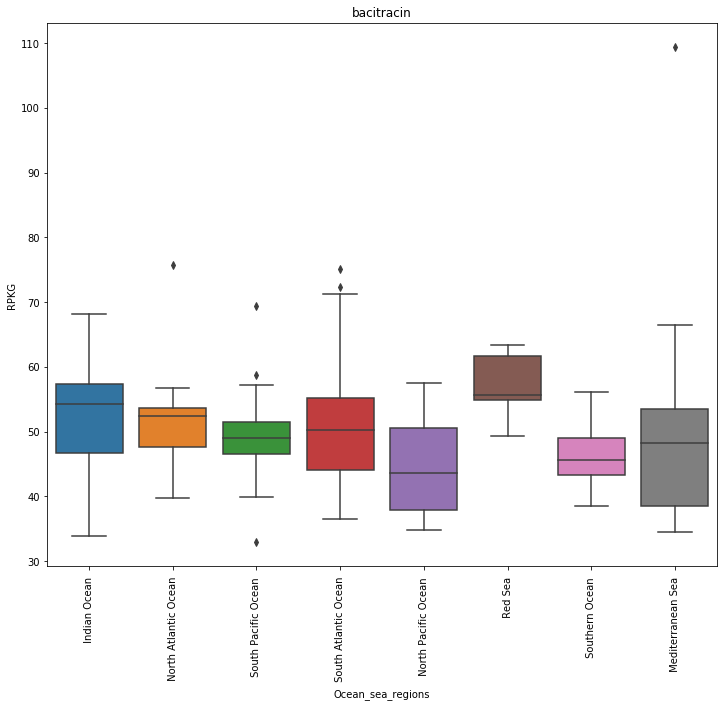

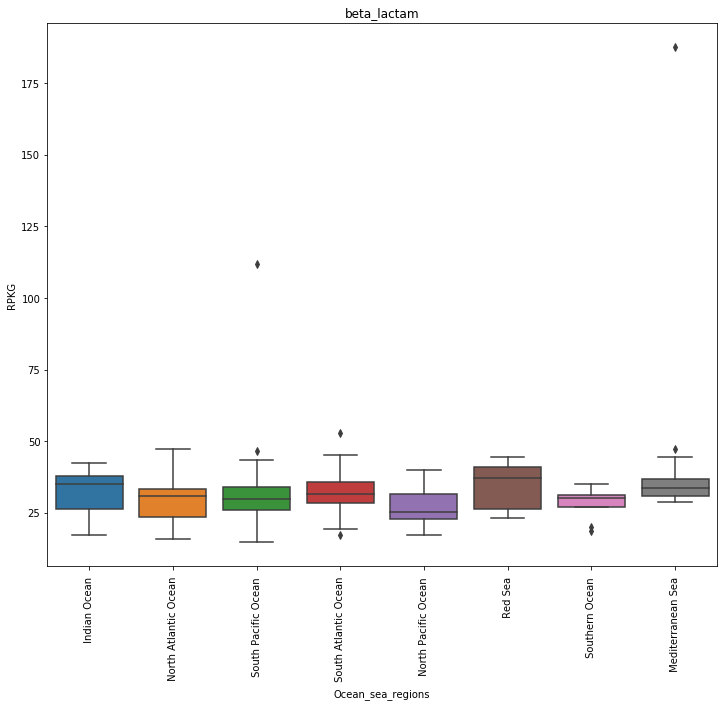

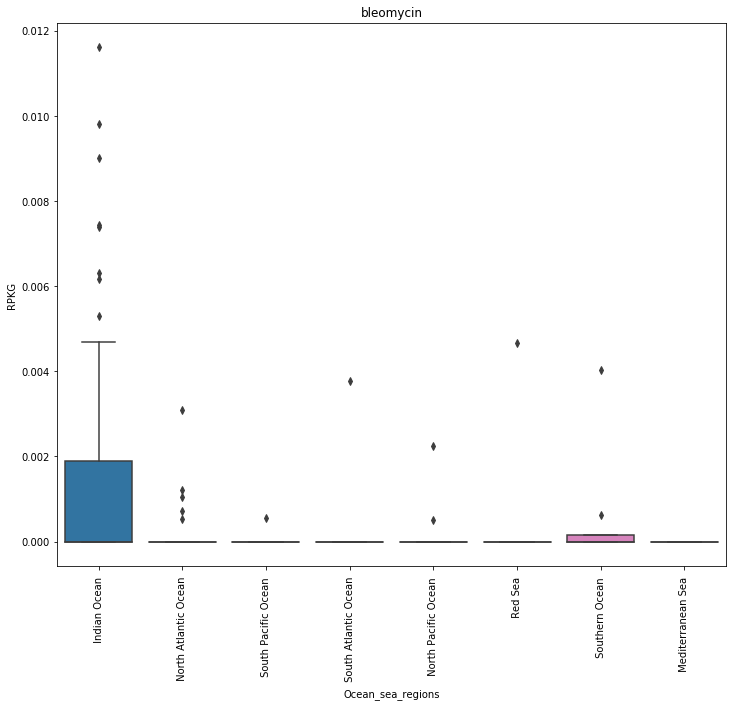

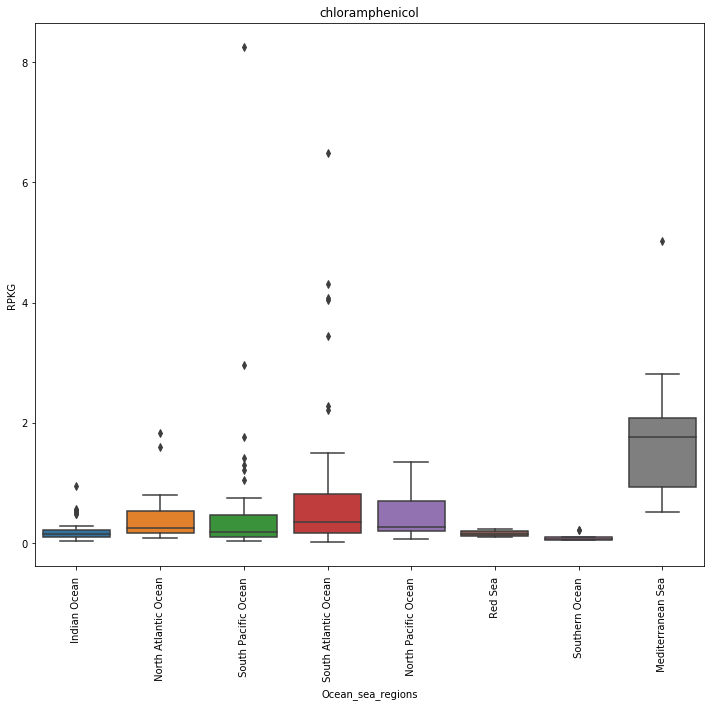

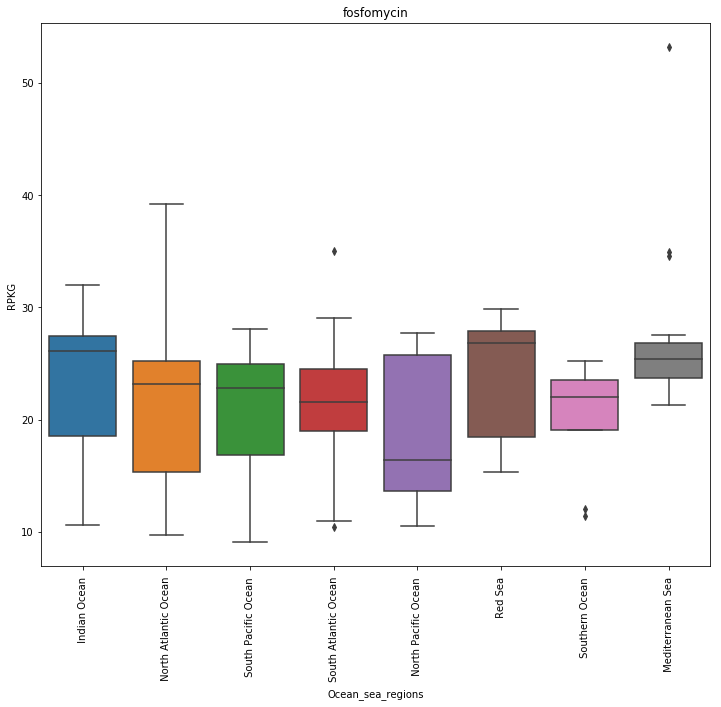

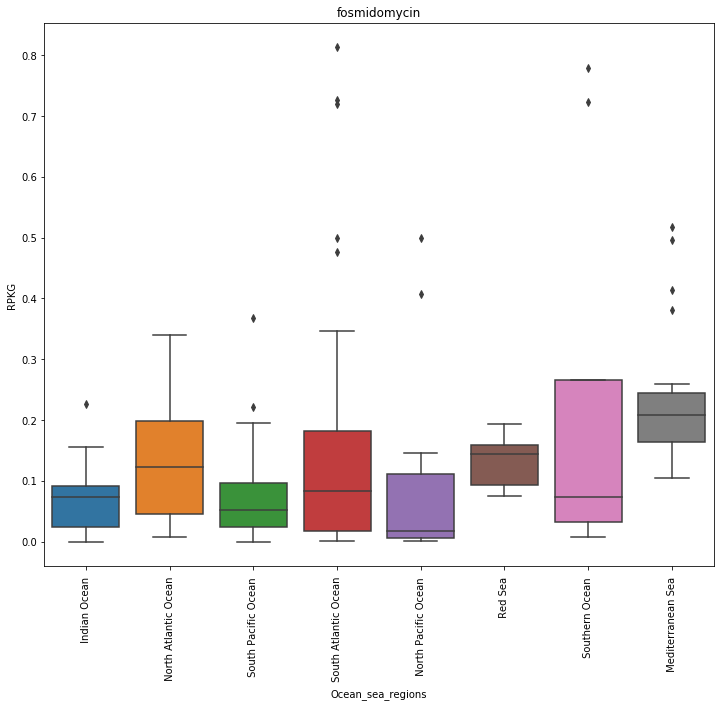

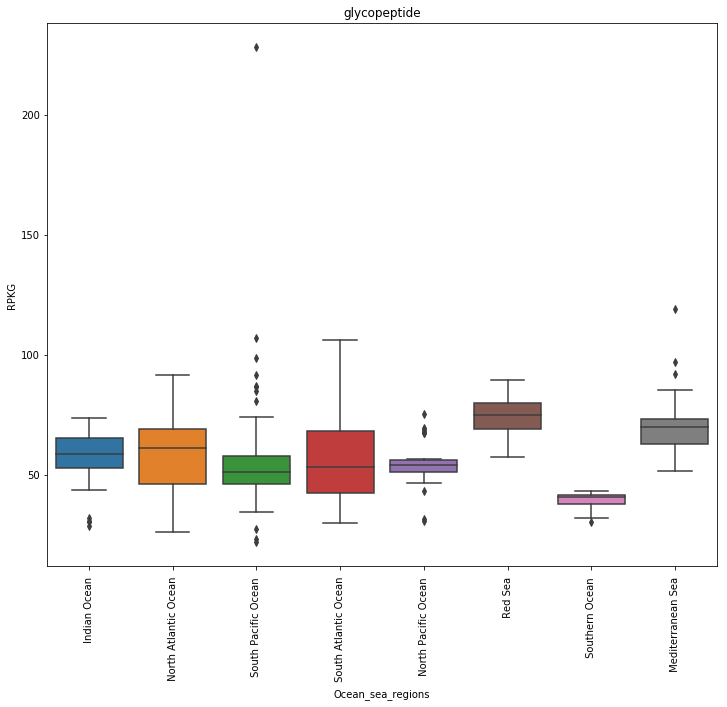

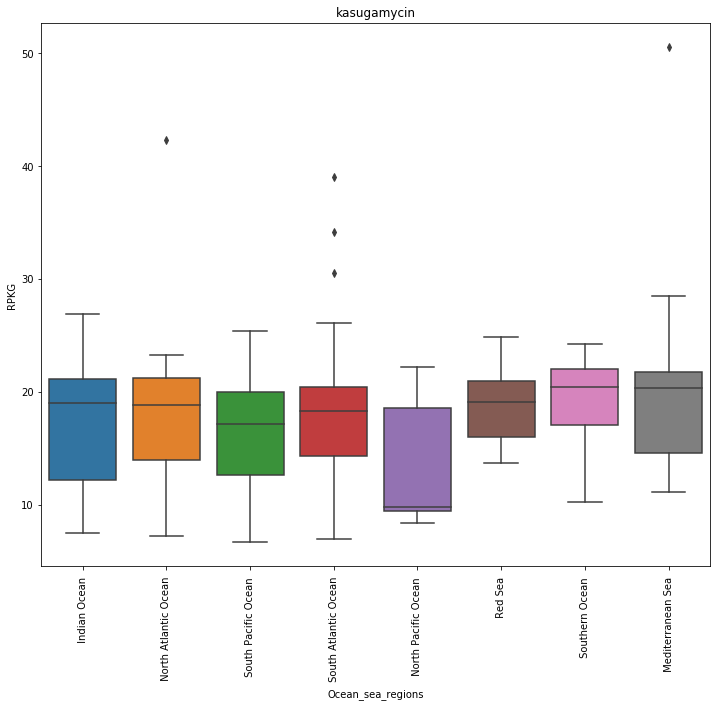

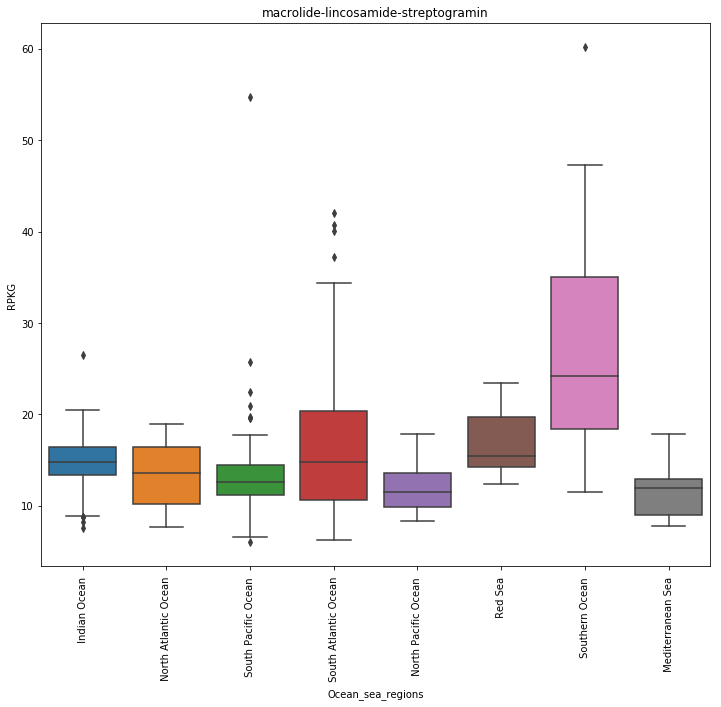

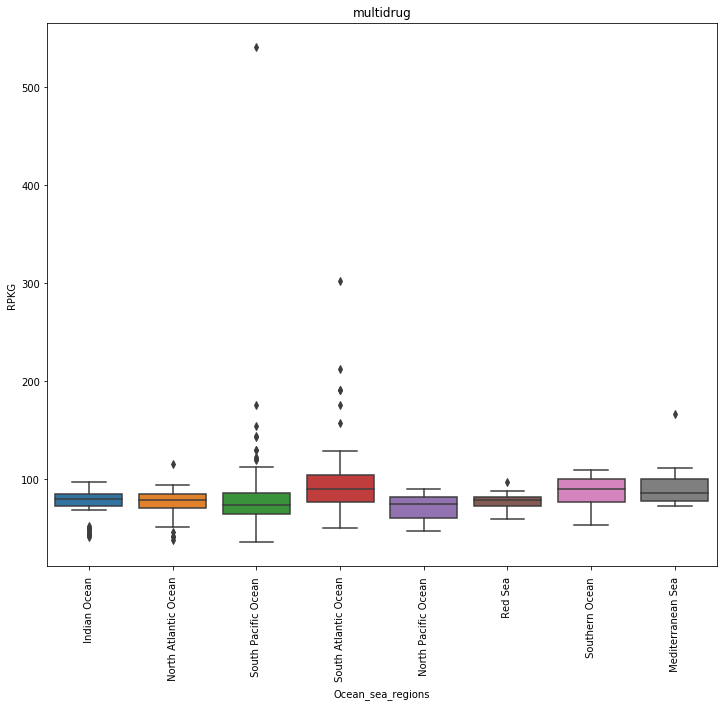

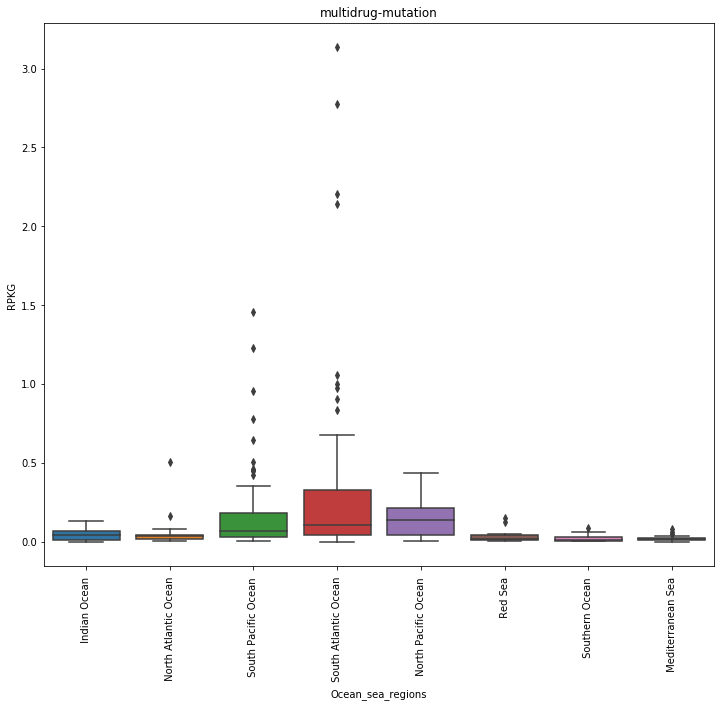

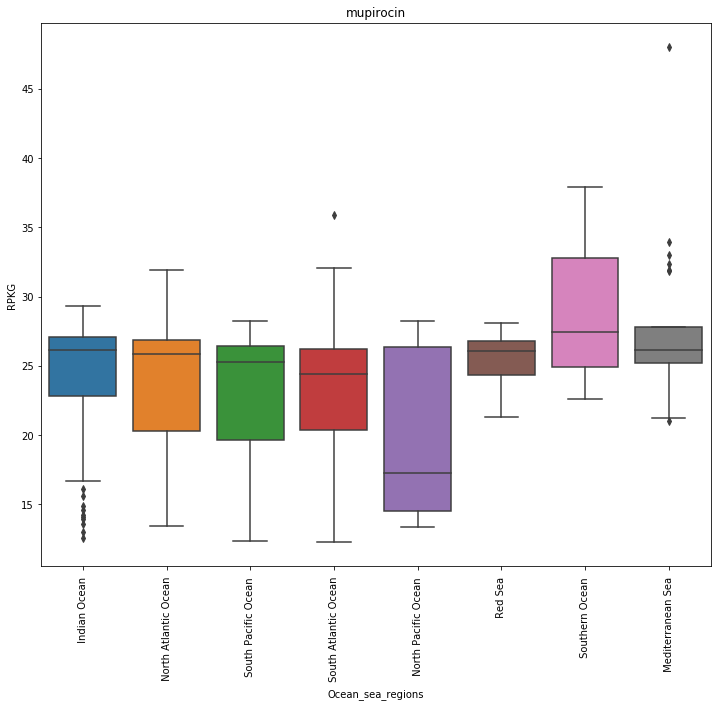

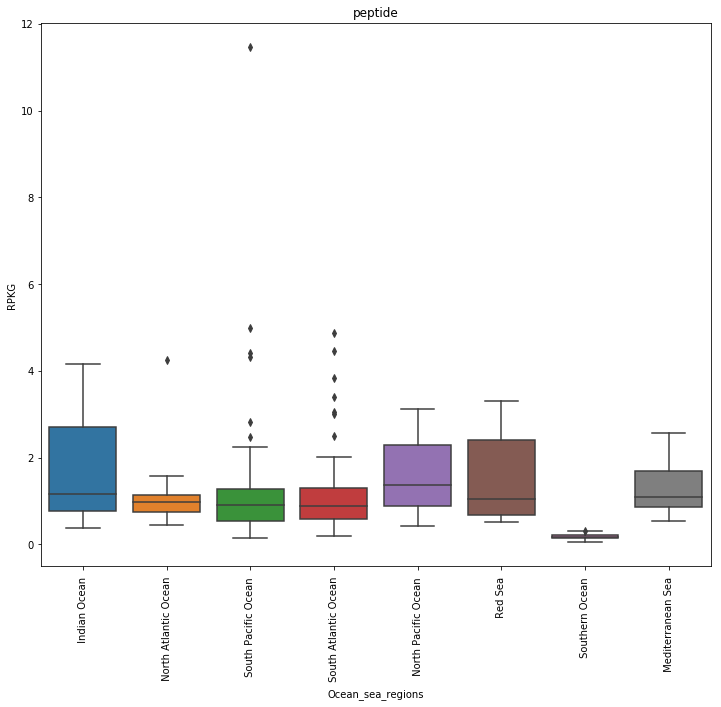

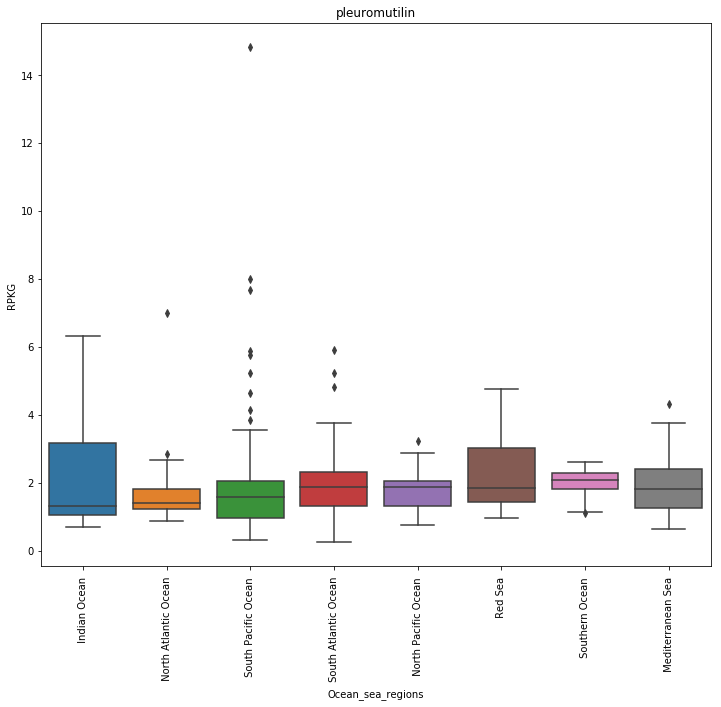

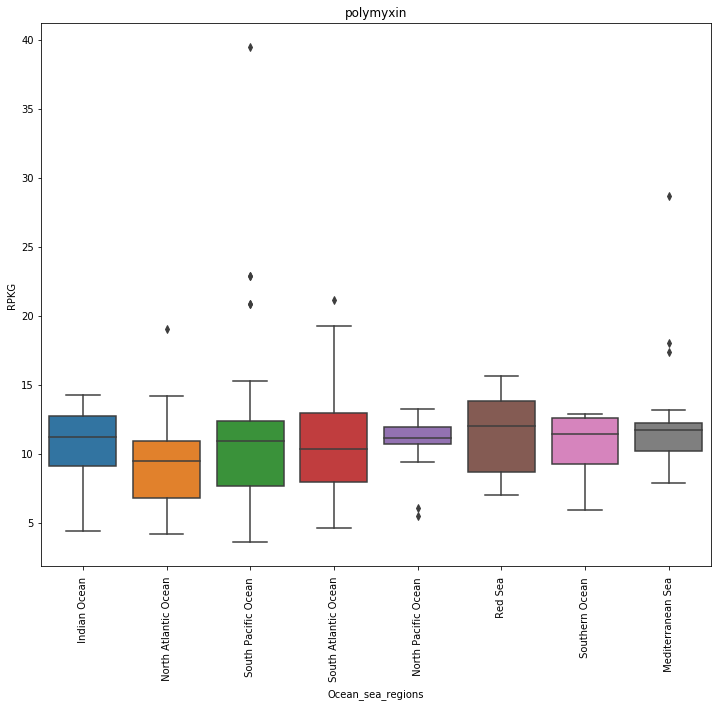

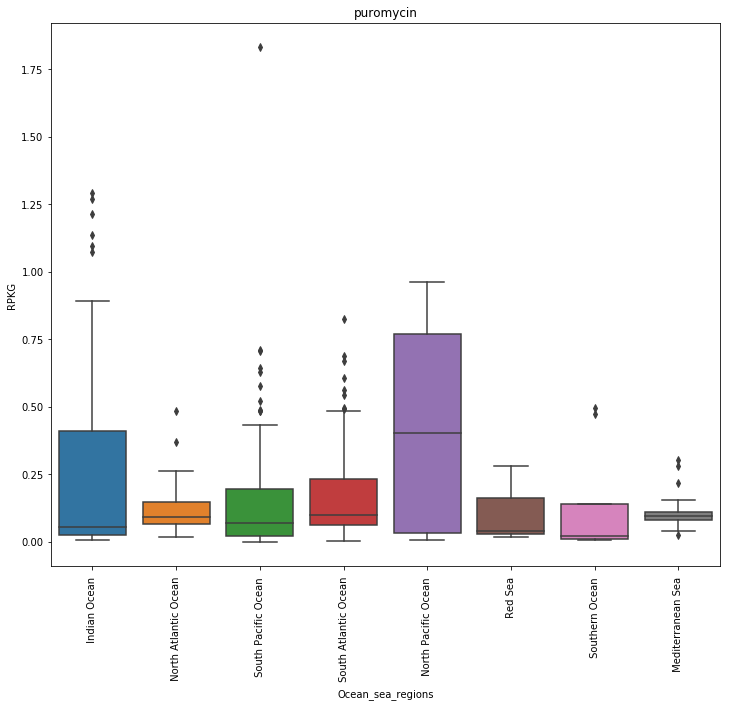

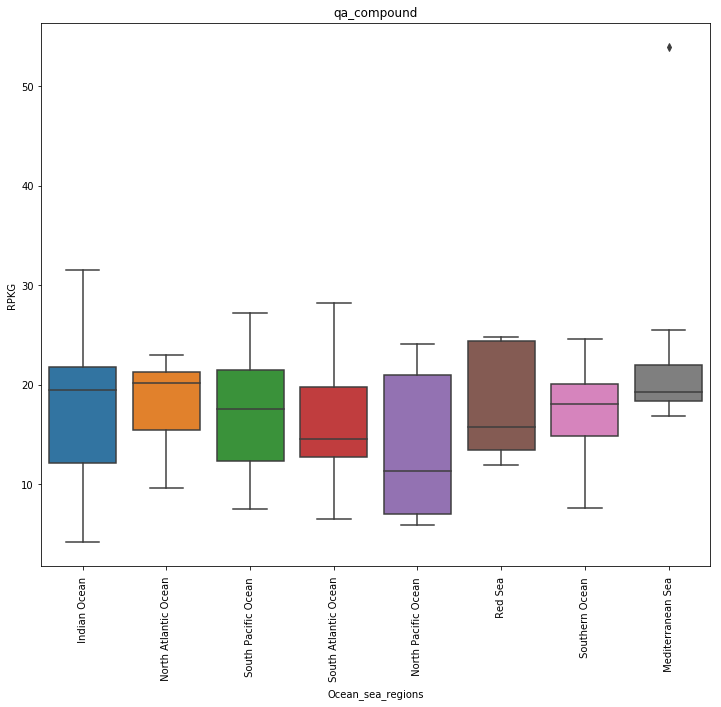

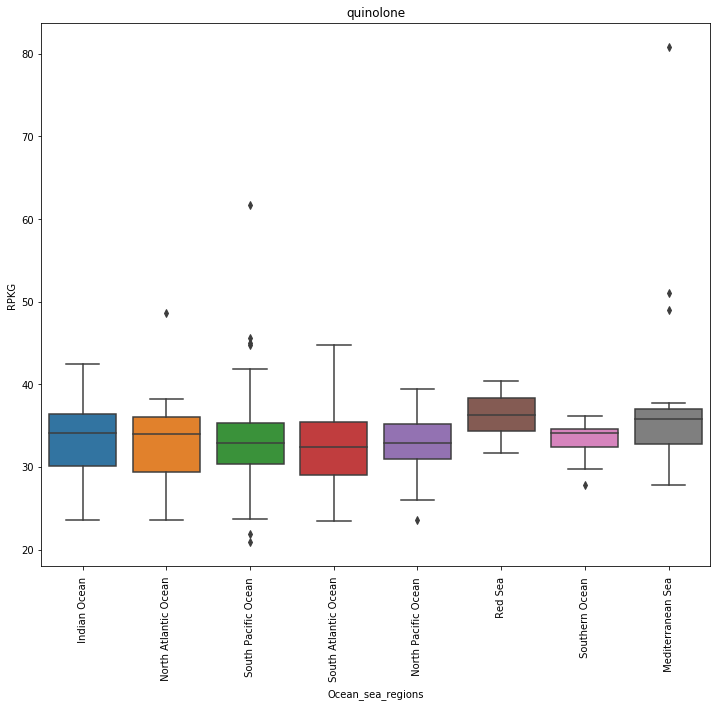

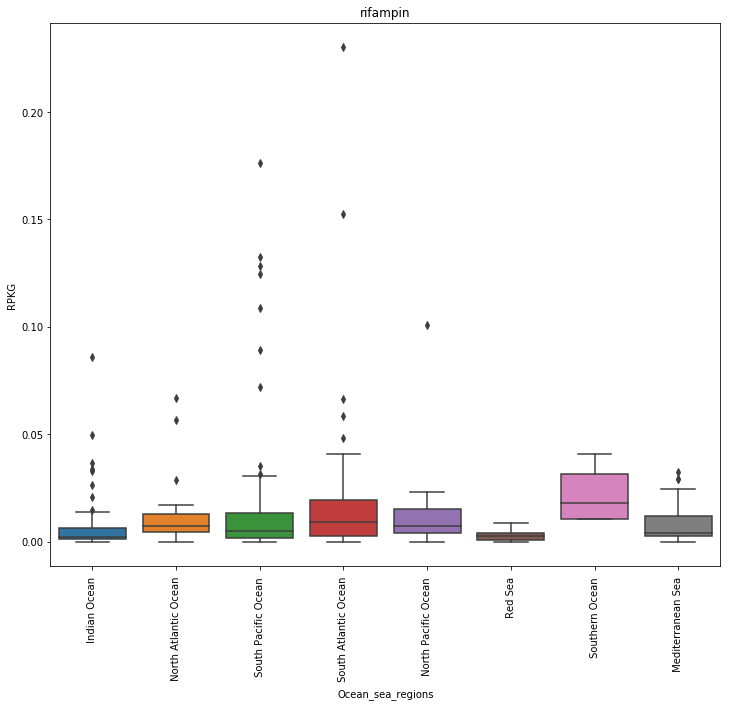

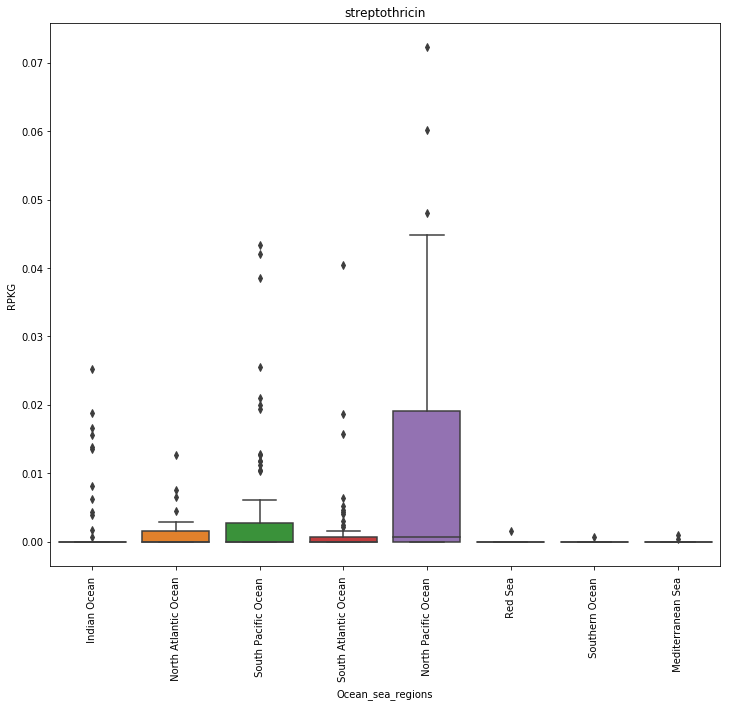

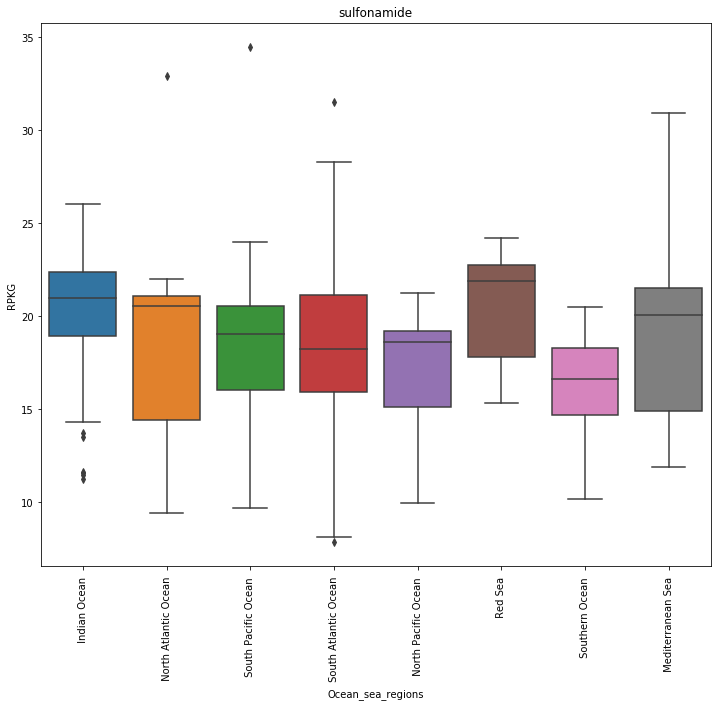

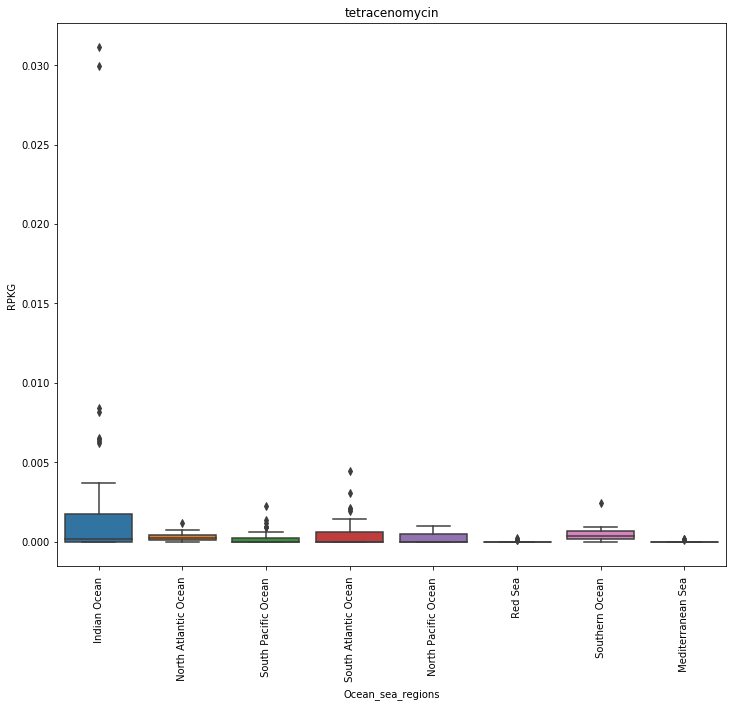

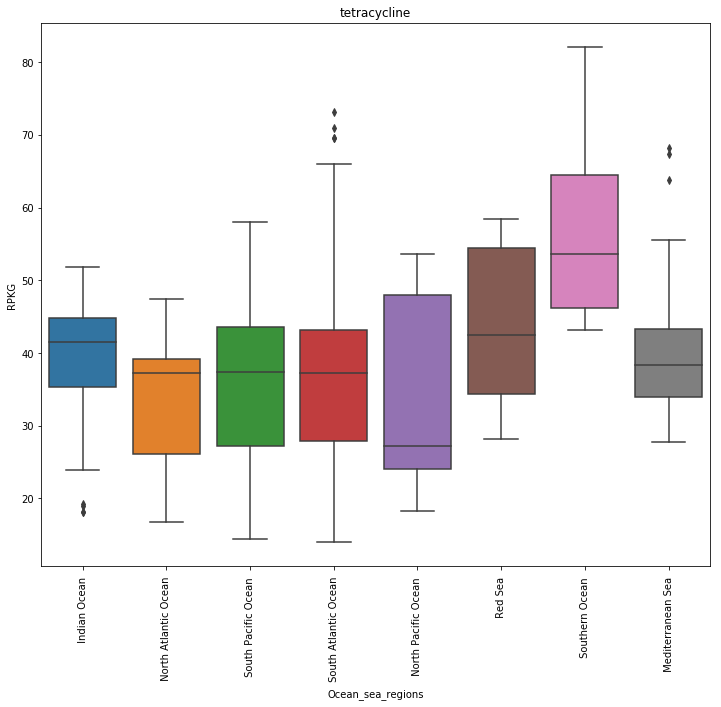

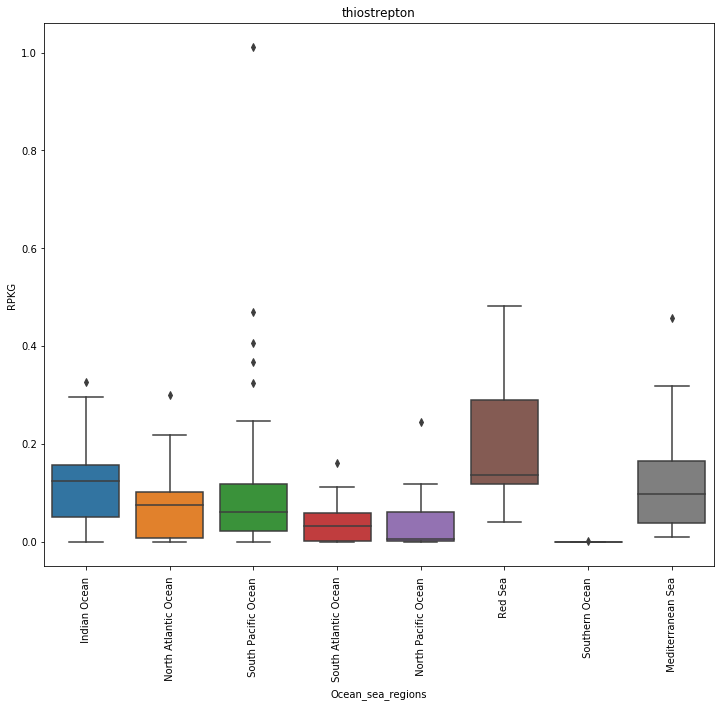

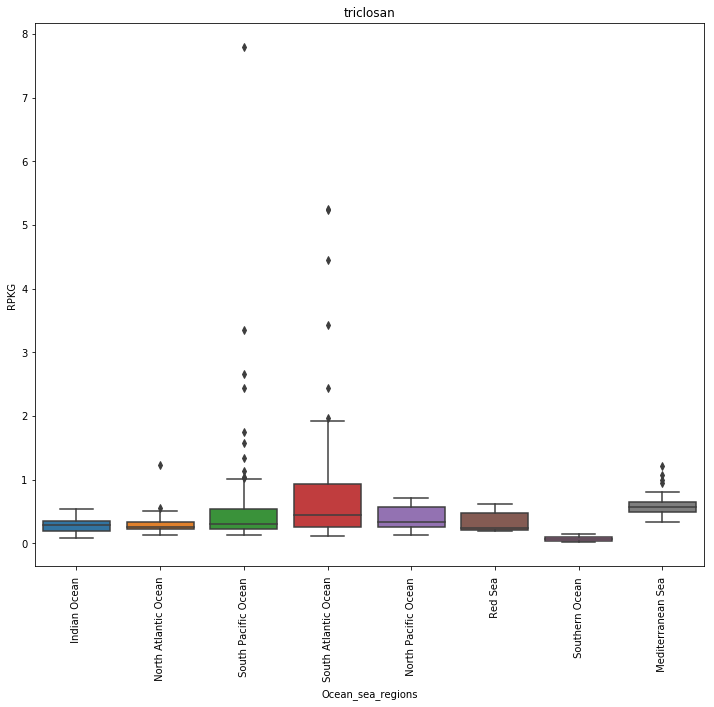

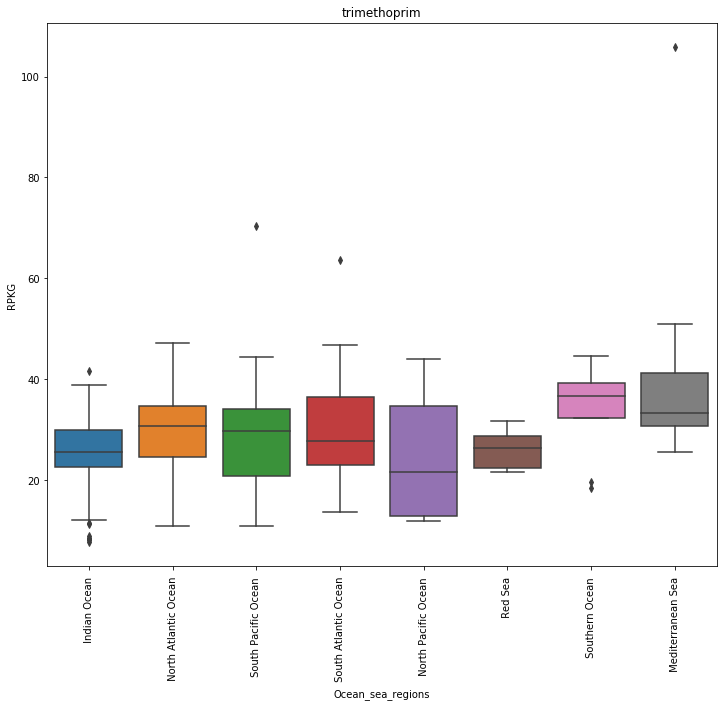

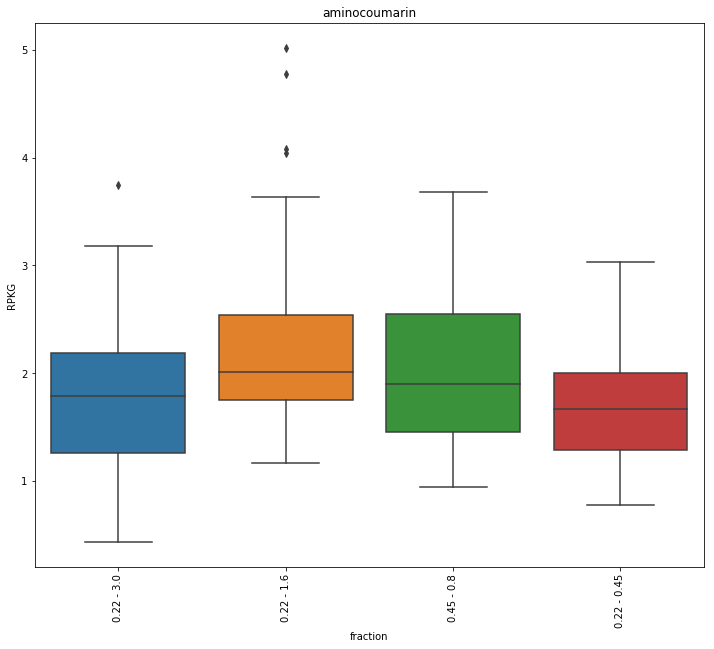

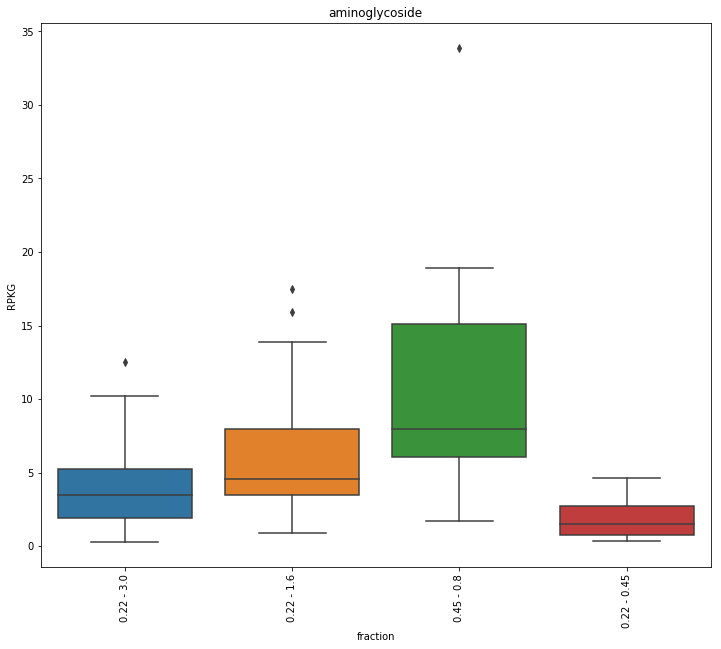

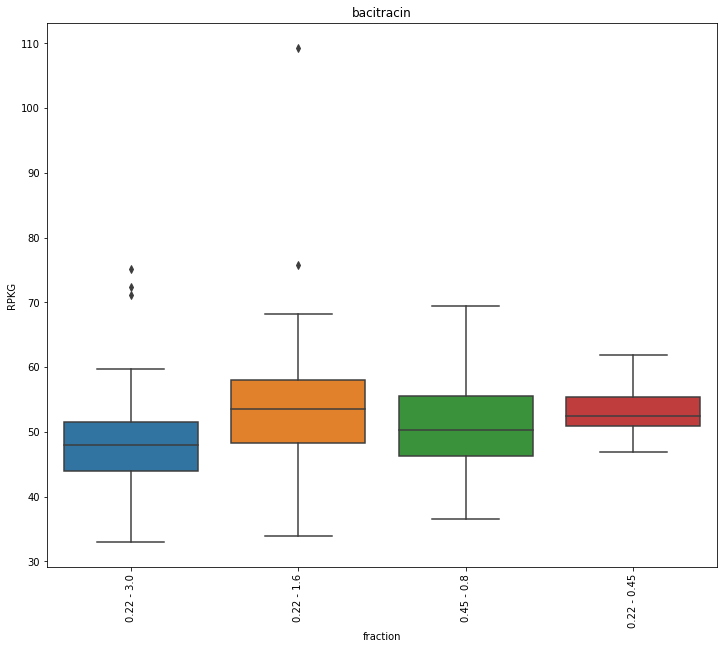

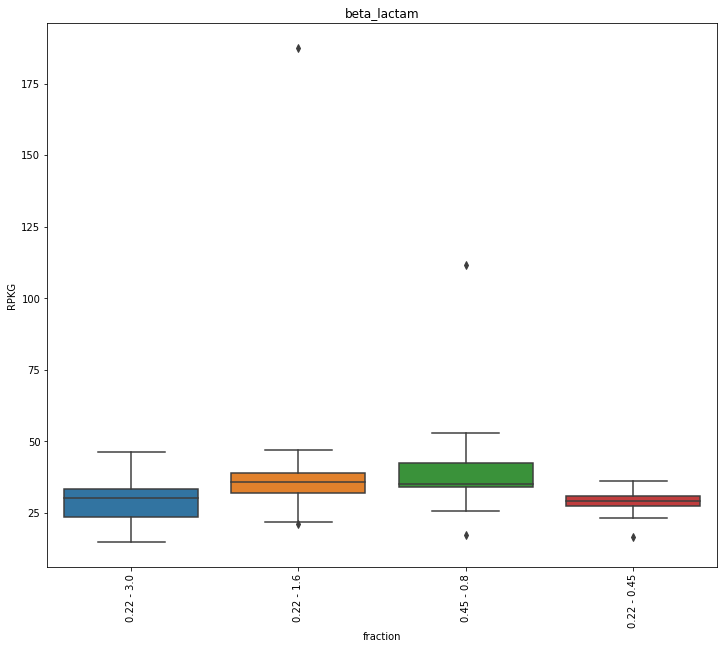

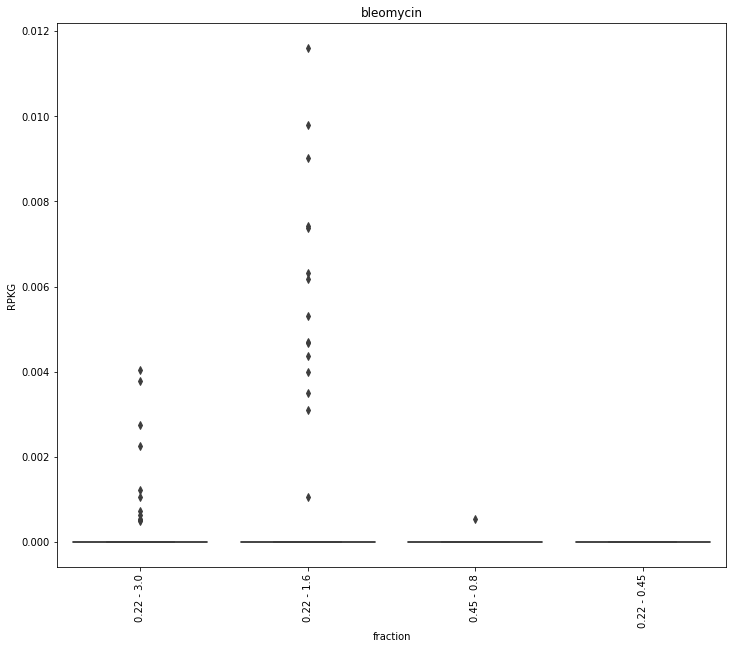

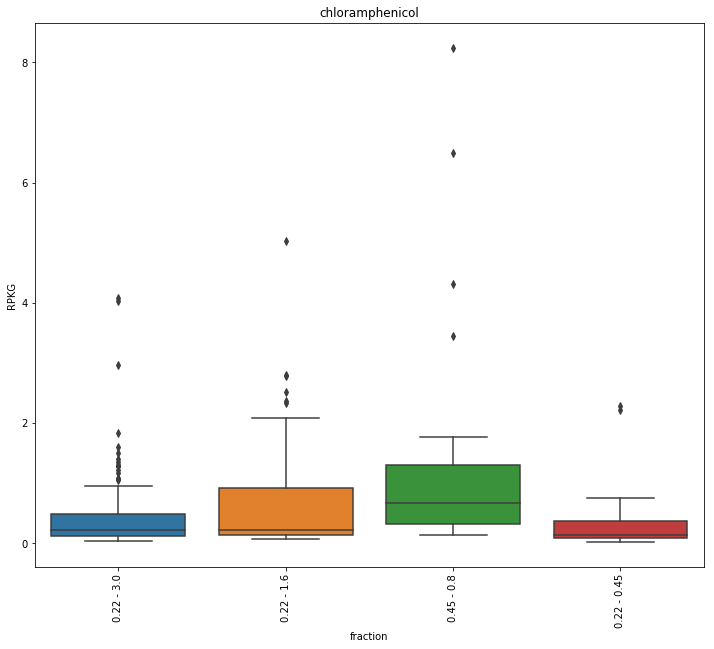

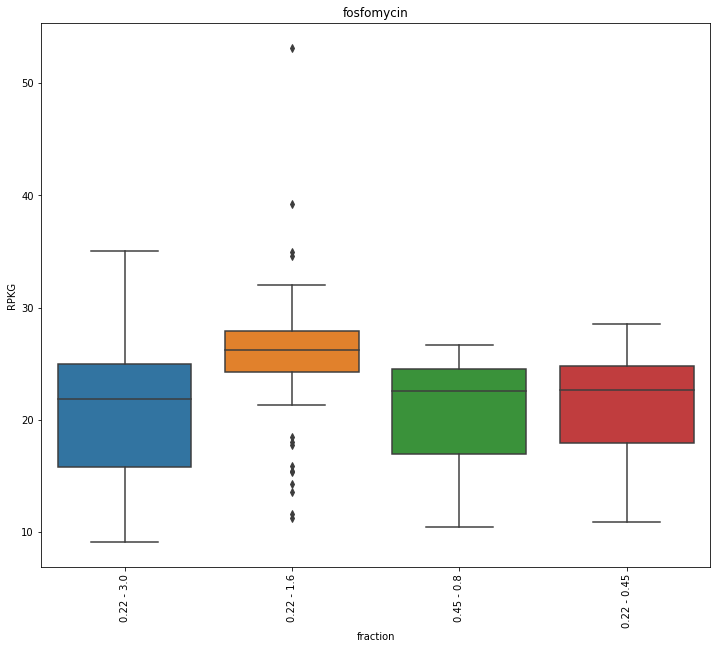

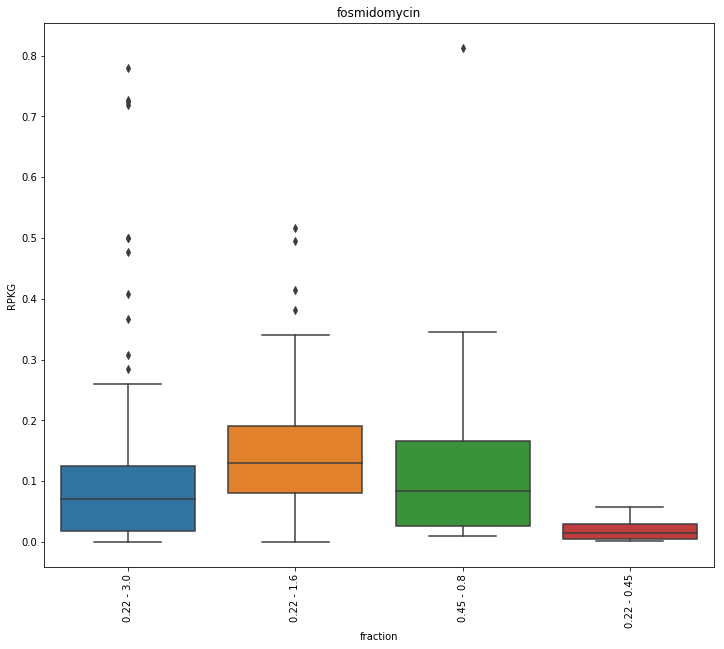

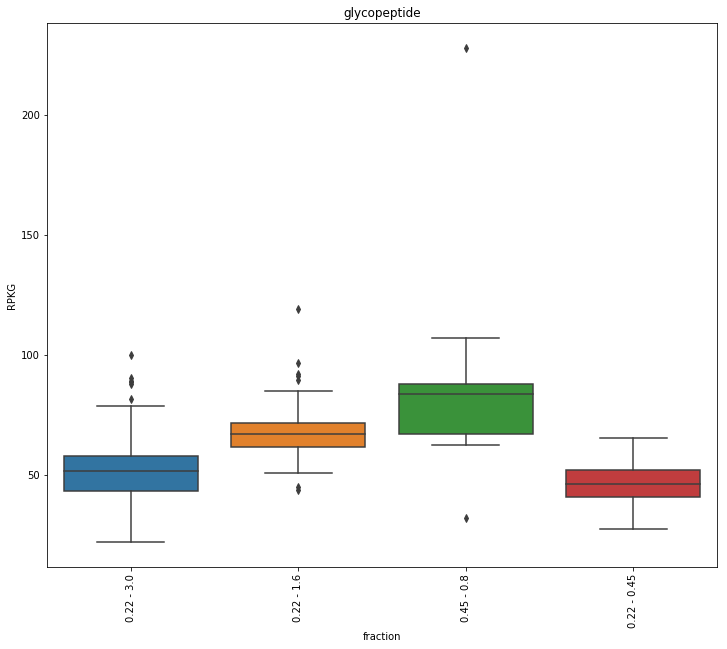

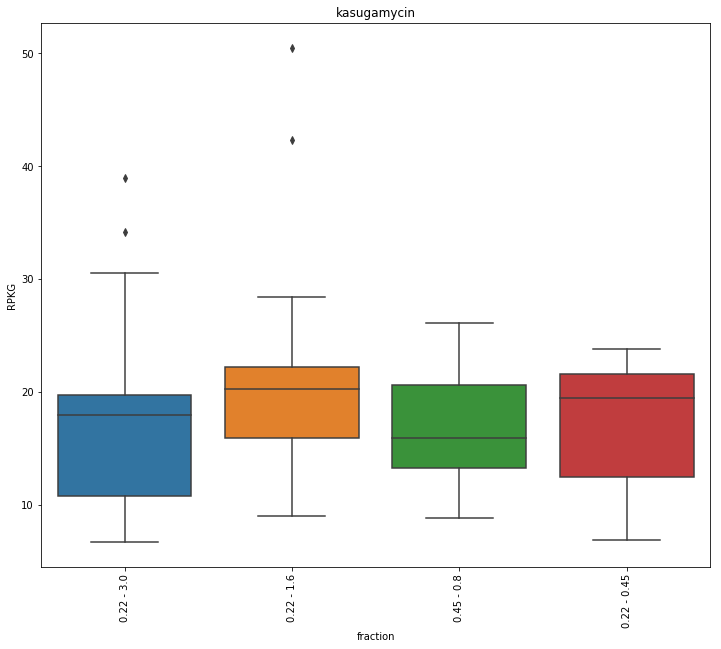

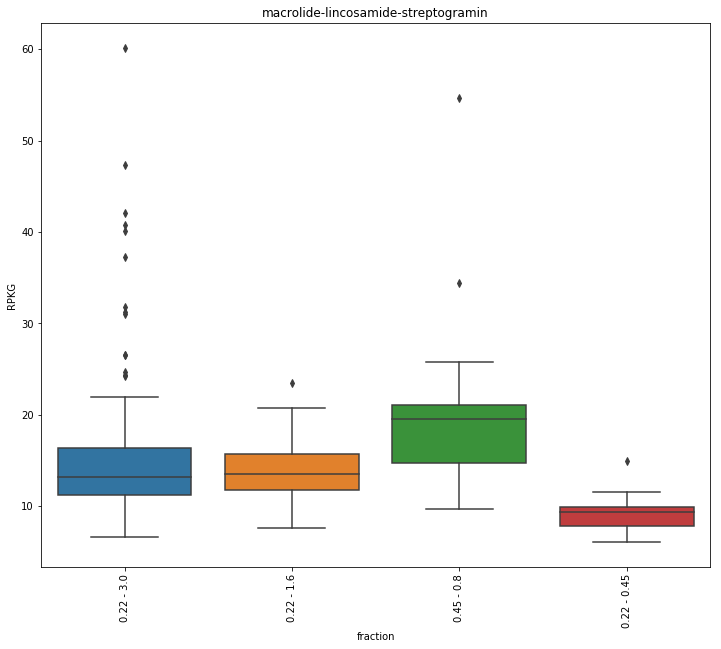

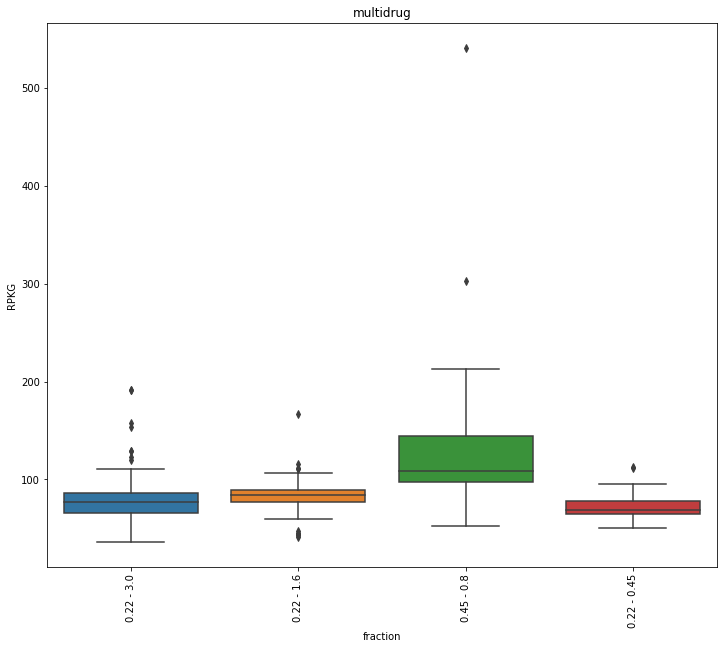

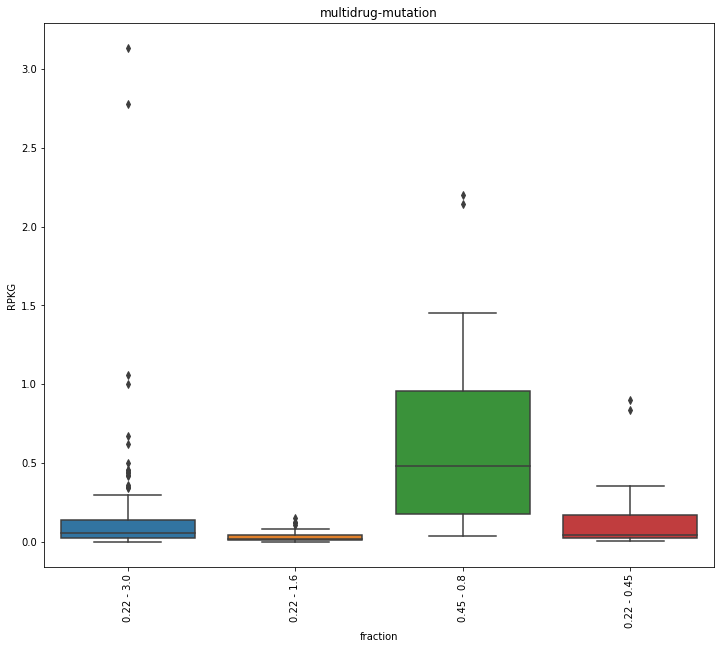

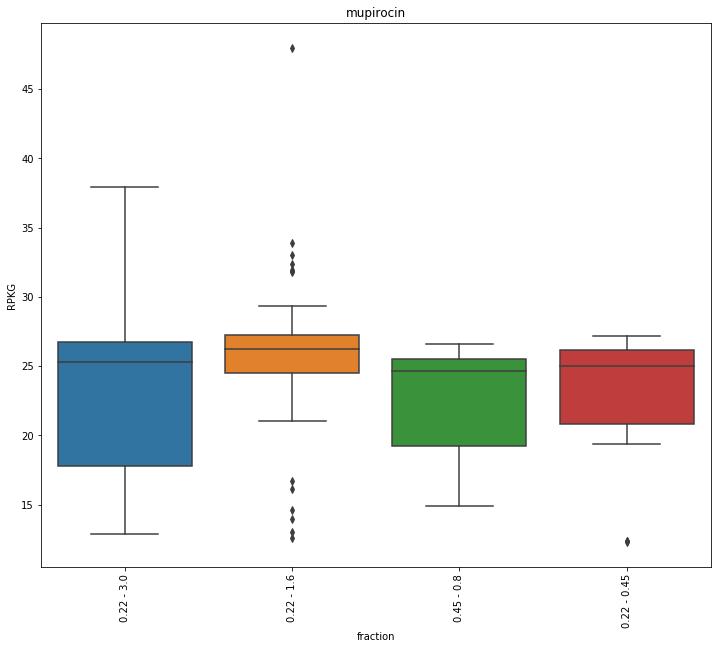

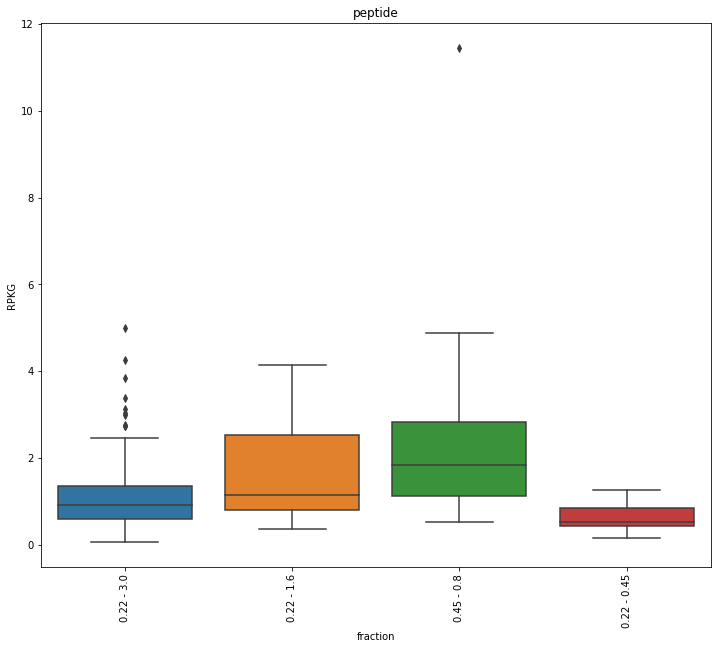

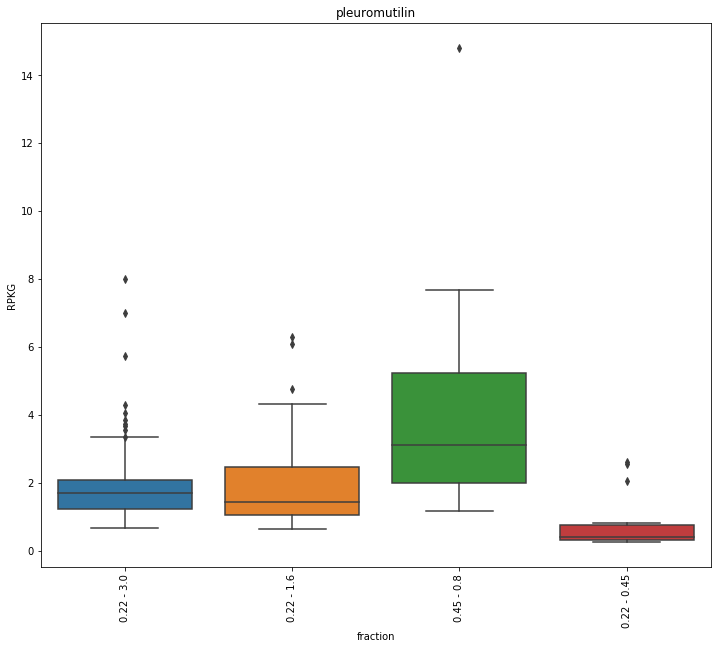

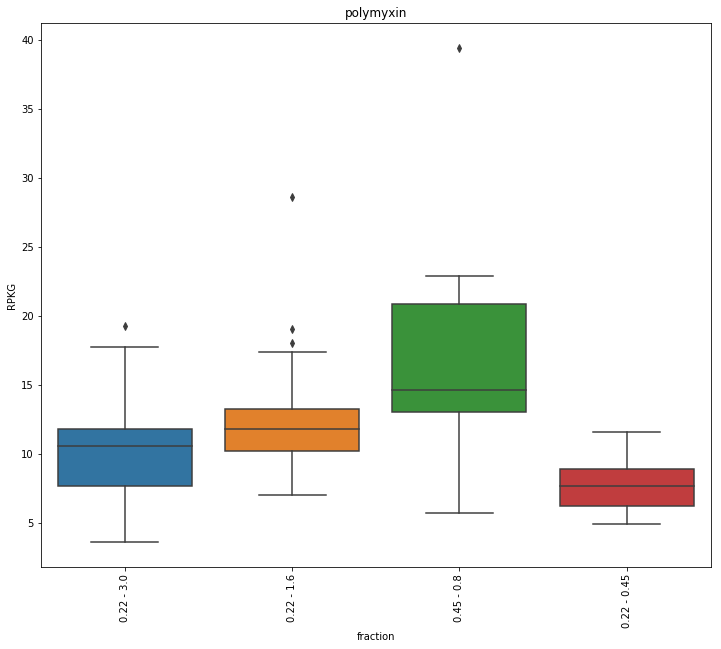

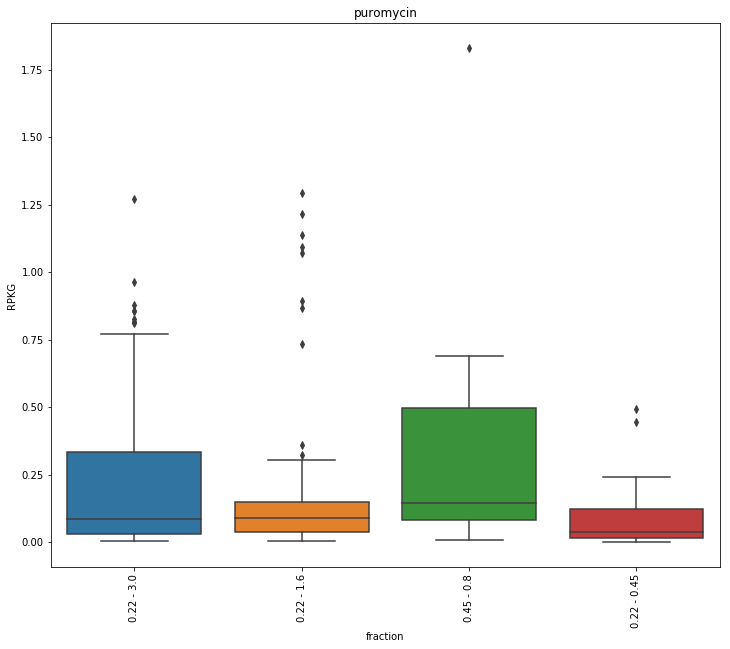

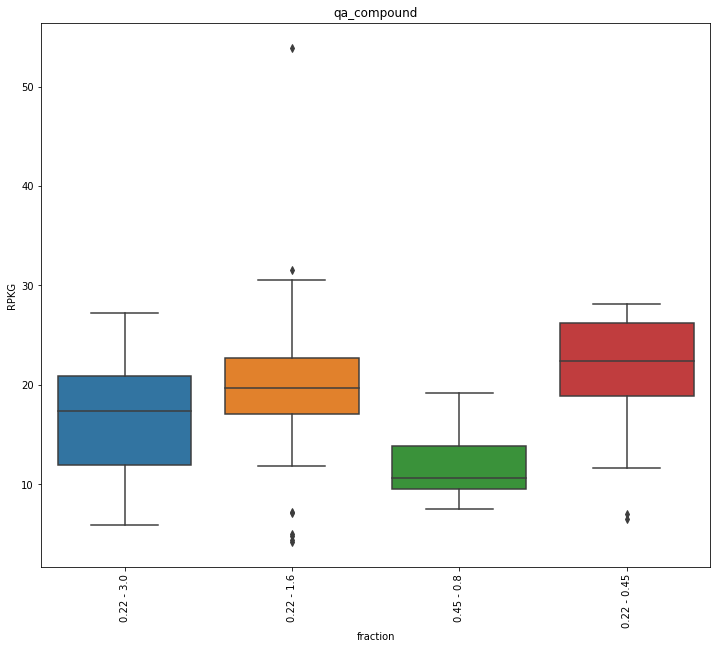

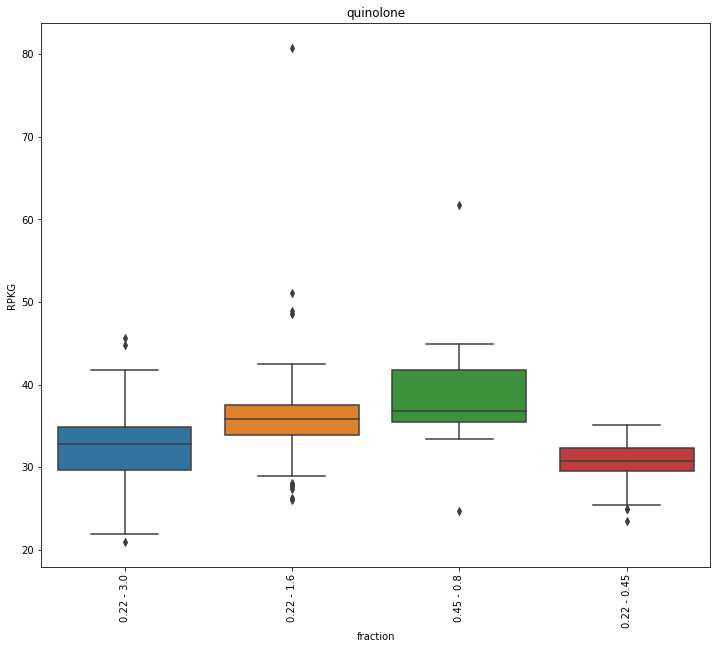

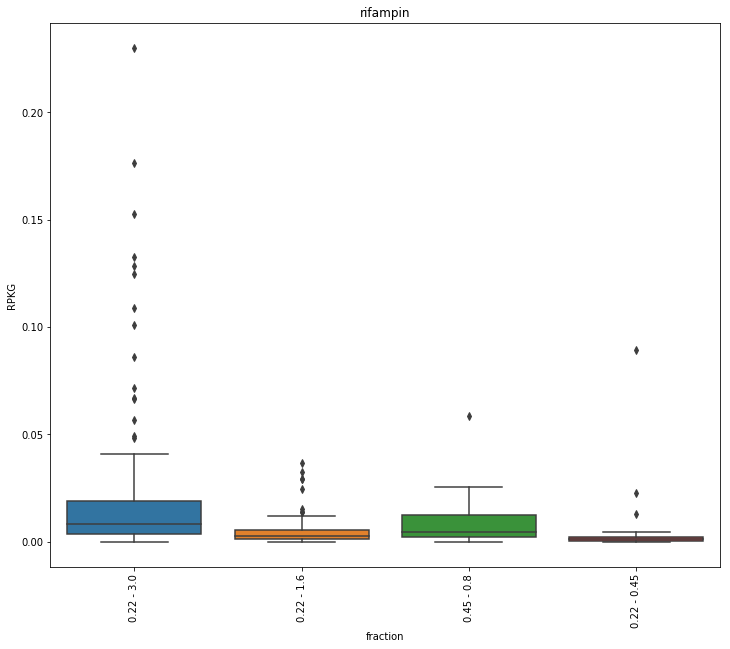

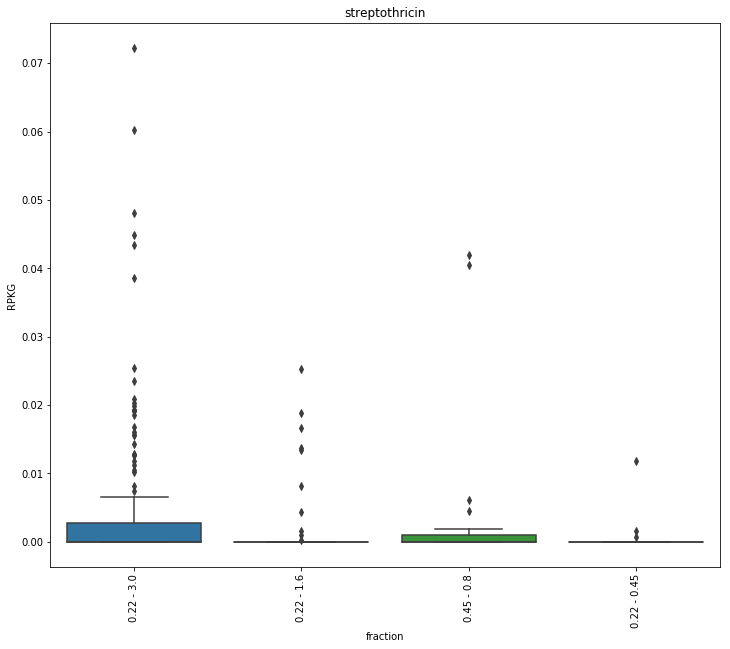

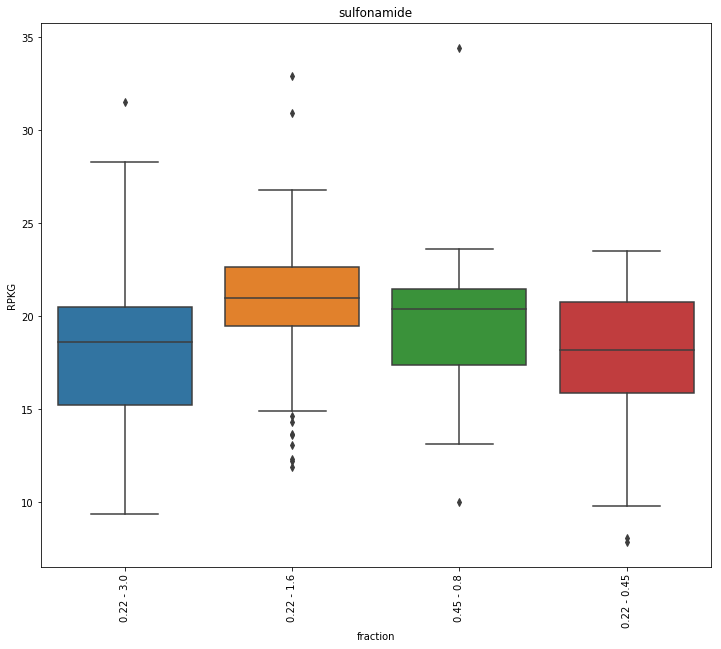

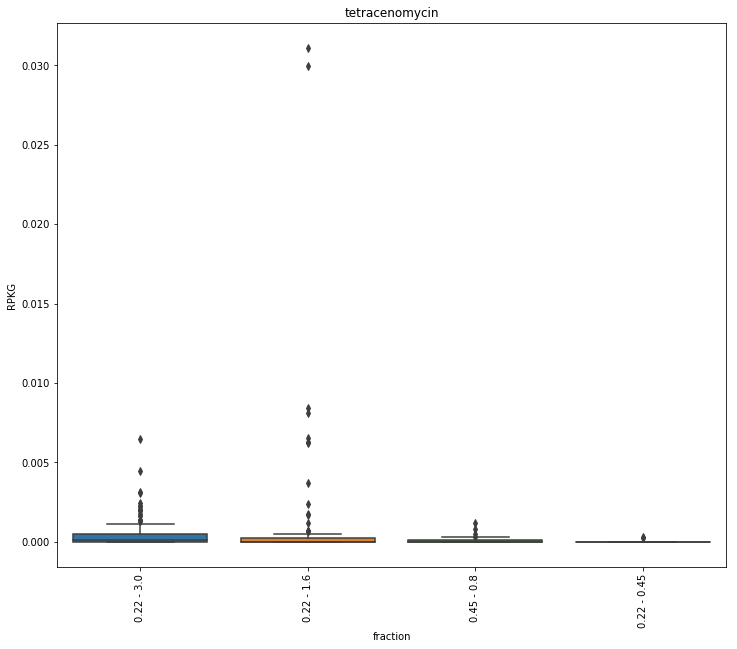

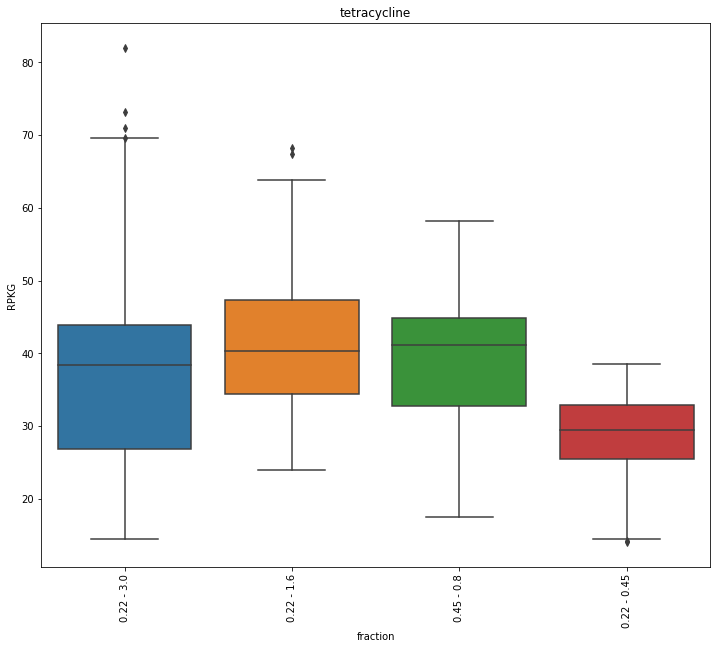

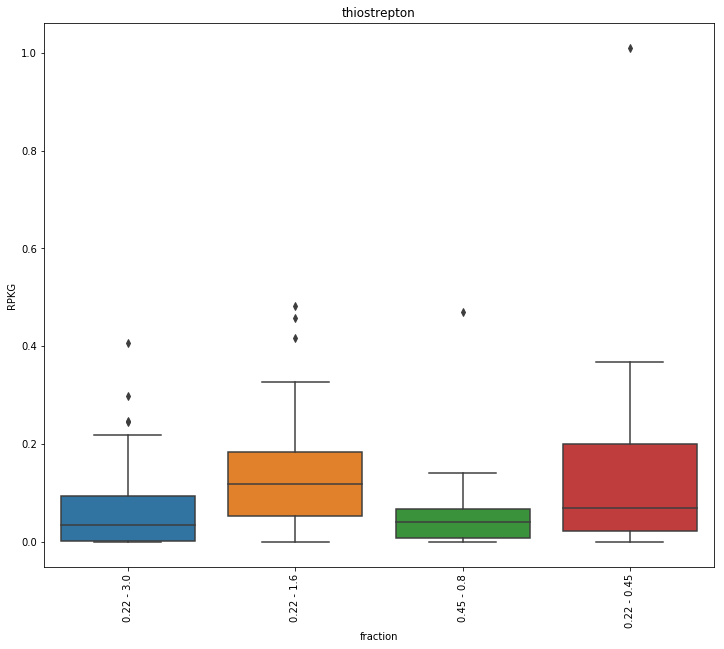

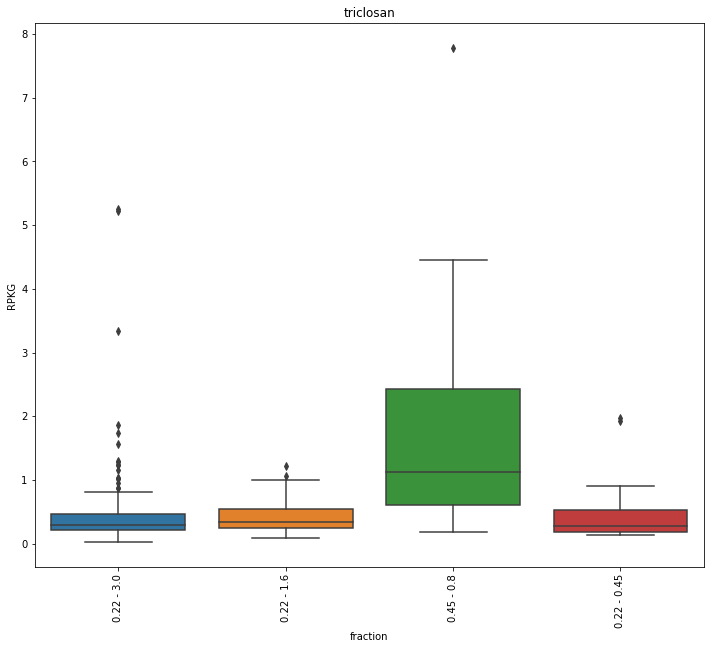

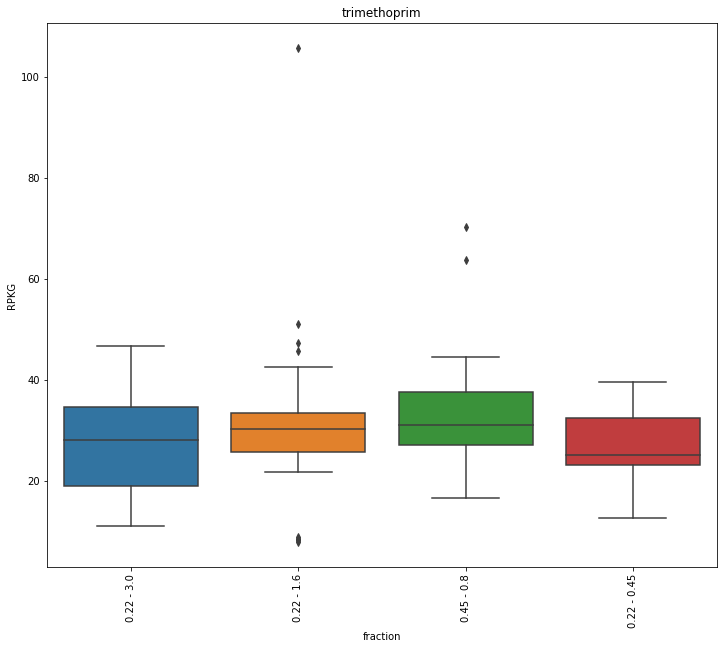

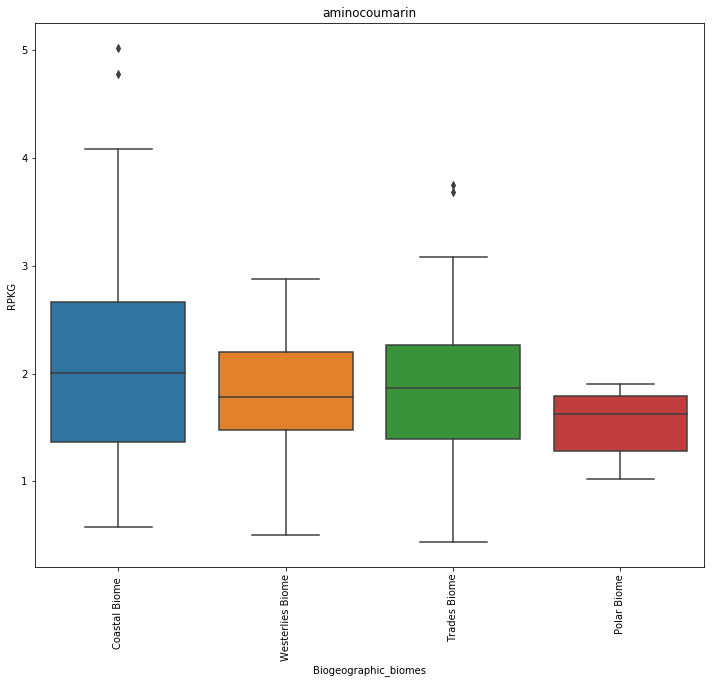

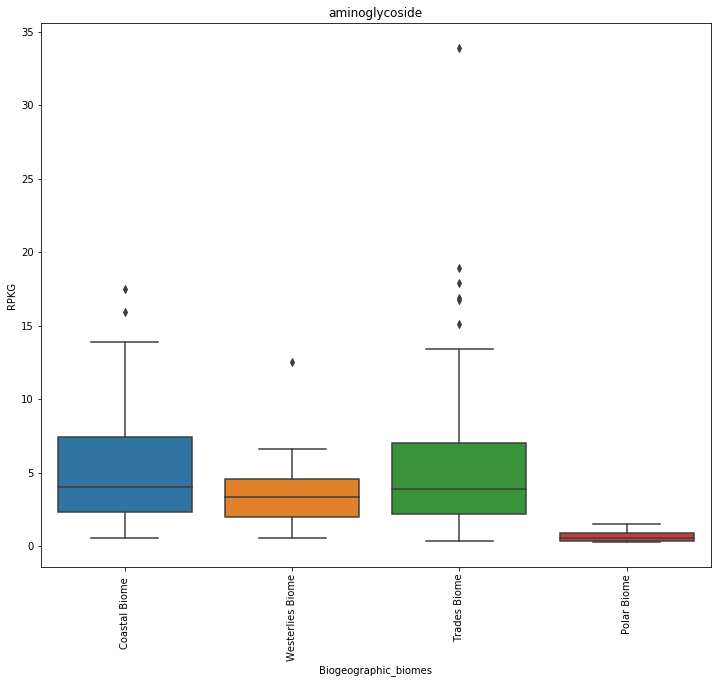

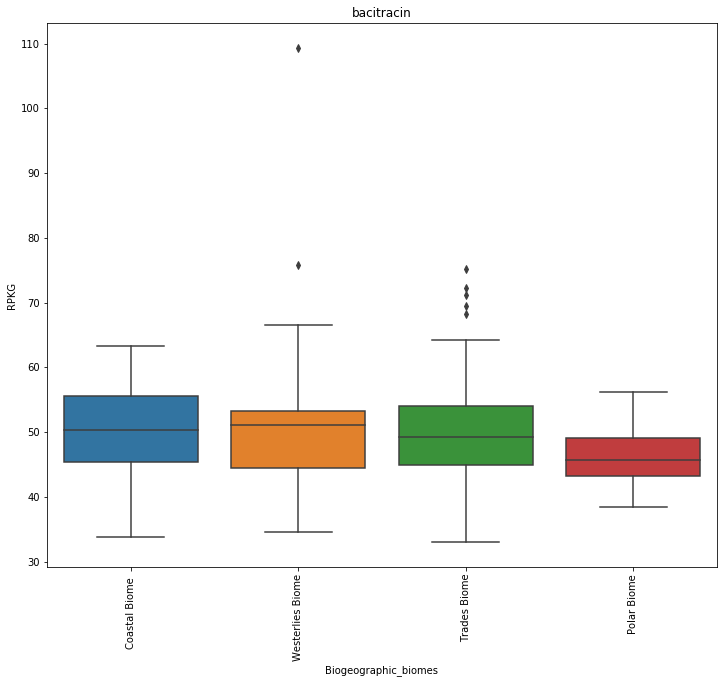

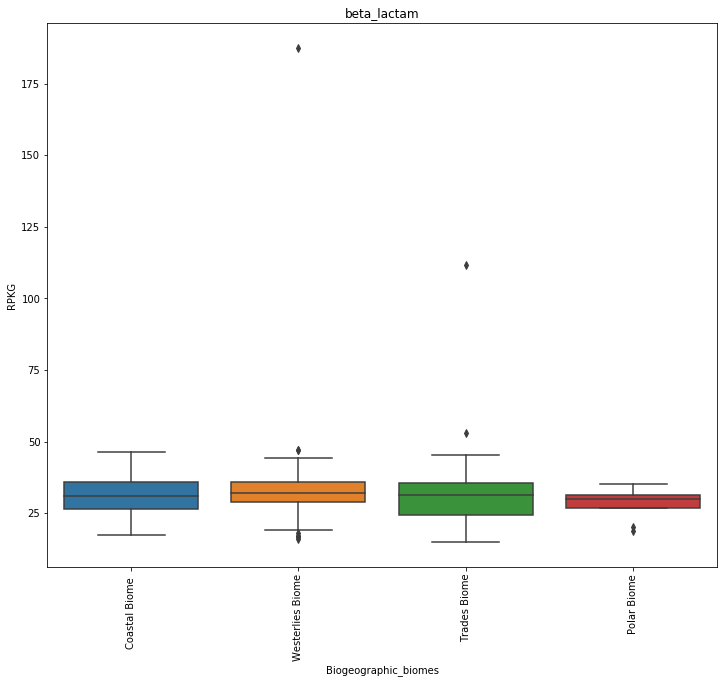

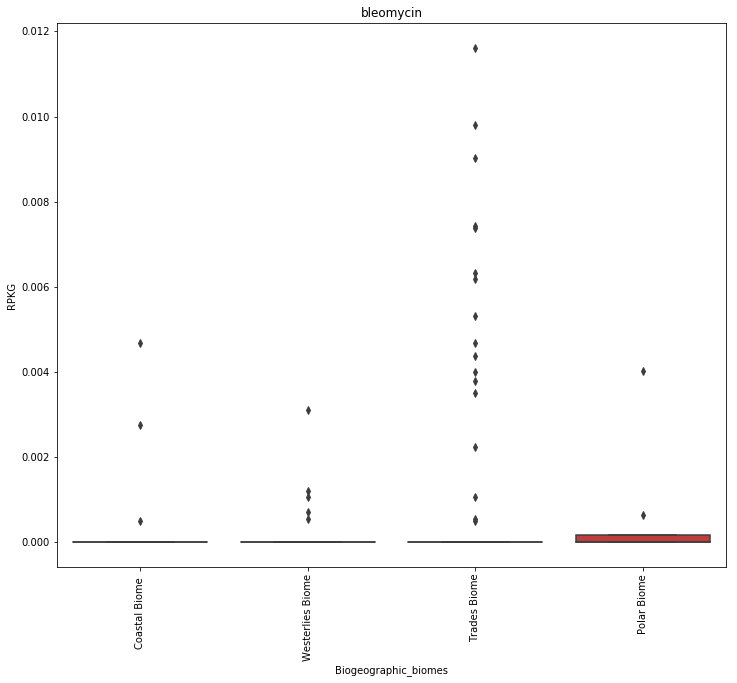

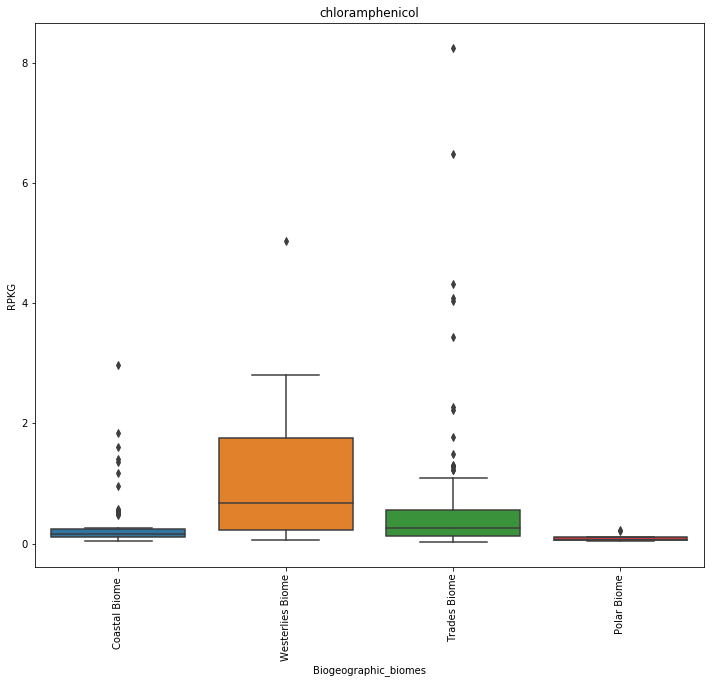

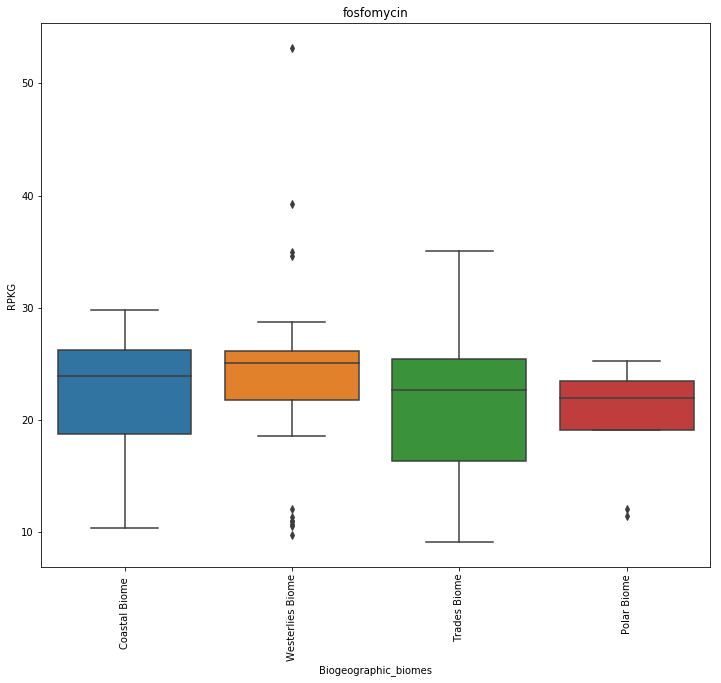

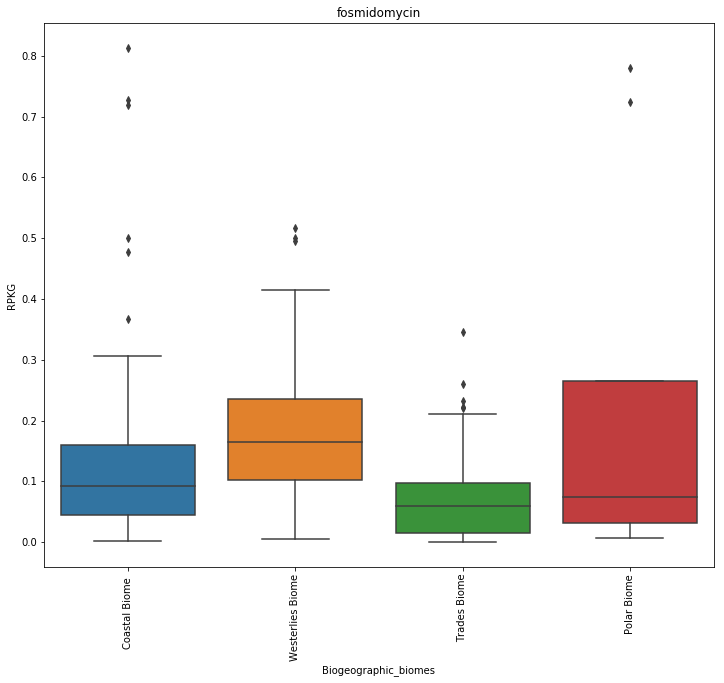

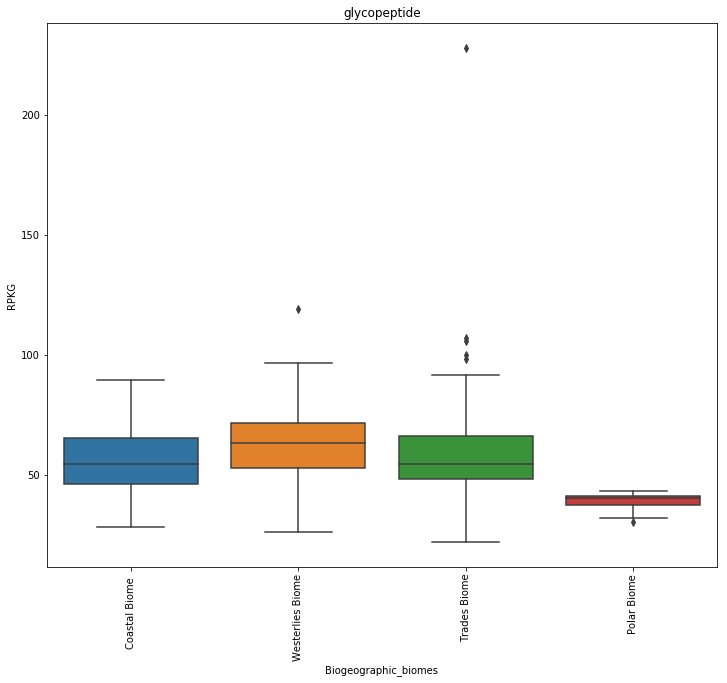

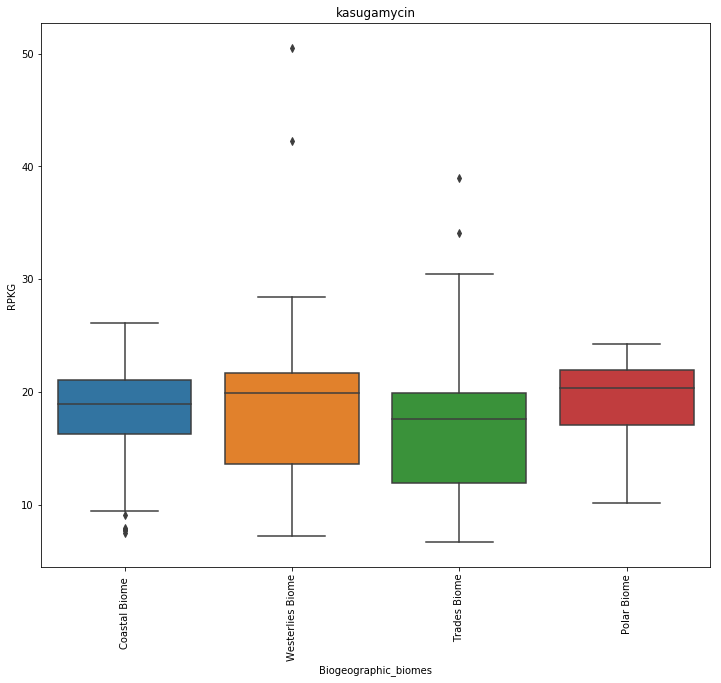

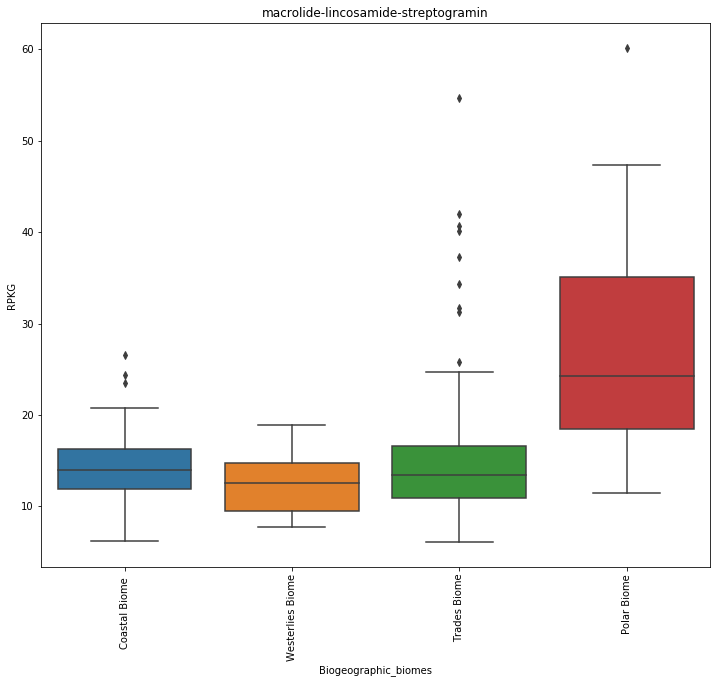

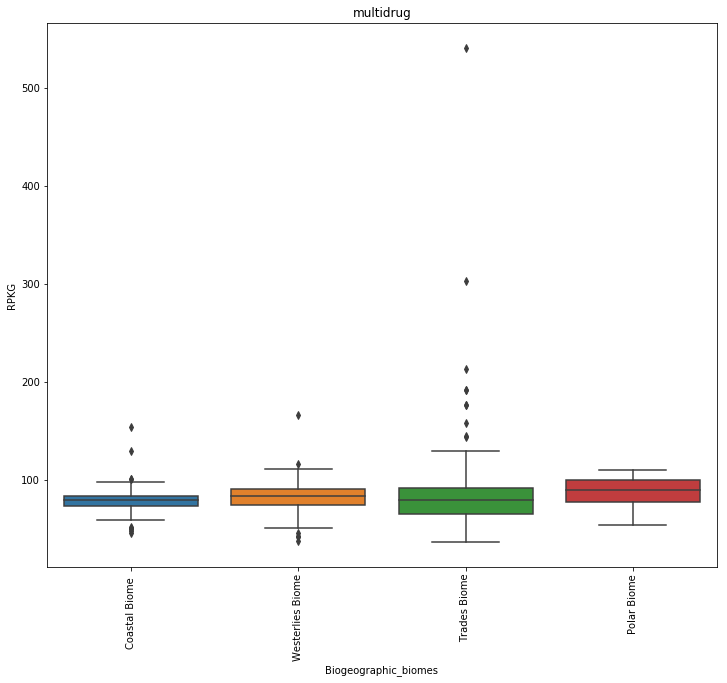

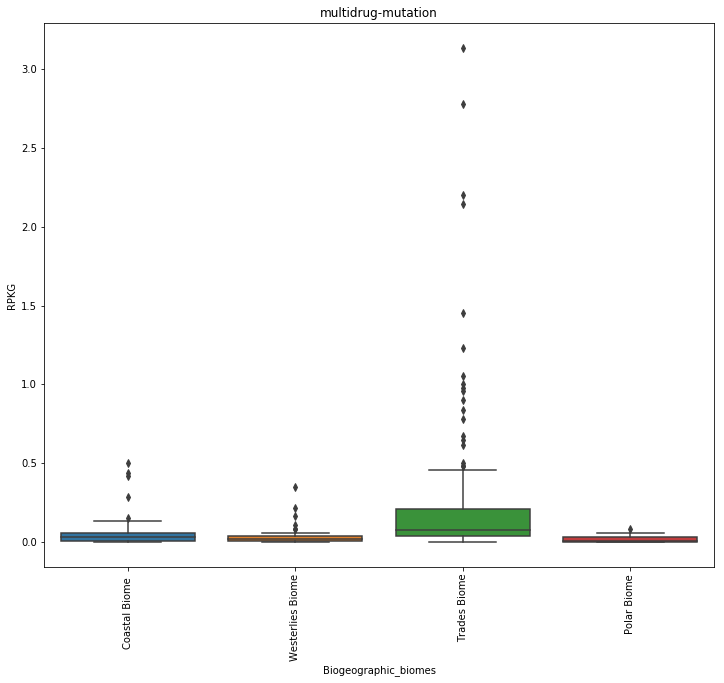

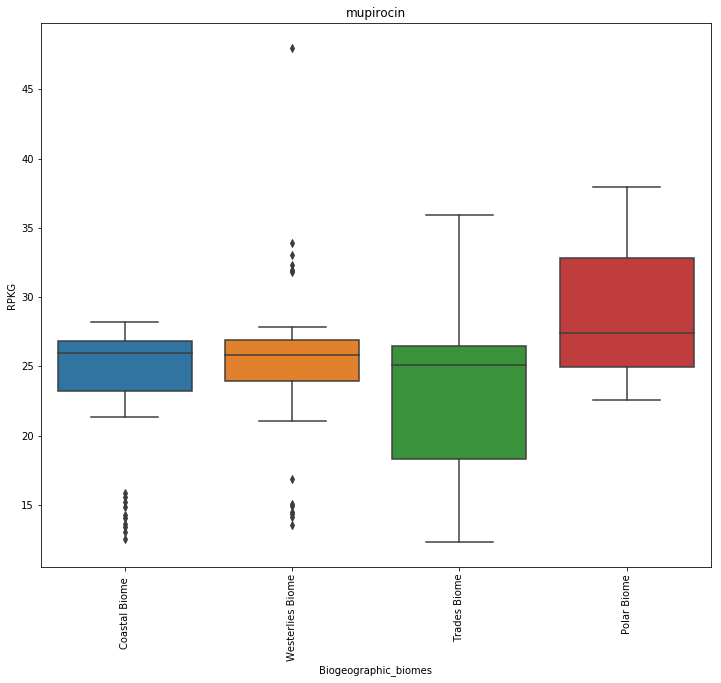

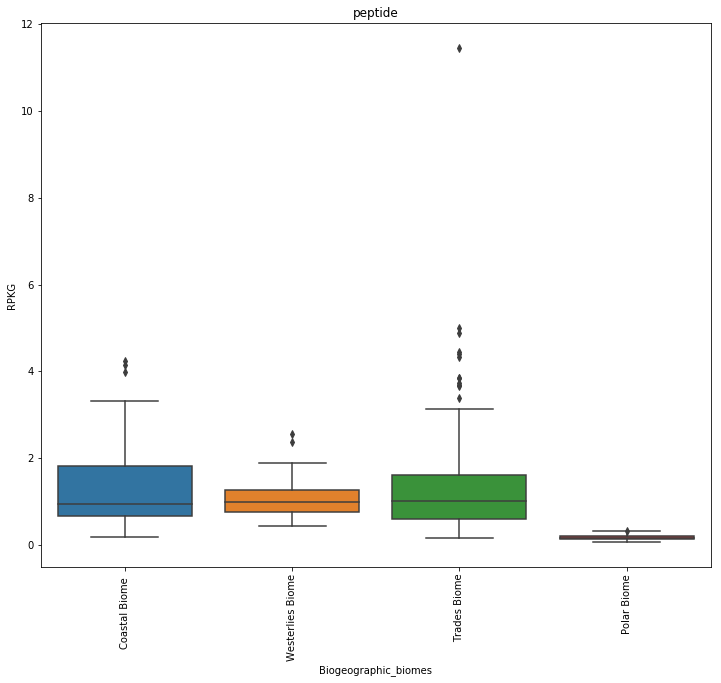

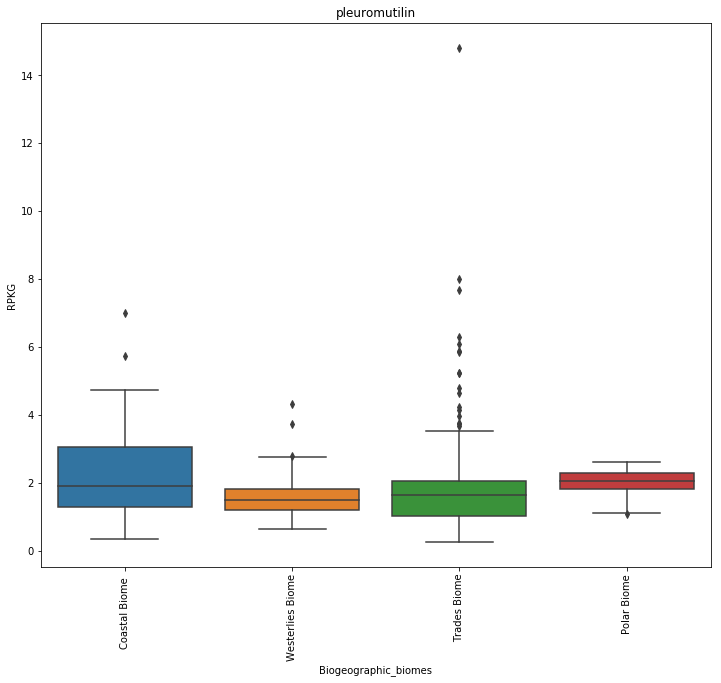

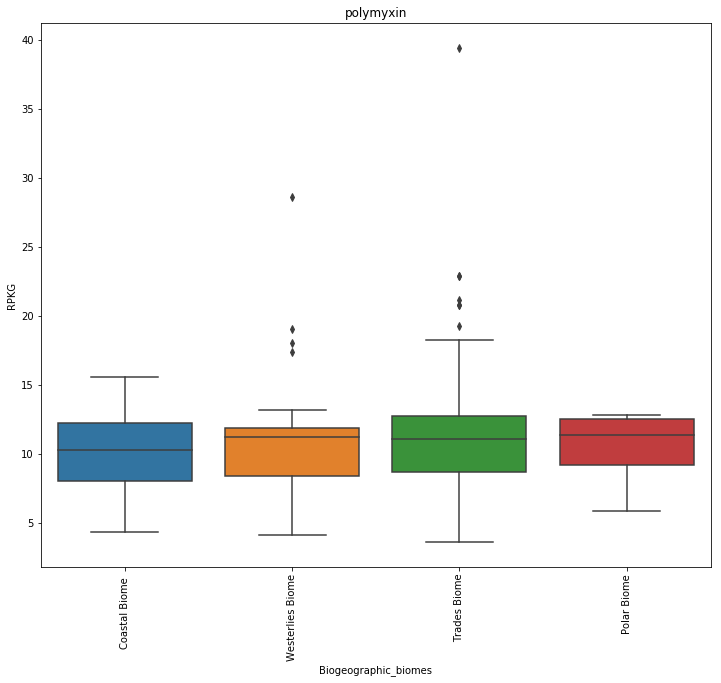

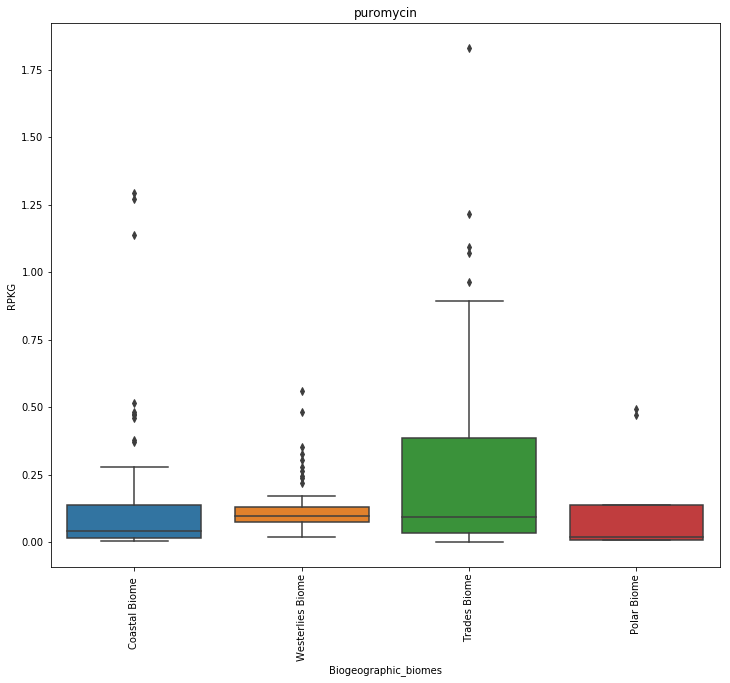

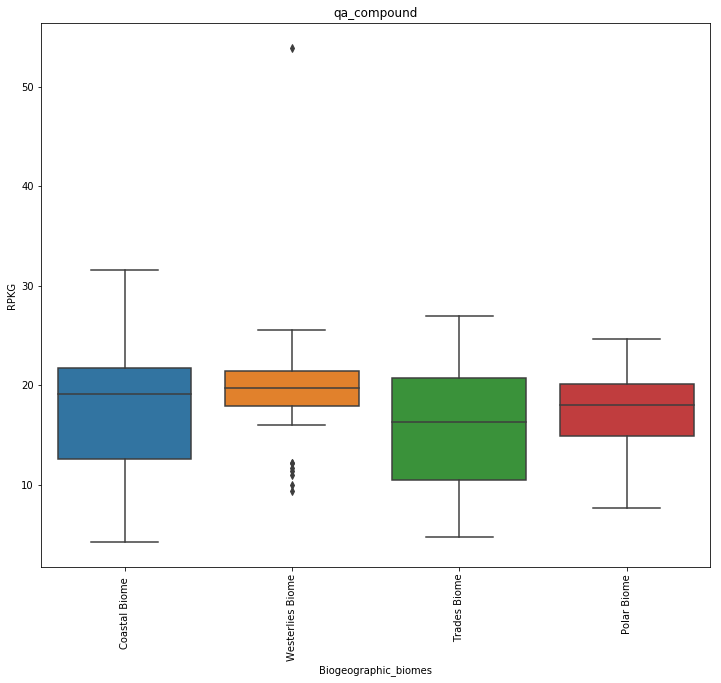

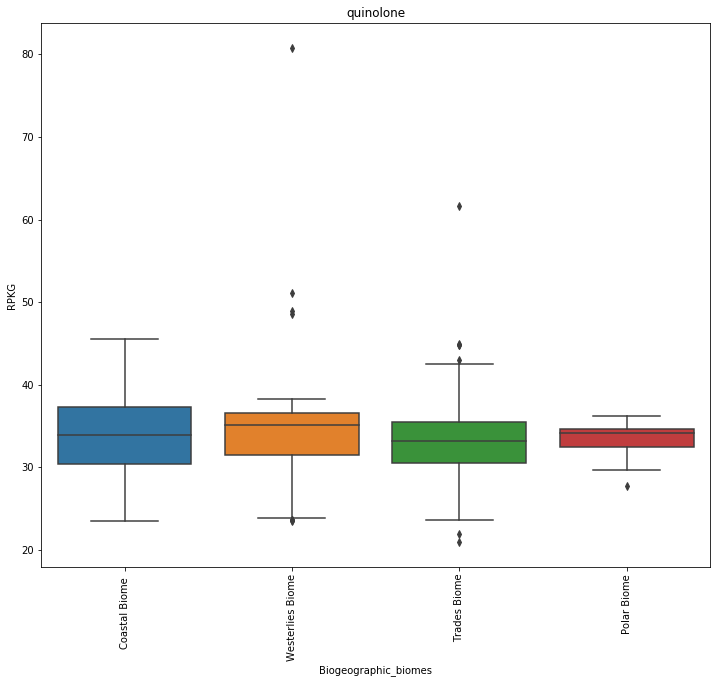

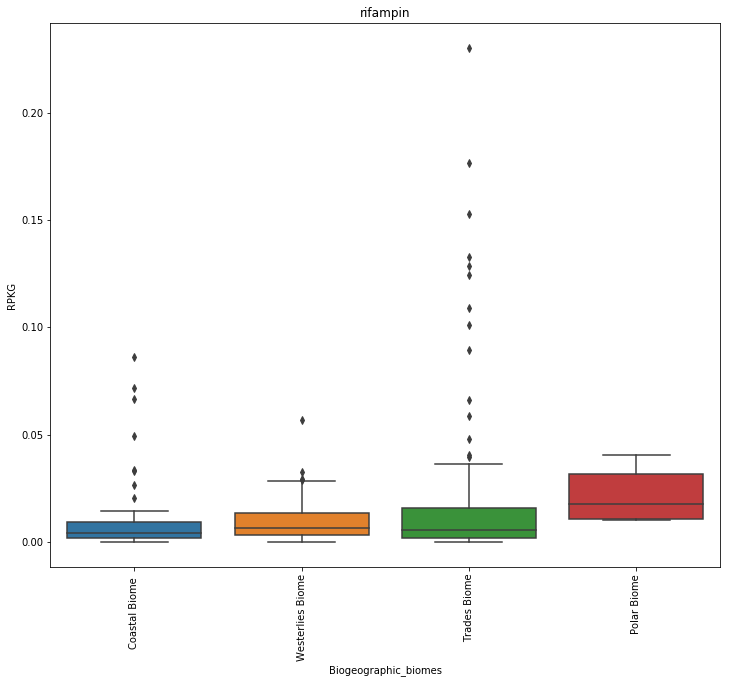

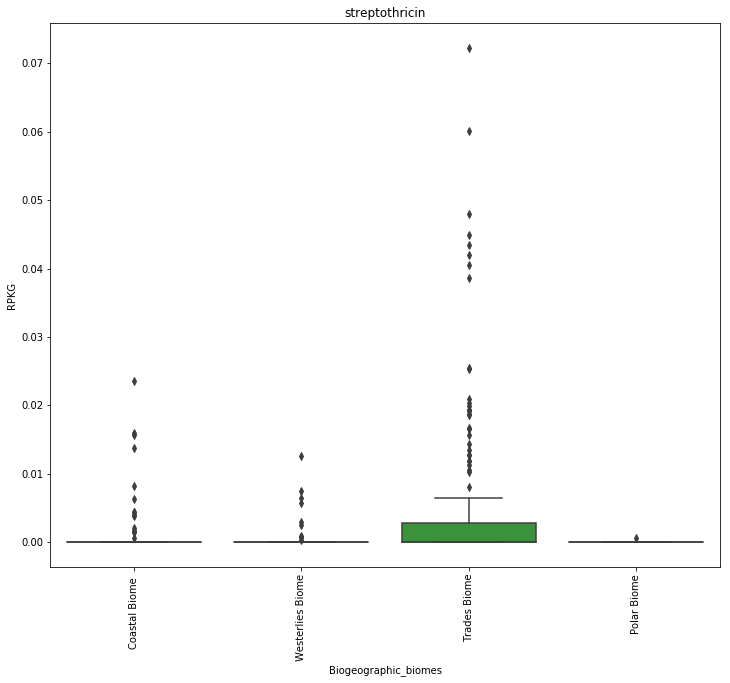

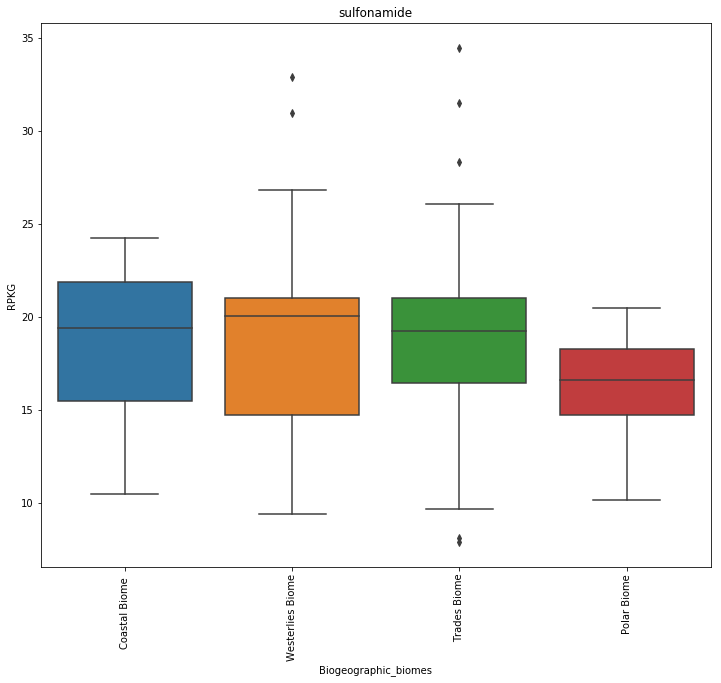

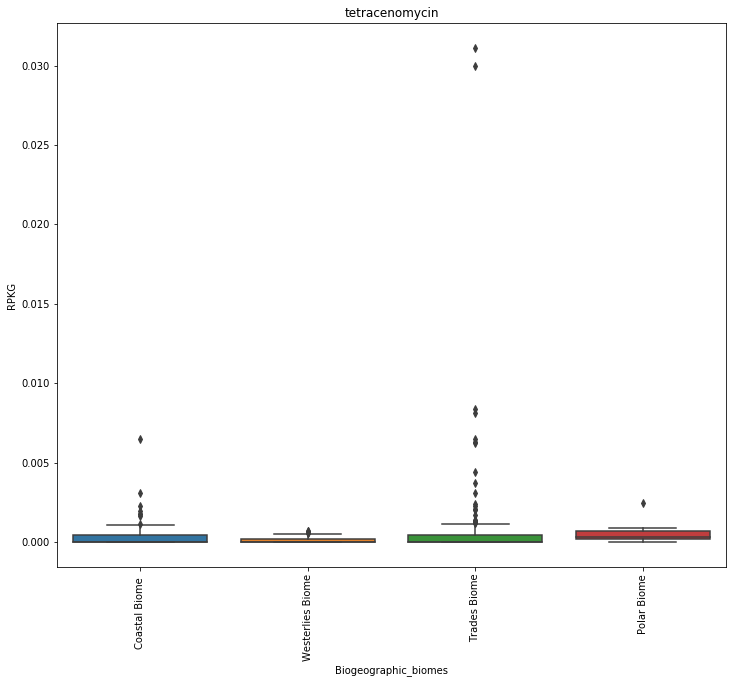

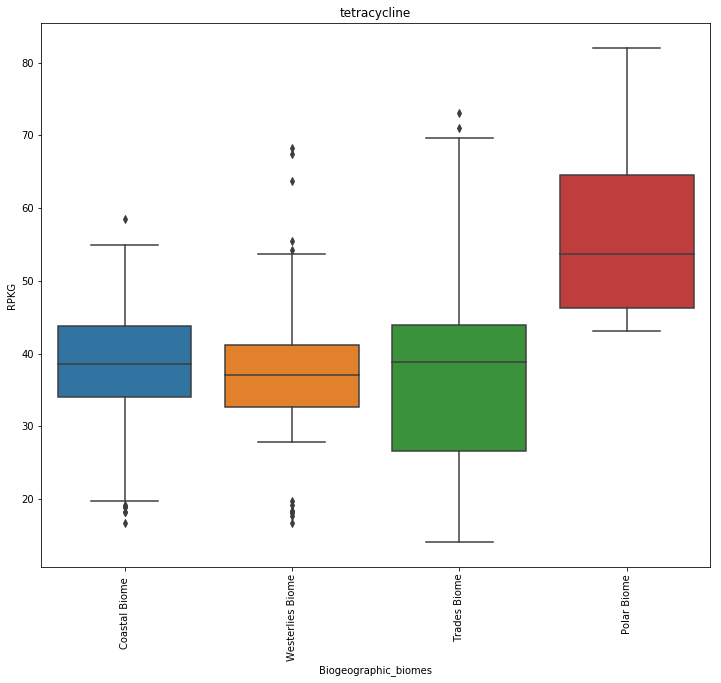

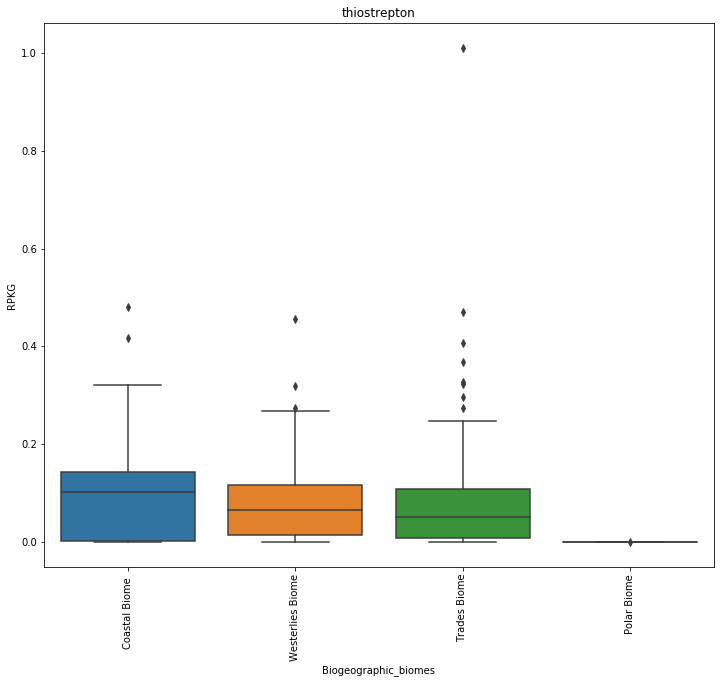

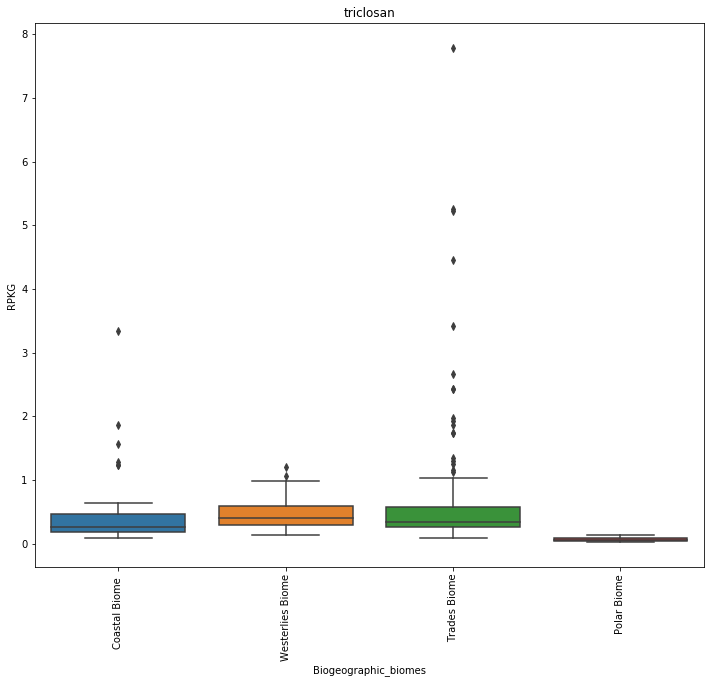

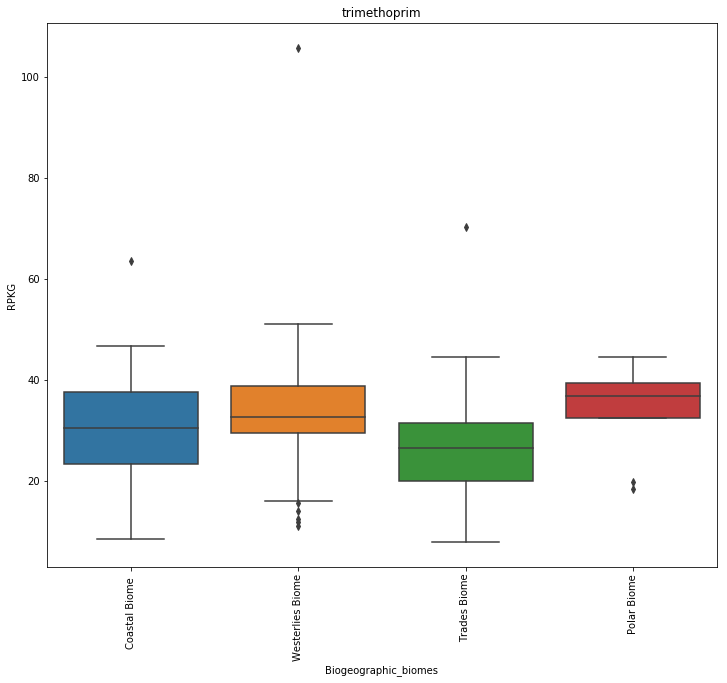

In [154]:
classes=list(classes_RPKG_env_novirus.columns)[0:-6]
env=list(classes_RPKG_env_novirus.columns)[-5:]
for e in env:
    pdf = matplotlib.backends.backend_pdf.PdfPages(out+"boxplots_RPKG_"+e +".pdf")
    for c in classes:
        fig=plt.figure(figsize=(12,10))
        sns.boxplot(classes_RPKG_env_novirus[e],classes_RPKG_env_novirus[c])
        plt.xticks(rotation=90)
        plt.ylabel("RPKG")
        plt.title(c)
        pdf.savefig( fig )
        plt.show()
    pdf.close()
    plt.close()

In [155]:
for e in env:
    pdf = matplotlib.backends.backend_pdf.PdfPages(out+"tukey_class_FPKM_"+e +".pdf")

    all_c=pd.DataFrame()
    classes=list(classes_RPKG_env_novirus.columns)[0:-6]
    for c in classes:
        #print c

        tukey = pairwise_tukeyhsd(endog=classes_RPKG_env_novirus[c],     # Data
                                  groups=classes_RPKG_env_novirus[e],   # Groups
                                  alpha=0.05)          # Significance level

        fig=tukey.plot_simultaneous(comparison_name=classes_RPKG_env_novirus[e][0])    # Plot group confidence intervals
        plt.title(c)
        plt.tight_layout()
        pdf.savefig( fig )
        #plt.show()
        df=tukey.summary()
        res=pd.DataFrame(df.data[1:],columns=df.data[0])
        res["class"]=str(c)
        res["env"]=str(e)
        all_c=pd.concat([all_c,res])
        all_c.to_excel(out+"/tukey_class_tests_FPKM_" +e +".xlsx",index=None)
        
    pdf.close()
    plt.close()

In [156]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
 
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov

In [157]:
ols_df=classes_RPKG_env_novirus
ols_df=pd.merge(ols_df,meta[['Latitude [degrees North]', u'Longitude [degrees East]','run_id','NO2 [umol/L]**','PO4 [umol/L]**',
       u'NO2NO3 [umol/L]**', u'SI [umol/L]**','miTAG.SILVA.Taxo.Richness',
       u'miTAG.SILVA.Phylo.Diversity', u'miTAG.SILVA.Chao', u'miTAG.SILVA.ace',
       u'miTAG.SILVA.Shannon', u'OG.Shannon', u'OG.Richness', u'OG.Evenness',
       u'FC - heterotrophs [cells/mL]', u'FC - autotrophs [cells/mL]',
       u'FC - bacteria [cells/mL]', u'FC - picoeukaryotes [cells/mL]']],on="run_id")
ols_df.rename(columns={"Latitude [degrees North]":"Latitude","Longitude [degrees East]":"Longitude",
                       "Date/Time [yyyy-mm-ddThh:mm]":"Data_Time","NO2NO3 [umol/L]**":"NO2NO3",
                       "NO2 [umol/L]**":"NO2","PO4 [umol/L]**":"PO4",
                       "SI [umol/L]**":"SI","FC - heterotrophs [cells/mL]":"FC_heterotrophs_cells.mL",
                      "FC - autotrophs [cells/mL]":"FC_autotrophs_cells.mL","FC - bacteria [cells/mL]":"FC_bacteria_cells.mL",
                      "FC - picoeukaryotes [cells/mL]":"FC_picoeukaryotes_cells.mL"},inplace=True)
ols_df.drop("run_id",axis=1,inplace=True)

#'Date/Time [yyyy-mm-ddThh:mm]'
ols_df.columns=ols_df.columns.str.replace(r".", "_").str.replace(r"-", "_")
par=list(ols_df.columns)
parameters=[x for x in par if x not in classes]
parameters.remove("macrolide_lincosamide_streptogramin")
parameters.remove("multidrug_mutation")

formula1="+".join(parameters)
# OLS with all the metadata 
reg3 = pd.DataFrame()
reg3_ = pd.DataFrame()
aov=pd.DataFrame()
pdf = matplotlib.backends.backend_pdf.PdfPages(out+"models_aov.pdf")
writer = pd.ExcelWriter(out+'aov_results.xlsx', engine='xlsxwriter')
writer2 = pd.ExcelWriter(out+'aov_results_significant.xlsx', engine='xlsxwriter')
classes=list(classes_RPKG_env.columns)[0:-6]
for c in classes:
    formula="%s ~ "%(c.replace(r"-", "_")) + formula1
    res = ols(formula, ols_df).fit()
    dfres={"coeficient":res.params,"p values":res.pvalues}
    ddd=pd.DataFrame(dfres)
    ddd["coeficient"]=ddd["coeficient"].apply(lambda x: "%.4f" % (x))
    ddd["variable"]=c.replace(r"-", "_")
    ddd["Formula"] = formula
    ddd["model p value"]=res.f_pvalue
    ddd["model Adjusted r squared"]=res.rsquared_adj
    ddd["r squared"]=res.rsquared
    #final result of OLS
    reg3=pd.concat([reg3,ddd],axis=0)
    
    reg3_ = reg3[(reg3["p values"] < 0.05) | (reg3["model p value"]< 0.05)] 
    reg3_["coeficient"]=reg3_["coeficient"].astype(float)
    reg3_ = reg3_.sort_values(by=["coeficient"],ascending=False)
    aov_table = anova_lm(res,typ=2)
    aov_table["classe"]=c
    
    eta_squared(aov_table)
    omega_squared(aov_table)
    #print(aov_table)
    aov_sig=aov_table[aov_table["PR(>F)"]<0.05]
    
    aov_table.to_excel(writer, sheet_name=c[0:30])
    aov_sig.to_excel(writer2, sheet_name=c[0:30])

    aov=pd.concat([aov,aov_table],axis=0)

    res_ = res.resid 
    fig = sm.qqplot(res_, line='s')
    plt.title(c)
    pdf.savefig( fig )
    
plt.close()
pdf.close()
writer.save()
writer2.save()

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/statsmodels/base/model.py:1532: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/statsmodels/base/model.py:1532

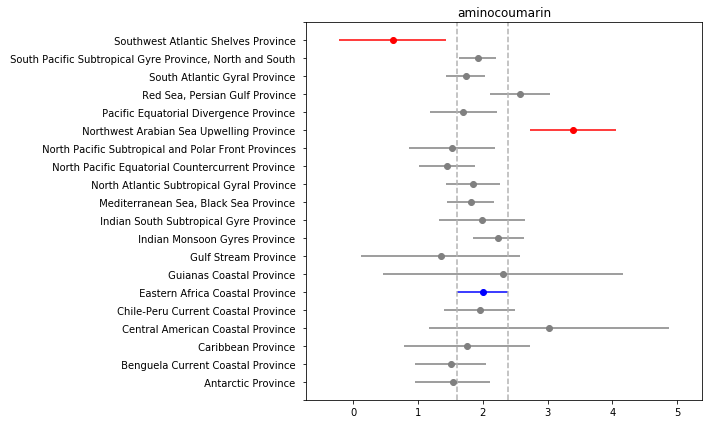

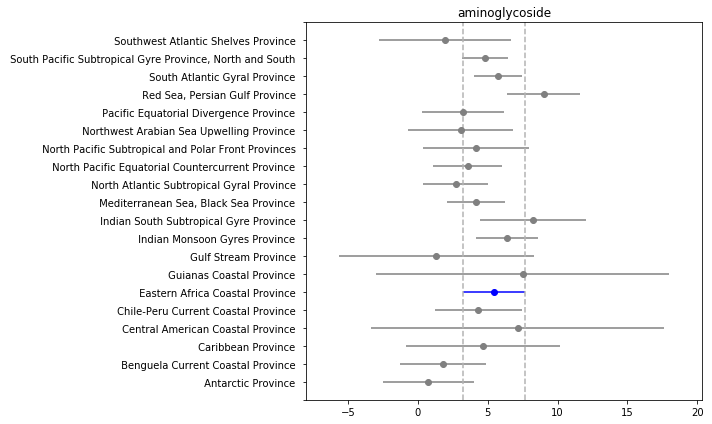

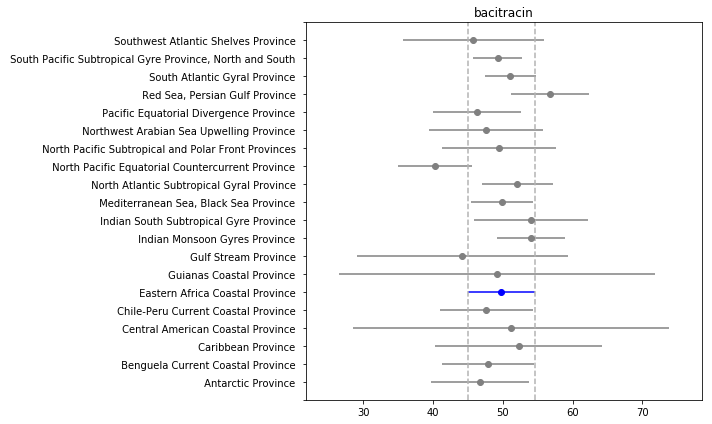

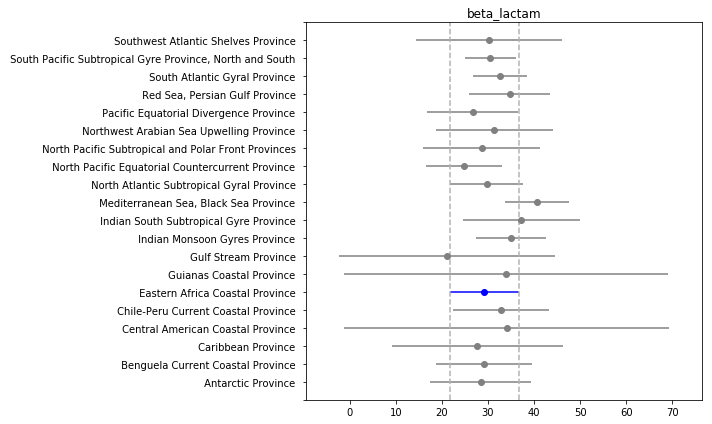

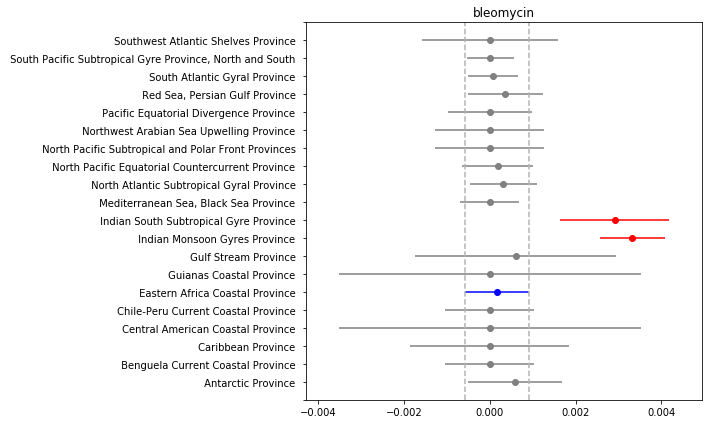

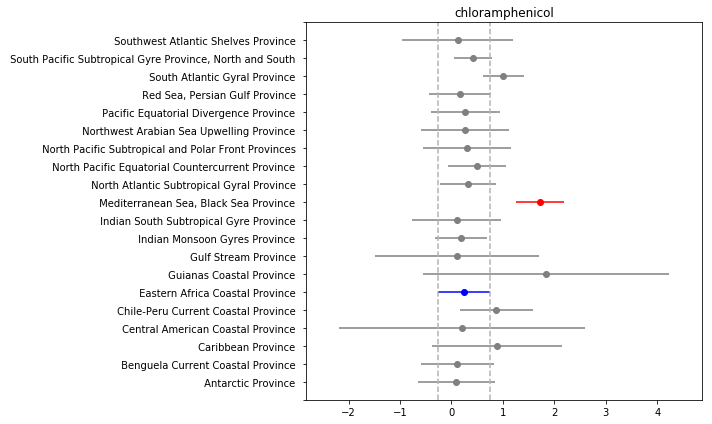

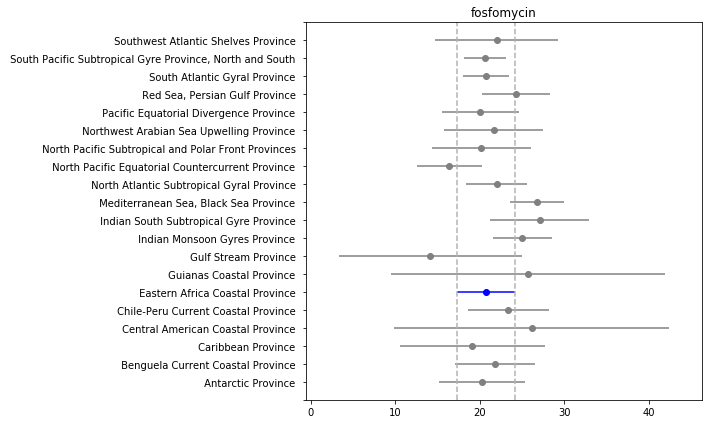

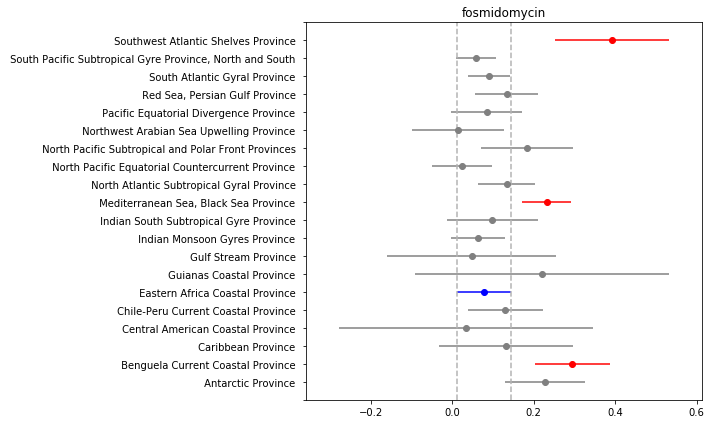

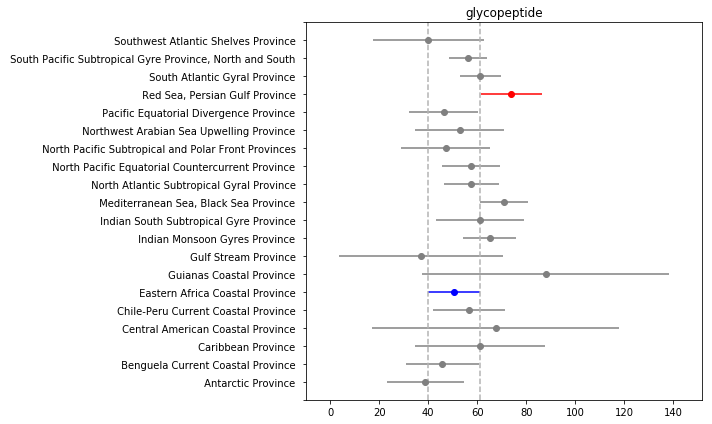

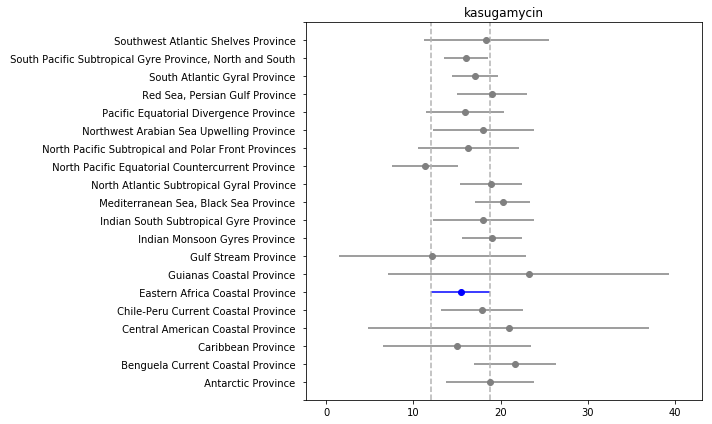

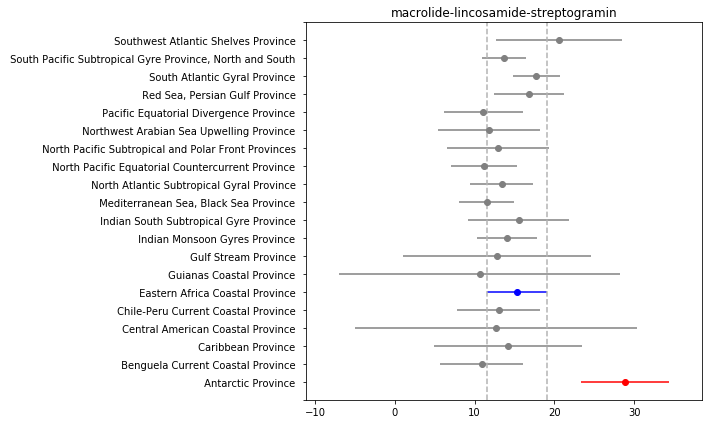

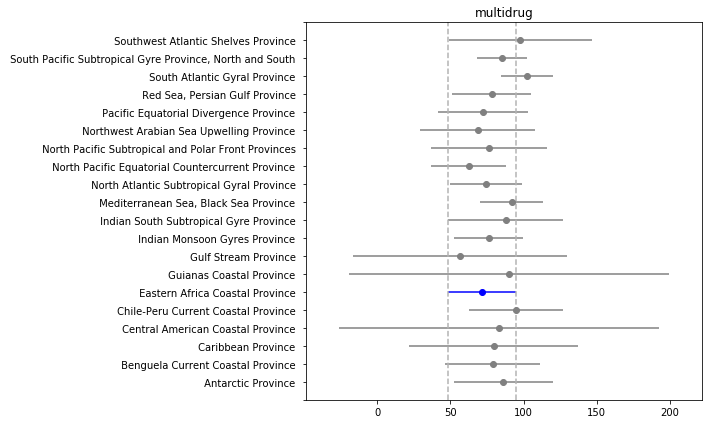

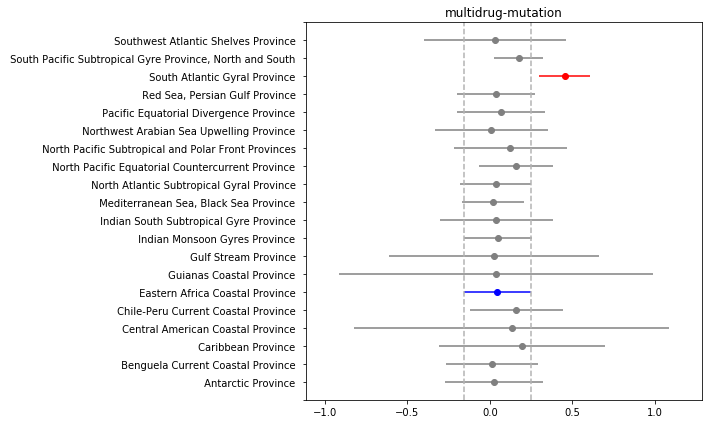

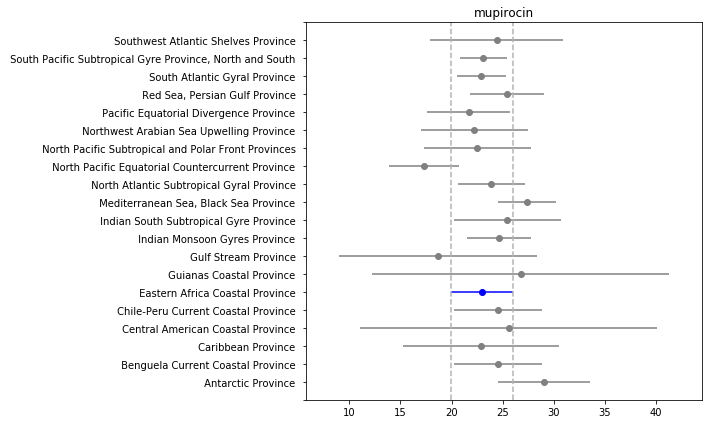

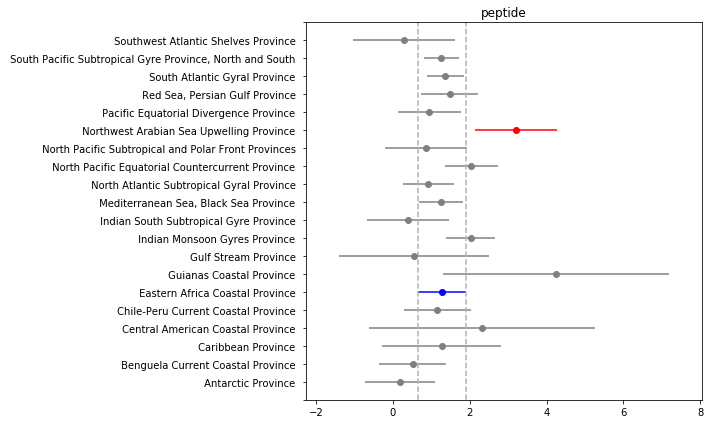

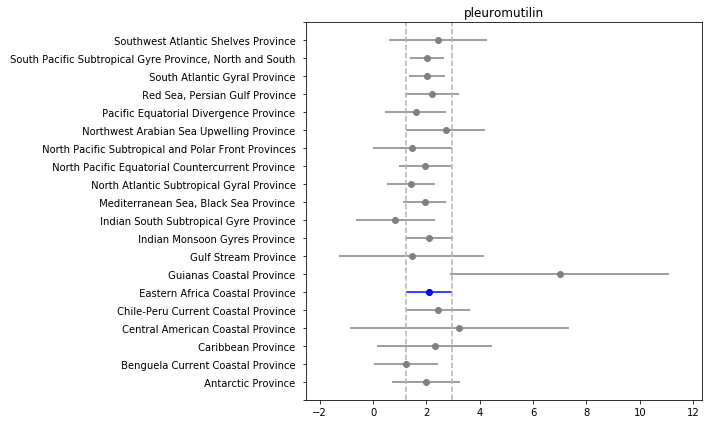

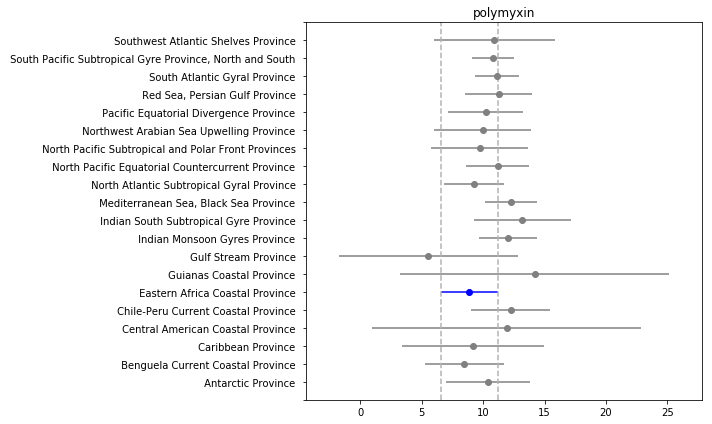

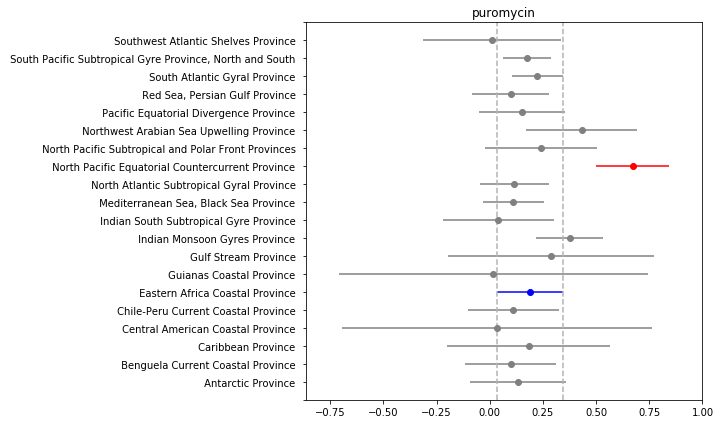

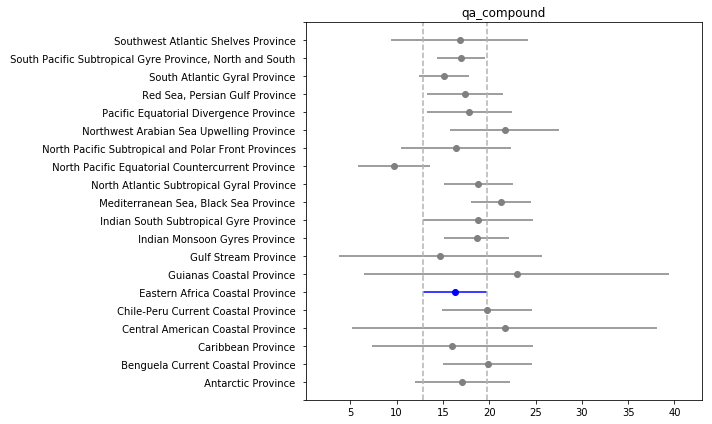

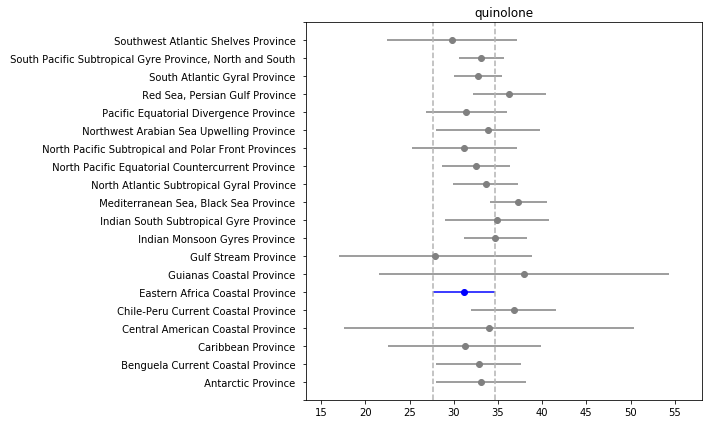

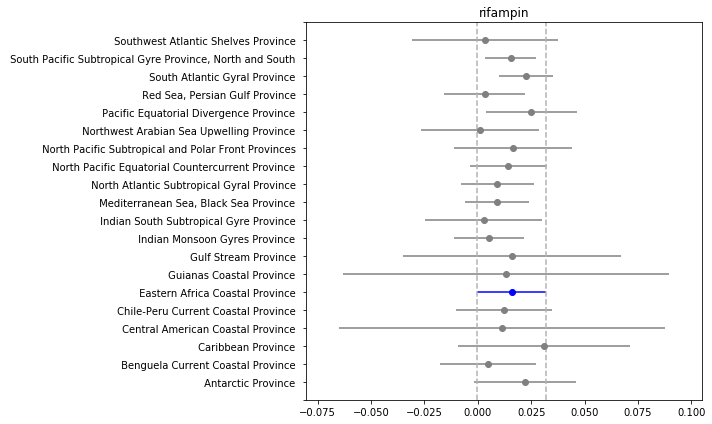

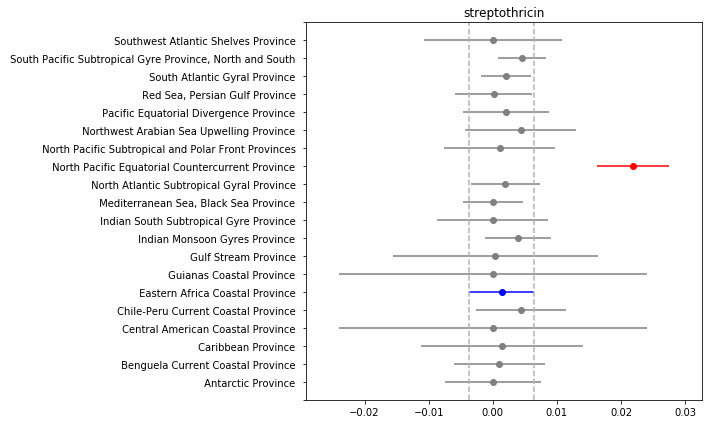

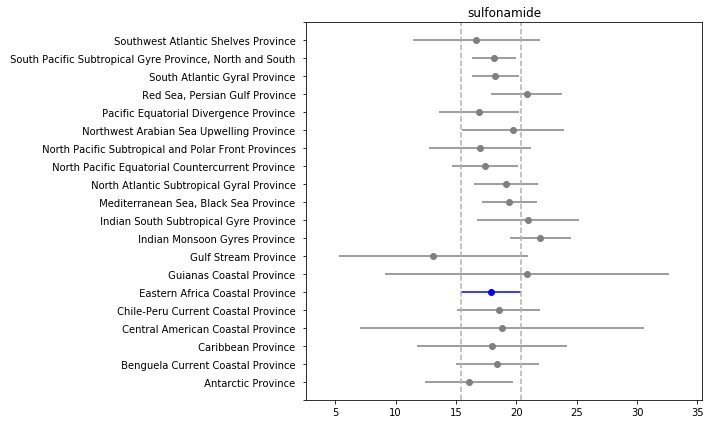

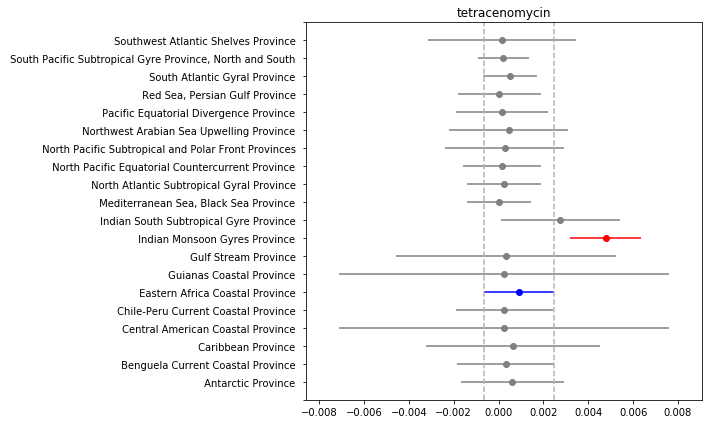

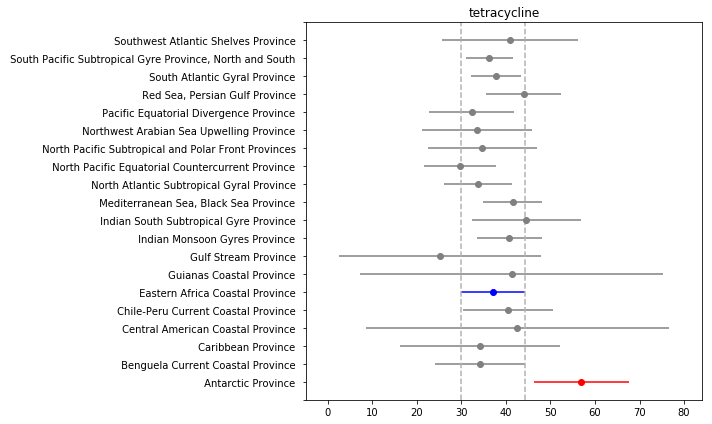

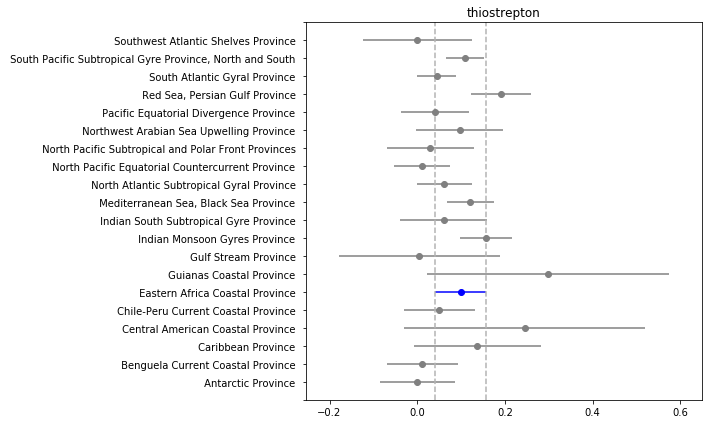

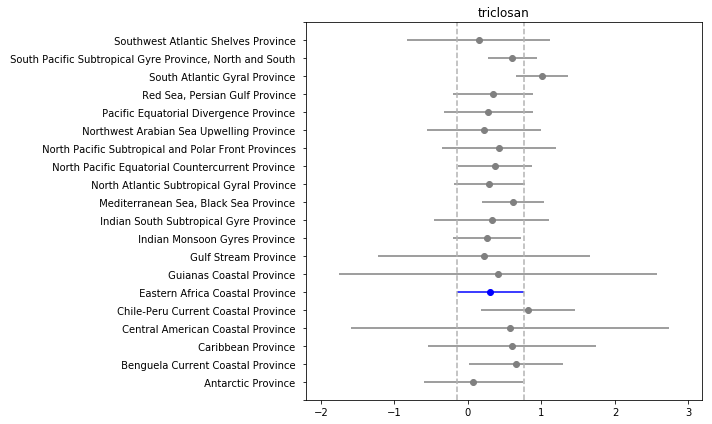

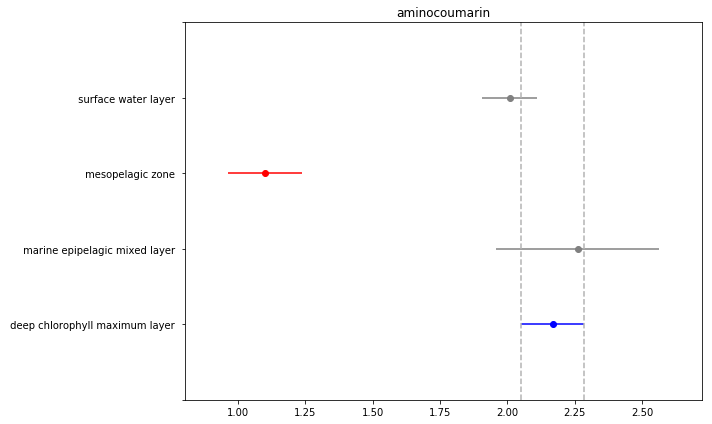

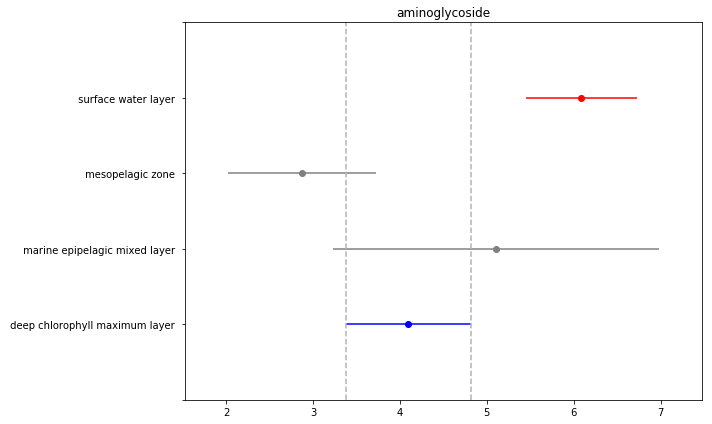

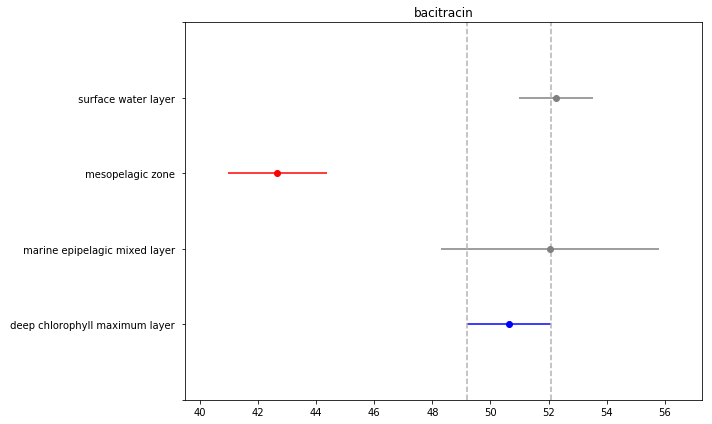

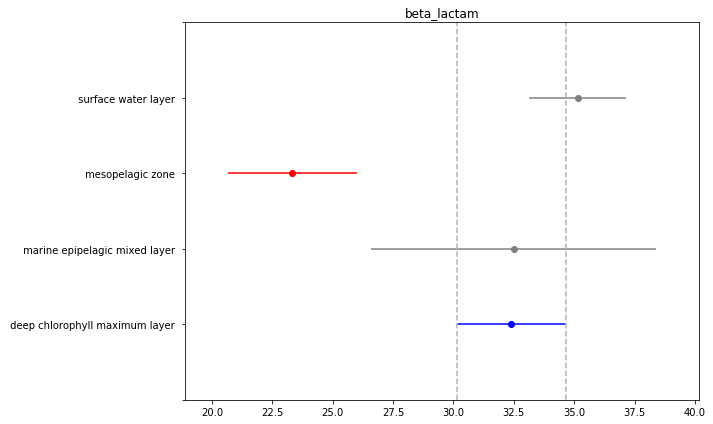

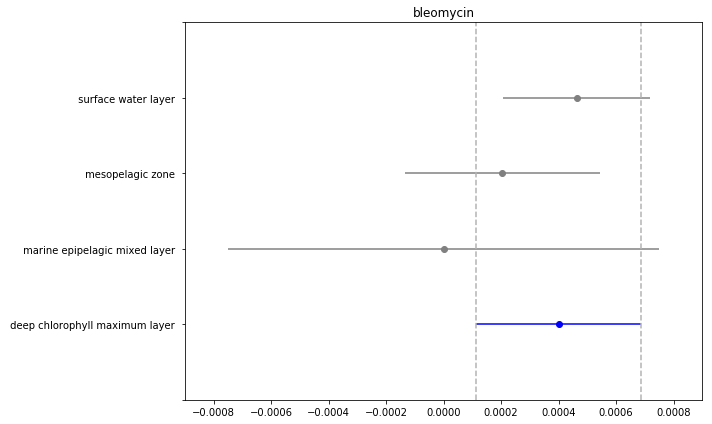

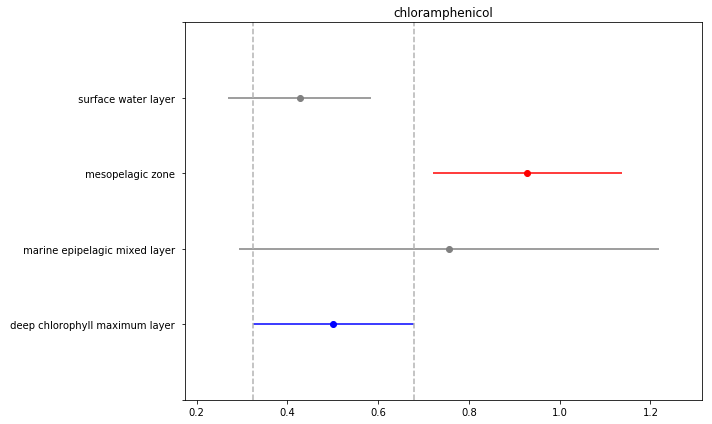

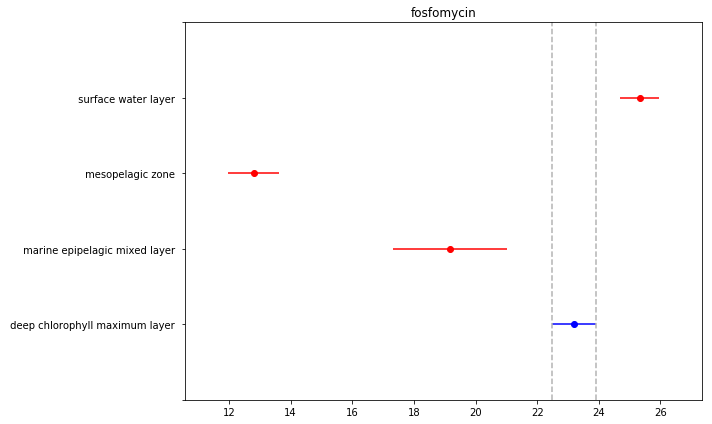

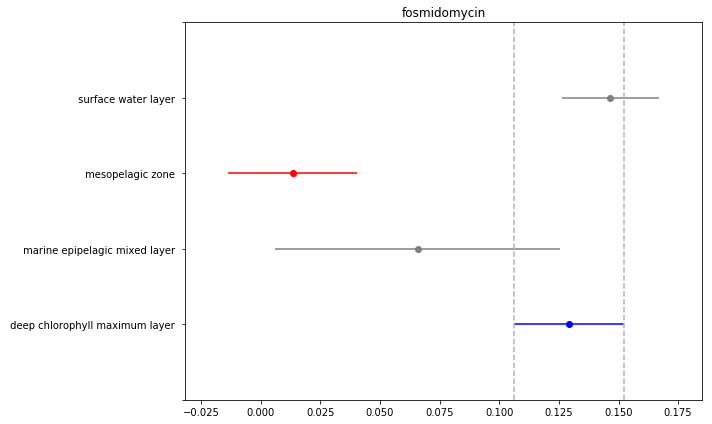

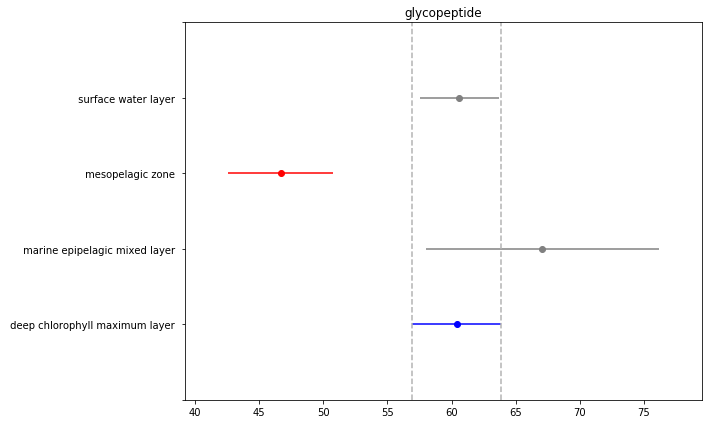

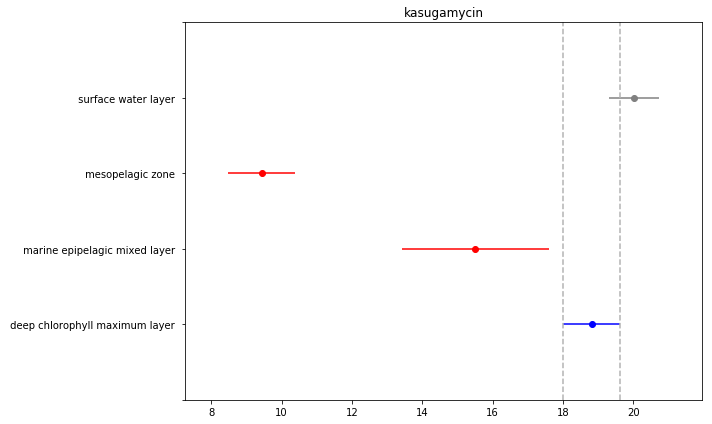

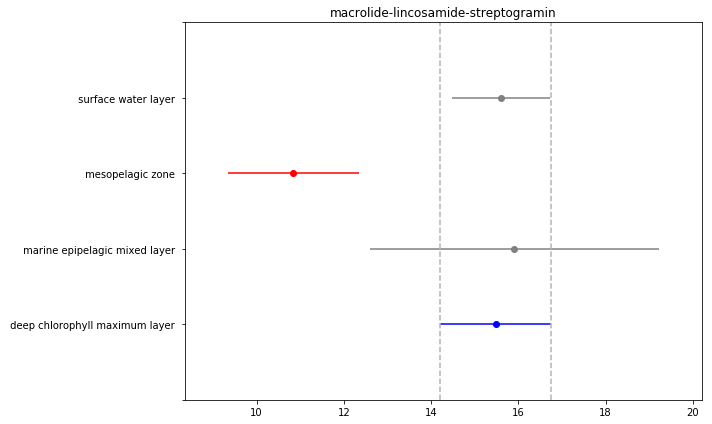

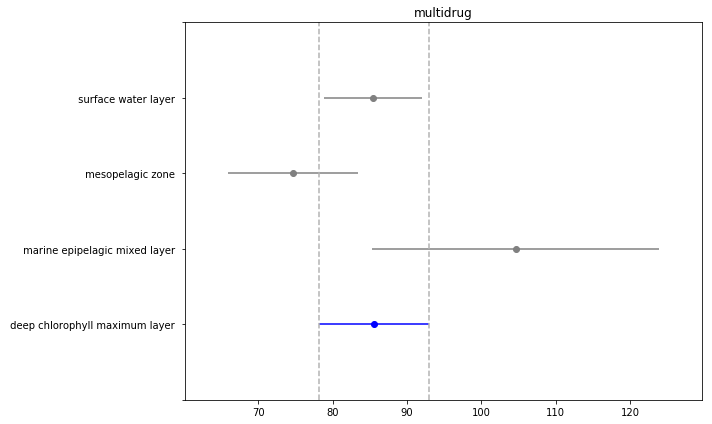

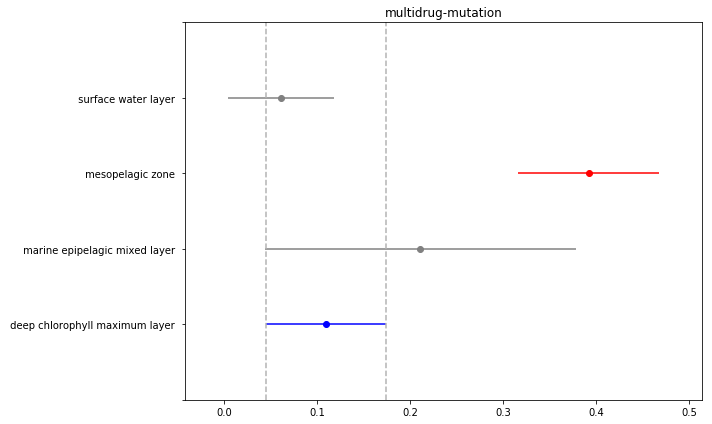

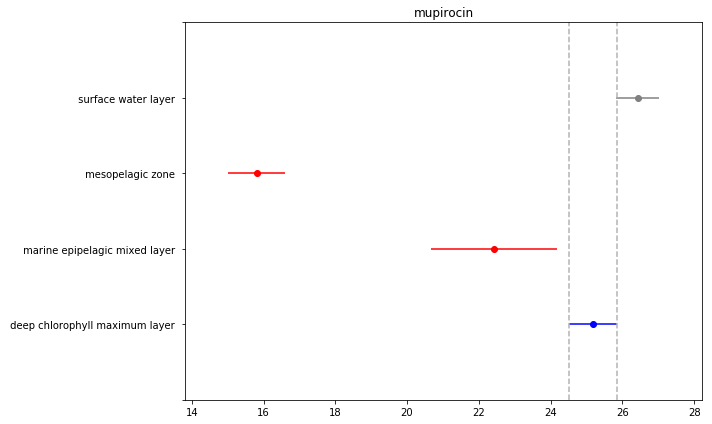

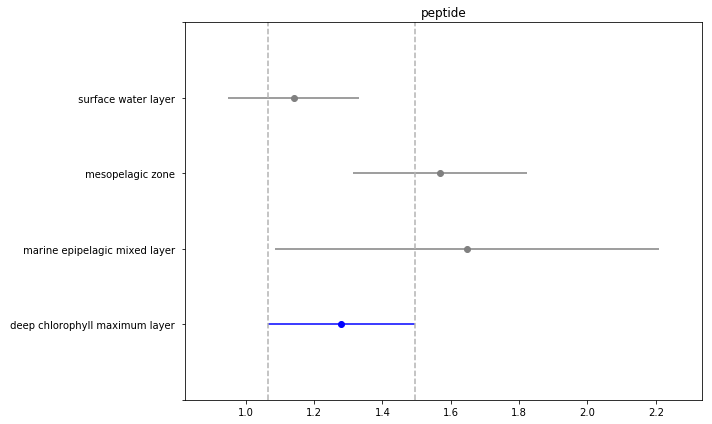

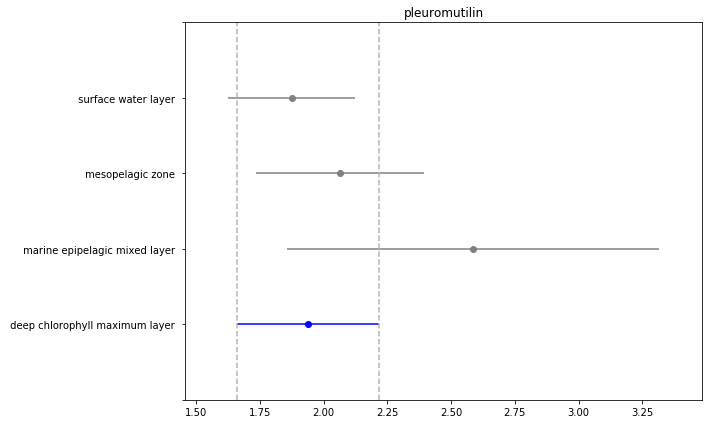

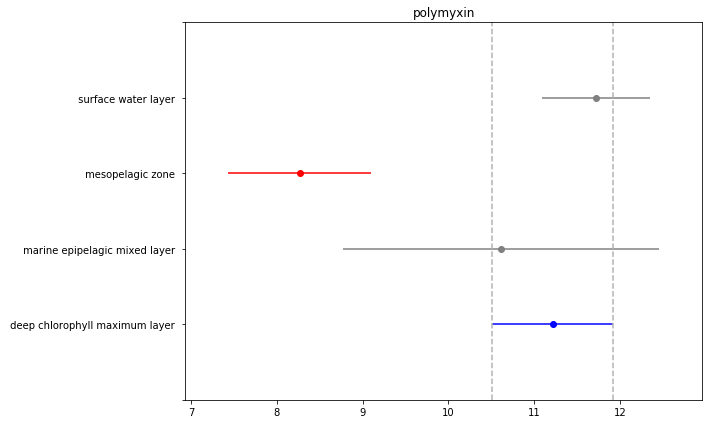

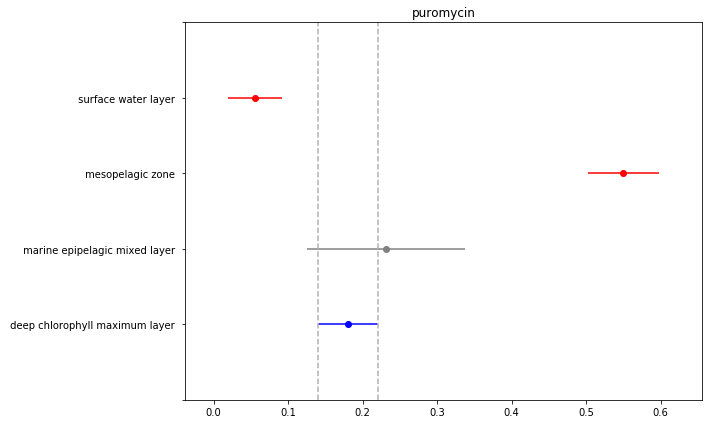

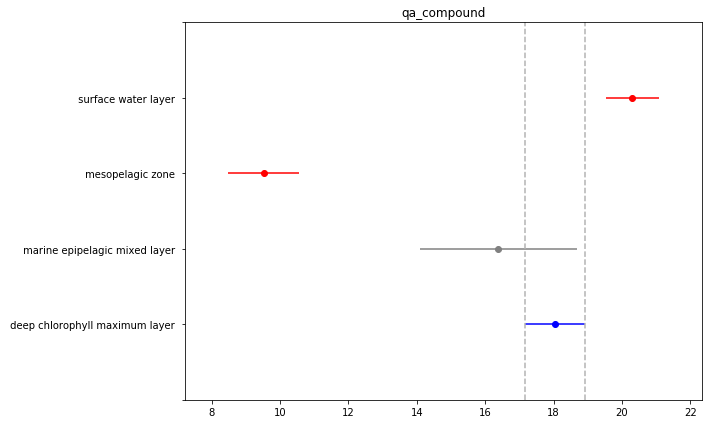

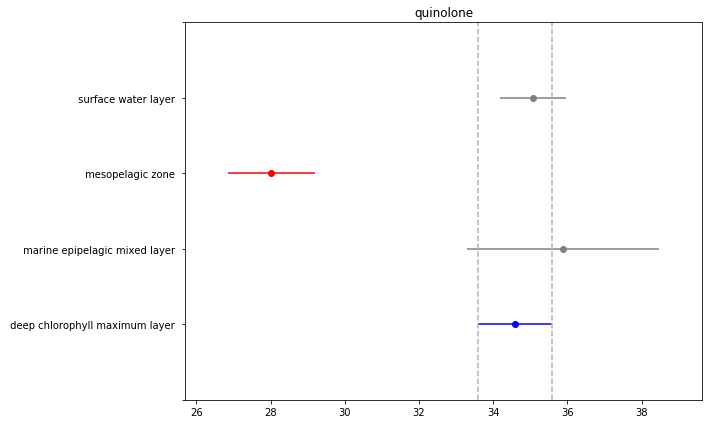

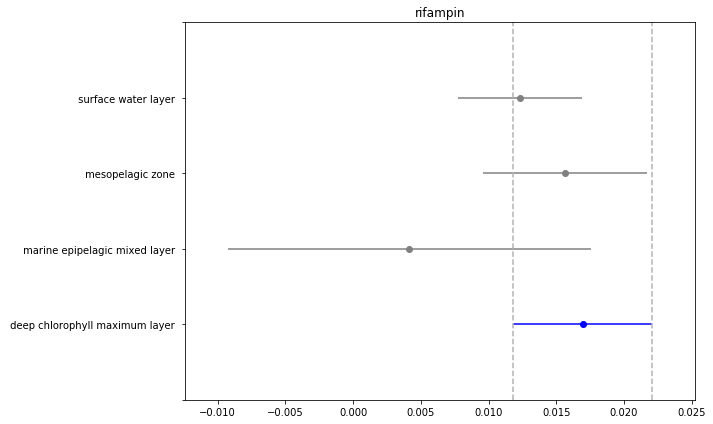

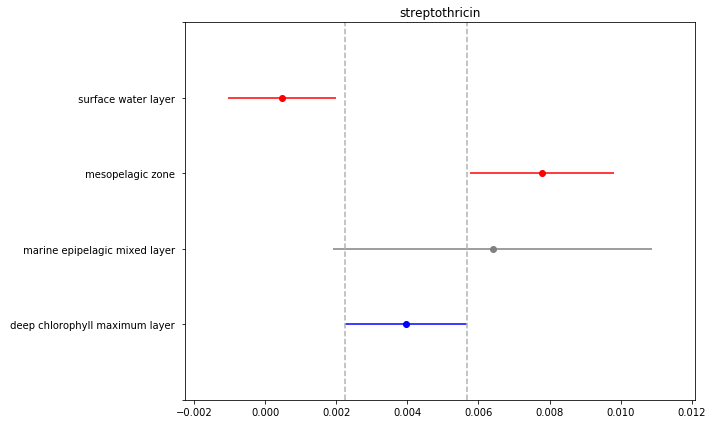

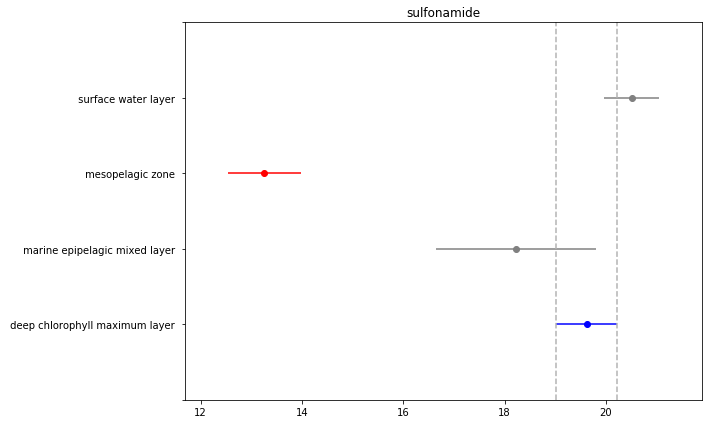

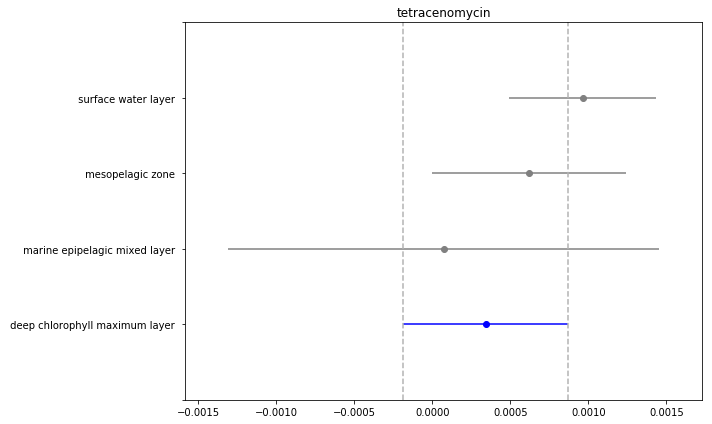

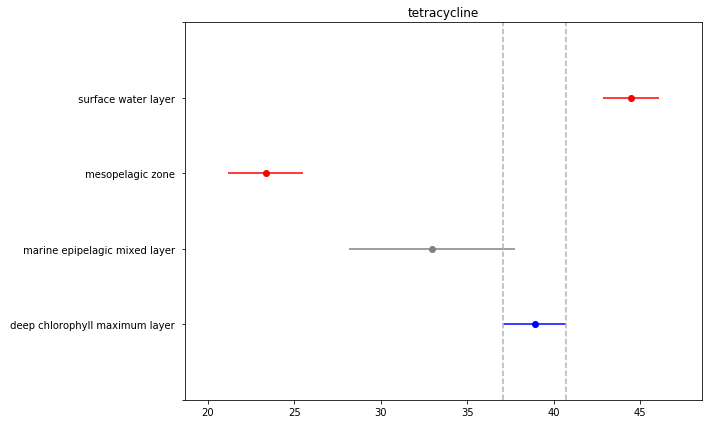

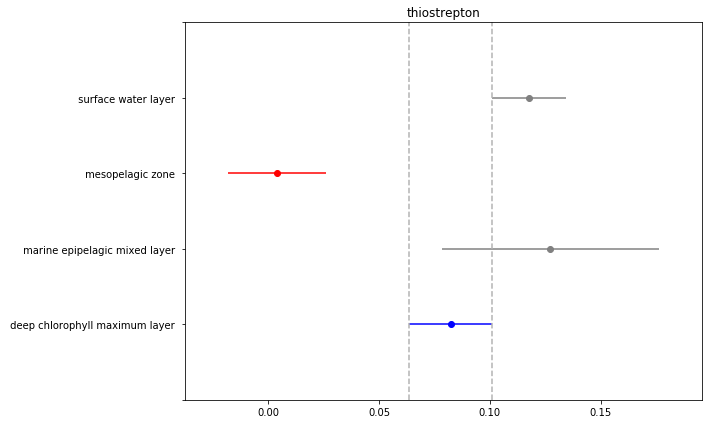

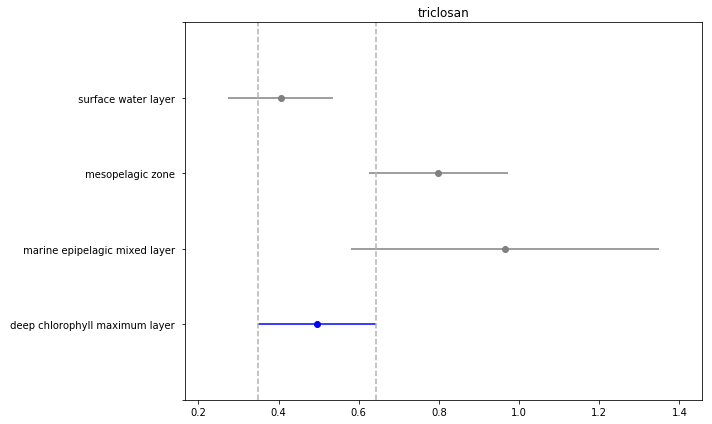

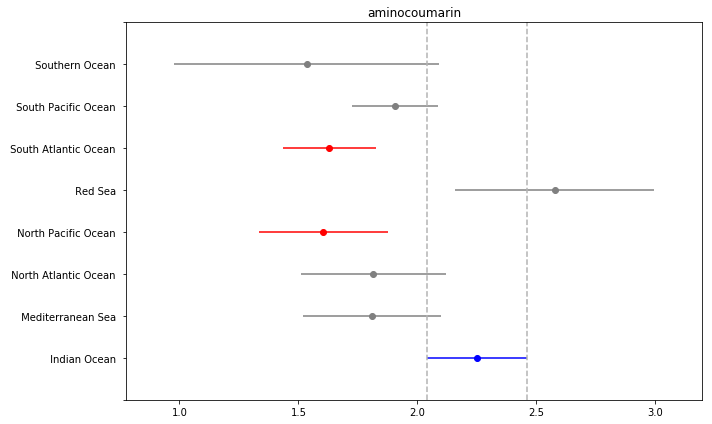

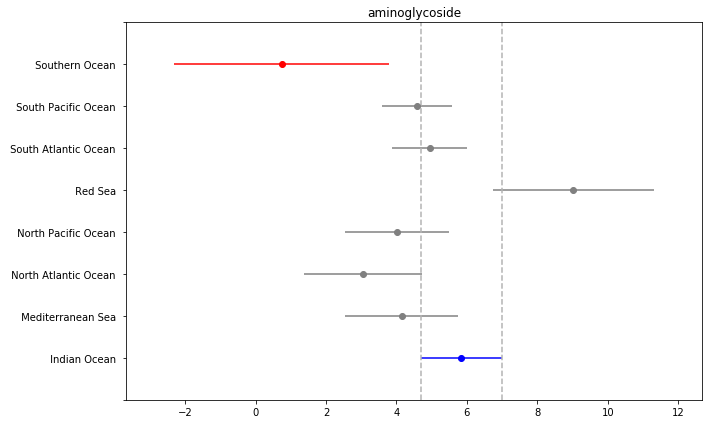

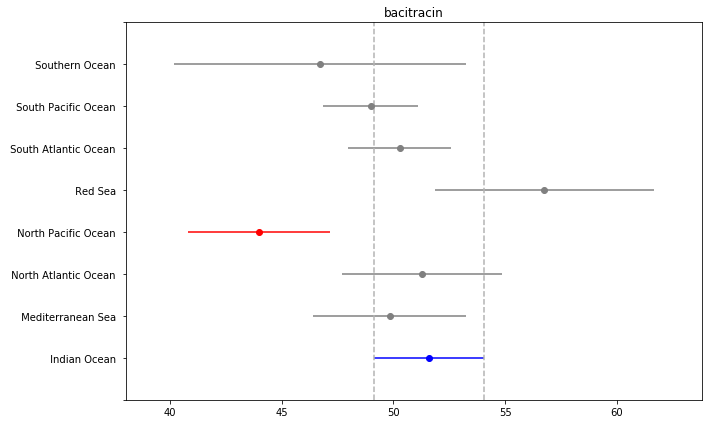

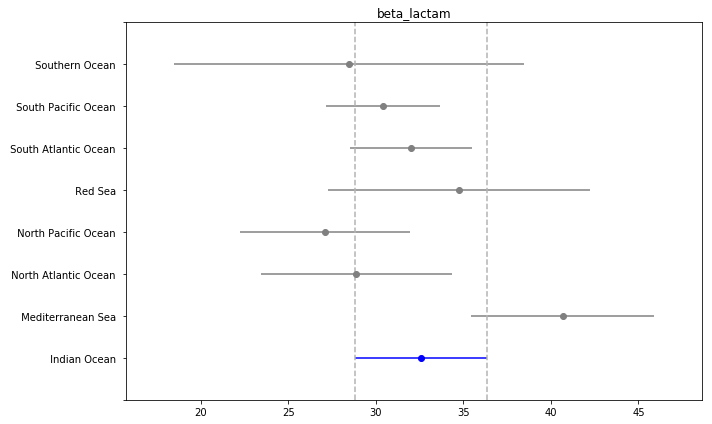

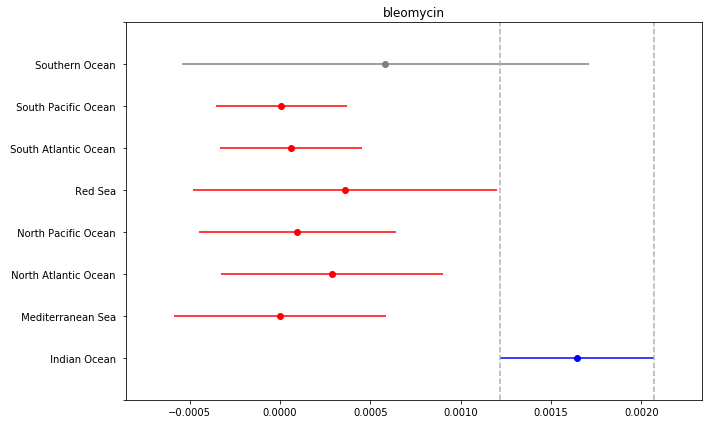

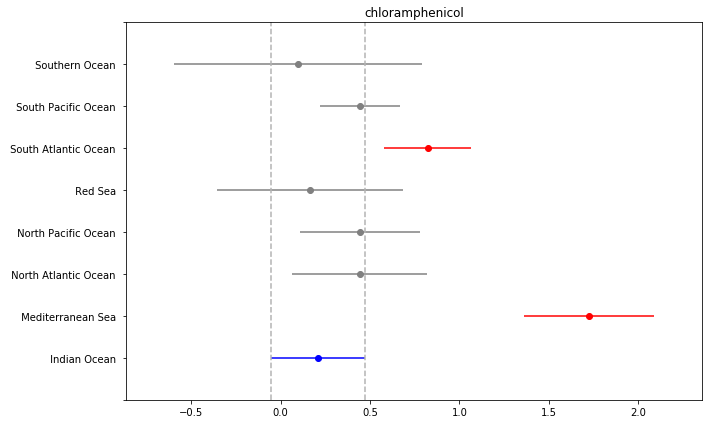

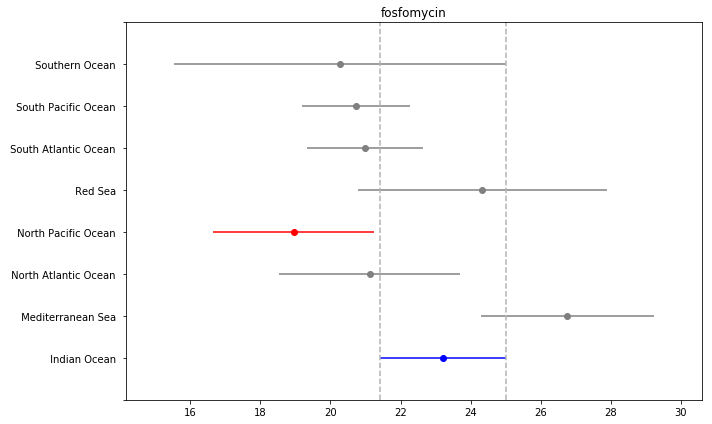

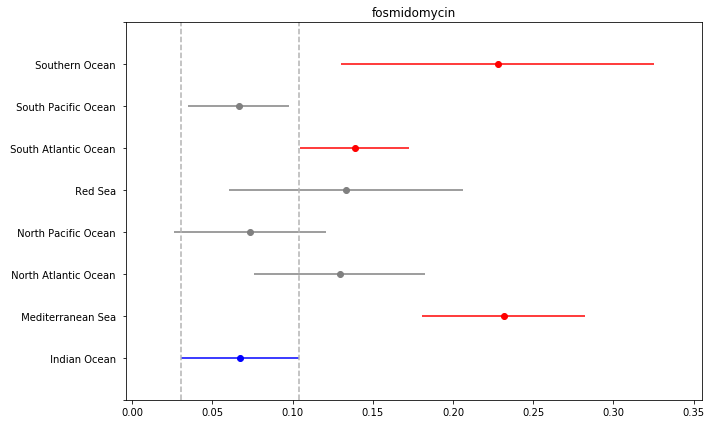

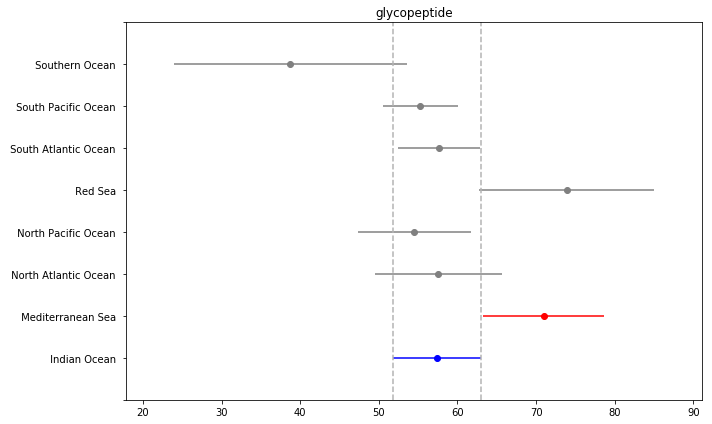

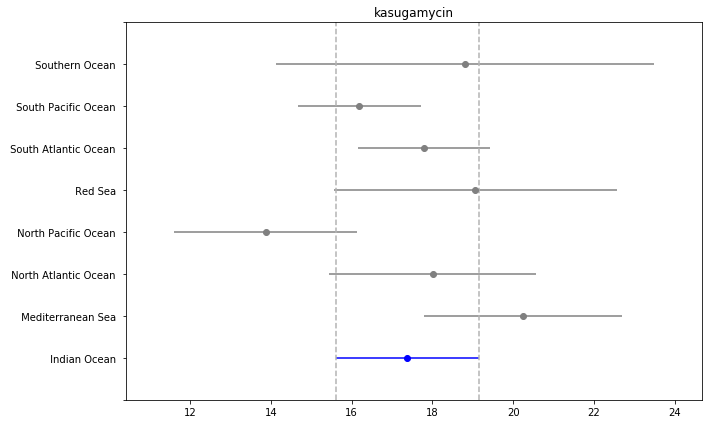

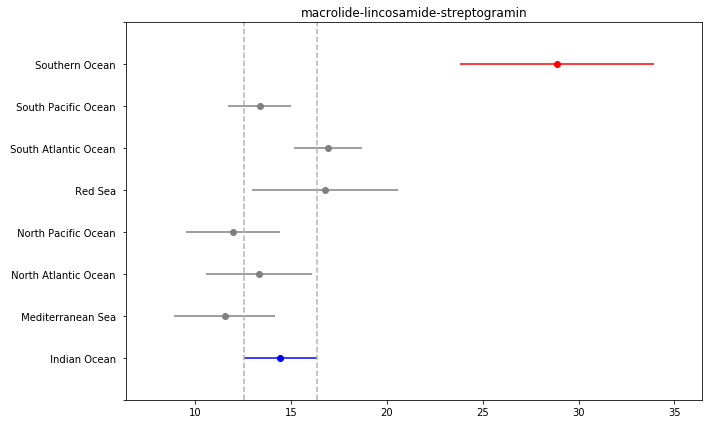

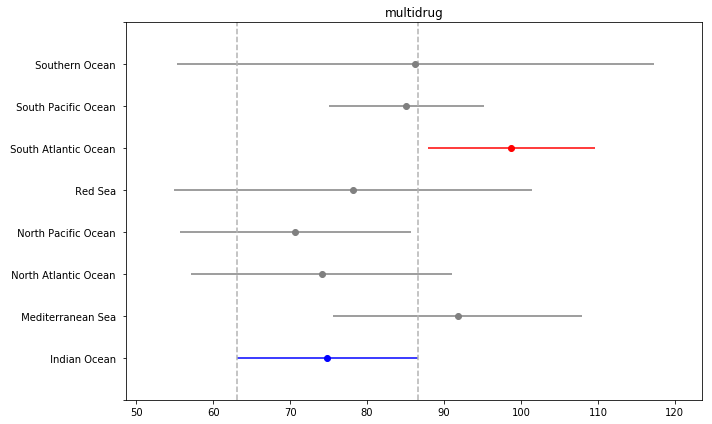

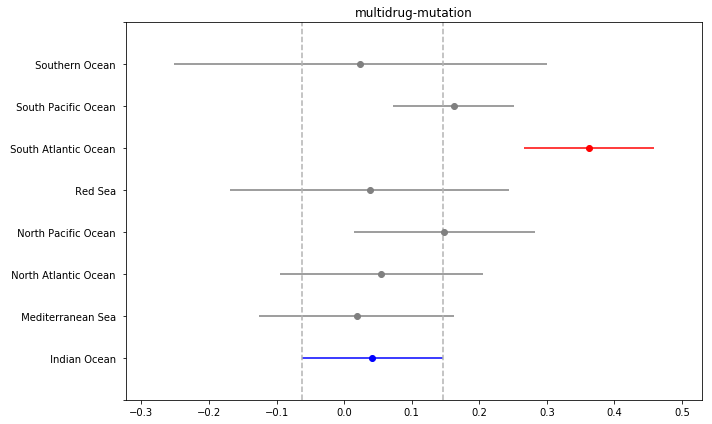

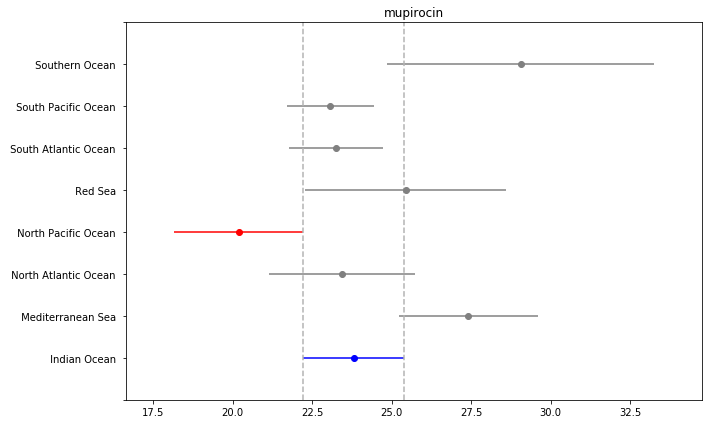

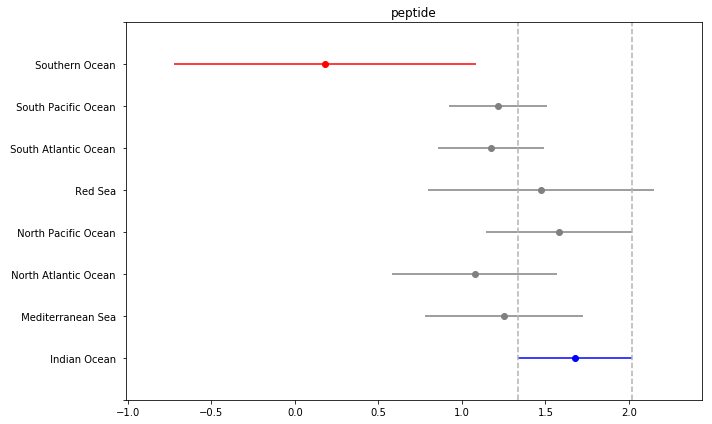

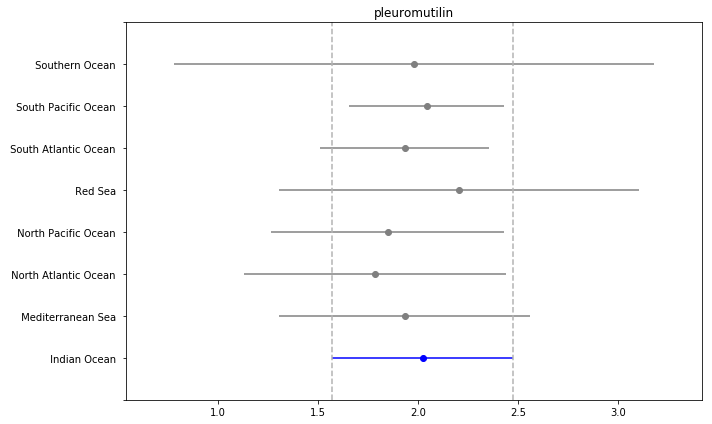

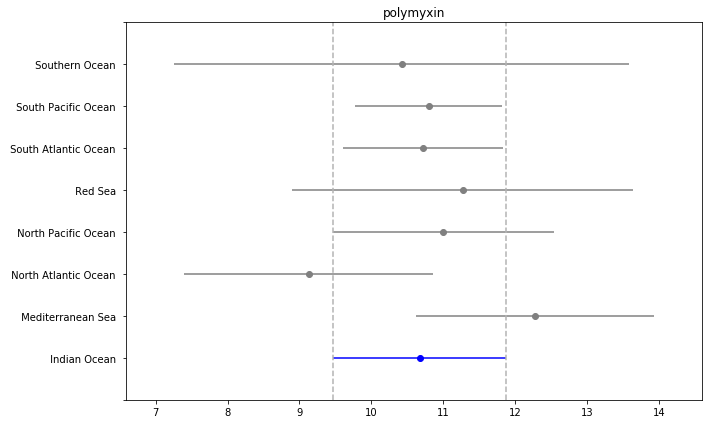

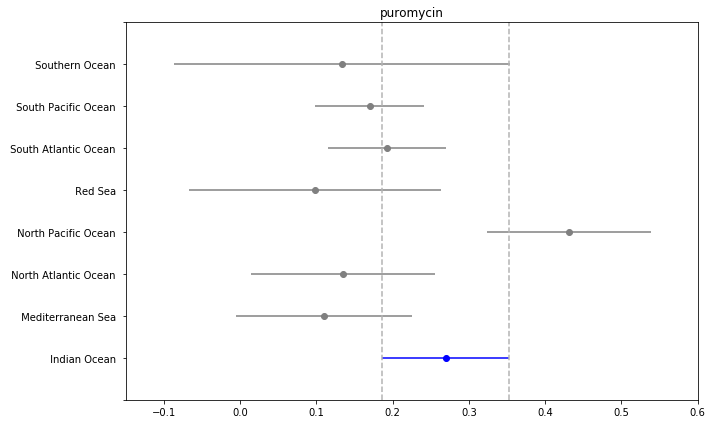

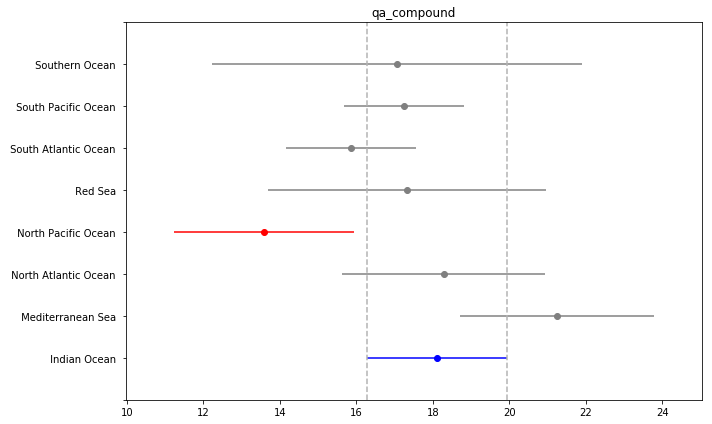

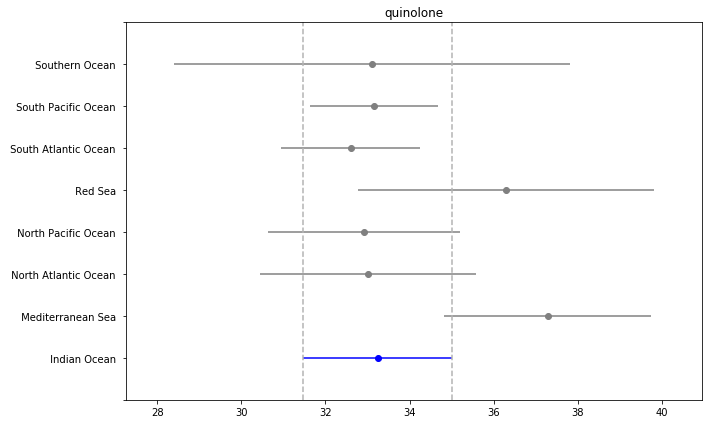

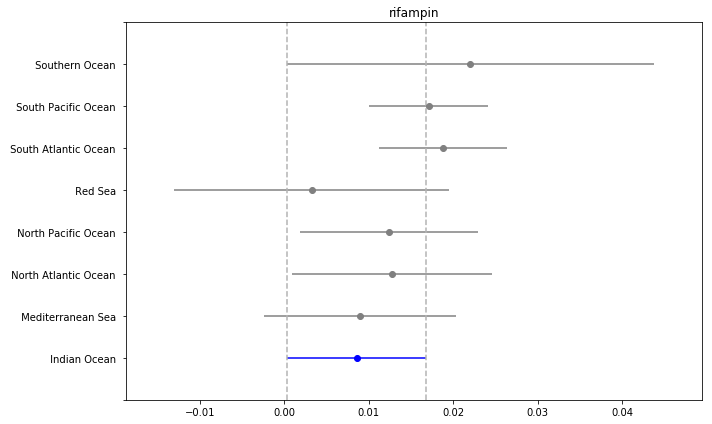

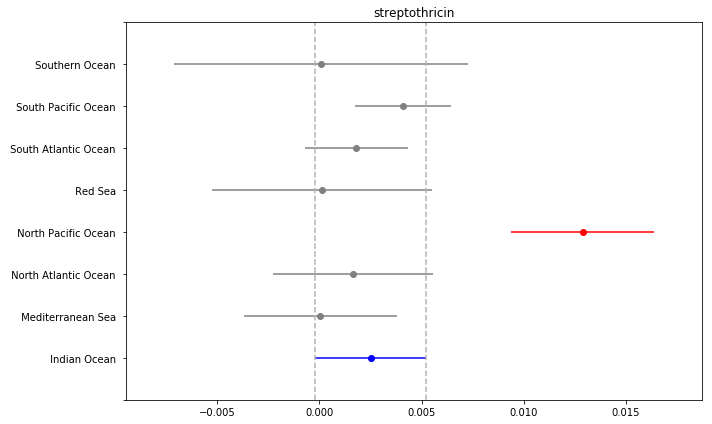

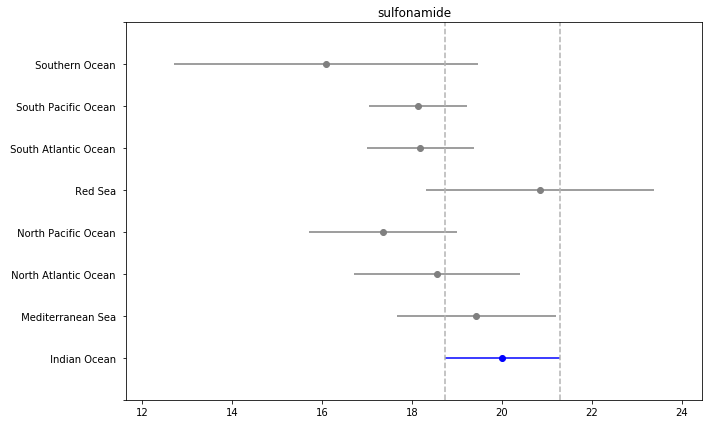

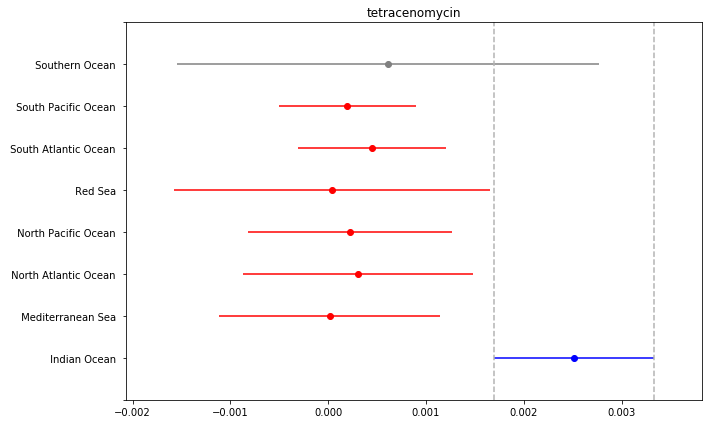

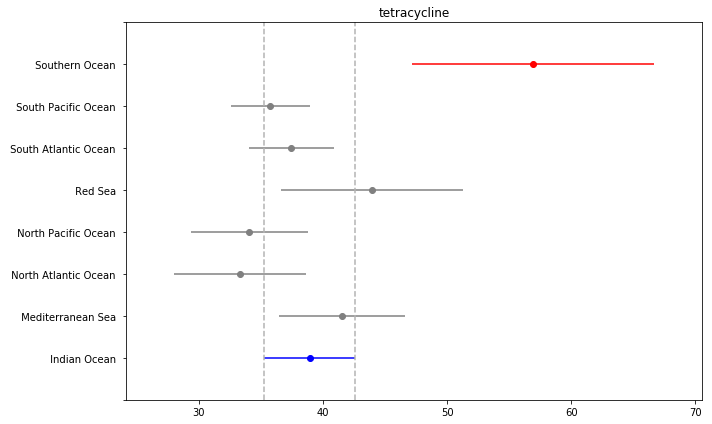

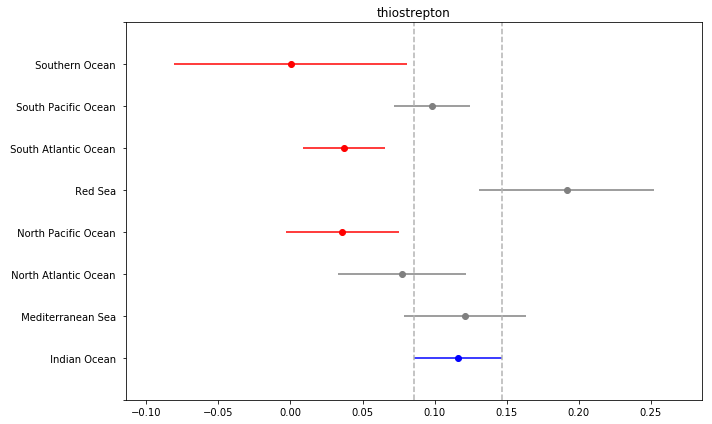

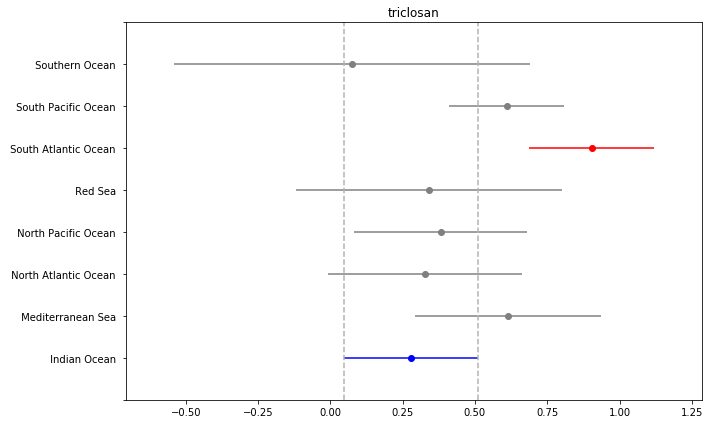

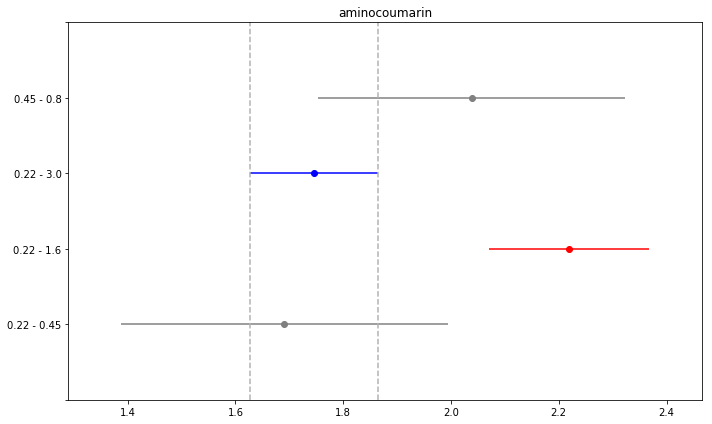

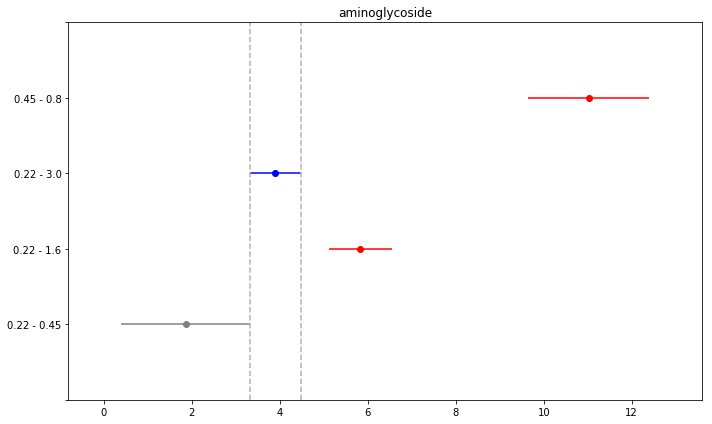

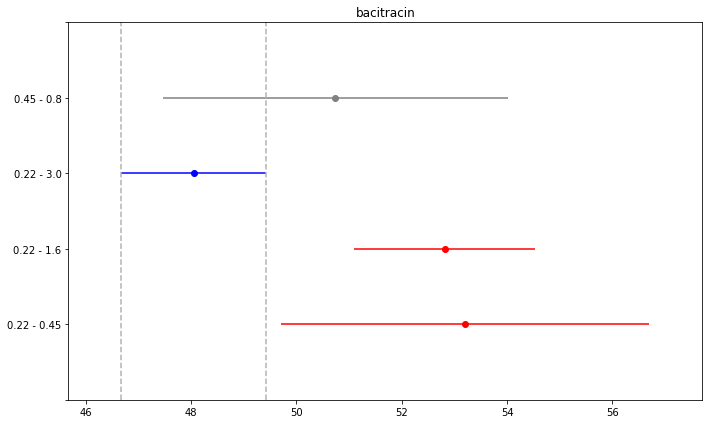

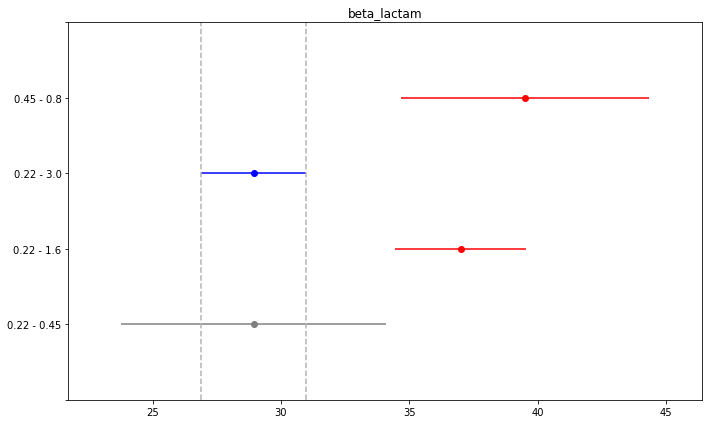

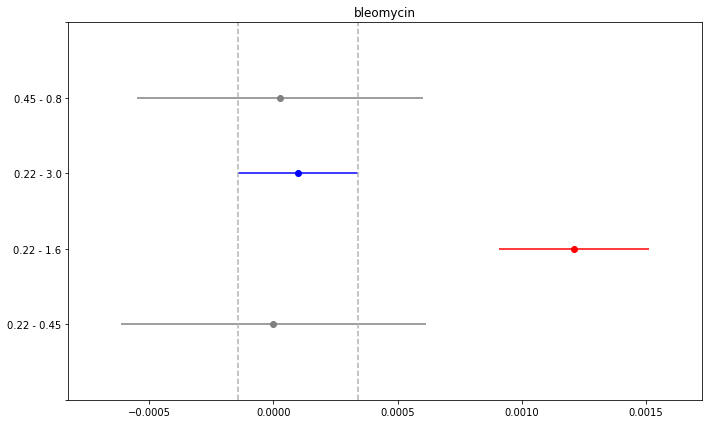

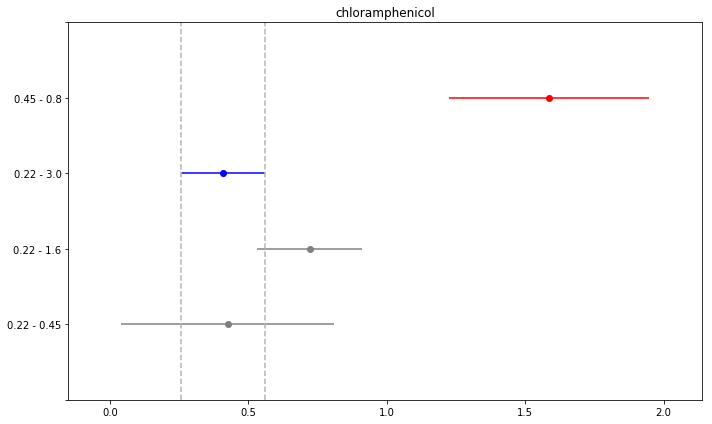

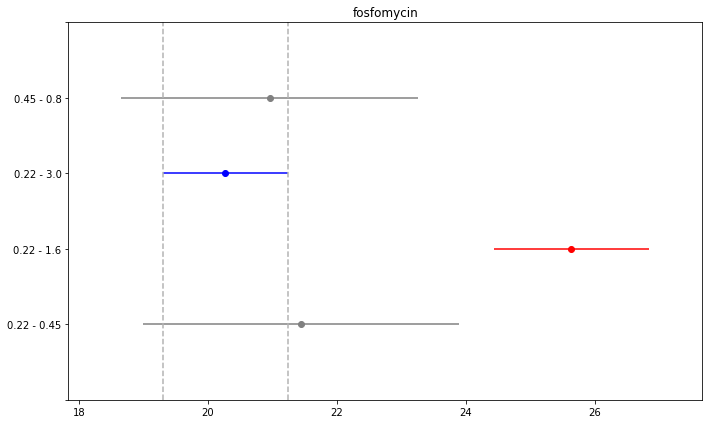

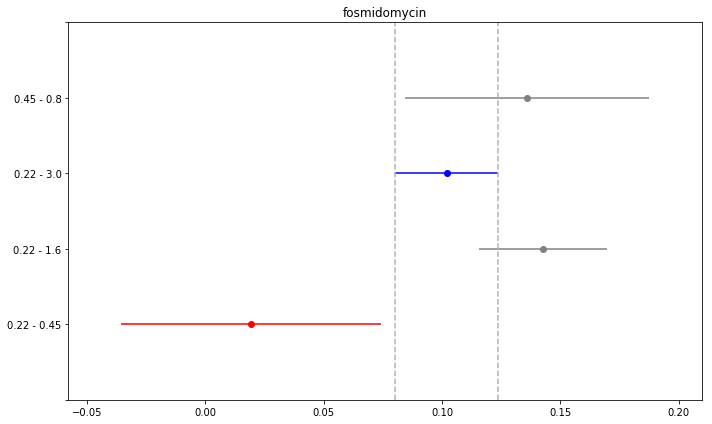

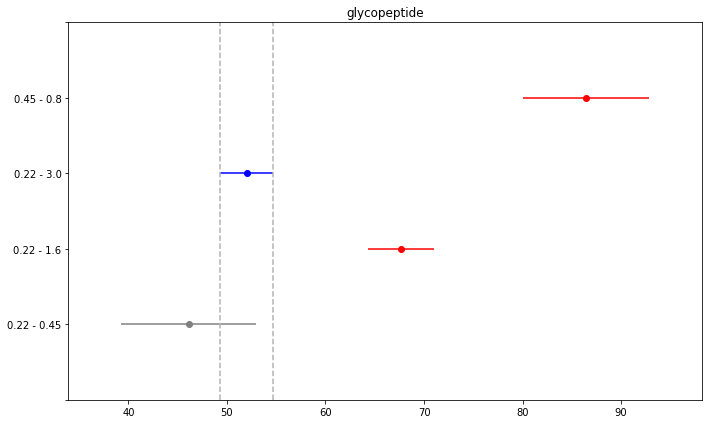

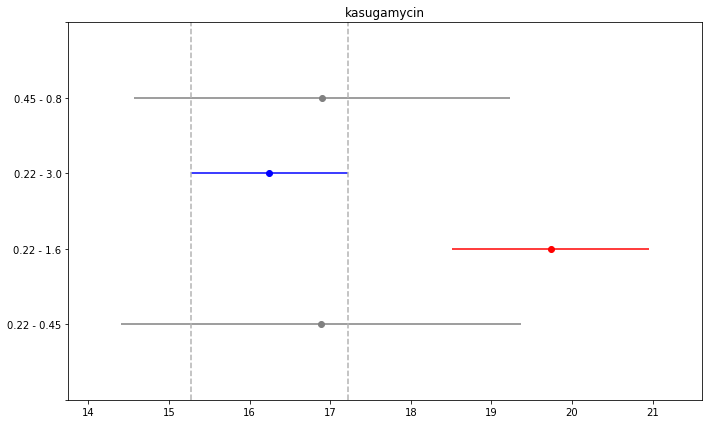

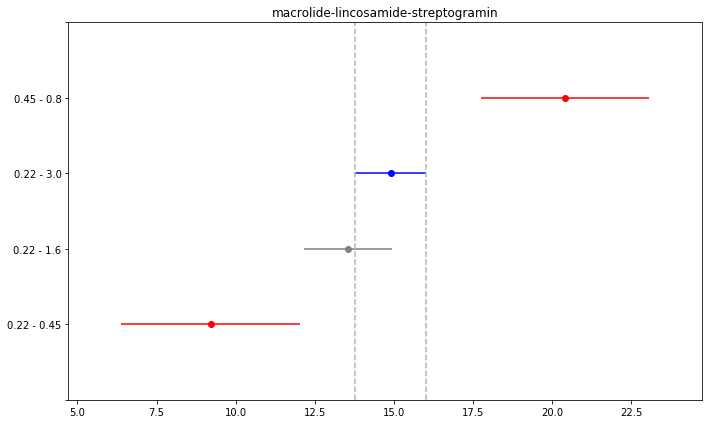

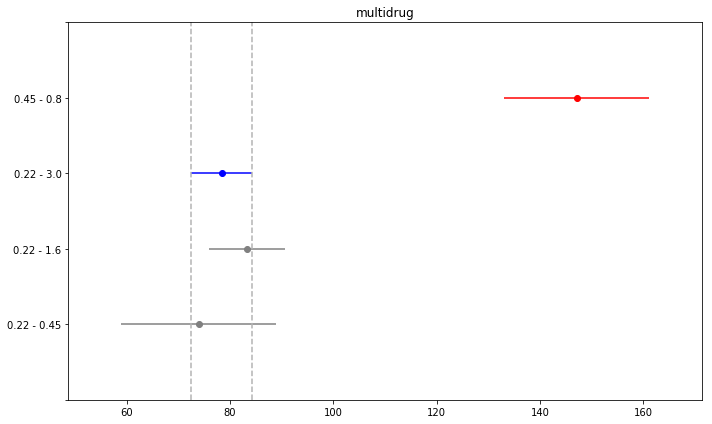

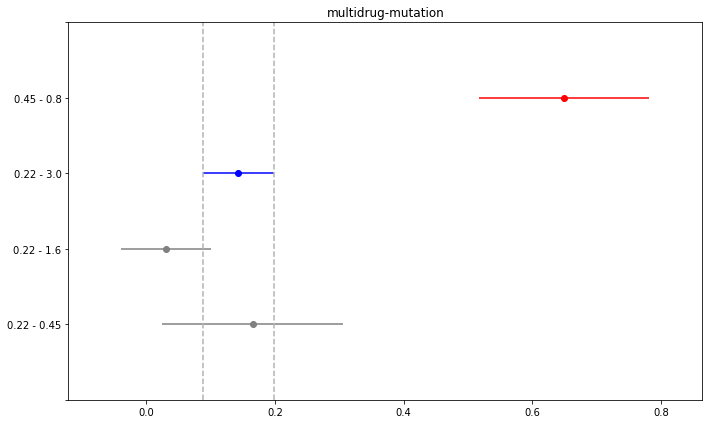

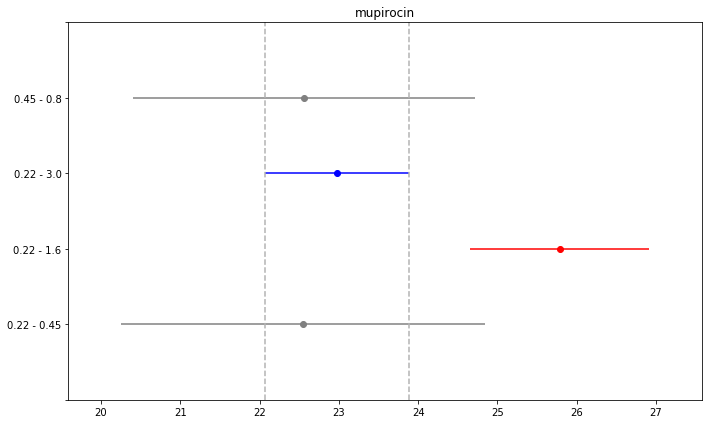

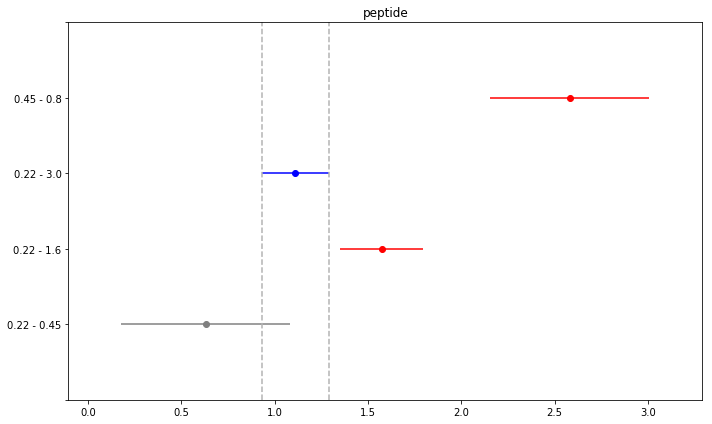

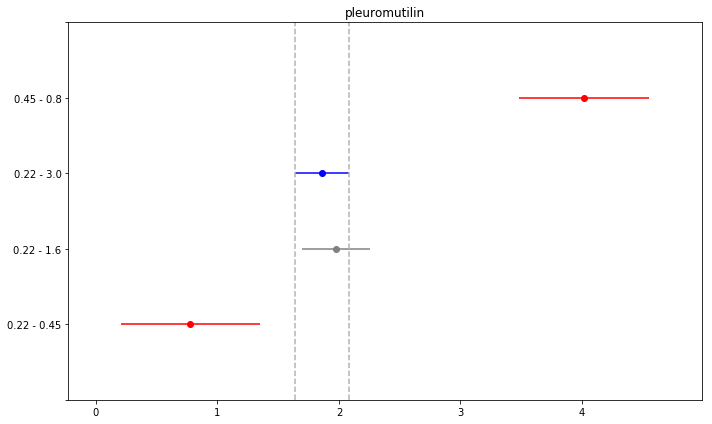

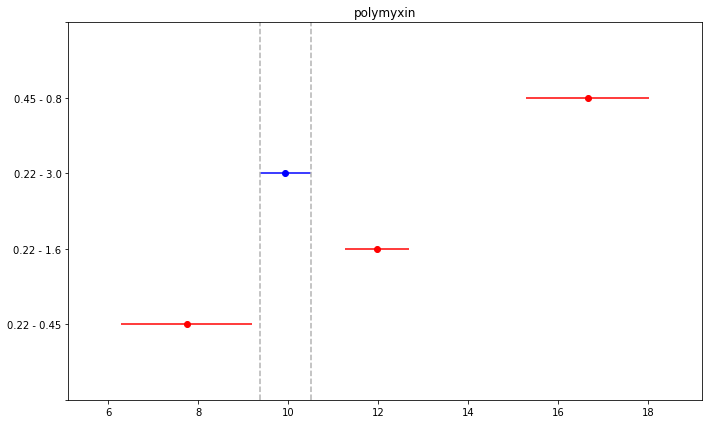

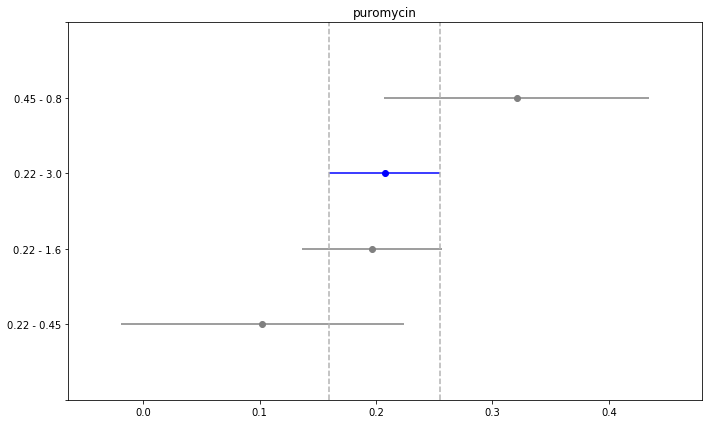

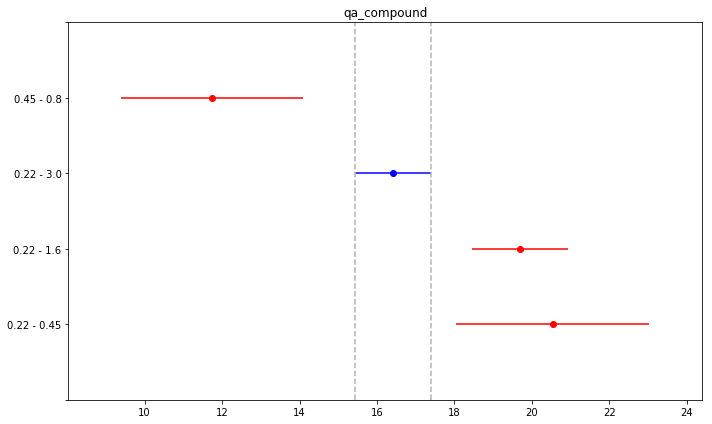

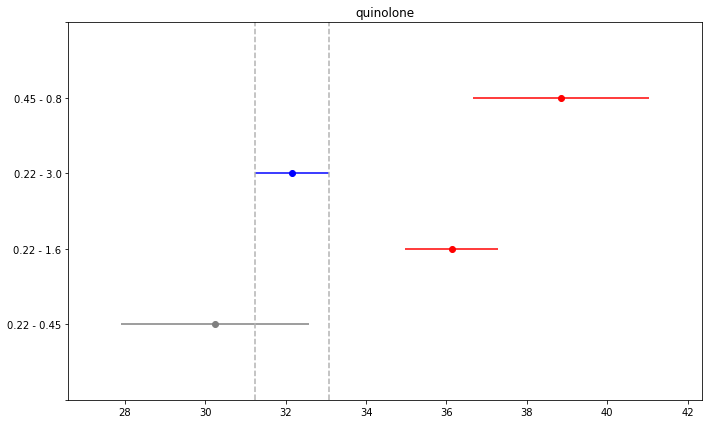

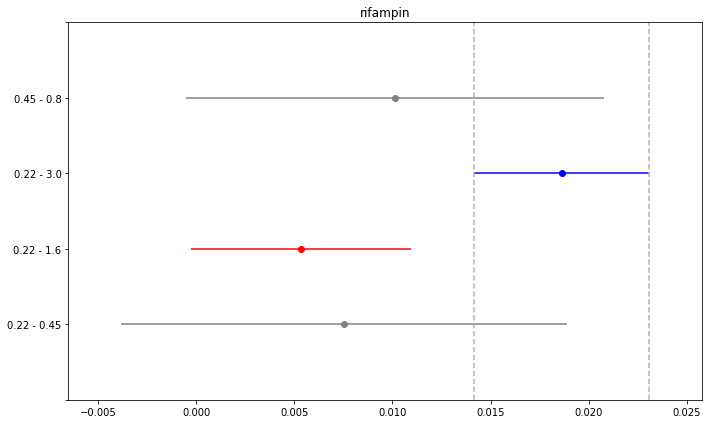

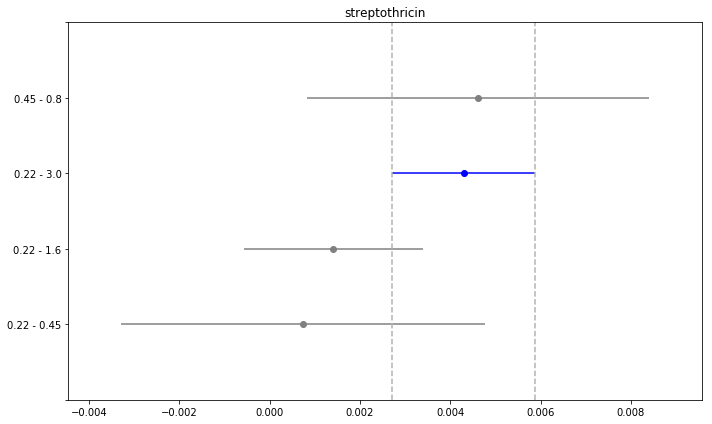

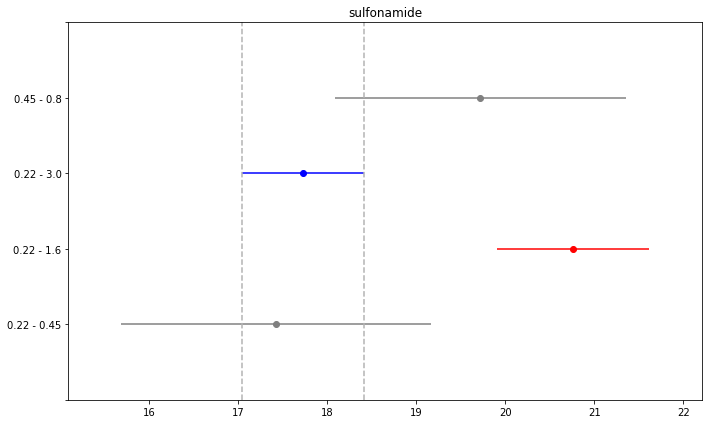

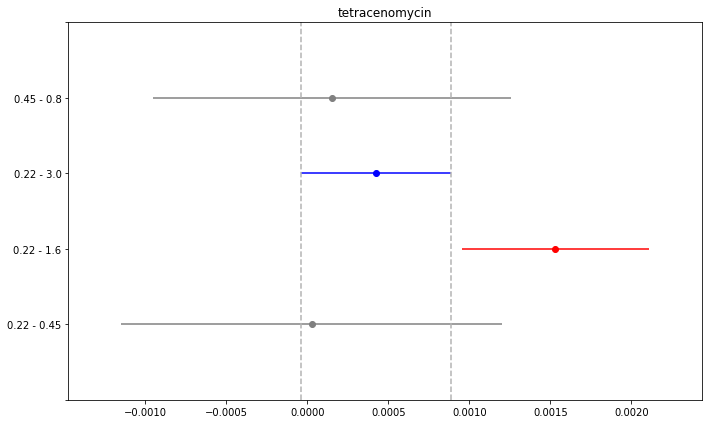

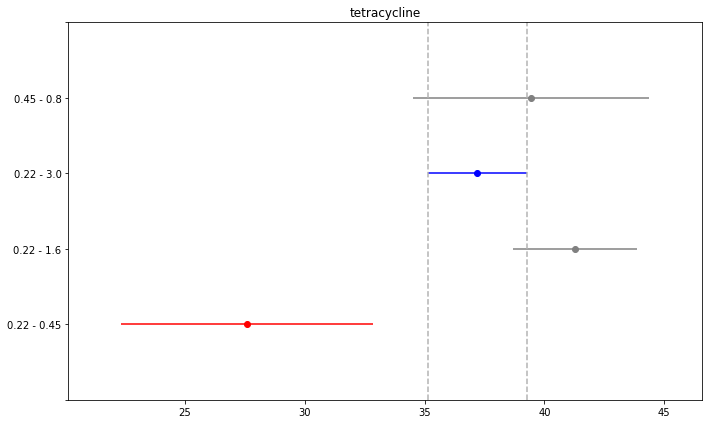

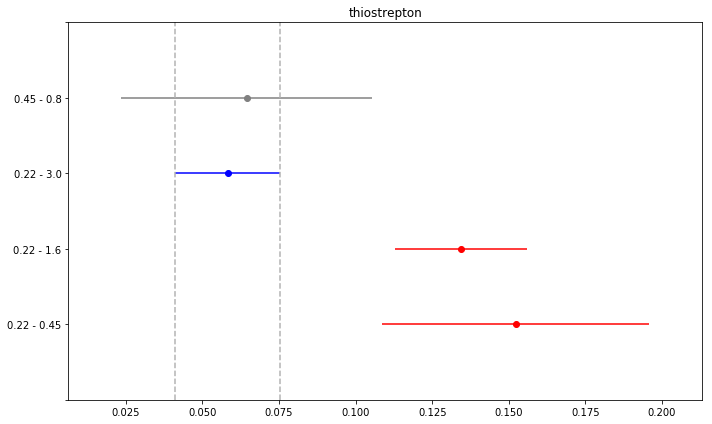

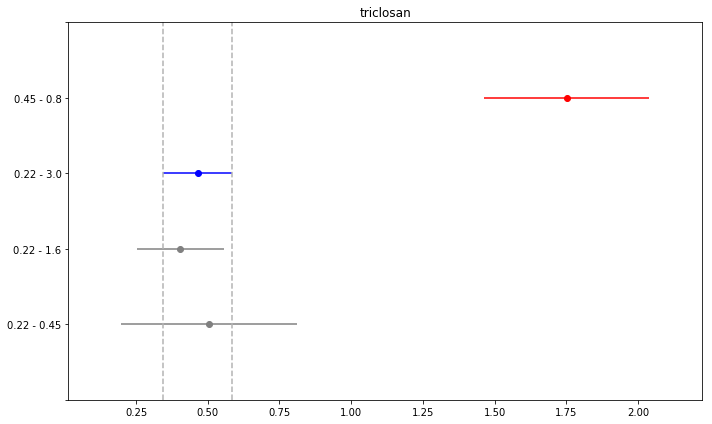

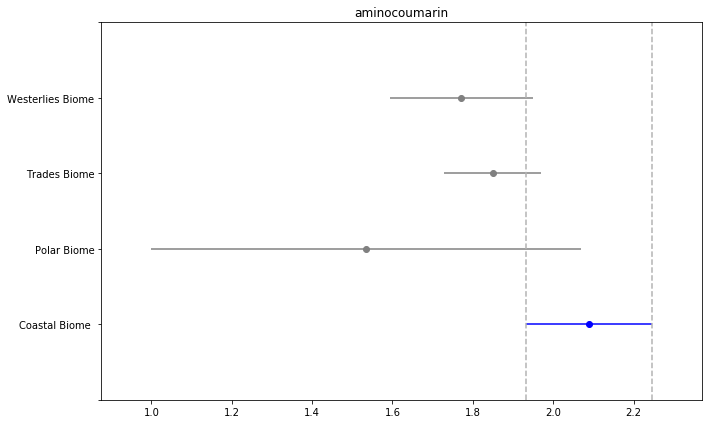

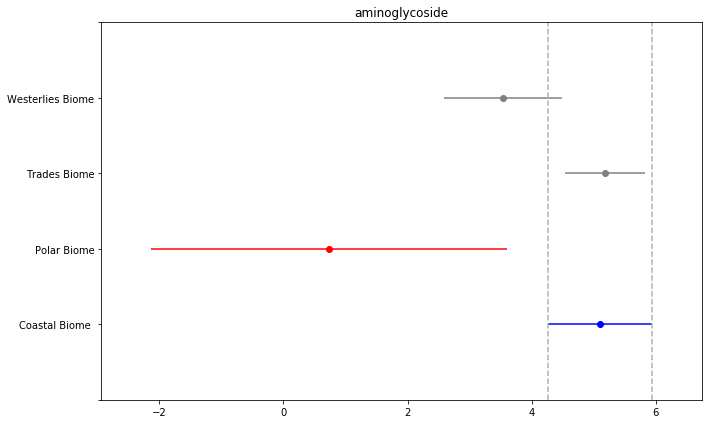

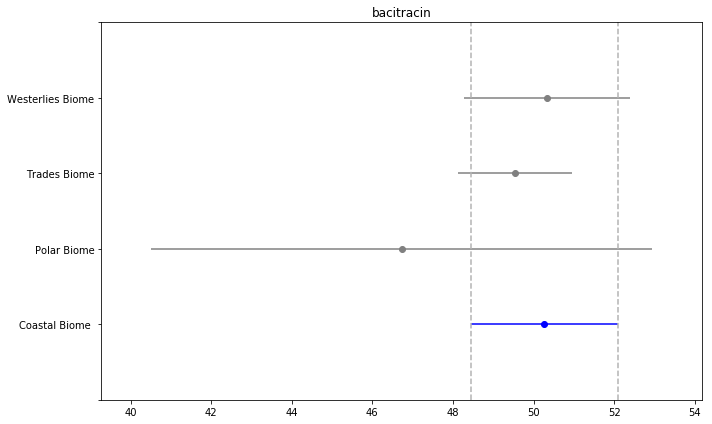

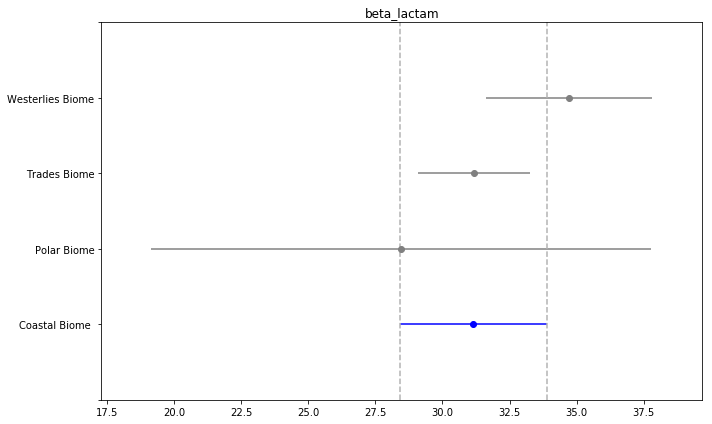

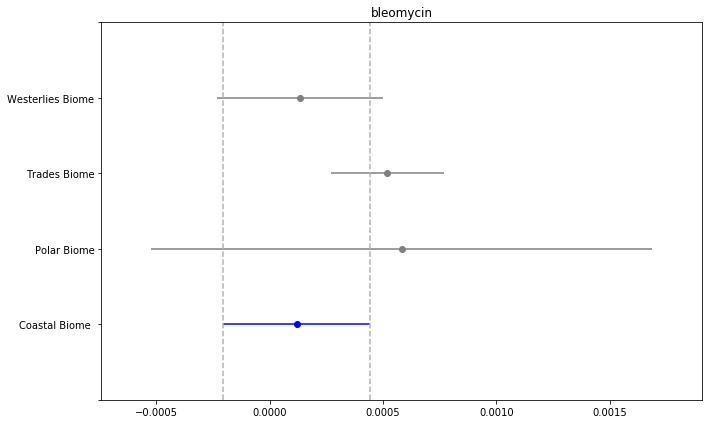

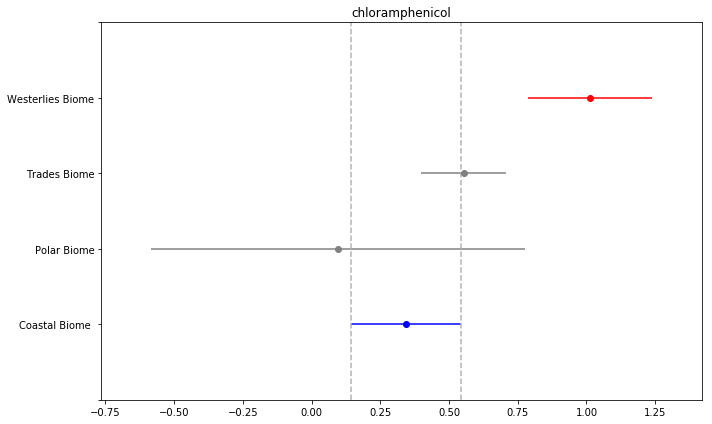

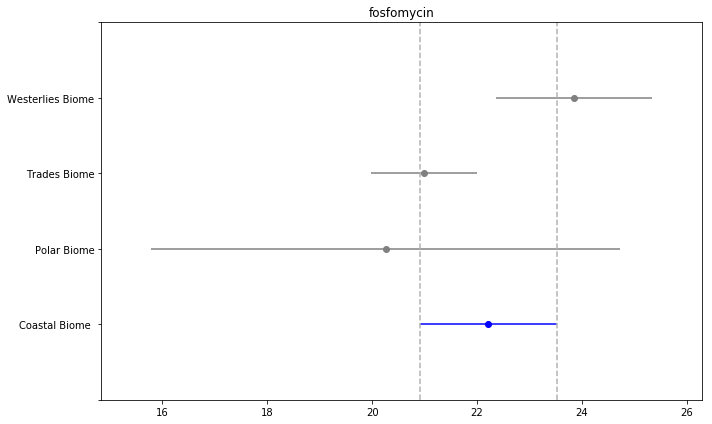

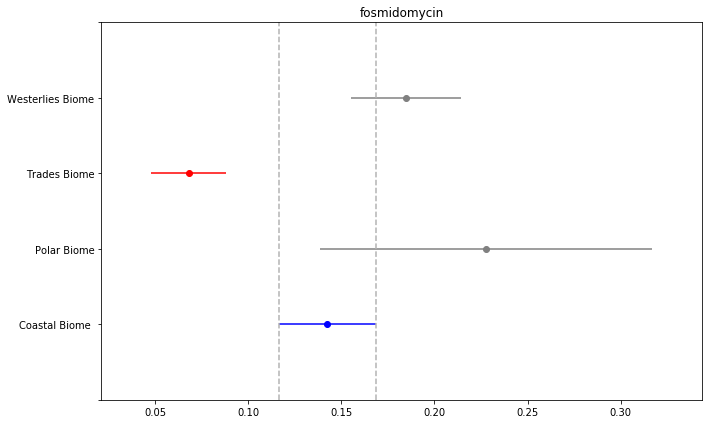

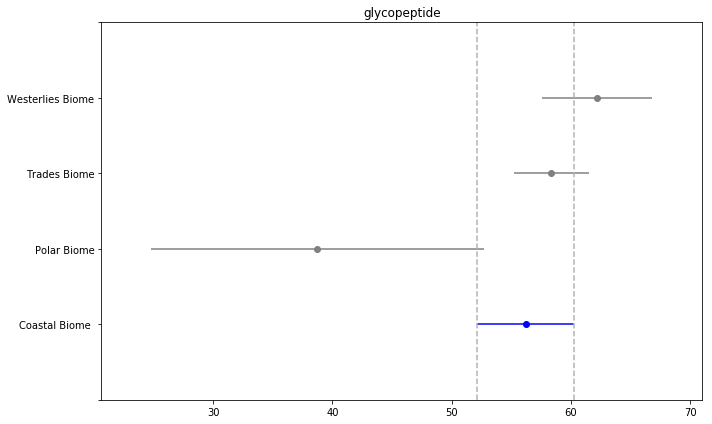

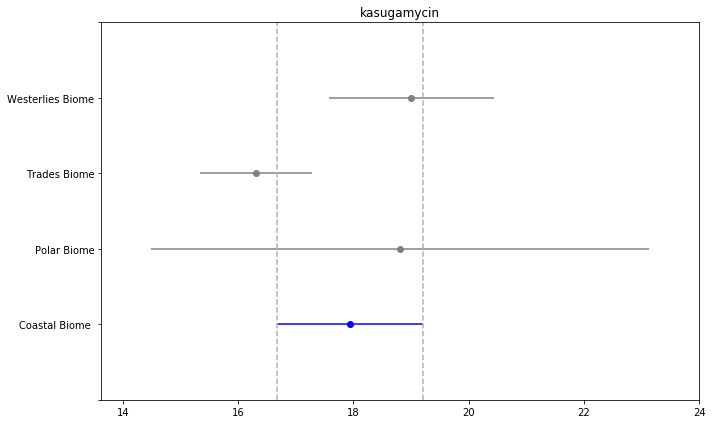

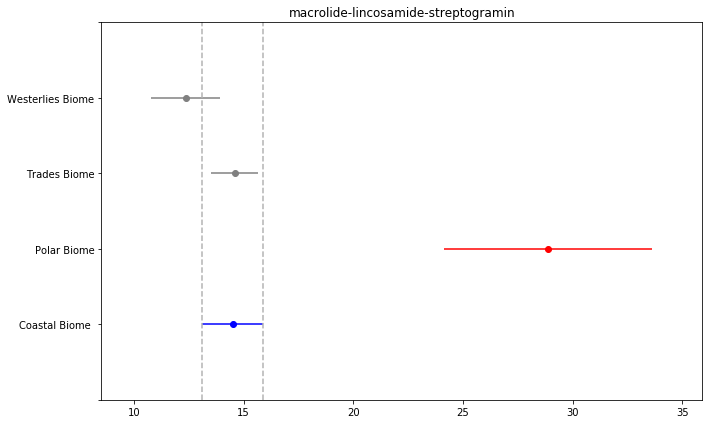

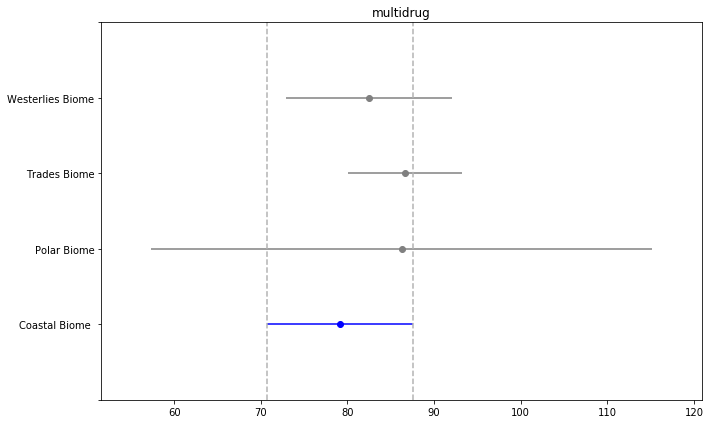

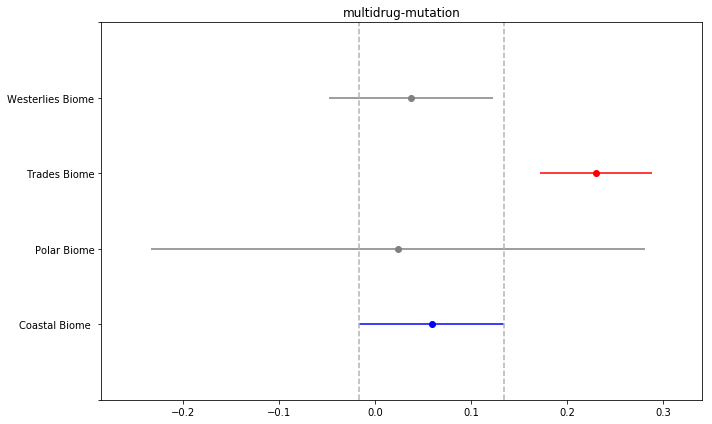

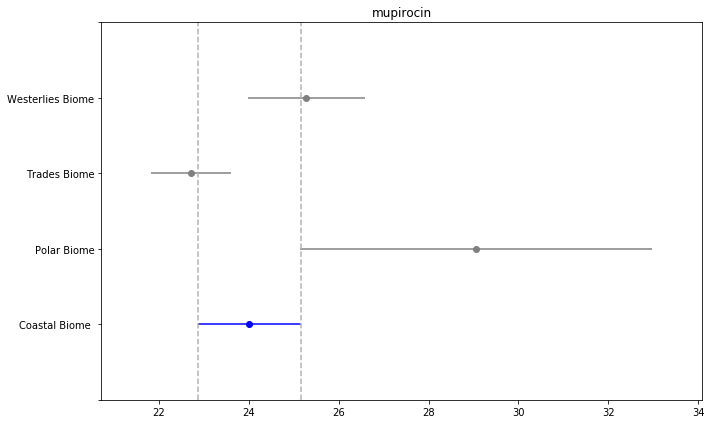

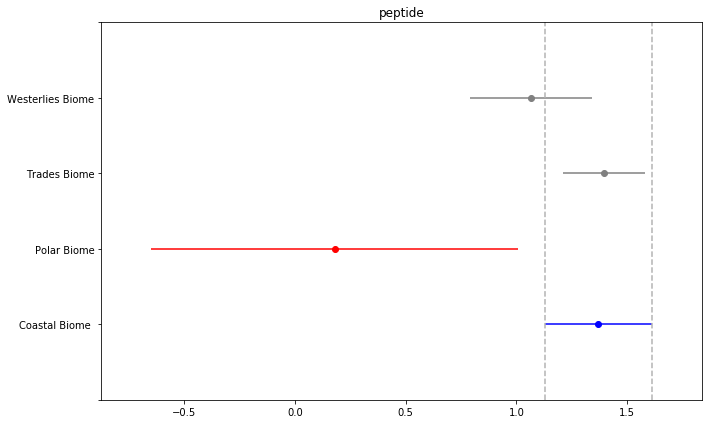

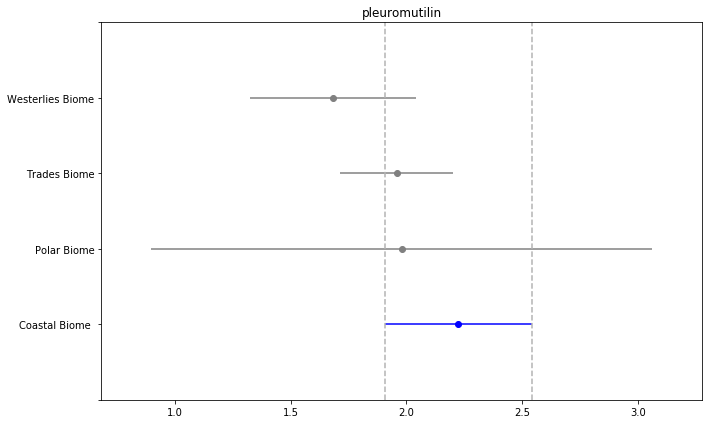

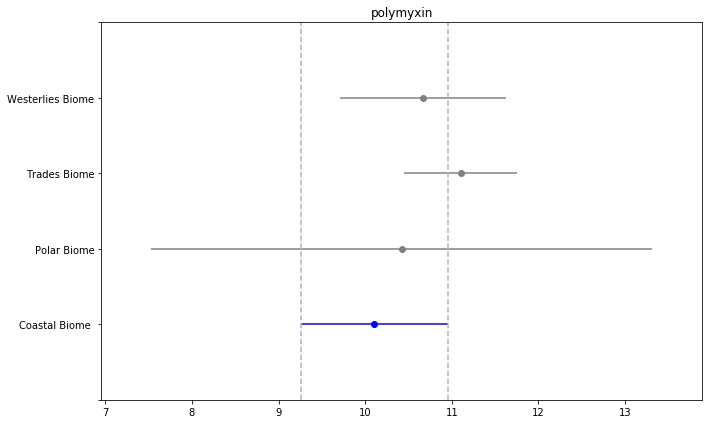

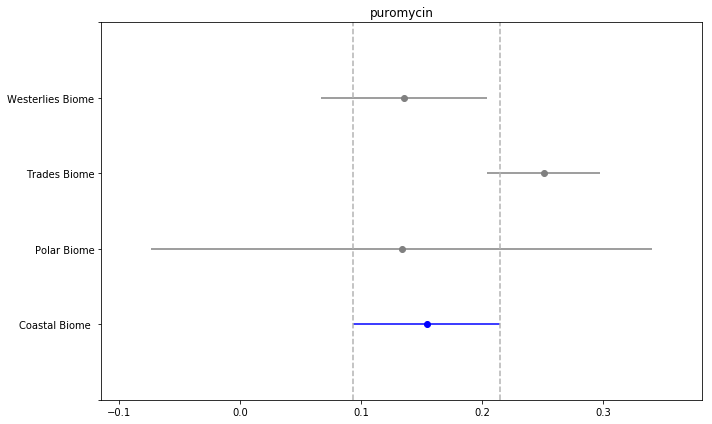

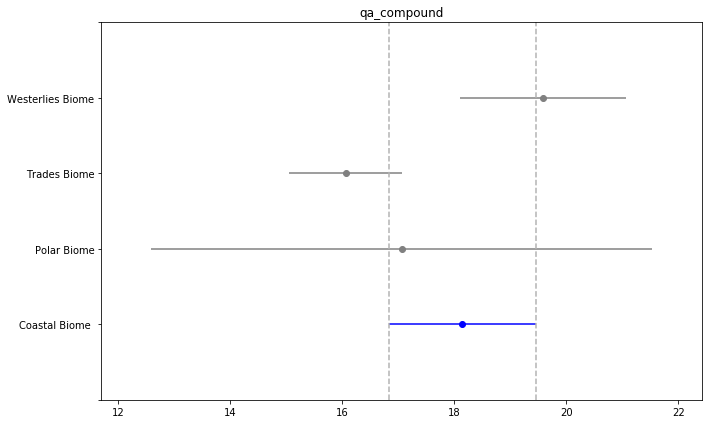

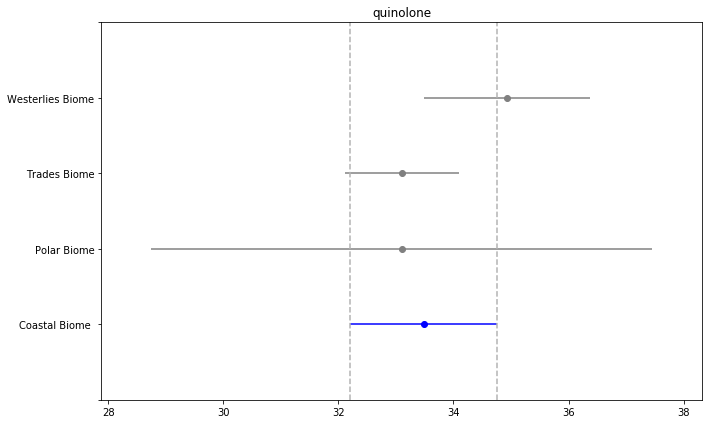

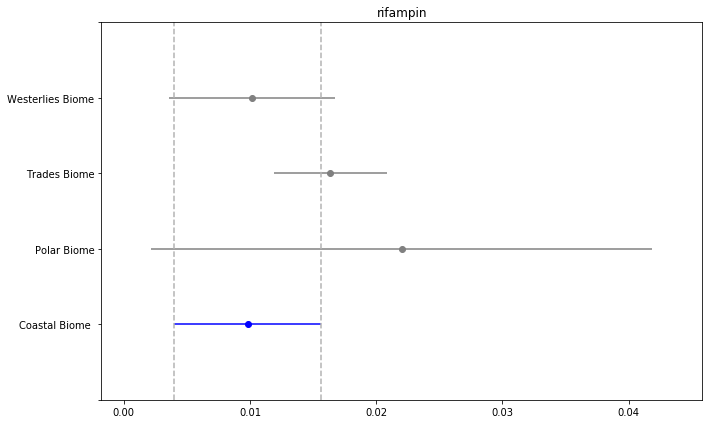

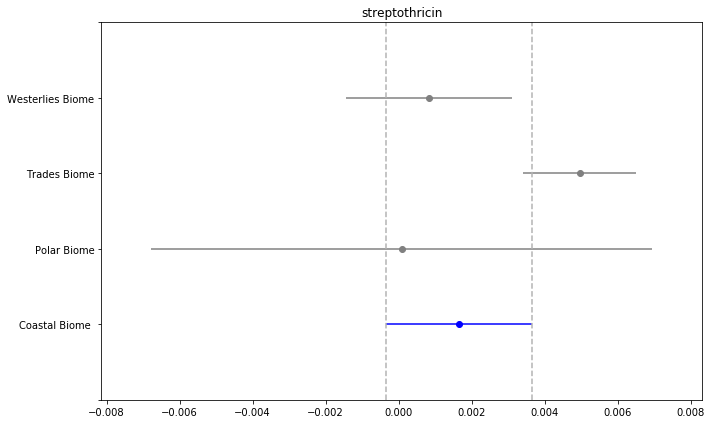

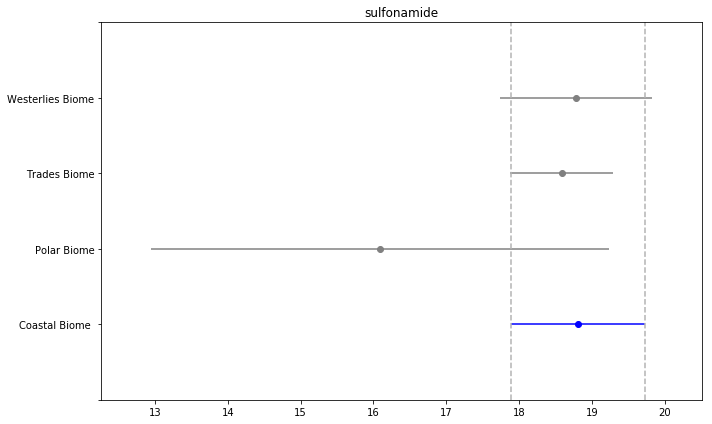

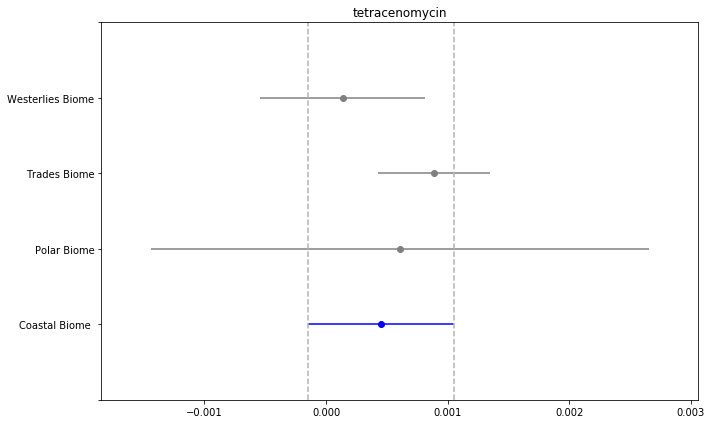

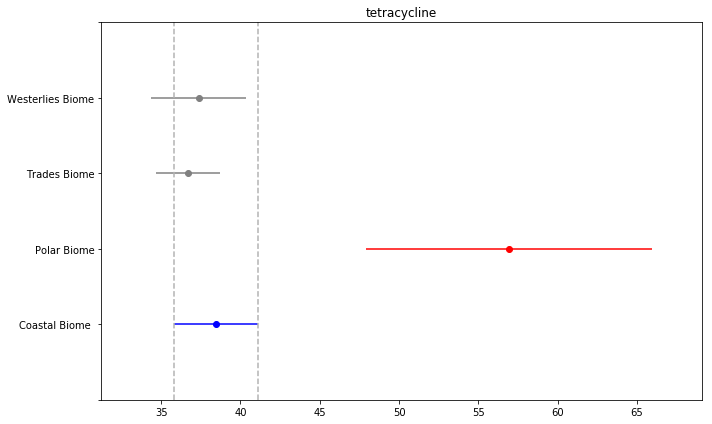

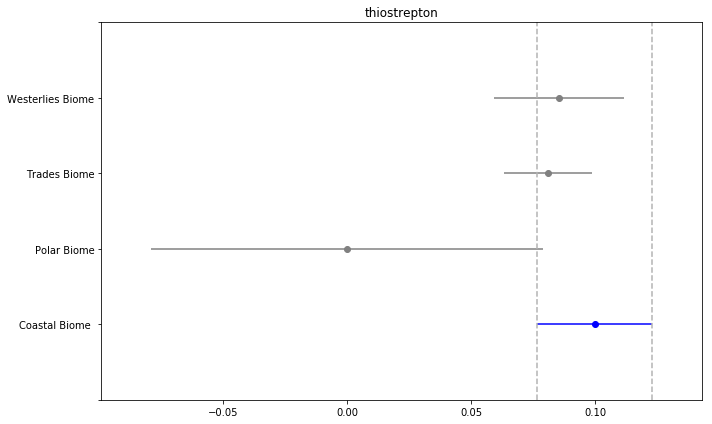

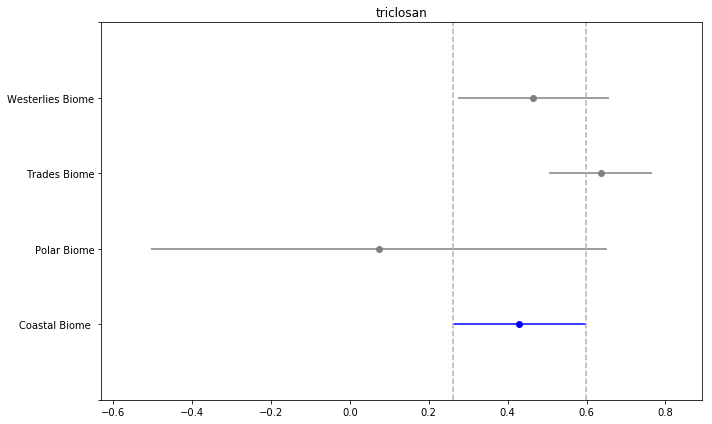

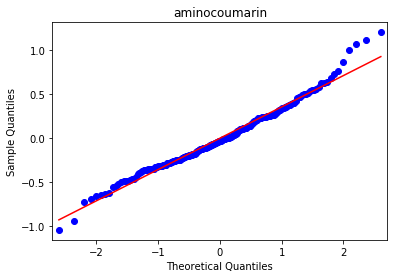

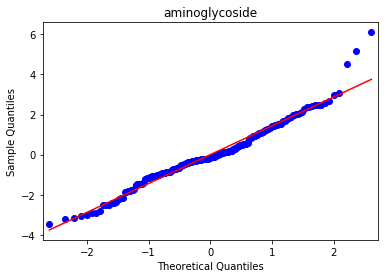

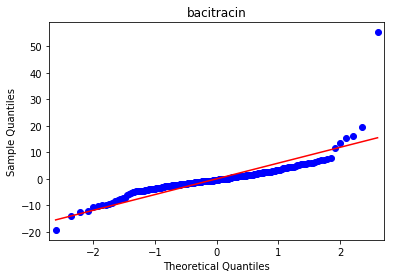

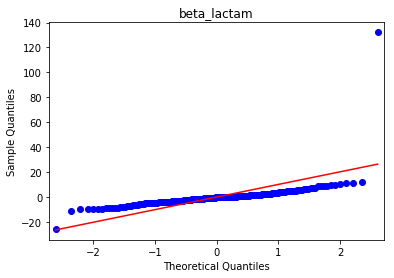

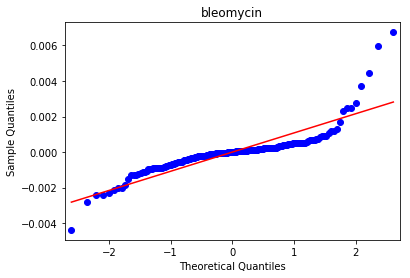

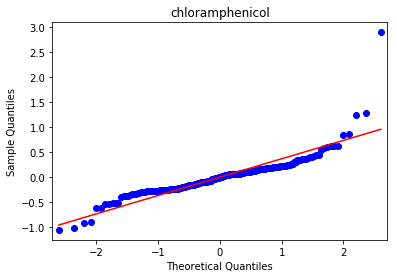

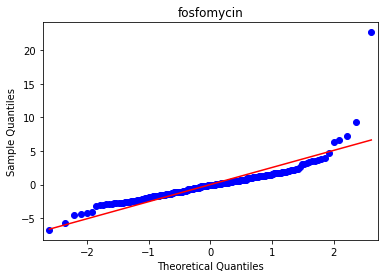

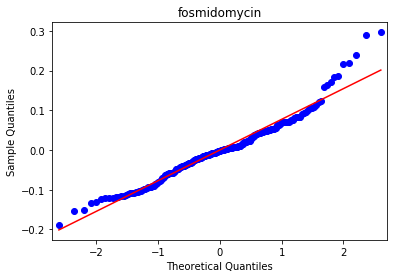

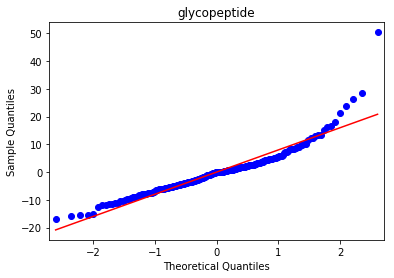

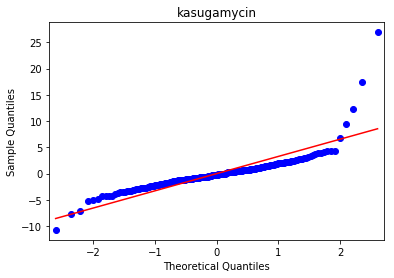

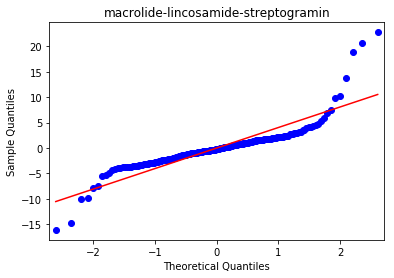

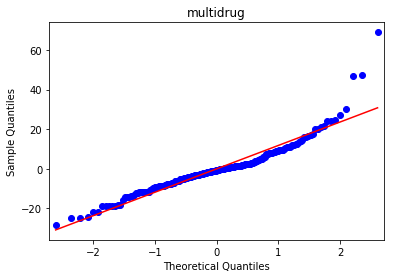

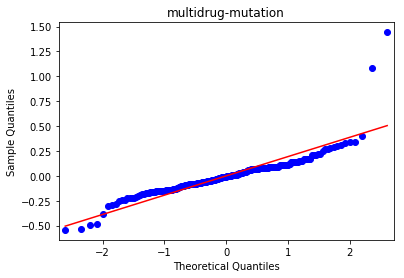

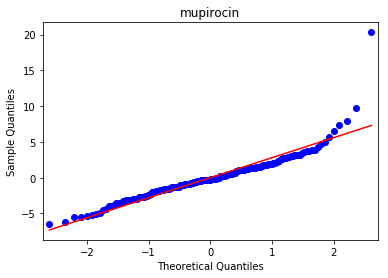

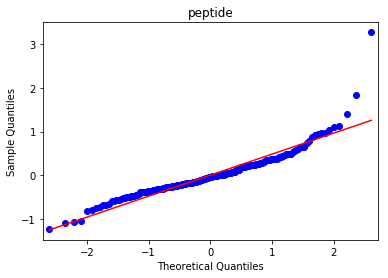

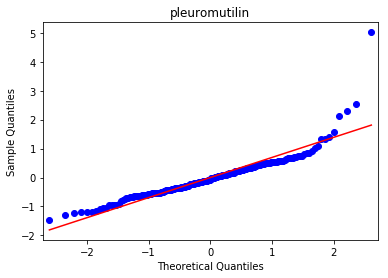

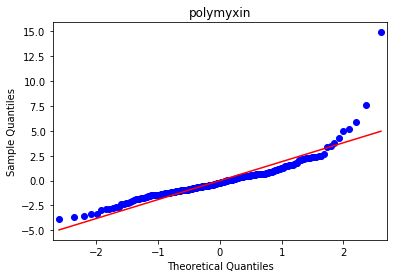

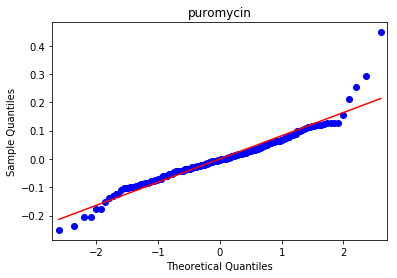

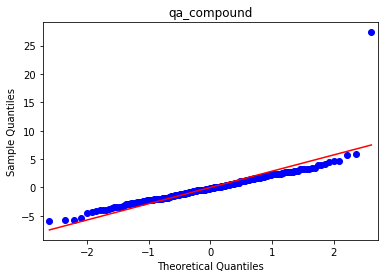

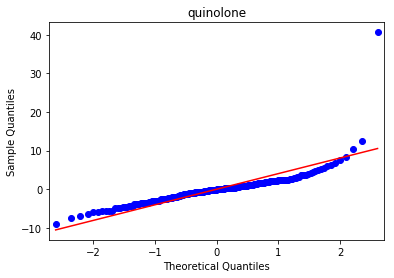

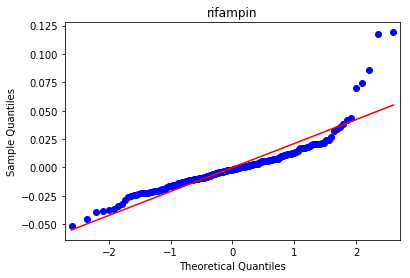

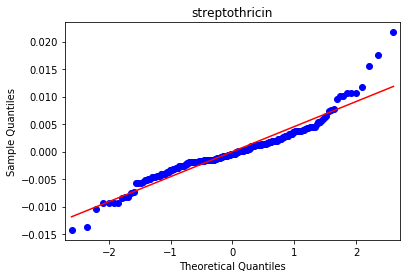

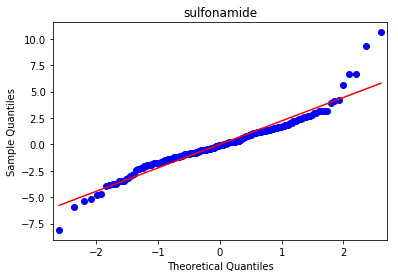

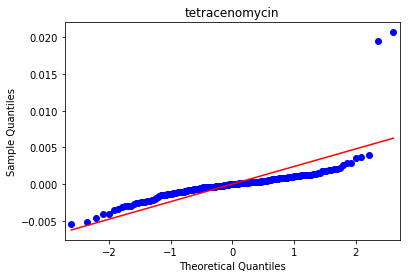

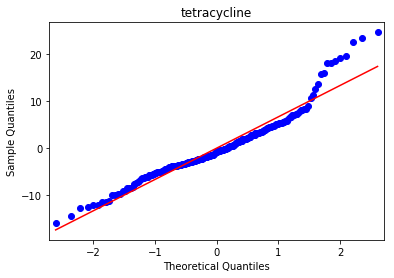

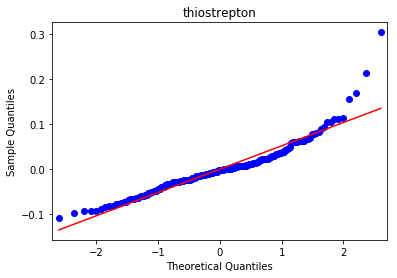

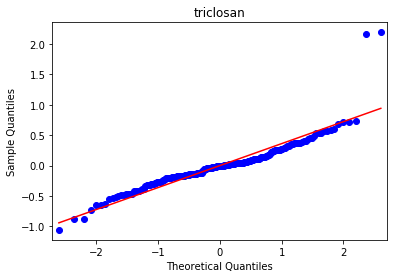

In [158]:
plt.show()

[0.73623661 0.12961173]


/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



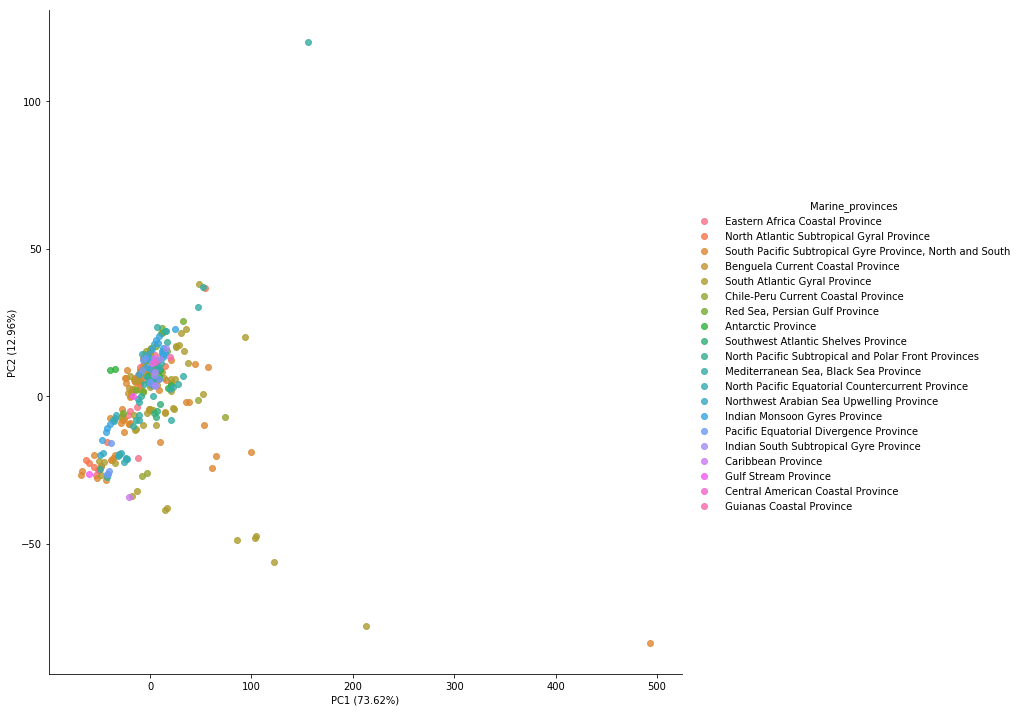

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



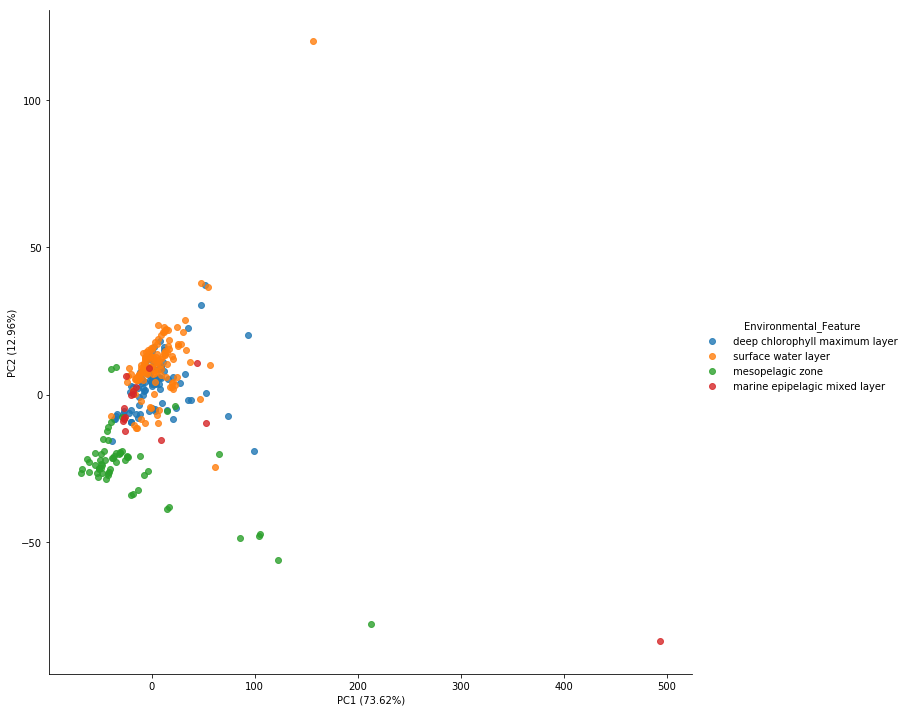

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



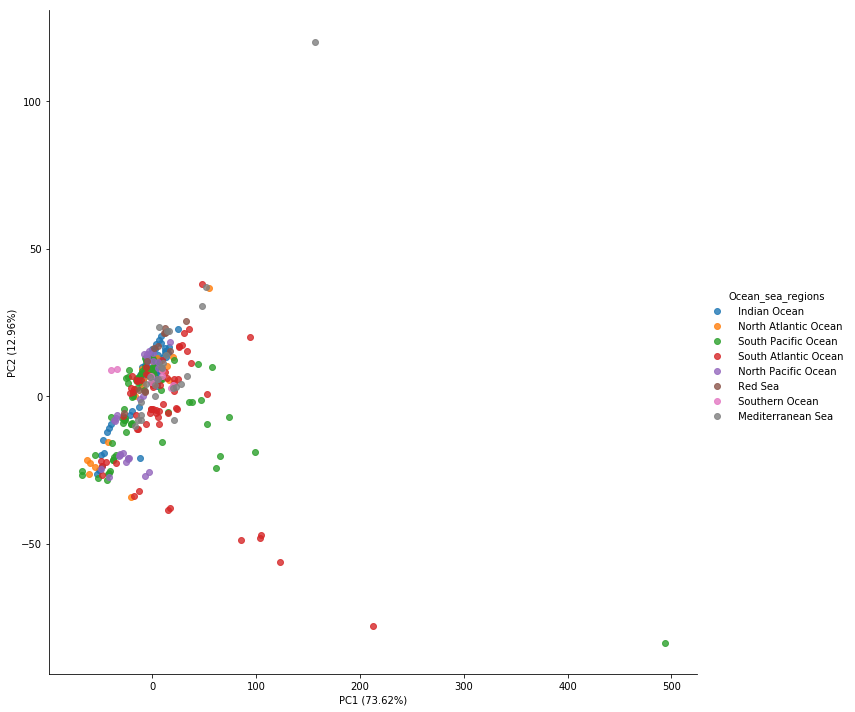

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



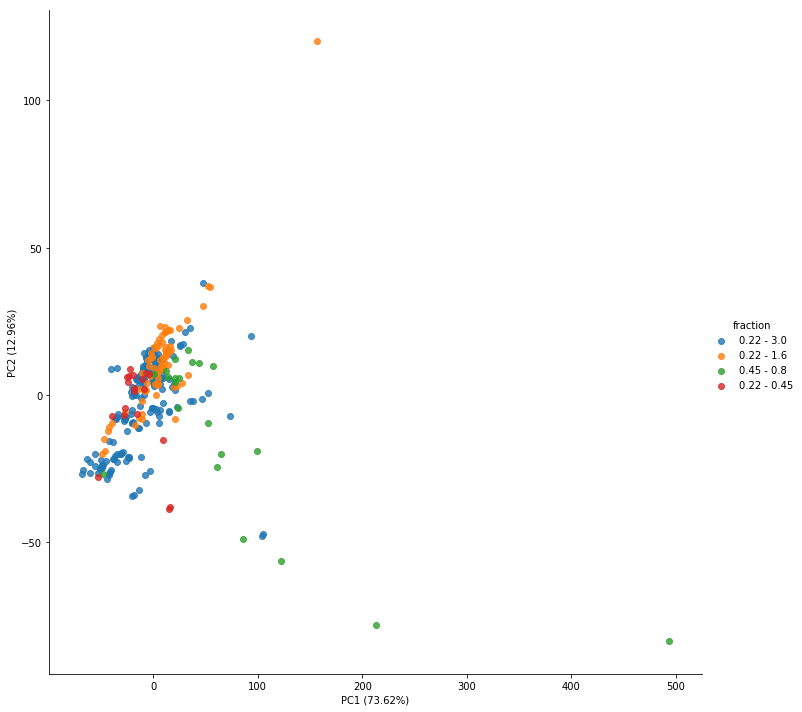

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



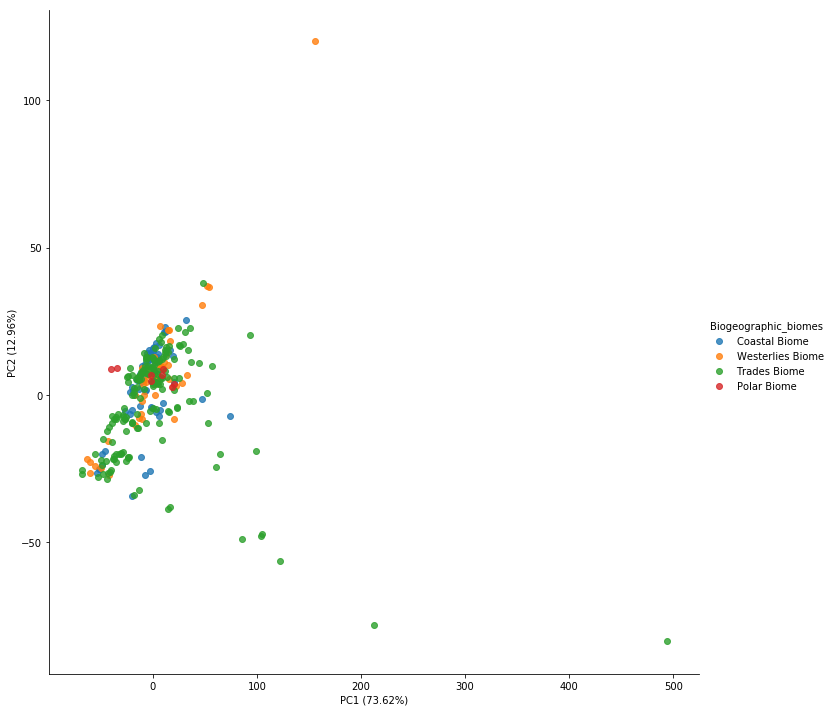

[0.3549096  0.20240043]


/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



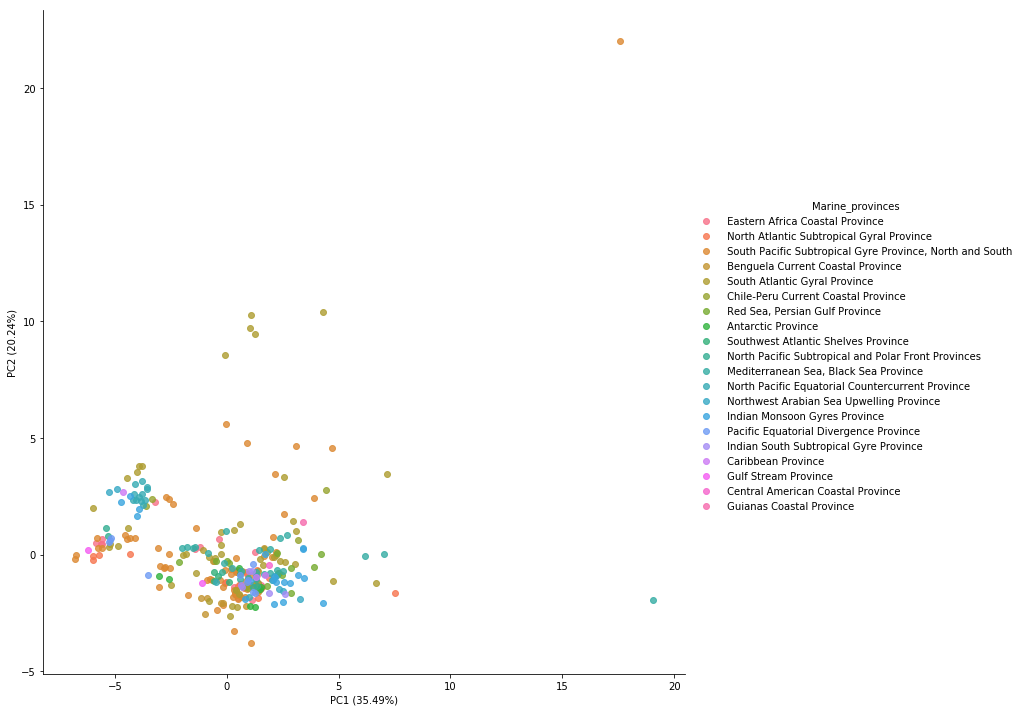

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



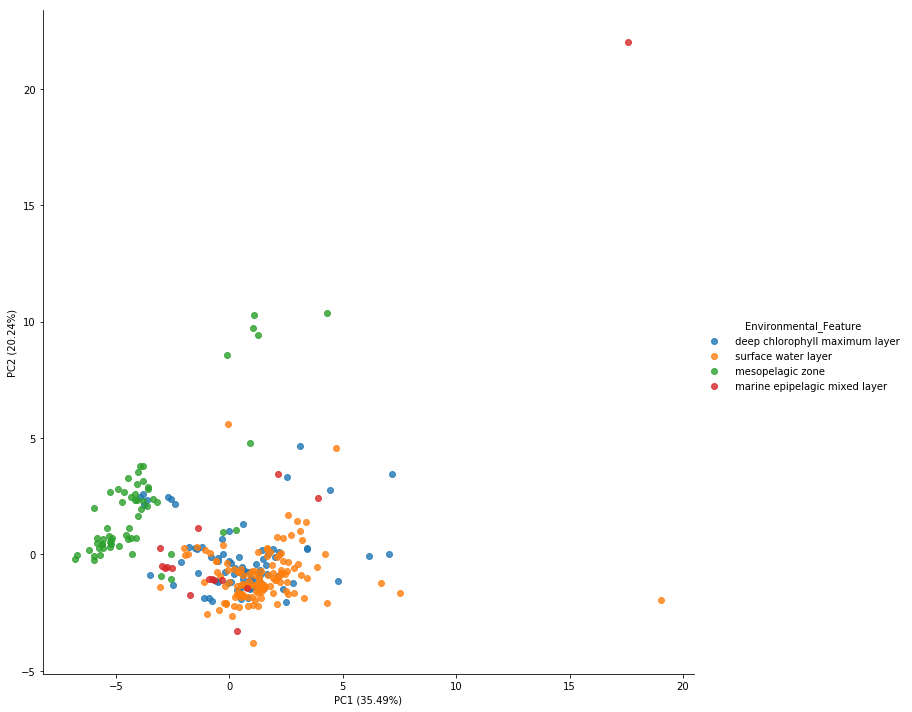

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



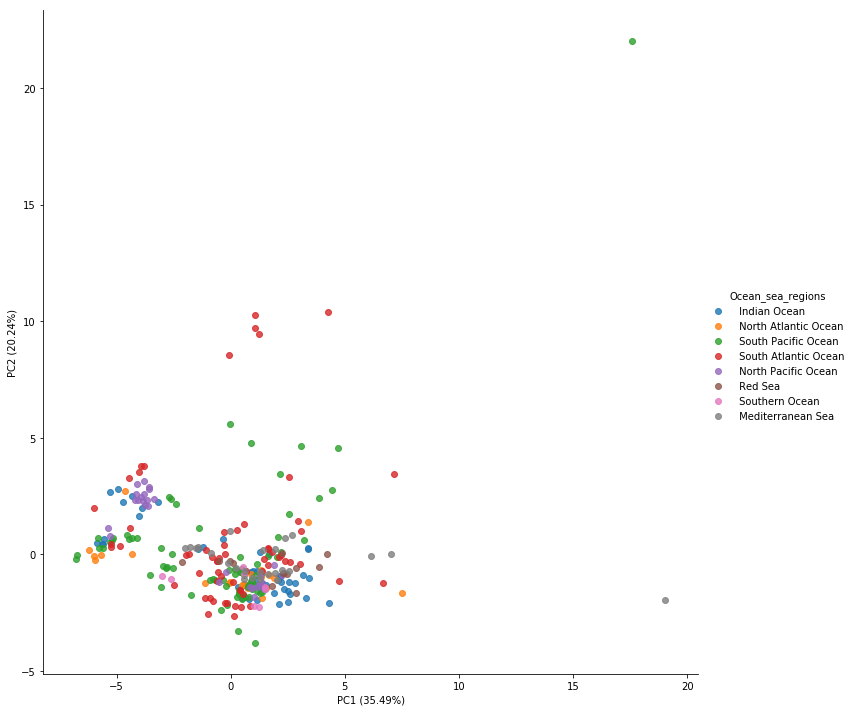

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



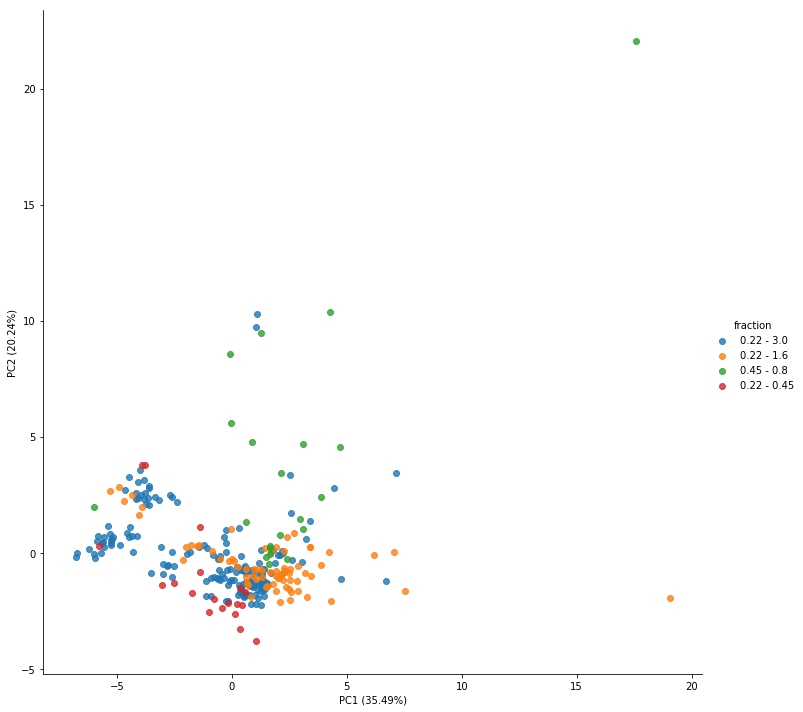

/beegfs/group_bit/home/RCuadrat/.jupyterhub/0.9.4/lib/python2.7/site-packages/seaborn/regression.py:546: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



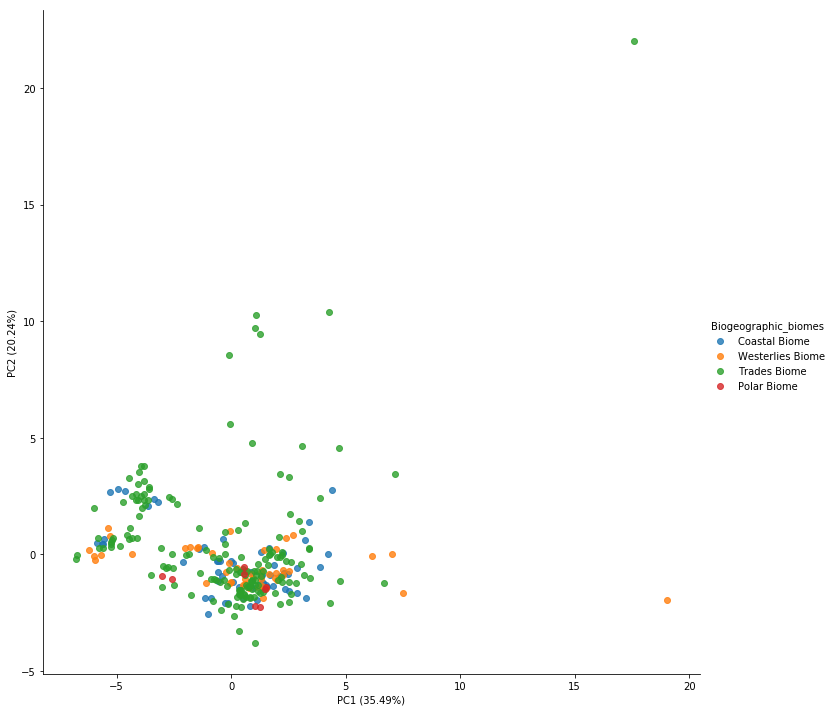

In [159]:
pcadf=classes_RPKG_env_novirus.set_index(['run_id', u'Marine_provinces',
       u'Environmental_Feature', u'Ocean_sea_regions', u'fraction',
       u'Biogeographic_biomes'])

pca = PCA(n_components=2)

##


pcadf_scaled = preprocessing.scale(pcadf)
#projected=pca.fit_transform(pcadf_scaled)
projected=pca.fit_transform(pcadf)

###
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)


aaa=pd.merge(pcadf.reset_index(),pd.DataFrame(projected),left_index=True,right_index=True)

aaa=aaa.rename(columns = {0:"0",1:"1"})

pdf = matplotlib.backends.backend_pdf.PdfPages(out+"PCA_not_scaled.pdf")
for e in env:
    hue=e
    sns.lmplot("0","1",data=aaa,hue=hue,size=10,fit_reg=False)
    plt.xlabel('PC1 ('+ str("{0:.2f}".format(pca.explained_variance_ratio_[0]*100))+ "%)" )
    plt.ylabel('PC2 ('+ str("{0:.2f}".format(pca.explained_variance_ratio_[1]*100))+ "%)" )
    pdf.savefig( fig )
    plt.show()
    plt.close()
pdf.close()

pca = PCA(n_components=2)

##


pcadf_scaled = preprocessing.scale(pcadf)
projected=pca.fit_transform(pcadf_scaled)

###
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)


aaa=pd.merge(pcadf.reset_index(),pd.DataFrame(projected),left_index=True,right_index=True)

aaa=aaa.rename(columns = {0:"0",1:"1"})

pdf = matplotlib.backends.backend_pdf.PdfPages(out+"PCA_scaled.pdf")
for e in env:
    hue=e
    sns.lmplot("0","1",data=aaa,hue=hue,size=10,fit_reg=False)
    plt.xlabel('PC1 ('+ str("{0:.2f}".format(pca.explained_variance_ratio_[0]*100))+ "%)" )
    plt.ylabel('PC2 ('+ str("{0:.2f}".format(pca.explained_variance_ratio_[1]*100))+ "%)" )
    pdf.savefig( fig )
    plt.show()
    plt.close()
pdf.close()

In [160]:
ARGS_RPKG=ARGS_RPKG[list(classes_RPKG_env_novirus["run_id"])]

In [161]:
meta=meta[meta["run_id"].isin(ARGS_RPKG[list(classes_RPKG_env_novirus["run_id"])])]

In [162]:
conditions=meta[["run_id","Marine_provinces","Environmental_Feature","Ocean_sea_regions","fraction","Biogeographic_biomes"]]
conditions.set_index("run_id",inplace=True)
con=list(conditions.columns)
ARGS_RPKG=ARGS_RPKG[(ARGS_RPKG.T != 0).any()]
genes=list(set(ARGS_RPKG.reset_index()["#ARG"]))

In [163]:
all_fc=pd.DataFrame()
for g in con:
    groups=list(set(conditions[g].values))
    a=list(itertools.combinations(groups,2))
    for i in a:
        g1=list(conditions[conditions[g]==i[0]].index)
        g2=list(conditions[conditions[g]==i[1]].index)
        fc=np.log2((ARGS_RPKG[g1].mean(axis=1)+0.000001)/(ARGS_RPKG[g2].mean(axis=1)+0.000001))
        tmp=pd.DataFrame(fc)
        tmp.columns=["log2 FC"]
        tmp["g1"]=str(i[0])
        tmp["g2"]=str(i[1])
        tmp["param"]=str(g)
        tmp["mean_g1"]=ARGS_RPKG[g1].mean(axis=1)
        tmp["mean_g2"]=ARGS_RPKG[g2].mean(axis=1)
        tmp["std_g1"]=ARGS_RPKG[g1].std(axis=1)
        tmp["std_g2"]=ARGS_RPKG[g2].std(axis=1)
        
        F_a = []
        p_a = []
        for ge in genes:
            #one way ANOVA test
            F, p = ss.f_oneway(ARGS_RPKG[g1].T[ge],ARGS_RPKG[g2].T[ge])
            F_a.append(F)
            p_a.append(p)
        tmp["ANOVA F"] = F_a
        tmp["ANOVA pvalue"] = p_a
        p_adjusted= multipletests(p_a, method='bonferroni')
        tmp["pvalue adjusted"] = p_adjusted[1]
        all_fc=pd.concat([all_fc,tmp])

    
all_fc_sig=all_fc[all_fc["pvalue adjusted"]<0.05]
all_fc_sig["comp"]=all_fc_sig["g1"]+" / "+all_fc_sig["g2"]  
#all_fc_sig.drop(["g1","g2"],axis=1)

for g in con:
    writer = pd.ExcelWriter(out+'log2FC_anova_results_' +g +  '.xlsx', engine='xlsxwriter')
    t=all_fc_sig[all_fc_sig["param"]==g]
    for i in list(set(all_fc_sig["comp"])):
        t_=t[t["comp"]==i]
        t_.to_excel(writer, sheet_name=i[0:30].replace(" / ","_"))
    writer.save()

/beegfs/common/software/2017/modules/software/jupyterhub/0.7.2/lib/python2.7/site-packages/ipykernel/__main__.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [164]:
ARGS_RPKG_=ARGS_RPKG.T.reset_index().rename(columns={"index":"run_id"})
ARGS_RPKG_env=pd.merge(ARGS_RPKG_,meta[["run_id","Marine_provinces","Environmental_Feature","Ocean_sea_regions","fraction","Biogeographic_biomes"]],on="run_id")


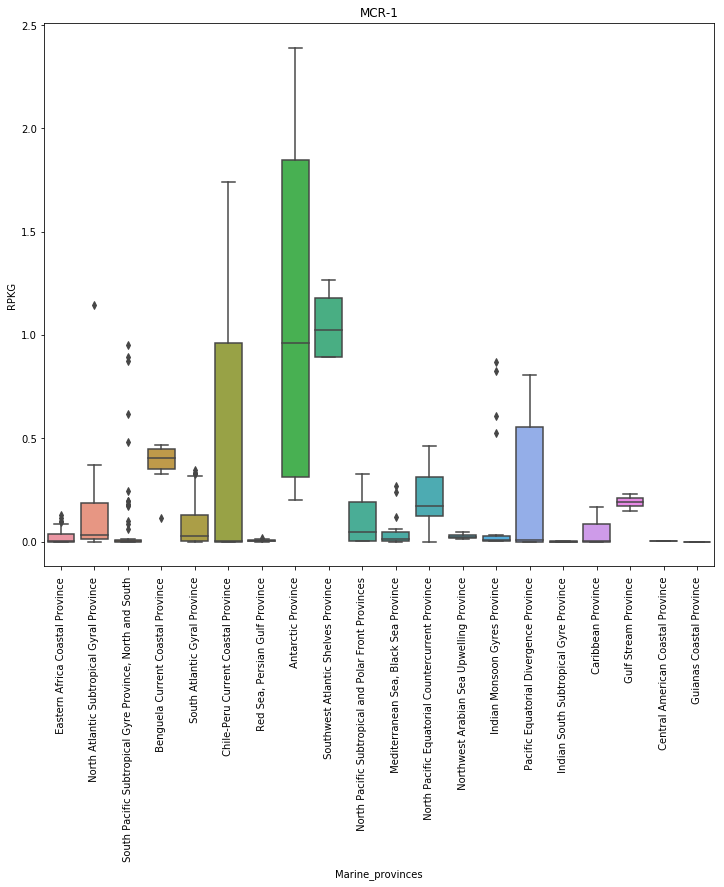

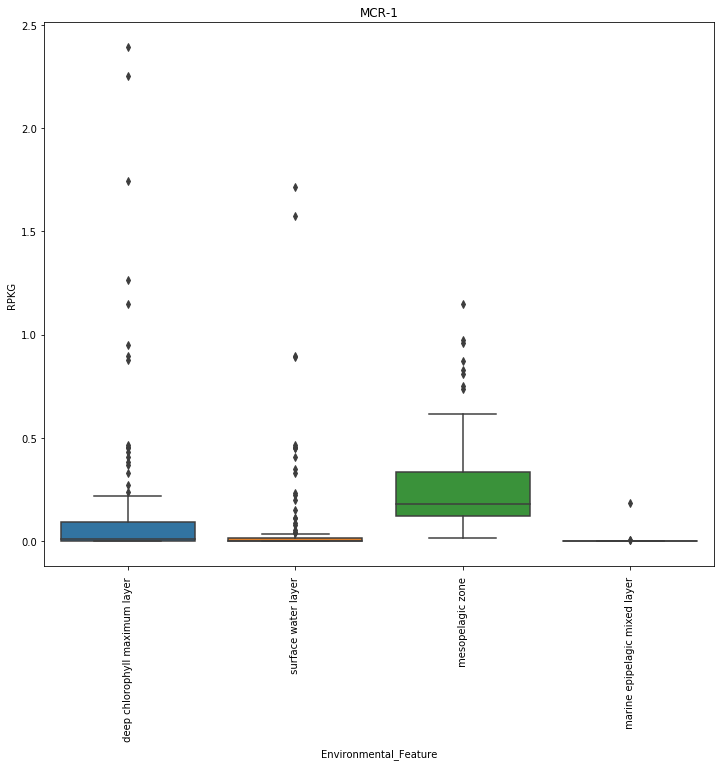

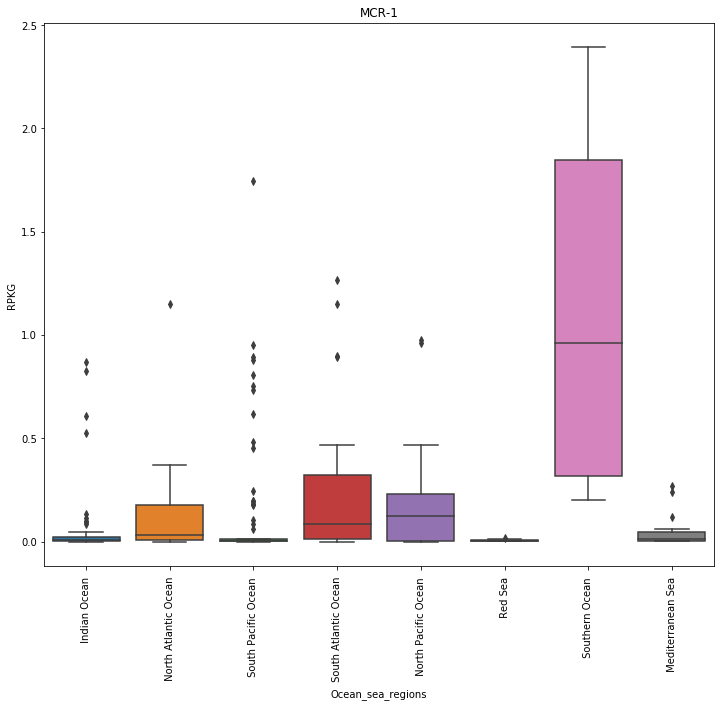

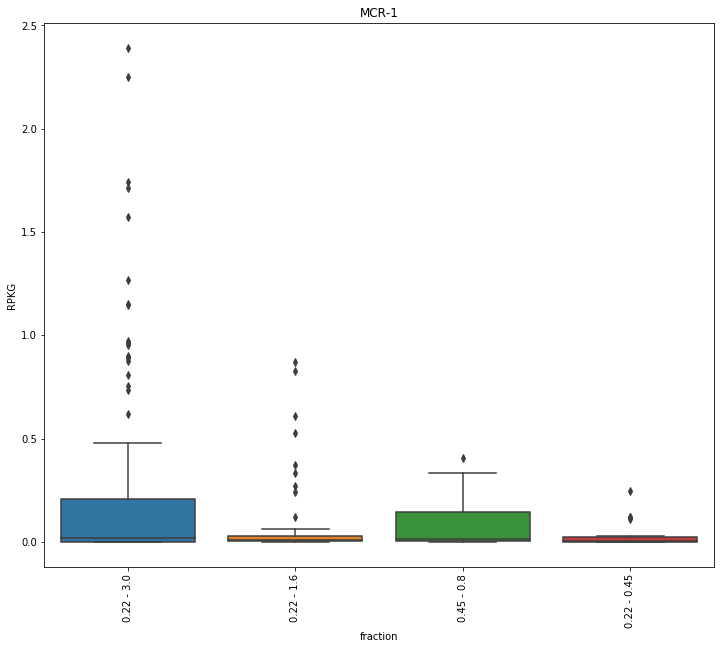

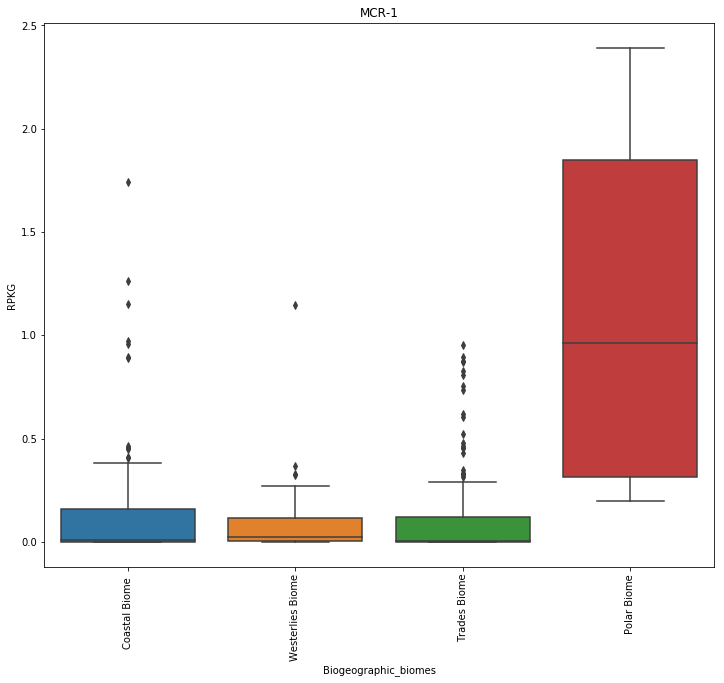

In [165]:
pdf = matplotlib.backends.backend_pdf.PdfPages(out+"boxplots_MCR1.pdf")
for e in env:
    fig=plt.figure(figsize=(12,10))
    sns.boxplot(ARGS_RPKG_env[e],ARGS_RPKG_env["MCR-1"])
    plt.xticks(rotation=90)
    plt.ylabel("RPKG")
    plt.title("MCR-1")
    pdf.savefig(fig)
    plt.show()
pdf.close()

In [166]:
set(aov["classe"])

{'aminocoumarin',
 'aminoglycoside',
 'bacitracin',
 'beta_lactam',
 'bleomycin',
 'chloramphenicol',
 'fosfomycin',
 'fosmidomycin',
 'glycopeptide',
 'kasugamycin',
 'macrolide-lincosamide-streptogramin',
 'multidrug',
 'multidrug-mutation',
 'mupirocin',
 'peptide',
 'pleuromutilin',
 'polymyxin',
 'puromycin',
 'qa_compound',
 'quinolone',
 'rifampin',
 'streptothricin',
 'sulfonamide',
 'tetracenomycin',
 'tetracycline',
 'thiostrepton',
 'triclosan',
 'trimethoprim'}

In [167]:
poly=aov[aov["classe"]=="polymyxin"]

In [168]:
poly[poly["PR(>F)"]<0.05]

sum_sq    df         F    PR(>F)     classe  \
Marine_provinces            247.720752  19.0  2.908052  0.000118  polymyxin   
Environmental_Feature        36.374454   3.0  2.704386  0.046970  polymyxin   
Ocean_sea_regions           113.564902   7.0  3.618591  0.001141  polymyxin   
fraction                     87.623607   3.0  6.514683  0.001864  polymyxin   
Biogeographic_biomes         52.700312   3.0  3.918189  0.009700  polymyxin   
NO2                          21.948432   1.0  4.895499  0.028213  polymyxin   
miTAG_SILVA_Shannon          42.440530   1.0  9.466168  0.002428  polymyxin   
FC_picoeukaryotes_cells_mL   29.562399   1.0  6.593759  0.011064  polymyxin   

                              eta_sq  omega_sq  
Marine_provinces            0.168973  0.110530  
Environmental_Feature       0.024811  0.015589  
Ocean_sea_regions           0.077464  0.055886  
fraction                    0.059769  0.050440  
Biogeographic_biomes        0.035948  0.026691  
NO2                         0.014971  0.011877  
miTAG_SILVA_Shannon         0.028949  0.025812  
FC_picoeukaryotes_cells_mL  0.020165  0.017055

In [169]:
from  scipy.stats import spearmanr 

In [170]:
rho,pvalue=spearmanr(ARGS_RPKG.T)
pv_df=pd.DataFrame(pvalue)
rho_df=pd.DataFrame(rho)
corrr=ARGS_RPKG.T.corr(method='spearman')
corrr.to_csv(out+"ARGS_RPKG_spearman_corr.tsv",sep="\t")

In [173]:
pv_df.columns=[list(ARGS_RPKG.T.columns)]

In [174]:
pv_df.T.reset_index().to_csv(out+"ARGS_RPKG_spearman_pvalue.tsv",sep="\t")

In [235]:
#deep[deep["#ARG"]=="PATB"]
#deep[deep["#ARG"]=="PATA"]
#deep[deep["#ARG"]=="DFRE"]
#deep[deep["#ARG"].str.contains("CFR")]
#deep[deep["#ARG"].str.contains("SUL")]

In [253]:
# plt.figure(figsize=(12,10))
# deep[deep["#ARG"].str.contains("VAN")].groupby("#ARG")["#ARG"].count().sort_values(ascending=False).plot(kind="bar")
# plt.show()

In [241]:
#plt.figure(figsize=(12,10))
deep.groupby(["#ARG"])["#ARG"].count().sort_values(ascending=False).mean()
# plt.ylabel("Number of ORFs")
# plt.show()

196.0016835016835

In [250]:
len(deep)

116425

In [254]:
argcount=pd.DataFrame(deep.groupby(["#ARG"])["#ARG"].count().sort_values(ascending=False))
argcount.columns=["counts"]
argcount.reset_index(inplace=True)
argcount=pd.merge(argcount,deep[["#ARG","predicted_ARG-class"]])
argcount.drop_duplicates(inplace=True)

In [261]:
# plt.figure(figsize=(12,10))
# sns.boxplot(argcount["predicted_ARG-class"],argcount["counts"])
# plt.ylabel("Number of ORFs")
# plt.xticks(rotation=90)
# plt.show()

In [260]:
# plt.figure(figsize=(12,10))

# argcount.groupby("predicted_ARG-class")["counts"].mean().sort_values(ascending=False).plot(kind="bar")

# plt.show()

In [262]:
# plt.figure(figsize=(12,10))

# deep.groupby(["predicted_ARG-class"])["#ARG"].count().sort_values(ascending=False)[0:50].plot(kind="bar")

# plt.show()

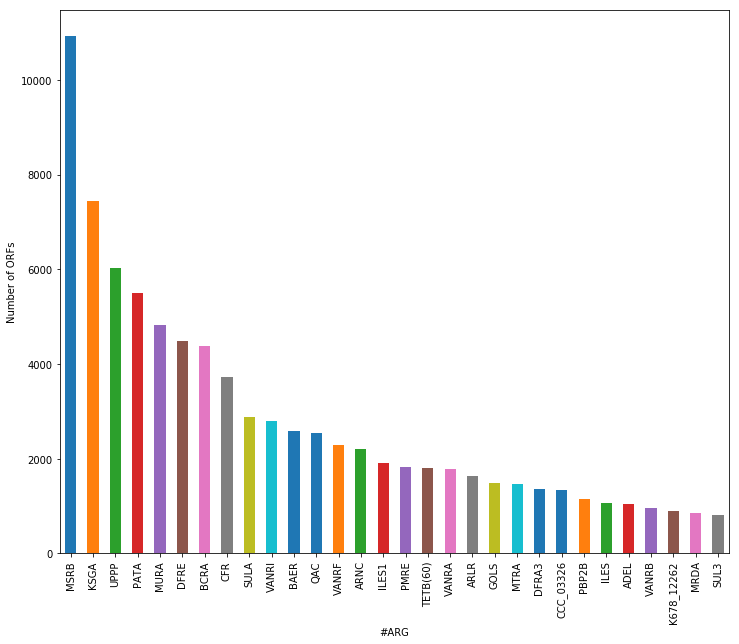

In [264]:
plt.figure(figsize=(12,10))
deep.groupby(["#ARG"])["#ARG"].count().sort_values(ascending=False)[0:30].plot(kind="bar")
plt.ylabel("Number of ORFs")
plt.show()

<Figure size 864x720 with 0 Axes>

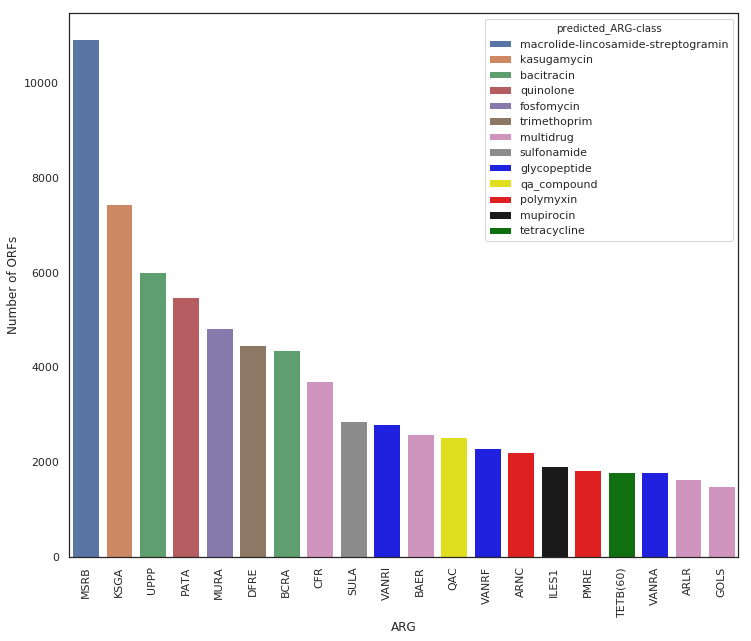

In [307]:
sns.set(style="white")
plt.figure(figsize=(12,10))

sns.barplot(data=argcount[0:20], y="counts",x="#ARG",hue="predicted_ARG-class",dodge=False,palette=["C0", "C1", "C2","C3","C4","C5","C6","C7","blue","yellow","red","k","green"])
plt.xticks(rotation=90)

plt.ylabel("Number of ORFs")
plt.xlabel("ARG")

plt.show()

In [308]:
argcount

#ARG  counts                  predicted_ARG-class
0                    MSRB   10931  macrolide-lincosamide-streptogramin
10931                KSGA    7440                          kasugamycin
18371                UPPP    6020                           bacitracin
24391                PATA    5489                            quinolone
29880                MURA    4830                           fosfomycin
34710                DFRE    4476                         trimethoprim
39186                BCRA    4371                           bacitracin
43557                 CFR    3719                            multidrug
47276                SULA    2872                          sulfonamide
50148               VANRI    2800                         glycopeptide
52948                BAER    2588                            multidrug
55536                 QAC    2533                          qa_compound
58069               VANRF    2292                         glycopeptide
60361                ARNC    2209                            polymyxin
62570               ILES1    1916                            mupirocin
64486                PMRE    1820                            polymyxin
66306            TETB(60)    1794                         tetracycline
68100               VANRA    1781                         glycopeptide
69881                ARLR    1636                            multidrug
71517                GOLS    1495                            multidrug
73012                MTRA    1456                            multidrug
74468               DFRA3    1354                         trimethoprim
75822           CCC_03326    1346                          beta_lactam
77168               PBP2B    1151                          beta_lactam
78319                ILES    1069                            mupirocin
79388                ADEL    1053                            multidrug
80441               VANRB     952                         glycopeptide
81393          K678_12262     902                          beta_lactam
82295                MRDA     849                          beta_lactam
83144                SUL3     803                          sulfonamide
...                   ...     ...                                  ...
116395     BLAOXA-48-LIKE       1                          beta_lactam
116396         BLAOXA-438       1                          beta_lactam
116397         VK95_20590       1                      chloramphenicol
116398      BLAGES16-LIKE       1                          beta_lactam
116399          BLACPHAH5       1                          beta_lactam
116400             QNRB57       1                            quinolone
116401  VIBNIFTN2_1190029       1                       aminoglycoside
116402               QNRB       1                            quinolone
116403              VGB_2       1  macrolide-lincosamide-streptogramin
116404               VGBB       1  macrolide-lincosamide-streptogramin
116405               ERMU       1  macrolide-lincosamide-streptogramin
116406       R70331_17715       1                       aminoglycoside
116407               ERMO       1  macrolide-lincosamide-streptogramin
116408               RPHA       1                             rifampin
116409         PI87_26790       1                          beta_lactam
116410          PMEN_2038       1                          beta_lactam
116411              VANSG       1                         glycopeptide
116412                RM3       1                          beta_lactam
116413             VANXYE       1                         glycopeptide
116414     PROVRETT_09033       1                      chloramphenicol
116415       PTVF89_11505       1                          beta_lactam
116416             DFRA13       1                         trimethoprim
116417        DF40_017605       1                       aminoglycoside
116418        D088_840008       1                       aminoglycoside
116419           CTX-M-38       1            